### Load the Data

In [337]:
import numpy as np
import pandas as pd
from collections import defaultdict
import ast
import matplotlib.pyplot as plt

np.set_printoptions(threshold=np.nan)
pd.options.display.max_colwidth = 1000

In [ ]:
%%time

# Read the records
records = pd.read_csv('new-citations.tsv', sep='\t', header=None)
records.columns = ['recID', 'oldRef', 'newRef', 'metaData']

print('Total Records: {}'.format(len(records)))

In [8]:
%%time

# Filter out all the mismatched records
not_equal = records['oldRef'] != records['newRef']
mismatches = records[not_equal]

print('Total number of mismatches: {}'.format(len(mismatches)))

Total number of mismatches: 177184
CPU times: user 97.5 ms, sys: 16.1 ms, total: 114 ms
Wall time: 112 ms


### Parse the metaData into a DataFrame

In [230]:
%%time

total_mismatches = len(mismatches)
for i, record in enumerate(mismatches.iterrows()):
    
    row_data = {}
    
    row_data['report_numbers'] = 0
    row_data['artid'] = 0
    row_data['journal_title'] = 0
    row_data['journal_volume'] = 0
    row_data['page_start'] = 0
    row_data['dois'] = 0
    row_data['misc'] = 0
    row_data['arxiv_eprint'] = 0
    row_data['isbn'] = 0
    meta_data = ast.literal_eval(record[1]['metaData'])
    
    reference_info = meta_data.get('reference')
    
    if reference_info:

        if reference_info.get('publication_info'):
            row_data['artid'] = reference_info.get('publication_info').get('artid')
            row_data['journal_title'] = reference_info.get('publication_info').get('journal_title')
            row_data['journal_volume'] = reference_info.get('publication_info').get('journal_volume')
            row_data['page_start'] = reference_info.get('publication_info').get('page_start')

        if reference_info.get('report_numbers'):
            row_data['report_numbers'] = reference_info.get('report_numbers')

        if reference_info.get('dois'):
            row_data['dois'] = reference_info.get('dois')

        if reference_info.get('misc'):
            row_data['misc'] = reference_info.get('misc')

        if reference_info.get('arxiv_eprint'):
            row_data['arxiv_eprint'] = reference_info.get('arxiv_eprint')

        if reference_info.get('isbn'):
            row_data['isbn'] = reference_info.get('isbn')

    row_data['recID'] = record[1]['recID']
    row_data['oldRef'] = record[1]['oldRef']
    row_data['newRef'] = record[1]['newRef']
    
    if i == 0:
        parsed_data = pd.DataFrame(row_data, index=[0])
    else:
        parsed_data.loc[i] = row_data
        
    print('Completed {} / {}'.format(i + 1, total_mismatches))

Completed 1 / 177184
Completed 2 / 177184
Completed 3 / 177184
Completed 4 / 177184
Completed 5 / 177184
Completed 6 / 177184
Completed 7 / 177184
Completed 8 / 177184
Completed 9 / 177184
Completed 10 / 177184
Completed 11 / 177184
Completed 12 / 177184
Completed 13 / 177184
Completed 14 / 177184
Completed 15 / 177184
Completed 16 / 177184
Completed 17 / 177184
Completed 18 / 177184
Completed 19 / 177184
Completed 20 / 177184
Completed 21 / 177184
Completed 22 / 177184
Completed 23 / 177184
Completed 24 / 177184
Completed 25 / 177184
Completed 26 / 177184
Completed 27 / 177184
Completed 28 / 177184
Completed 29 / 177184
Completed 30 / 177184
Completed 31 / 177184
Completed 32 / 177184
Completed 33 / 177184
Completed 34 / 177184
Completed 35 / 177184
Completed 36 / 177184
Completed 37 / 177184
Completed 38 / 177184
Completed 39 / 177184
Completed 40 / 177184
Completed 41 / 177184
Completed 42 / 177184
Completed 43 / 177184
Completed 44 / 177184
Completed 45 / 177184
Completed 46 / 1771

Completed 379 / 177184
Completed 380 / 177184
Completed 381 / 177184
Completed 382 / 177184
Completed 383 / 177184
Completed 384 / 177184
Completed 385 / 177184
Completed 386 / 177184
Completed 387 / 177184
Completed 388 / 177184
Completed 389 / 177184
Completed 390 / 177184
Completed 391 / 177184
Completed 392 / 177184
Completed 393 / 177184
Completed 394 / 177184
Completed 395 / 177184
Completed 396 / 177184
Completed 397 / 177184
Completed 398 / 177184
Completed 399 / 177184
Completed 400 / 177184
Completed 401 / 177184
Completed 402 / 177184
Completed 403 / 177184
Completed 404 / 177184
Completed 405 / 177184
Completed 406 / 177184
Completed 407 / 177184
Completed 408 / 177184
Completed 409 / 177184
Completed 410 / 177184
Completed 411 / 177184
Completed 412 / 177184
Completed 413 / 177184
Completed 414 / 177184
Completed 415 / 177184
Completed 416 / 177184
Completed 417 / 177184
Completed 418 / 177184
Completed 419 / 177184
Completed 420 / 177184
Completed 421 / 177184
Completed 4

Completed 746 / 177184
Completed 747 / 177184
Completed 748 / 177184
Completed 749 / 177184
Completed 750 / 177184
Completed 751 / 177184
Completed 752 / 177184
Completed 753 / 177184
Completed 754 / 177184
Completed 755 / 177184
Completed 756 / 177184
Completed 757 / 177184
Completed 758 / 177184
Completed 759 / 177184
Completed 760 / 177184
Completed 761 / 177184
Completed 762 / 177184
Completed 763 / 177184
Completed 764 / 177184
Completed 765 / 177184
Completed 766 / 177184
Completed 767 / 177184
Completed 768 / 177184
Completed 769 / 177184
Completed 770 / 177184
Completed 771 / 177184
Completed 772 / 177184
Completed 773 / 177184
Completed 774 / 177184
Completed 775 / 177184
Completed 776 / 177184
Completed 777 / 177184
Completed 778 / 177184
Completed 779 / 177184
Completed 780 / 177184
Completed 781 / 177184
Completed 782 / 177184
Completed 783 / 177184
Completed 784 / 177184
Completed 785 / 177184
Completed 786 / 177184
Completed 787 / 177184
Completed 788 / 177184
Completed 7

Completed 1102 / 177184
Completed 1103 / 177184
Completed 1104 / 177184
Completed 1105 / 177184
Completed 1106 / 177184
Completed 1107 / 177184
Completed 1108 / 177184
Completed 1109 / 177184
Completed 1110 / 177184
Completed 1111 / 177184
Completed 1112 / 177184
Completed 1113 / 177184
Completed 1114 / 177184
Completed 1115 / 177184
Completed 1116 / 177184
Completed 1117 / 177184
Completed 1118 / 177184
Completed 1119 / 177184
Completed 1120 / 177184
Completed 1121 / 177184
Completed 1122 / 177184
Completed 1123 / 177184
Completed 1124 / 177184
Completed 1125 / 177184
Completed 1126 / 177184
Completed 1127 / 177184
Completed 1128 / 177184
Completed 1129 / 177184
Completed 1130 / 177184
Completed 1131 / 177184
Completed 1132 / 177184
Completed 1133 / 177184
Completed 1134 / 177184
Completed 1135 / 177184
Completed 1136 / 177184
Completed 1137 / 177184
Completed 1138 / 177184
Completed 1139 / 177184
Completed 1140 / 177184
Completed 1141 / 177184
Completed 1142 / 177184
Completed 1143 /

Completed 1454 / 177184
Completed 1455 / 177184
Completed 1456 / 177184
Completed 1457 / 177184
Completed 1458 / 177184
Completed 1459 / 177184
Completed 1460 / 177184
Completed 1461 / 177184
Completed 1462 / 177184
Completed 1463 / 177184
Completed 1464 / 177184
Completed 1465 / 177184
Completed 1466 / 177184
Completed 1467 / 177184
Completed 1468 / 177184
Completed 1469 / 177184
Completed 1470 / 177184
Completed 1471 / 177184
Completed 1472 / 177184
Completed 1473 / 177184
Completed 1474 / 177184
Completed 1475 / 177184
Completed 1476 / 177184
Completed 1477 / 177184
Completed 1478 / 177184
Completed 1479 / 177184
Completed 1480 / 177184
Completed 1481 / 177184
Completed 1482 / 177184
Completed 1483 / 177184
Completed 1484 / 177184
Completed 1485 / 177184
Completed 1486 / 177184
Completed 1487 / 177184
Completed 1488 / 177184
Completed 1489 / 177184
Completed 1490 / 177184
Completed 1491 / 177184
Completed 1492 / 177184
Completed 1493 / 177184
Completed 1494 / 177184
Completed 1495 /

Completed 1809 / 177184
Completed 1810 / 177184
Completed 1811 / 177184
Completed 1812 / 177184
Completed 1813 / 177184
Completed 1814 / 177184
Completed 1815 / 177184
Completed 1816 / 177184
Completed 1817 / 177184
Completed 1818 / 177184
Completed 1819 / 177184
Completed 1820 / 177184
Completed 1821 / 177184
Completed 1822 / 177184
Completed 1823 / 177184
Completed 1824 / 177184
Completed 1825 / 177184
Completed 1826 / 177184
Completed 1827 / 177184
Completed 1828 / 177184
Completed 1829 / 177184
Completed 1830 / 177184
Completed 1831 / 177184
Completed 1832 / 177184
Completed 1833 / 177184
Completed 1834 / 177184
Completed 1835 / 177184
Completed 1836 / 177184
Completed 1837 / 177184
Completed 1838 / 177184
Completed 1839 / 177184
Completed 1840 / 177184
Completed 1841 / 177184
Completed 1842 / 177184
Completed 1843 / 177184
Completed 1844 / 177184
Completed 1845 / 177184
Completed 1846 / 177184
Completed 1847 / 177184
Completed 1848 / 177184
Completed 1849 / 177184
Completed 1850 /

Completed 2160 / 177184
Completed 2161 / 177184
Completed 2162 / 177184
Completed 2163 / 177184
Completed 2164 / 177184
Completed 2165 / 177184
Completed 2166 / 177184
Completed 2167 / 177184
Completed 2168 / 177184
Completed 2169 / 177184
Completed 2170 / 177184
Completed 2171 / 177184
Completed 2172 / 177184
Completed 2173 / 177184
Completed 2174 / 177184
Completed 2175 / 177184
Completed 2176 / 177184
Completed 2177 / 177184
Completed 2178 / 177184
Completed 2179 / 177184
Completed 2180 / 177184
Completed 2181 / 177184
Completed 2182 / 177184
Completed 2183 / 177184
Completed 2184 / 177184
Completed 2185 / 177184
Completed 2186 / 177184
Completed 2187 / 177184
Completed 2188 / 177184
Completed 2189 / 177184
Completed 2190 / 177184
Completed 2191 / 177184
Completed 2192 / 177184
Completed 2193 / 177184
Completed 2194 / 177184
Completed 2195 / 177184
Completed 2196 / 177184
Completed 2197 / 177184
Completed 2198 / 177184
Completed 2199 / 177184
Completed 2200 / 177184
Completed 2201 /

Completed 2503 / 177184
Completed 2504 / 177184
Completed 2505 / 177184
Completed 2506 / 177184
Completed 2507 / 177184
Completed 2508 / 177184
Completed 2509 / 177184
Completed 2510 / 177184
Completed 2511 / 177184
Completed 2512 / 177184
Completed 2513 / 177184
Completed 2514 / 177184
Completed 2515 / 177184
Completed 2516 / 177184
Completed 2517 / 177184
Completed 2518 / 177184
Completed 2519 / 177184
Completed 2520 / 177184
Completed 2521 / 177184
Completed 2522 / 177184
Completed 2523 / 177184
Completed 2524 / 177184
Completed 2525 / 177184
Completed 2526 / 177184
Completed 2527 / 177184
Completed 2528 / 177184
Completed 2529 / 177184
Completed 2530 / 177184
Completed 2531 / 177184
Completed 2532 / 177184
Completed 2533 / 177184
Completed 2534 / 177184
Completed 2535 / 177184
Completed 2536 / 177184
Completed 2537 / 177184
Completed 2538 / 177184
Completed 2539 / 177184
Completed 2540 / 177184
Completed 2541 / 177184
Completed 2542 / 177184
Completed 2543 / 177184
Completed 2544 /

Completed 2866 / 177184
Completed 2867 / 177184
Completed 2868 / 177184
Completed 2869 / 177184
Completed 2870 / 177184
Completed 2871 / 177184
Completed 2872 / 177184
Completed 2873 / 177184
Completed 2874 / 177184
Completed 2875 / 177184
Completed 2876 / 177184
Completed 2877 / 177184
Completed 2878 / 177184
Completed 2879 / 177184
Completed 2880 / 177184
Completed 2881 / 177184
Completed 2882 / 177184
Completed 2883 / 177184
Completed 2884 / 177184
Completed 2885 / 177184
Completed 2886 / 177184
Completed 2887 / 177184
Completed 2888 / 177184
Completed 2889 / 177184
Completed 2890 / 177184
Completed 2891 / 177184
Completed 2892 / 177184
Completed 2893 / 177184
Completed 2894 / 177184
Completed 2895 / 177184
Completed 2896 / 177184
Completed 2897 / 177184
Completed 2898 / 177184
Completed 2899 / 177184
Completed 2900 / 177184
Completed 2901 / 177184
Completed 2902 / 177184
Completed 2903 / 177184
Completed 2904 / 177184
Completed 2905 / 177184
Completed 2906 / 177184
Completed 2907 /

Completed 3218 / 177184
Completed 3219 / 177184
Completed 3220 / 177184
Completed 3221 / 177184
Completed 3222 / 177184
Completed 3223 / 177184
Completed 3224 / 177184
Completed 3225 / 177184
Completed 3226 / 177184
Completed 3227 / 177184
Completed 3228 / 177184
Completed 3229 / 177184
Completed 3230 / 177184
Completed 3231 / 177184
Completed 3232 / 177184
Completed 3233 / 177184
Completed 3234 / 177184
Completed 3235 / 177184
Completed 3236 / 177184
Completed 3237 / 177184
Completed 3238 / 177184
Completed 3239 / 177184
Completed 3240 / 177184
Completed 3241 / 177184
Completed 3242 / 177184
Completed 3243 / 177184
Completed 3244 / 177184
Completed 3245 / 177184
Completed 3246 / 177184
Completed 3247 / 177184
Completed 3248 / 177184
Completed 3249 / 177184
Completed 3250 / 177184
Completed 3251 / 177184
Completed 3252 / 177184
Completed 3253 / 177184
Completed 3254 / 177184
Completed 3255 / 177184
Completed 3256 / 177184
Completed 3257 / 177184
Completed 3258 / 177184
Completed 3259 /

Completed 3570 / 177184
Completed 3571 / 177184
Completed 3572 / 177184
Completed 3573 / 177184
Completed 3574 / 177184
Completed 3575 / 177184
Completed 3576 / 177184
Completed 3577 / 177184
Completed 3578 / 177184
Completed 3579 / 177184
Completed 3580 / 177184
Completed 3581 / 177184
Completed 3582 / 177184
Completed 3583 / 177184
Completed 3584 / 177184
Completed 3585 / 177184
Completed 3586 / 177184
Completed 3587 / 177184
Completed 3588 / 177184
Completed 3589 / 177184
Completed 3590 / 177184
Completed 3591 / 177184
Completed 3592 / 177184
Completed 3593 / 177184
Completed 3594 / 177184
Completed 3595 / 177184
Completed 3596 / 177184
Completed 3597 / 177184
Completed 3598 / 177184
Completed 3599 / 177184
Completed 3600 / 177184
Completed 3601 / 177184
Completed 3602 / 177184
Completed 3603 / 177184
Completed 3604 / 177184
Completed 3605 / 177184
Completed 3606 / 177184
Completed 3607 / 177184
Completed 3608 / 177184
Completed 3609 / 177184
Completed 3610 / 177184
Completed 3611 /

Completed 3918 / 177184
Completed 3919 / 177184
Completed 3920 / 177184
Completed 3921 / 177184
Completed 3922 / 177184
Completed 3923 / 177184
Completed 3924 / 177184
Completed 3925 / 177184
Completed 3926 / 177184
Completed 3927 / 177184
Completed 3928 / 177184
Completed 3929 / 177184
Completed 3930 / 177184
Completed 3931 / 177184
Completed 3932 / 177184
Completed 3933 / 177184
Completed 3934 / 177184
Completed 3935 / 177184
Completed 3936 / 177184
Completed 3937 / 177184
Completed 3938 / 177184
Completed 3939 / 177184
Completed 3940 / 177184
Completed 3941 / 177184
Completed 3942 / 177184
Completed 3943 / 177184
Completed 3944 / 177184
Completed 3945 / 177184
Completed 3946 / 177184
Completed 3947 / 177184
Completed 3948 / 177184
Completed 3949 / 177184
Completed 3950 / 177184
Completed 3951 / 177184
Completed 3952 / 177184
Completed 3953 / 177184
Completed 3954 / 177184
Completed 3955 / 177184
Completed 3956 / 177184
Completed 3957 / 177184
Completed 3958 / 177184
Completed 3959 /

Completed 4265 / 177184
Completed 4266 / 177184
Completed 4267 / 177184
Completed 4268 / 177184
Completed 4269 / 177184
Completed 4270 / 177184
Completed 4271 / 177184
Completed 4272 / 177184
Completed 4273 / 177184
Completed 4274 / 177184
Completed 4275 / 177184
Completed 4276 / 177184
Completed 4277 / 177184
Completed 4278 / 177184
Completed 4279 / 177184
Completed 4280 / 177184
Completed 4281 / 177184
Completed 4282 / 177184
Completed 4283 / 177184
Completed 4284 / 177184
Completed 4285 / 177184
Completed 4286 / 177184
Completed 4287 / 177184
Completed 4288 / 177184
Completed 4289 / 177184
Completed 4290 / 177184
Completed 4291 / 177184
Completed 4292 / 177184
Completed 4293 / 177184
Completed 4294 / 177184
Completed 4295 / 177184
Completed 4296 / 177184
Completed 4297 / 177184
Completed 4298 / 177184
Completed 4299 / 177184
Completed 4300 / 177184
Completed 4301 / 177184
Completed 4302 / 177184
Completed 4303 / 177184
Completed 4304 / 177184
Completed 4305 / 177184
Completed 4306 /

Completed 4609 / 177184
Completed 4610 / 177184
Completed 4611 / 177184
Completed 4612 / 177184
Completed 4613 / 177184
Completed 4614 / 177184
Completed 4615 / 177184
Completed 4616 / 177184
Completed 4617 / 177184
Completed 4618 / 177184
Completed 4619 / 177184
Completed 4620 / 177184
Completed 4621 / 177184
Completed 4622 / 177184
Completed 4623 / 177184
Completed 4624 / 177184
Completed 4625 / 177184
Completed 4626 / 177184
Completed 4627 / 177184
Completed 4628 / 177184
Completed 4629 / 177184
Completed 4630 / 177184
Completed 4631 / 177184
Completed 4632 / 177184
Completed 4633 / 177184
Completed 4634 / 177184
Completed 4635 / 177184
Completed 4636 / 177184
Completed 4637 / 177184
Completed 4638 / 177184
Completed 4639 / 177184
Completed 4640 / 177184
Completed 4641 / 177184
Completed 4642 / 177184
Completed 4643 / 177184
Completed 4644 / 177184
Completed 4645 / 177184
Completed 4646 / 177184
Completed 4647 / 177184
Completed 4648 / 177184
Completed 4649 / 177184
Completed 4650 /

Completed 4970 / 177184
Completed 4971 / 177184
Completed 4972 / 177184
Completed 4973 / 177184
Completed 4974 / 177184
Completed 4975 / 177184
Completed 4976 / 177184
Completed 4977 / 177184
Completed 4978 / 177184
Completed 4979 / 177184
Completed 4980 / 177184
Completed 4981 / 177184
Completed 4982 / 177184
Completed 4983 / 177184
Completed 4984 / 177184
Completed 4985 / 177184
Completed 4986 / 177184
Completed 4987 / 177184
Completed 4988 / 177184
Completed 4989 / 177184
Completed 4990 / 177184
Completed 4991 / 177184
Completed 4992 / 177184
Completed 4993 / 177184
Completed 4994 / 177184
Completed 4995 / 177184
Completed 4996 / 177184
Completed 4997 / 177184
Completed 4998 / 177184
Completed 4999 / 177184
Completed 5000 / 177184
Completed 5001 / 177184
Completed 5002 / 177184
Completed 5003 / 177184
Completed 5004 / 177184
Completed 5005 / 177184
Completed 5006 / 177184
Completed 5007 / 177184
Completed 5008 / 177184
Completed 5009 / 177184
Completed 5010 / 177184
Completed 5011 /

Completed 5329 / 177184
Completed 5330 / 177184
Completed 5331 / 177184
Completed 5332 / 177184
Completed 5333 / 177184
Completed 5334 / 177184
Completed 5335 / 177184
Completed 5336 / 177184
Completed 5337 / 177184
Completed 5338 / 177184
Completed 5339 / 177184
Completed 5340 / 177184
Completed 5341 / 177184
Completed 5342 / 177184
Completed 5343 / 177184
Completed 5344 / 177184
Completed 5345 / 177184
Completed 5346 / 177184
Completed 5347 / 177184
Completed 5348 / 177184
Completed 5349 / 177184
Completed 5350 / 177184
Completed 5351 / 177184
Completed 5352 / 177184
Completed 5353 / 177184
Completed 5354 / 177184
Completed 5355 / 177184
Completed 5356 / 177184
Completed 5357 / 177184
Completed 5358 / 177184
Completed 5359 / 177184
Completed 5360 / 177184
Completed 5361 / 177184
Completed 5362 / 177184
Completed 5363 / 177184
Completed 5364 / 177184
Completed 5365 / 177184
Completed 5366 / 177184
Completed 5367 / 177184
Completed 5368 / 177184
Completed 5369 / 177184
Completed 5370 /

Completed 5676 / 177184
Completed 5677 / 177184
Completed 5678 / 177184
Completed 5679 / 177184
Completed 5680 / 177184
Completed 5681 / 177184
Completed 5682 / 177184
Completed 5683 / 177184
Completed 5684 / 177184
Completed 5685 / 177184
Completed 5686 / 177184
Completed 5687 / 177184
Completed 5688 / 177184
Completed 5689 / 177184
Completed 5690 / 177184
Completed 5691 / 177184
Completed 5692 / 177184
Completed 5693 / 177184
Completed 5694 / 177184
Completed 5695 / 177184
Completed 5696 / 177184
Completed 5697 / 177184
Completed 5698 / 177184
Completed 5699 / 177184
Completed 5700 / 177184
Completed 5701 / 177184
Completed 5702 / 177184
Completed 5703 / 177184
Completed 5704 / 177184
Completed 5705 / 177184
Completed 5706 / 177184
Completed 5707 / 177184
Completed 5708 / 177184
Completed 5709 / 177184
Completed 5710 / 177184
Completed 5711 / 177184
Completed 5712 / 177184
Completed 5713 / 177184
Completed 5714 / 177184
Completed 5715 / 177184
Completed 5716 / 177184
Completed 5717 /

Completed 6037 / 177184
Completed 6038 / 177184
Completed 6039 / 177184
Completed 6040 / 177184
Completed 6041 / 177184
Completed 6042 / 177184
Completed 6043 / 177184
Completed 6044 / 177184
Completed 6045 / 177184
Completed 6046 / 177184
Completed 6047 / 177184
Completed 6048 / 177184
Completed 6049 / 177184
Completed 6050 / 177184
Completed 6051 / 177184
Completed 6052 / 177184
Completed 6053 / 177184
Completed 6054 / 177184
Completed 6055 / 177184
Completed 6056 / 177184
Completed 6057 / 177184
Completed 6058 / 177184
Completed 6059 / 177184
Completed 6060 / 177184
Completed 6061 / 177184
Completed 6062 / 177184
Completed 6063 / 177184
Completed 6064 / 177184
Completed 6065 / 177184
Completed 6066 / 177184
Completed 6067 / 177184
Completed 6068 / 177184
Completed 6069 / 177184
Completed 6070 / 177184
Completed 6071 / 177184
Completed 6072 / 177184
Completed 6073 / 177184
Completed 6074 / 177184
Completed 6075 / 177184
Completed 6076 / 177184
Completed 6077 / 177184
Completed 6078 /

Completed 6398 / 177184
Completed 6399 / 177184
Completed 6400 / 177184
Completed 6401 / 177184
Completed 6402 / 177184
Completed 6403 / 177184
Completed 6404 / 177184
Completed 6405 / 177184
Completed 6406 / 177184
Completed 6407 / 177184
Completed 6408 / 177184
Completed 6409 / 177184
Completed 6410 / 177184
Completed 6411 / 177184
Completed 6412 / 177184
Completed 6413 / 177184
Completed 6414 / 177184
Completed 6415 / 177184
Completed 6416 / 177184
Completed 6417 / 177184
Completed 6418 / 177184
Completed 6419 / 177184
Completed 6420 / 177184
Completed 6421 / 177184
Completed 6422 / 177184
Completed 6423 / 177184
Completed 6424 / 177184
Completed 6425 / 177184
Completed 6426 / 177184
Completed 6427 / 177184
Completed 6428 / 177184
Completed 6429 / 177184
Completed 6430 / 177184
Completed 6431 / 177184
Completed 6432 / 177184
Completed 6433 / 177184
Completed 6434 / 177184
Completed 6435 / 177184
Completed 6436 / 177184
Completed 6437 / 177184
Completed 6438 / 177184
Completed 6439 /

Completed 6755 / 177184
Completed 6756 / 177184
Completed 6757 / 177184
Completed 6758 / 177184
Completed 6759 / 177184
Completed 6760 / 177184
Completed 6761 / 177184
Completed 6762 / 177184
Completed 6763 / 177184
Completed 6764 / 177184
Completed 6765 / 177184
Completed 6766 / 177184
Completed 6767 / 177184
Completed 6768 / 177184
Completed 6769 / 177184
Completed 6770 / 177184
Completed 6771 / 177184
Completed 6772 / 177184
Completed 6773 / 177184
Completed 6774 / 177184
Completed 6775 / 177184
Completed 6776 / 177184
Completed 6777 / 177184
Completed 6778 / 177184
Completed 6779 / 177184
Completed 6780 / 177184
Completed 6781 / 177184
Completed 6782 / 177184
Completed 6783 / 177184
Completed 6784 / 177184
Completed 6785 / 177184
Completed 6786 / 177184
Completed 6787 / 177184
Completed 6788 / 177184
Completed 6789 / 177184
Completed 6790 / 177184
Completed 6791 / 177184
Completed 6792 / 177184
Completed 6793 / 177184
Completed 6794 / 177184
Completed 6795 / 177184
Completed 6796 /

Completed 7103 / 177184
Completed 7104 / 177184
Completed 7105 / 177184
Completed 7106 / 177184
Completed 7107 / 177184
Completed 7108 / 177184
Completed 7109 / 177184
Completed 7110 / 177184
Completed 7111 / 177184
Completed 7112 / 177184
Completed 7113 / 177184
Completed 7114 / 177184
Completed 7115 / 177184
Completed 7116 / 177184
Completed 7117 / 177184
Completed 7118 / 177184
Completed 7119 / 177184
Completed 7120 / 177184
Completed 7121 / 177184
Completed 7122 / 177184
Completed 7123 / 177184
Completed 7124 / 177184
Completed 7125 / 177184
Completed 7126 / 177184
Completed 7127 / 177184
Completed 7128 / 177184
Completed 7129 / 177184
Completed 7130 / 177184
Completed 7131 / 177184
Completed 7132 / 177184
Completed 7133 / 177184
Completed 7134 / 177184
Completed 7135 / 177184
Completed 7136 / 177184
Completed 7137 / 177184
Completed 7138 / 177184
Completed 7139 / 177184
Completed 7140 / 177184
Completed 7141 / 177184
Completed 7142 / 177184
Completed 7143 / 177184
Completed 7144 /

Completed 7463 / 177184
Completed 7464 / 177184
Completed 7465 / 177184
Completed 7466 / 177184
Completed 7467 / 177184
Completed 7468 / 177184
Completed 7469 / 177184
Completed 7470 / 177184
Completed 7471 / 177184
Completed 7472 / 177184
Completed 7473 / 177184
Completed 7474 / 177184
Completed 7475 / 177184
Completed 7476 / 177184
Completed 7477 / 177184
Completed 7478 / 177184
Completed 7479 / 177184
Completed 7480 / 177184
Completed 7481 / 177184
Completed 7482 / 177184
Completed 7483 / 177184
Completed 7484 / 177184
Completed 7485 / 177184
Completed 7486 / 177184
Completed 7487 / 177184
Completed 7488 / 177184
Completed 7489 / 177184
Completed 7490 / 177184
Completed 7491 / 177184
Completed 7492 / 177184
Completed 7493 / 177184
Completed 7494 / 177184
Completed 7495 / 177184
Completed 7496 / 177184
Completed 7497 / 177184
Completed 7498 / 177184
Completed 7499 / 177184
Completed 7500 / 177184
Completed 7501 / 177184
Completed 7502 / 177184
Completed 7503 / 177184
Completed 7504 /

Completed 7821 / 177184
Completed 7822 / 177184
Completed 7823 / 177184
Completed 7824 / 177184
Completed 7825 / 177184
Completed 7826 / 177184
Completed 7827 / 177184
Completed 7828 / 177184
Completed 7829 / 177184
Completed 7830 / 177184
Completed 7831 / 177184
Completed 7832 / 177184
Completed 7833 / 177184
Completed 7834 / 177184
Completed 7835 / 177184
Completed 7836 / 177184
Completed 7837 / 177184
Completed 7838 / 177184
Completed 7839 / 177184
Completed 7840 / 177184
Completed 7841 / 177184
Completed 7842 / 177184
Completed 7843 / 177184
Completed 7844 / 177184
Completed 7845 / 177184
Completed 7846 / 177184
Completed 7847 / 177184
Completed 7848 / 177184
Completed 7849 / 177184
Completed 7850 / 177184
Completed 7851 / 177184
Completed 7852 / 177184
Completed 7853 / 177184
Completed 7854 / 177184
Completed 7855 / 177184
Completed 7856 / 177184
Completed 7857 / 177184
Completed 7858 / 177184
Completed 7859 / 177184
Completed 7860 / 177184
Completed 7861 / 177184
Completed 7862 /

Completed 8175 / 177184
Completed 8176 / 177184
Completed 8177 / 177184
Completed 8178 / 177184
Completed 8179 / 177184
Completed 8180 / 177184
Completed 8181 / 177184
Completed 8182 / 177184
Completed 8183 / 177184
Completed 8184 / 177184
Completed 8185 / 177184
Completed 8186 / 177184
Completed 8187 / 177184
Completed 8188 / 177184
Completed 8189 / 177184
Completed 8190 / 177184
Completed 8191 / 177184
Completed 8192 / 177184
Completed 8193 / 177184
Completed 8194 / 177184
Completed 8195 / 177184
Completed 8196 / 177184
Completed 8197 / 177184
Completed 8198 / 177184
Completed 8199 / 177184
Completed 8200 / 177184
Completed 8201 / 177184
Completed 8202 / 177184
Completed 8203 / 177184
Completed 8204 / 177184
Completed 8205 / 177184
Completed 8206 / 177184
Completed 8207 / 177184
Completed 8208 / 177184
Completed 8209 / 177184
Completed 8210 / 177184
Completed 8211 / 177184
Completed 8212 / 177184
Completed 8213 / 177184
Completed 8214 / 177184
Completed 8215 / 177184
Completed 8216 /

Completed 8533 / 177184
Completed 8534 / 177184
Completed 8535 / 177184
Completed 8536 / 177184
Completed 8537 / 177184
Completed 8538 / 177184
Completed 8539 / 177184
Completed 8540 / 177184
Completed 8541 / 177184
Completed 8542 / 177184
Completed 8543 / 177184
Completed 8544 / 177184
Completed 8545 / 177184
Completed 8546 / 177184
Completed 8547 / 177184
Completed 8548 / 177184
Completed 8549 / 177184
Completed 8550 / 177184
Completed 8551 / 177184
Completed 8552 / 177184
Completed 8553 / 177184
Completed 8554 / 177184
Completed 8555 / 177184
Completed 8556 / 177184
Completed 8557 / 177184
Completed 8558 / 177184
Completed 8559 / 177184
Completed 8560 / 177184
Completed 8561 / 177184
Completed 8562 / 177184
Completed 8563 / 177184
Completed 8564 / 177184
Completed 8565 / 177184
Completed 8566 / 177184
Completed 8567 / 177184
Completed 8568 / 177184
Completed 8569 / 177184
Completed 8570 / 177184
Completed 8571 / 177184
Completed 8572 / 177184
Completed 8573 / 177184
Completed 8574 /

Completed 8875 / 177184
Completed 8876 / 177184
Completed 8877 / 177184
Completed 8878 / 177184
Completed 8879 / 177184
Completed 8880 / 177184
Completed 8881 / 177184
Completed 8882 / 177184
Completed 8883 / 177184
Completed 8884 / 177184
Completed 8885 / 177184
Completed 8886 / 177184
Completed 8887 / 177184
Completed 8888 / 177184
Completed 8889 / 177184
Completed 8890 / 177184
Completed 8891 / 177184
Completed 8892 / 177184
Completed 8893 / 177184
Completed 8894 / 177184
Completed 8895 / 177184
Completed 8896 / 177184
Completed 8897 / 177184
Completed 8898 / 177184
Completed 8899 / 177184
Completed 8900 / 177184
Completed 8901 / 177184
Completed 8902 / 177184
Completed 8903 / 177184
Completed 8904 / 177184
Completed 8905 / 177184
Completed 8906 / 177184
Completed 8907 / 177184
Completed 8908 / 177184
Completed 8909 / 177184
Completed 8910 / 177184
Completed 8911 / 177184
Completed 8912 / 177184
Completed 8913 / 177184
Completed 8914 / 177184
Completed 8915 / 177184
Completed 8916 /

Completed 9232 / 177184
Completed 9233 / 177184
Completed 9234 / 177184
Completed 9235 / 177184
Completed 9236 / 177184
Completed 9237 / 177184
Completed 9238 / 177184
Completed 9239 / 177184
Completed 9240 / 177184
Completed 9241 / 177184
Completed 9242 / 177184
Completed 9243 / 177184
Completed 9244 / 177184
Completed 9245 / 177184
Completed 9246 / 177184
Completed 9247 / 177184
Completed 9248 / 177184
Completed 9249 / 177184
Completed 9250 / 177184
Completed 9251 / 177184
Completed 9252 / 177184
Completed 9253 / 177184
Completed 9254 / 177184
Completed 9255 / 177184
Completed 9256 / 177184
Completed 9257 / 177184
Completed 9258 / 177184
Completed 9259 / 177184
Completed 9260 / 177184
Completed 9261 / 177184
Completed 9262 / 177184
Completed 9263 / 177184
Completed 9264 / 177184
Completed 9265 / 177184
Completed 9266 / 177184
Completed 9267 / 177184
Completed 9268 / 177184
Completed 9269 / 177184
Completed 9270 / 177184
Completed 9271 / 177184
Completed 9272 / 177184
Completed 9273 /

Completed 9582 / 177184
Completed 9583 / 177184
Completed 9584 / 177184
Completed 9585 / 177184
Completed 9586 / 177184
Completed 9587 / 177184
Completed 9588 / 177184
Completed 9589 / 177184
Completed 9590 / 177184
Completed 9591 / 177184
Completed 9592 / 177184
Completed 9593 / 177184
Completed 9594 / 177184
Completed 9595 / 177184
Completed 9596 / 177184
Completed 9597 / 177184
Completed 9598 / 177184
Completed 9599 / 177184
Completed 9600 / 177184
Completed 9601 / 177184
Completed 9602 / 177184
Completed 9603 / 177184
Completed 9604 / 177184
Completed 9605 / 177184
Completed 9606 / 177184
Completed 9607 / 177184
Completed 9608 / 177184
Completed 9609 / 177184
Completed 9610 / 177184
Completed 9611 / 177184
Completed 9612 / 177184
Completed 9613 / 177184
Completed 9614 / 177184
Completed 9615 / 177184
Completed 9616 / 177184
Completed 9617 / 177184
Completed 9618 / 177184
Completed 9619 / 177184
Completed 9620 / 177184
Completed 9621 / 177184
Completed 9622 / 177184
Completed 9623 /

Completed 9928 / 177184
Completed 9929 / 177184
Completed 9930 / 177184
Completed 9931 / 177184
Completed 9932 / 177184
Completed 9933 / 177184
Completed 9934 / 177184
Completed 9935 / 177184
Completed 9936 / 177184
Completed 9937 / 177184
Completed 9938 / 177184
Completed 9939 / 177184
Completed 9940 / 177184
Completed 9941 / 177184
Completed 9942 / 177184
Completed 9943 / 177184
Completed 9944 / 177184
Completed 9945 / 177184
Completed 9946 / 177184
Completed 9947 / 177184
Completed 9948 / 177184
Completed 9949 / 177184
Completed 9950 / 177184
Completed 9951 / 177184
Completed 9952 / 177184
Completed 9953 / 177184
Completed 9954 / 177184
Completed 9955 / 177184
Completed 9956 / 177184
Completed 9957 / 177184
Completed 9958 / 177184
Completed 9959 / 177184
Completed 9960 / 177184
Completed 9961 / 177184
Completed 9962 / 177184
Completed 9963 / 177184
Completed 9964 / 177184
Completed 9965 / 177184
Completed 9966 / 177184
Completed 9967 / 177184
Completed 9968 / 177184
Completed 9969 /

Completed 10273 / 177184
Completed 10274 / 177184
Completed 10275 / 177184
Completed 10276 / 177184
Completed 10277 / 177184
Completed 10278 / 177184
Completed 10279 / 177184
Completed 10280 / 177184
Completed 10281 / 177184
Completed 10282 / 177184
Completed 10283 / 177184
Completed 10284 / 177184
Completed 10285 / 177184
Completed 10286 / 177184
Completed 10287 / 177184
Completed 10288 / 177184
Completed 10289 / 177184
Completed 10290 / 177184
Completed 10291 / 177184
Completed 10292 / 177184
Completed 10293 / 177184
Completed 10294 / 177184
Completed 10295 / 177184
Completed 10296 / 177184
Completed 10297 / 177184
Completed 10298 / 177184
Completed 10299 / 177184
Completed 10300 / 177184
Completed 10301 / 177184
Completed 10302 / 177184
Completed 10303 / 177184
Completed 10304 / 177184
Completed 10305 / 177184
Completed 10306 / 177184
Completed 10307 / 177184
Completed 10308 / 177184
Completed 10309 / 177184
Completed 10310 / 177184
Completed 10311 / 177184
Completed 10312 / 177184


Completed 10617 / 177184
Completed 10618 / 177184
Completed 10619 / 177184
Completed 10620 / 177184
Completed 10621 / 177184
Completed 10622 / 177184
Completed 10623 / 177184
Completed 10624 / 177184
Completed 10625 / 177184
Completed 10626 / 177184
Completed 10627 / 177184
Completed 10628 / 177184
Completed 10629 / 177184
Completed 10630 / 177184
Completed 10631 / 177184
Completed 10632 / 177184
Completed 10633 / 177184
Completed 10634 / 177184
Completed 10635 / 177184
Completed 10636 / 177184
Completed 10637 / 177184
Completed 10638 / 177184
Completed 10639 / 177184
Completed 10640 / 177184
Completed 10641 / 177184
Completed 10642 / 177184
Completed 10643 / 177184
Completed 10644 / 177184
Completed 10645 / 177184
Completed 10646 / 177184
Completed 10647 / 177184
Completed 10648 / 177184
Completed 10649 / 177184
Completed 10650 / 177184
Completed 10651 / 177184
Completed 10652 / 177184
Completed 10653 / 177184
Completed 10654 / 177184
Completed 10655 / 177184
Completed 10656 / 177184


Completed 10960 / 177184
Completed 10961 / 177184
Completed 10962 / 177184
Completed 10963 / 177184
Completed 10964 / 177184
Completed 10965 / 177184
Completed 10966 / 177184
Completed 10967 / 177184
Completed 10968 / 177184
Completed 10969 / 177184
Completed 10970 / 177184
Completed 10971 / 177184
Completed 10972 / 177184
Completed 10973 / 177184
Completed 10974 / 177184
Completed 10975 / 177184
Completed 10976 / 177184
Completed 10977 / 177184
Completed 10978 / 177184
Completed 10979 / 177184
Completed 10980 / 177184
Completed 10981 / 177184
Completed 10982 / 177184
Completed 10983 / 177184
Completed 10984 / 177184
Completed 10985 / 177184
Completed 10986 / 177184
Completed 10987 / 177184
Completed 10988 / 177184
Completed 10989 / 177184
Completed 10990 / 177184
Completed 10991 / 177184
Completed 10992 / 177184
Completed 10993 / 177184
Completed 10994 / 177184
Completed 10995 / 177184
Completed 10996 / 177184
Completed 10997 / 177184
Completed 10998 / 177184
Completed 10999 / 177184


Completed 11301 / 177184
Completed 11302 / 177184
Completed 11303 / 177184
Completed 11304 / 177184
Completed 11305 / 177184
Completed 11306 / 177184
Completed 11307 / 177184
Completed 11308 / 177184
Completed 11309 / 177184
Completed 11310 / 177184
Completed 11311 / 177184
Completed 11312 / 177184
Completed 11313 / 177184
Completed 11314 / 177184
Completed 11315 / 177184
Completed 11316 / 177184
Completed 11317 / 177184
Completed 11318 / 177184
Completed 11319 / 177184
Completed 11320 / 177184
Completed 11321 / 177184
Completed 11322 / 177184
Completed 11323 / 177184
Completed 11324 / 177184
Completed 11325 / 177184
Completed 11326 / 177184
Completed 11327 / 177184
Completed 11328 / 177184
Completed 11329 / 177184
Completed 11330 / 177184
Completed 11331 / 177184
Completed 11332 / 177184
Completed 11333 / 177184
Completed 11334 / 177184
Completed 11335 / 177184
Completed 11336 / 177184
Completed 11337 / 177184
Completed 11338 / 177184
Completed 11339 / 177184
Completed 11340 / 177184


Completed 11632 / 177184
Completed 11633 / 177184
Completed 11634 / 177184
Completed 11635 / 177184
Completed 11636 / 177184
Completed 11637 / 177184
Completed 11638 / 177184
Completed 11639 / 177184
Completed 11640 / 177184
Completed 11641 / 177184
Completed 11642 / 177184
Completed 11643 / 177184
Completed 11644 / 177184
Completed 11645 / 177184
Completed 11646 / 177184
Completed 11647 / 177184
Completed 11648 / 177184
Completed 11649 / 177184
Completed 11650 / 177184
Completed 11651 / 177184
Completed 11652 / 177184
Completed 11653 / 177184
Completed 11654 / 177184
Completed 11655 / 177184
Completed 11656 / 177184
Completed 11657 / 177184
Completed 11658 / 177184
Completed 11659 / 177184
Completed 11660 / 177184
Completed 11661 / 177184
Completed 11662 / 177184
Completed 11663 / 177184
Completed 11664 / 177184
Completed 11665 / 177184
Completed 11666 / 177184
Completed 11667 / 177184
Completed 11668 / 177184
Completed 11669 / 177184
Completed 11670 / 177184
Completed 11671 / 177184


Completed 11963 / 177184
Completed 11964 / 177184
Completed 11965 / 177184
Completed 11966 / 177184
Completed 11967 / 177184
Completed 11968 / 177184
Completed 11969 / 177184
Completed 11970 / 177184
Completed 11971 / 177184
Completed 11972 / 177184
Completed 11973 / 177184
Completed 11974 / 177184
Completed 11975 / 177184
Completed 11976 / 177184
Completed 11977 / 177184
Completed 11978 / 177184
Completed 11979 / 177184
Completed 11980 / 177184
Completed 11981 / 177184
Completed 11982 / 177184
Completed 11983 / 177184
Completed 11984 / 177184
Completed 11985 / 177184
Completed 11986 / 177184
Completed 11987 / 177184
Completed 11988 / 177184
Completed 11989 / 177184
Completed 11990 / 177184
Completed 11991 / 177184
Completed 11992 / 177184
Completed 11993 / 177184
Completed 11994 / 177184
Completed 11995 / 177184
Completed 11996 / 177184
Completed 11997 / 177184
Completed 11998 / 177184
Completed 11999 / 177184
Completed 12000 / 177184
Completed 12001 / 177184
Completed 12002 / 177184


Completed 12304 / 177184
Completed 12305 / 177184
Completed 12306 / 177184
Completed 12307 / 177184
Completed 12308 / 177184
Completed 12309 / 177184
Completed 12310 / 177184
Completed 12311 / 177184
Completed 12312 / 177184
Completed 12313 / 177184
Completed 12314 / 177184
Completed 12315 / 177184
Completed 12316 / 177184
Completed 12317 / 177184
Completed 12318 / 177184
Completed 12319 / 177184
Completed 12320 / 177184
Completed 12321 / 177184
Completed 12322 / 177184
Completed 12323 / 177184
Completed 12324 / 177184
Completed 12325 / 177184
Completed 12326 / 177184
Completed 12327 / 177184
Completed 12328 / 177184
Completed 12329 / 177184
Completed 12330 / 177184
Completed 12331 / 177184
Completed 12332 / 177184
Completed 12333 / 177184
Completed 12334 / 177184
Completed 12335 / 177184
Completed 12336 / 177184
Completed 12337 / 177184
Completed 12338 / 177184
Completed 12339 / 177184
Completed 12340 / 177184
Completed 12341 / 177184
Completed 12342 / 177184
Completed 12343 / 177184


Completed 12645 / 177184
Completed 12646 / 177184
Completed 12647 / 177184
Completed 12648 / 177184
Completed 12649 / 177184
Completed 12650 / 177184
Completed 12651 / 177184
Completed 12652 / 177184
Completed 12653 / 177184
Completed 12654 / 177184
Completed 12655 / 177184
Completed 12656 / 177184
Completed 12657 / 177184
Completed 12658 / 177184
Completed 12659 / 177184
Completed 12660 / 177184
Completed 12661 / 177184
Completed 12662 / 177184
Completed 12663 / 177184
Completed 12664 / 177184
Completed 12665 / 177184
Completed 12666 / 177184
Completed 12667 / 177184
Completed 12668 / 177184
Completed 12669 / 177184
Completed 12670 / 177184
Completed 12671 / 177184
Completed 12672 / 177184
Completed 12673 / 177184
Completed 12674 / 177184
Completed 12675 / 177184
Completed 12676 / 177184
Completed 12677 / 177184
Completed 12678 / 177184
Completed 12679 / 177184
Completed 12680 / 177184
Completed 12681 / 177184
Completed 12682 / 177184
Completed 12683 / 177184
Completed 12684 / 177184


Completed 12974 / 177184
Completed 12975 / 177184
Completed 12976 / 177184
Completed 12977 / 177184
Completed 12978 / 177184
Completed 12979 / 177184
Completed 12980 / 177184
Completed 12981 / 177184
Completed 12982 / 177184
Completed 12983 / 177184
Completed 12984 / 177184
Completed 12985 / 177184
Completed 12986 / 177184
Completed 12987 / 177184
Completed 12988 / 177184
Completed 12989 / 177184
Completed 12990 / 177184
Completed 12991 / 177184
Completed 12992 / 177184
Completed 12993 / 177184
Completed 12994 / 177184
Completed 12995 / 177184
Completed 12996 / 177184
Completed 12997 / 177184
Completed 12998 / 177184
Completed 12999 / 177184
Completed 13000 / 177184
Completed 13001 / 177184
Completed 13002 / 177184
Completed 13003 / 177184
Completed 13004 / 177184
Completed 13005 / 177184
Completed 13006 / 177184
Completed 13007 / 177184
Completed 13008 / 177184
Completed 13009 / 177184
Completed 13010 / 177184
Completed 13011 / 177184
Completed 13012 / 177184
Completed 13013 / 177184


Completed 13303 / 177184
Completed 13304 / 177184
Completed 13305 / 177184
Completed 13306 / 177184
Completed 13307 / 177184
Completed 13308 / 177184
Completed 13309 / 177184
Completed 13310 / 177184
Completed 13311 / 177184
Completed 13312 / 177184
Completed 13313 / 177184
Completed 13314 / 177184
Completed 13315 / 177184
Completed 13316 / 177184
Completed 13317 / 177184
Completed 13318 / 177184
Completed 13319 / 177184
Completed 13320 / 177184
Completed 13321 / 177184
Completed 13322 / 177184
Completed 13323 / 177184
Completed 13324 / 177184
Completed 13325 / 177184
Completed 13326 / 177184
Completed 13327 / 177184
Completed 13328 / 177184
Completed 13329 / 177184
Completed 13330 / 177184
Completed 13331 / 177184
Completed 13332 / 177184
Completed 13333 / 177184
Completed 13334 / 177184
Completed 13335 / 177184
Completed 13336 / 177184
Completed 13337 / 177184
Completed 13338 / 177184
Completed 13339 / 177184
Completed 13340 / 177184
Completed 13341 / 177184
Completed 13342 / 177184


Completed 13636 / 177184
Completed 13637 / 177184
Completed 13638 / 177184
Completed 13639 / 177184
Completed 13640 / 177184
Completed 13641 / 177184
Completed 13642 / 177184
Completed 13643 / 177184
Completed 13644 / 177184
Completed 13645 / 177184
Completed 13646 / 177184
Completed 13647 / 177184
Completed 13648 / 177184
Completed 13649 / 177184
Completed 13650 / 177184
Completed 13651 / 177184
Completed 13652 / 177184
Completed 13653 / 177184
Completed 13654 / 177184
Completed 13655 / 177184
Completed 13656 / 177184
Completed 13657 / 177184
Completed 13658 / 177184
Completed 13659 / 177184
Completed 13660 / 177184
Completed 13661 / 177184
Completed 13662 / 177184
Completed 13663 / 177184
Completed 13664 / 177184
Completed 13665 / 177184
Completed 13666 / 177184
Completed 13667 / 177184
Completed 13668 / 177184
Completed 13669 / 177184
Completed 13670 / 177184
Completed 13671 / 177184
Completed 13672 / 177184
Completed 13673 / 177184
Completed 13674 / 177184
Completed 13675 / 177184


Completed 13970 / 177184
Completed 13971 / 177184
Completed 13972 / 177184
Completed 13973 / 177184
Completed 13974 / 177184
Completed 13975 / 177184
Completed 13976 / 177184
Completed 13977 / 177184
Completed 13978 / 177184
Completed 13979 / 177184
Completed 13980 / 177184
Completed 13981 / 177184
Completed 13982 / 177184
Completed 13983 / 177184
Completed 13984 / 177184
Completed 13985 / 177184
Completed 13986 / 177184
Completed 13987 / 177184
Completed 13988 / 177184
Completed 13989 / 177184
Completed 13990 / 177184
Completed 13991 / 177184
Completed 13992 / 177184
Completed 13993 / 177184
Completed 13994 / 177184
Completed 13995 / 177184
Completed 13996 / 177184
Completed 13997 / 177184
Completed 13998 / 177184
Completed 13999 / 177184
Completed 14000 / 177184
Completed 14001 / 177184
Completed 14002 / 177184
Completed 14003 / 177184
Completed 14004 / 177184
Completed 14005 / 177184
Completed 14006 / 177184
Completed 14007 / 177184
Completed 14008 / 177184
Completed 14009 / 177184


Completed 14311 / 177184
Completed 14312 / 177184
Completed 14313 / 177184
Completed 14314 / 177184
Completed 14315 / 177184
Completed 14316 / 177184
Completed 14317 / 177184
Completed 14318 / 177184
Completed 14319 / 177184
Completed 14320 / 177184
Completed 14321 / 177184
Completed 14322 / 177184
Completed 14323 / 177184
Completed 14324 / 177184
Completed 14325 / 177184
Completed 14326 / 177184
Completed 14327 / 177184
Completed 14328 / 177184
Completed 14329 / 177184
Completed 14330 / 177184
Completed 14331 / 177184
Completed 14332 / 177184
Completed 14333 / 177184
Completed 14334 / 177184
Completed 14335 / 177184
Completed 14336 / 177184
Completed 14337 / 177184
Completed 14338 / 177184
Completed 14339 / 177184
Completed 14340 / 177184
Completed 14341 / 177184
Completed 14342 / 177184
Completed 14343 / 177184
Completed 14344 / 177184
Completed 14345 / 177184
Completed 14346 / 177184
Completed 14347 / 177184
Completed 14348 / 177184
Completed 14349 / 177184
Completed 14350 / 177184


Completed 14648 / 177184
Completed 14649 / 177184
Completed 14650 / 177184
Completed 14651 / 177184
Completed 14652 / 177184
Completed 14653 / 177184
Completed 14654 / 177184
Completed 14655 / 177184
Completed 14656 / 177184
Completed 14657 / 177184
Completed 14658 / 177184
Completed 14659 / 177184
Completed 14660 / 177184
Completed 14661 / 177184
Completed 14662 / 177184
Completed 14663 / 177184
Completed 14664 / 177184
Completed 14665 / 177184
Completed 14666 / 177184
Completed 14667 / 177184
Completed 14668 / 177184
Completed 14669 / 177184
Completed 14670 / 177184
Completed 14671 / 177184
Completed 14672 / 177184
Completed 14673 / 177184
Completed 14674 / 177184
Completed 14675 / 177184
Completed 14676 / 177184
Completed 14677 / 177184
Completed 14678 / 177184
Completed 14679 / 177184
Completed 14680 / 177184
Completed 14681 / 177184
Completed 14682 / 177184
Completed 14683 / 177184
Completed 14684 / 177184
Completed 14685 / 177184
Completed 14686 / 177184
Completed 14687 / 177184


Completed 14980 / 177184
Completed 14981 / 177184
Completed 14982 / 177184
Completed 14983 / 177184
Completed 14984 / 177184
Completed 14985 / 177184
Completed 14986 / 177184
Completed 14987 / 177184
Completed 14988 / 177184
Completed 14989 / 177184
Completed 14990 / 177184
Completed 14991 / 177184
Completed 14992 / 177184
Completed 14993 / 177184
Completed 14994 / 177184
Completed 14995 / 177184
Completed 14996 / 177184
Completed 14997 / 177184
Completed 14998 / 177184
Completed 14999 / 177184
Completed 15000 / 177184
Completed 15001 / 177184
Completed 15002 / 177184
Completed 15003 / 177184
Completed 15004 / 177184
Completed 15005 / 177184
Completed 15006 / 177184
Completed 15007 / 177184
Completed 15008 / 177184
Completed 15009 / 177184
Completed 15010 / 177184
Completed 15011 / 177184
Completed 15012 / 177184
Completed 15013 / 177184
Completed 15014 / 177184
Completed 15015 / 177184
Completed 15016 / 177184
Completed 15017 / 177184
Completed 15018 / 177184
Completed 15019 / 177184


Completed 15309 / 177184
Completed 15310 / 177184
Completed 15311 / 177184
Completed 15312 / 177184
Completed 15313 / 177184
Completed 15314 / 177184
Completed 15315 / 177184
Completed 15316 / 177184
Completed 15317 / 177184
Completed 15318 / 177184
Completed 15319 / 177184
Completed 15320 / 177184
Completed 15321 / 177184
Completed 15322 / 177184
Completed 15323 / 177184
Completed 15324 / 177184
Completed 15325 / 177184
Completed 15326 / 177184
Completed 15327 / 177184
Completed 15328 / 177184
Completed 15329 / 177184
Completed 15330 / 177184
Completed 15331 / 177184
Completed 15332 / 177184
Completed 15333 / 177184
Completed 15334 / 177184
Completed 15335 / 177184
Completed 15336 / 177184
Completed 15337 / 177184
Completed 15338 / 177184
Completed 15339 / 177184
Completed 15340 / 177184
Completed 15341 / 177184
Completed 15342 / 177184
Completed 15343 / 177184
Completed 15344 / 177184
Completed 15345 / 177184
Completed 15346 / 177184
Completed 15347 / 177184
Completed 15348 / 177184


Completed 15642 / 177184
Completed 15643 / 177184
Completed 15644 / 177184
Completed 15645 / 177184
Completed 15646 / 177184
Completed 15647 / 177184
Completed 15648 / 177184
Completed 15649 / 177184
Completed 15650 / 177184
Completed 15651 / 177184
Completed 15652 / 177184
Completed 15653 / 177184
Completed 15654 / 177184
Completed 15655 / 177184
Completed 15656 / 177184
Completed 15657 / 177184
Completed 15658 / 177184
Completed 15659 / 177184
Completed 15660 / 177184
Completed 15661 / 177184
Completed 15662 / 177184
Completed 15663 / 177184
Completed 15664 / 177184
Completed 15665 / 177184
Completed 15666 / 177184
Completed 15667 / 177184
Completed 15668 / 177184
Completed 15669 / 177184
Completed 15670 / 177184
Completed 15671 / 177184
Completed 15672 / 177184
Completed 15673 / 177184
Completed 15674 / 177184
Completed 15675 / 177184
Completed 15676 / 177184
Completed 15677 / 177184
Completed 15678 / 177184
Completed 15679 / 177184
Completed 15680 / 177184
Completed 15681 / 177184


Completed 15974 / 177184
Completed 15975 / 177184
Completed 15976 / 177184
Completed 15977 / 177184
Completed 15978 / 177184
Completed 15979 / 177184
Completed 15980 / 177184
Completed 15981 / 177184
Completed 15982 / 177184
Completed 15983 / 177184
Completed 15984 / 177184
Completed 15985 / 177184
Completed 15986 / 177184
Completed 15987 / 177184
Completed 15988 / 177184
Completed 15989 / 177184
Completed 15990 / 177184
Completed 15991 / 177184
Completed 15992 / 177184
Completed 15993 / 177184
Completed 15994 / 177184
Completed 15995 / 177184
Completed 15996 / 177184
Completed 15997 / 177184
Completed 15998 / 177184
Completed 15999 / 177184
Completed 16000 / 177184
Completed 16001 / 177184
Completed 16002 / 177184
Completed 16003 / 177184
Completed 16004 / 177184
Completed 16005 / 177184
Completed 16006 / 177184
Completed 16007 / 177184
Completed 16008 / 177184
Completed 16009 / 177184
Completed 16010 / 177184
Completed 16011 / 177184
Completed 16012 / 177184
Completed 16013 / 177184


Completed 16306 / 177184
Completed 16307 / 177184
Completed 16308 / 177184
Completed 16309 / 177184
Completed 16310 / 177184
Completed 16311 / 177184
Completed 16312 / 177184
Completed 16313 / 177184
Completed 16314 / 177184
Completed 16315 / 177184
Completed 16316 / 177184
Completed 16317 / 177184
Completed 16318 / 177184
Completed 16319 / 177184
Completed 16320 / 177184
Completed 16321 / 177184
Completed 16322 / 177184
Completed 16323 / 177184
Completed 16324 / 177184
Completed 16325 / 177184
Completed 16326 / 177184
Completed 16327 / 177184
Completed 16328 / 177184
Completed 16329 / 177184
Completed 16330 / 177184
Completed 16331 / 177184
Completed 16332 / 177184
Completed 16333 / 177184
Completed 16334 / 177184
Completed 16335 / 177184
Completed 16336 / 177184
Completed 16337 / 177184
Completed 16338 / 177184
Completed 16339 / 177184
Completed 16340 / 177184
Completed 16341 / 177184
Completed 16342 / 177184
Completed 16343 / 177184
Completed 16344 / 177184
Completed 16345 / 177184


Completed 16643 / 177184
Completed 16644 / 177184
Completed 16645 / 177184
Completed 16646 / 177184
Completed 16647 / 177184
Completed 16648 / 177184
Completed 16649 / 177184
Completed 16650 / 177184
Completed 16651 / 177184
Completed 16652 / 177184
Completed 16653 / 177184
Completed 16654 / 177184
Completed 16655 / 177184
Completed 16656 / 177184
Completed 16657 / 177184
Completed 16658 / 177184
Completed 16659 / 177184
Completed 16660 / 177184
Completed 16661 / 177184
Completed 16662 / 177184
Completed 16663 / 177184
Completed 16664 / 177184
Completed 16665 / 177184
Completed 16666 / 177184
Completed 16667 / 177184
Completed 16668 / 177184
Completed 16669 / 177184
Completed 16670 / 177184
Completed 16671 / 177184
Completed 16672 / 177184
Completed 16673 / 177184
Completed 16674 / 177184
Completed 16675 / 177184
Completed 16676 / 177184
Completed 16677 / 177184
Completed 16678 / 177184
Completed 16679 / 177184
Completed 16680 / 177184
Completed 16681 / 177184
Completed 16682 / 177184


Completed 16979 / 177184
Completed 16980 / 177184
Completed 16981 / 177184
Completed 16982 / 177184
Completed 16983 / 177184
Completed 16984 / 177184
Completed 16985 / 177184
Completed 16986 / 177184
Completed 16987 / 177184
Completed 16988 / 177184
Completed 16989 / 177184
Completed 16990 / 177184
Completed 16991 / 177184
Completed 16992 / 177184
Completed 16993 / 177184
Completed 16994 / 177184
Completed 16995 / 177184
Completed 16996 / 177184
Completed 16997 / 177184
Completed 16998 / 177184
Completed 16999 / 177184
Completed 17000 / 177184
Completed 17001 / 177184
Completed 17002 / 177184
Completed 17003 / 177184
Completed 17004 / 177184
Completed 17005 / 177184
Completed 17006 / 177184
Completed 17007 / 177184
Completed 17008 / 177184
Completed 17009 / 177184
Completed 17010 / 177184
Completed 17011 / 177184
Completed 17012 / 177184
Completed 17013 / 177184
Completed 17014 / 177184
Completed 17015 / 177184
Completed 17016 / 177184
Completed 17017 / 177184
Completed 17018 / 177184


Completed 17317 / 177184
Completed 17318 / 177184
Completed 17319 / 177184
Completed 17320 / 177184
Completed 17321 / 177184
Completed 17322 / 177184
Completed 17323 / 177184
Completed 17324 / 177184
Completed 17325 / 177184
Completed 17326 / 177184
Completed 17327 / 177184
Completed 17328 / 177184
Completed 17329 / 177184
Completed 17330 / 177184
Completed 17331 / 177184
Completed 17332 / 177184
Completed 17333 / 177184
Completed 17334 / 177184
Completed 17335 / 177184
Completed 17336 / 177184
Completed 17337 / 177184
Completed 17338 / 177184
Completed 17339 / 177184
Completed 17340 / 177184
Completed 17341 / 177184
Completed 17342 / 177184
Completed 17343 / 177184
Completed 17344 / 177184
Completed 17345 / 177184
Completed 17346 / 177184
Completed 17347 / 177184
Completed 17348 / 177184
Completed 17349 / 177184
Completed 17350 / 177184
Completed 17351 / 177184
Completed 17352 / 177184
Completed 17353 / 177184
Completed 17354 / 177184
Completed 17355 / 177184
Completed 17356 / 177184


Completed 17648 / 177184
Completed 17649 / 177184
Completed 17650 / 177184
Completed 17651 / 177184
Completed 17652 / 177184
Completed 17653 / 177184
Completed 17654 / 177184
Completed 17655 / 177184
Completed 17656 / 177184
Completed 17657 / 177184
Completed 17658 / 177184
Completed 17659 / 177184
Completed 17660 / 177184
Completed 17661 / 177184
Completed 17662 / 177184
Completed 17663 / 177184
Completed 17664 / 177184
Completed 17665 / 177184
Completed 17666 / 177184
Completed 17667 / 177184
Completed 17668 / 177184
Completed 17669 / 177184
Completed 17670 / 177184
Completed 17671 / 177184
Completed 17672 / 177184
Completed 17673 / 177184
Completed 17674 / 177184
Completed 17675 / 177184
Completed 17676 / 177184
Completed 17677 / 177184
Completed 17678 / 177184
Completed 17679 / 177184
Completed 17680 / 177184
Completed 17681 / 177184
Completed 17682 / 177184
Completed 17683 / 177184
Completed 17684 / 177184
Completed 17685 / 177184
Completed 17686 / 177184
Completed 17687 / 177184


Completed 17983 / 177184
Completed 17984 / 177184
Completed 17985 / 177184
Completed 17986 / 177184
Completed 17987 / 177184
Completed 17988 / 177184
Completed 17989 / 177184
Completed 17990 / 177184
Completed 17991 / 177184
Completed 17992 / 177184
Completed 17993 / 177184
Completed 17994 / 177184
Completed 17995 / 177184
Completed 17996 / 177184
Completed 17997 / 177184
Completed 17998 / 177184
Completed 17999 / 177184
Completed 18000 / 177184
Completed 18001 / 177184
Completed 18002 / 177184
Completed 18003 / 177184
Completed 18004 / 177184
Completed 18005 / 177184
Completed 18006 / 177184
Completed 18007 / 177184
Completed 18008 / 177184
Completed 18009 / 177184
Completed 18010 / 177184
Completed 18011 / 177184
Completed 18012 / 177184
Completed 18013 / 177184
Completed 18014 / 177184
Completed 18015 / 177184
Completed 18016 / 177184
Completed 18017 / 177184
Completed 18018 / 177184
Completed 18019 / 177184
Completed 18020 / 177184
Completed 18021 / 177184
Completed 18022 / 177184


Completed 18317 / 177184
Completed 18318 / 177184
Completed 18319 / 177184
Completed 18320 / 177184
Completed 18321 / 177184
Completed 18322 / 177184
Completed 18323 / 177184
Completed 18324 / 177184
Completed 18325 / 177184
Completed 18326 / 177184
Completed 18327 / 177184
Completed 18328 / 177184
Completed 18329 / 177184
Completed 18330 / 177184
Completed 18331 / 177184
Completed 18332 / 177184
Completed 18333 / 177184
Completed 18334 / 177184
Completed 18335 / 177184
Completed 18336 / 177184
Completed 18337 / 177184
Completed 18338 / 177184
Completed 18339 / 177184
Completed 18340 / 177184
Completed 18341 / 177184
Completed 18342 / 177184
Completed 18343 / 177184
Completed 18344 / 177184
Completed 18345 / 177184
Completed 18346 / 177184
Completed 18347 / 177184
Completed 18348 / 177184
Completed 18349 / 177184
Completed 18350 / 177184
Completed 18351 / 177184
Completed 18352 / 177184
Completed 18353 / 177184
Completed 18354 / 177184
Completed 18355 / 177184
Completed 18356 / 177184


Completed 18650 / 177184
Completed 18651 / 177184
Completed 18652 / 177184
Completed 18653 / 177184
Completed 18654 / 177184
Completed 18655 / 177184
Completed 18656 / 177184
Completed 18657 / 177184
Completed 18658 / 177184
Completed 18659 / 177184
Completed 18660 / 177184
Completed 18661 / 177184
Completed 18662 / 177184
Completed 18663 / 177184
Completed 18664 / 177184
Completed 18665 / 177184
Completed 18666 / 177184
Completed 18667 / 177184
Completed 18668 / 177184
Completed 18669 / 177184
Completed 18670 / 177184
Completed 18671 / 177184
Completed 18672 / 177184
Completed 18673 / 177184
Completed 18674 / 177184
Completed 18675 / 177184
Completed 18676 / 177184
Completed 18677 / 177184
Completed 18678 / 177184
Completed 18679 / 177184
Completed 18680 / 177184
Completed 18681 / 177184
Completed 18682 / 177184
Completed 18683 / 177184
Completed 18684 / 177184
Completed 18685 / 177184
Completed 18686 / 177184
Completed 18687 / 177184
Completed 18688 / 177184
Completed 18689 / 177184


Completed 18990 / 177184
Completed 18991 / 177184
Completed 18992 / 177184
Completed 18993 / 177184
Completed 18994 / 177184
Completed 18995 / 177184
Completed 18996 / 177184
Completed 18997 / 177184
Completed 18998 / 177184
Completed 18999 / 177184
Completed 19000 / 177184
Completed 19001 / 177184
Completed 19002 / 177184
Completed 19003 / 177184
Completed 19004 / 177184
Completed 19005 / 177184
Completed 19006 / 177184
Completed 19007 / 177184
Completed 19008 / 177184
Completed 19009 / 177184
Completed 19010 / 177184
Completed 19011 / 177184
Completed 19012 / 177184
Completed 19013 / 177184
Completed 19014 / 177184
Completed 19015 / 177184
Completed 19016 / 177184
Completed 19017 / 177184
Completed 19018 / 177184
Completed 19019 / 177184
Completed 19020 / 177184
Completed 19021 / 177184
Completed 19022 / 177184
Completed 19023 / 177184
Completed 19024 / 177184
Completed 19025 / 177184
Completed 19026 / 177184
Completed 19027 / 177184
Completed 19028 / 177184
Completed 19029 / 177184


Completed 19319 / 177184
Completed 19320 / 177184
Completed 19321 / 177184
Completed 19322 / 177184
Completed 19323 / 177184
Completed 19324 / 177184
Completed 19325 / 177184
Completed 19326 / 177184
Completed 19327 / 177184
Completed 19328 / 177184
Completed 19329 / 177184
Completed 19330 / 177184
Completed 19331 / 177184
Completed 19332 / 177184
Completed 19333 / 177184
Completed 19334 / 177184
Completed 19335 / 177184
Completed 19336 / 177184
Completed 19337 / 177184
Completed 19338 / 177184
Completed 19339 / 177184
Completed 19340 / 177184
Completed 19341 / 177184
Completed 19342 / 177184
Completed 19343 / 177184
Completed 19344 / 177184
Completed 19345 / 177184
Completed 19346 / 177184
Completed 19347 / 177184
Completed 19348 / 177184
Completed 19349 / 177184
Completed 19350 / 177184
Completed 19351 / 177184
Completed 19352 / 177184
Completed 19353 / 177184
Completed 19354 / 177184
Completed 19355 / 177184
Completed 19356 / 177184
Completed 19357 / 177184
Completed 19358 / 177184


Completed 19651 / 177184
Completed 19652 / 177184
Completed 19653 / 177184
Completed 19654 / 177184
Completed 19655 / 177184
Completed 19656 / 177184
Completed 19657 / 177184
Completed 19658 / 177184
Completed 19659 / 177184
Completed 19660 / 177184
Completed 19661 / 177184
Completed 19662 / 177184
Completed 19663 / 177184
Completed 19664 / 177184
Completed 19665 / 177184
Completed 19666 / 177184
Completed 19667 / 177184
Completed 19668 / 177184
Completed 19669 / 177184
Completed 19670 / 177184
Completed 19671 / 177184
Completed 19672 / 177184
Completed 19673 / 177184
Completed 19674 / 177184
Completed 19675 / 177184
Completed 19676 / 177184
Completed 19677 / 177184
Completed 19678 / 177184
Completed 19679 / 177184
Completed 19680 / 177184
Completed 19681 / 177184
Completed 19682 / 177184
Completed 19683 / 177184
Completed 19684 / 177184
Completed 19685 / 177184
Completed 19686 / 177184
Completed 19687 / 177184
Completed 19688 / 177184
Completed 19689 / 177184
Completed 19690 / 177184


Completed 19979 / 177184
Completed 19980 / 177184
Completed 19981 / 177184
Completed 19982 / 177184
Completed 19983 / 177184
Completed 19984 / 177184
Completed 19985 / 177184
Completed 19986 / 177184
Completed 19987 / 177184
Completed 19988 / 177184
Completed 19989 / 177184
Completed 19990 / 177184
Completed 19991 / 177184
Completed 19992 / 177184
Completed 19993 / 177184
Completed 19994 / 177184
Completed 19995 / 177184
Completed 19996 / 177184
Completed 19997 / 177184
Completed 19998 / 177184
Completed 19999 / 177184
Completed 20000 / 177184
Completed 20001 / 177184
Completed 20002 / 177184
Completed 20003 / 177184
Completed 20004 / 177184
Completed 20005 / 177184
Completed 20006 / 177184
Completed 20007 / 177184
Completed 20008 / 177184
Completed 20009 / 177184
Completed 20010 / 177184
Completed 20011 / 177184
Completed 20012 / 177184
Completed 20013 / 177184
Completed 20014 / 177184
Completed 20015 / 177184
Completed 20016 / 177184
Completed 20017 / 177184
Completed 20018 / 177184


Completed 20309 / 177184
Completed 20310 / 177184
Completed 20311 / 177184
Completed 20312 / 177184
Completed 20313 / 177184
Completed 20314 / 177184
Completed 20315 / 177184
Completed 20316 / 177184
Completed 20317 / 177184
Completed 20318 / 177184
Completed 20319 / 177184
Completed 20320 / 177184
Completed 20321 / 177184
Completed 20322 / 177184
Completed 20323 / 177184
Completed 20324 / 177184
Completed 20325 / 177184
Completed 20326 / 177184
Completed 20327 / 177184
Completed 20328 / 177184
Completed 20329 / 177184
Completed 20330 / 177184
Completed 20331 / 177184
Completed 20332 / 177184
Completed 20333 / 177184
Completed 20334 / 177184
Completed 20335 / 177184
Completed 20336 / 177184
Completed 20337 / 177184
Completed 20338 / 177184
Completed 20339 / 177184
Completed 20340 / 177184
Completed 20341 / 177184
Completed 20342 / 177184
Completed 20343 / 177184
Completed 20344 / 177184
Completed 20345 / 177184
Completed 20346 / 177184
Completed 20347 / 177184
Completed 20348 / 177184


Completed 20640 / 177184
Completed 20641 / 177184
Completed 20642 / 177184
Completed 20643 / 177184
Completed 20644 / 177184
Completed 20645 / 177184
Completed 20646 / 177184
Completed 20647 / 177184
Completed 20648 / 177184
Completed 20649 / 177184
Completed 20650 / 177184
Completed 20651 / 177184
Completed 20652 / 177184
Completed 20653 / 177184
Completed 20654 / 177184
Completed 20655 / 177184
Completed 20656 / 177184
Completed 20657 / 177184
Completed 20658 / 177184
Completed 20659 / 177184
Completed 20660 / 177184
Completed 20661 / 177184
Completed 20662 / 177184
Completed 20663 / 177184
Completed 20664 / 177184
Completed 20665 / 177184
Completed 20666 / 177184
Completed 20667 / 177184
Completed 20668 / 177184
Completed 20669 / 177184
Completed 20670 / 177184
Completed 20671 / 177184
Completed 20672 / 177184
Completed 20673 / 177184
Completed 20674 / 177184
Completed 20675 / 177184
Completed 20676 / 177184
Completed 20677 / 177184
Completed 20678 / 177184
Completed 20679 / 177184


Completed 20973 / 177184
Completed 20974 / 177184
Completed 20975 / 177184
Completed 20976 / 177184
Completed 20977 / 177184
Completed 20978 / 177184
Completed 20979 / 177184
Completed 20980 / 177184
Completed 20981 / 177184
Completed 20982 / 177184
Completed 20983 / 177184
Completed 20984 / 177184
Completed 20985 / 177184
Completed 20986 / 177184
Completed 20987 / 177184
Completed 20988 / 177184
Completed 20989 / 177184
Completed 20990 / 177184
Completed 20991 / 177184
Completed 20992 / 177184
Completed 20993 / 177184
Completed 20994 / 177184
Completed 20995 / 177184
Completed 20996 / 177184
Completed 20997 / 177184
Completed 20998 / 177184
Completed 20999 / 177184
Completed 21000 / 177184
Completed 21001 / 177184
Completed 21002 / 177184
Completed 21003 / 177184
Completed 21004 / 177184
Completed 21005 / 177184
Completed 21006 / 177184
Completed 21007 / 177184
Completed 21008 / 177184
Completed 21009 / 177184
Completed 21010 / 177184
Completed 21011 / 177184
Completed 21012 / 177184


Completed 21306 / 177184
Completed 21307 / 177184
Completed 21308 / 177184
Completed 21309 / 177184
Completed 21310 / 177184
Completed 21311 / 177184
Completed 21312 / 177184
Completed 21313 / 177184
Completed 21314 / 177184
Completed 21315 / 177184
Completed 21316 / 177184
Completed 21317 / 177184
Completed 21318 / 177184
Completed 21319 / 177184
Completed 21320 / 177184
Completed 21321 / 177184
Completed 21322 / 177184
Completed 21323 / 177184
Completed 21324 / 177184
Completed 21325 / 177184
Completed 21326 / 177184
Completed 21327 / 177184
Completed 21328 / 177184
Completed 21329 / 177184
Completed 21330 / 177184
Completed 21331 / 177184
Completed 21332 / 177184
Completed 21333 / 177184
Completed 21334 / 177184
Completed 21335 / 177184
Completed 21336 / 177184
Completed 21337 / 177184
Completed 21338 / 177184
Completed 21339 / 177184
Completed 21340 / 177184
Completed 21341 / 177184
Completed 21342 / 177184
Completed 21343 / 177184
Completed 21344 / 177184
Completed 21345 / 177184


Completed 21641 / 177184
Completed 21642 / 177184
Completed 21643 / 177184
Completed 21644 / 177184
Completed 21645 / 177184
Completed 21646 / 177184
Completed 21647 / 177184
Completed 21648 / 177184
Completed 21649 / 177184
Completed 21650 / 177184
Completed 21651 / 177184
Completed 21652 / 177184
Completed 21653 / 177184
Completed 21654 / 177184
Completed 21655 / 177184
Completed 21656 / 177184
Completed 21657 / 177184
Completed 21658 / 177184
Completed 21659 / 177184
Completed 21660 / 177184
Completed 21661 / 177184
Completed 21662 / 177184
Completed 21663 / 177184
Completed 21664 / 177184
Completed 21665 / 177184
Completed 21666 / 177184
Completed 21667 / 177184
Completed 21668 / 177184
Completed 21669 / 177184
Completed 21670 / 177184
Completed 21671 / 177184
Completed 21672 / 177184
Completed 21673 / 177184
Completed 21674 / 177184
Completed 21675 / 177184
Completed 21676 / 177184
Completed 21677 / 177184
Completed 21678 / 177184
Completed 21679 / 177184
Completed 21680 / 177184


Completed 21979 / 177184
Completed 21980 / 177184
Completed 21981 / 177184
Completed 21982 / 177184
Completed 21983 / 177184
Completed 21984 / 177184
Completed 21985 / 177184
Completed 21986 / 177184
Completed 21987 / 177184
Completed 21988 / 177184
Completed 21989 / 177184
Completed 21990 / 177184
Completed 21991 / 177184
Completed 21992 / 177184
Completed 21993 / 177184
Completed 21994 / 177184
Completed 21995 / 177184
Completed 21996 / 177184
Completed 21997 / 177184
Completed 21998 / 177184
Completed 21999 / 177184
Completed 22000 / 177184
Completed 22001 / 177184
Completed 22002 / 177184
Completed 22003 / 177184
Completed 22004 / 177184
Completed 22005 / 177184
Completed 22006 / 177184
Completed 22007 / 177184
Completed 22008 / 177184
Completed 22009 / 177184
Completed 22010 / 177184
Completed 22011 / 177184
Completed 22012 / 177184
Completed 22013 / 177184
Completed 22014 / 177184
Completed 22015 / 177184
Completed 22016 / 177184
Completed 22017 / 177184
Completed 22018 / 177184


Completed 22308 / 177184
Completed 22309 / 177184
Completed 22310 / 177184
Completed 22311 / 177184
Completed 22312 / 177184
Completed 22313 / 177184
Completed 22314 / 177184
Completed 22315 / 177184
Completed 22316 / 177184
Completed 22317 / 177184
Completed 22318 / 177184
Completed 22319 / 177184
Completed 22320 / 177184
Completed 22321 / 177184
Completed 22322 / 177184
Completed 22323 / 177184
Completed 22324 / 177184
Completed 22325 / 177184
Completed 22326 / 177184
Completed 22327 / 177184
Completed 22328 / 177184
Completed 22329 / 177184
Completed 22330 / 177184
Completed 22331 / 177184
Completed 22332 / 177184
Completed 22333 / 177184
Completed 22334 / 177184
Completed 22335 / 177184
Completed 22336 / 177184
Completed 22337 / 177184
Completed 22338 / 177184
Completed 22339 / 177184
Completed 22340 / 177184
Completed 22341 / 177184
Completed 22342 / 177184
Completed 22343 / 177184
Completed 22344 / 177184
Completed 22345 / 177184
Completed 22346 / 177184
Completed 22347 / 177184


Completed 22640 / 177184
Completed 22641 / 177184
Completed 22642 / 177184
Completed 22643 / 177184
Completed 22644 / 177184
Completed 22645 / 177184
Completed 22646 / 177184
Completed 22647 / 177184
Completed 22648 / 177184
Completed 22649 / 177184
Completed 22650 / 177184
Completed 22651 / 177184
Completed 22652 / 177184
Completed 22653 / 177184
Completed 22654 / 177184
Completed 22655 / 177184
Completed 22656 / 177184
Completed 22657 / 177184
Completed 22658 / 177184
Completed 22659 / 177184
Completed 22660 / 177184
Completed 22661 / 177184
Completed 22662 / 177184
Completed 22663 / 177184
Completed 22664 / 177184
Completed 22665 / 177184
Completed 22666 / 177184
Completed 22667 / 177184
Completed 22668 / 177184
Completed 22669 / 177184
Completed 22670 / 177184
Completed 22671 / 177184
Completed 22672 / 177184
Completed 22673 / 177184
Completed 22674 / 177184
Completed 22675 / 177184
Completed 22676 / 177184
Completed 22677 / 177184
Completed 22678 / 177184
Completed 22679 / 177184


Completed 22977 / 177184
Completed 22978 / 177184
Completed 22979 / 177184
Completed 22980 / 177184
Completed 22981 / 177184
Completed 22982 / 177184
Completed 22983 / 177184
Completed 22984 / 177184
Completed 22985 / 177184
Completed 22986 / 177184
Completed 22987 / 177184
Completed 22988 / 177184
Completed 22989 / 177184
Completed 22990 / 177184
Completed 22991 / 177184
Completed 22992 / 177184
Completed 22993 / 177184
Completed 22994 / 177184
Completed 22995 / 177184
Completed 22996 / 177184
Completed 22997 / 177184
Completed 22998 / 177184
Completed 22999 / 177184
Completed 23000 / 177184
Completed 23001 / 177184
Completed 23002 / 177184
Completed 23003 / 177184
Completed 23004 / 177184
Completed 23005 / 177184
Completed 23006 / 177184
Completed 23007 / 177184
Completed 23008 / 177184
Completed 23009 / 177184
Completed 23010 / 177184
Completed 23011 / 177184
Completed 23012 / 177184
Completed 23013 / 177184
Completed 23014 / 177184
Completed 23015 / 177184
Completed 23016 / 177184


Completed 23308 / 177184
Completed 23309 / 177184
Completed 23310 / 177184
Completed 23311 / 177184
Completed 23312 / 177184
Completed 23313 / 177184
Completed 23314 / 177184
Completed 23315 / 177184
Completed 23316 / 177184
Completed 23317 / 177184
Completed 23318 / 177184
Completed 23319 / 177184
Completed 23320 / 177184
Completed 23321 / 177184
Completed 23322 / 177184
Completed 23323 / 177184
Completed 23324 / 177184
Completed 23325 / 177184
Completed 23326 / 177184
Completed 23327 / 177184
Completed 23328 / 177184
Completed 23329 / 177184
Completed 23330 / 177184
Completed 23331 / 177184
Completed 23332 / 177184
Completed 23333 / 177184
Completed 23334 / 177184
Completed 23335 / 177184
Completed 23336 / 177184
Completed 23337 / 177184
Completed 23338 / 177184
Completed 23339 / 177184
Completed 23340 / 177184
Completed 23341 / 177184
Completed 23342 / 177184
Completed 23343 / 177184
Completed 23344 / 177184
Completed 23345 / 177184
Completed 23346 / 177184
Completed 23347 / 177184


Completed 23642 / 177184
Completed 23643 / 177184
Completed 23644 / 177184
Completed 23645 / 177184
Completed 23646 / 177184
Completed 23647 / 177184
Completed 23648 / 177184
Completed 23649 / 177184
Completed 23650 / 177184
Completed 23651 / 177184
Completed 23652 / 177184
Completed 23653 / 177184
Completed 23654 / 177184
Completed 23655 / 177184
Completed 23656 / 177184
Completed 23657 / 177184
Completed 23658 / 177184
Completed 23659 / 177184
Completed 23660 / 177184
Completed 23661 / 177184
Completed 23662 / 177184
Completed 23663 / 177184
Completed 23664 / 177184
Completed 23665 / 177184
Completed 23666 / 177184
Completed 23667 / 177184
Completed 23668 / 177184
Completed 23669 / 177184
Completed 23670 / 177184
Completed 23671 / 177184
Completed 23672 / 177184
Completed 23673 / 177184
Completed 23674 / 177184
Completed 23675 / 177184
Completed 23676 / 177184
Completed 23677 / 177184
Completed 23678 / 177184
Completed 23679 / 177184
Completed 23680 / 177184
Completed 23681 / 177184


Completed 23971 / 177184
Completed 23972 / 177184
Completed 23973 / 177184
Completed 23974 / 177184
Completed 23975 / 177184
Completed 23976 / 177184
Completed 23977 / 177184
Completed 23978 / 177184
Completed 23979 / 177184
Completed 23980 / 177184
Completed 23981 / 177184
Completed 23982 / 177184
Completed 23983 / 177184
Completed 23984 / 177184
Completed 23985 / 177184
Completed 23986 / 177184
Completed 23987 / 177184
Completed 23988 / 177184
Completed 23989 / 177184
Completed 23990 / 177184
Completed 23991 / 177184
Completed 23992 / 177184
Completed 23993 / 177184
Completed 23994 / 177184
Completed 23995 / 177184
Completed 23996 / 177184
Completed 23997 / 177184
Completed 23998 / 177184
Completed 23999 / 177184
Completed 24000 / 177184
Completed 24001 / 177184
Completed 24002 / 177184
Completed 24003 / 177184
Completed 24004 / 177184
Completed 24005 / 177184
Completed 24006 / 177184
Completed 24007 / 177184
Completed 24008 / 177184
Completed 24009 / 177184
Completed 24010 / 177184


Completed 24299 / 177184
Completed 24300 / 177184
Completed 24301 / 177184
Completed 24302 / 177184
Completed 24303 / 177184
Completed 24304 / 177184
Completed 24305 / 177184
Completed 24306 / 177184
Completed 24307 / 177184
Completed 24308 / 177184
Completed 24309 / 177184
Completed 24310 / 177184
Completed 24311 / 177184
Completed 24312 / 177184
Completed 24313 / 177184
Completed 24314 / 177184
Completed 24315 / 177184
Completed 24316 / 177184
Completed 24317 / 177184
Completed 24318 / 177184
Completed 24319 / 177184
Completed 24320 / 177184
Completed 24321 / 177184
Completed 24322 / 177184
Completed 24323 / 177184
Completed 24324 / 177184
Completed 24325 / 177184
Completed 24326 / 177184
Completed 24327 / 177184
Completed 24328 / 177184
Completed 24329 / 177184
Completed 24330 / 177184
Completed 24331 / 177184
Completed 24332 / 177184
Completed 24333 / 177184
Completed 24334 / 177184
Completed 24335 / 177184
Completed 24336 / 177184
Completed 24337 / 177184
Completed 24338 / 177184


Completed 24635 / 177184
Completed 24636 / 177184
Completed 24637 / 177184
Completed 24638 / 177184
Completed 24639 / 177184
Completed 24640 / 177184
Completed 24641 / 177184
Completed 24642 / 177184
Completed 24643 / 177184
Completed 24644 / 177184
Completed 24645 / 177184
Completed 24646 / 177184
Completed 24647 / 177184
Completed 24648 / 177184
Completed 24649 / 177184
Completed 24650 / 177184
Completed 24651 / 177184
Completed 24652 / 177184
Completed 24653 / 177184
Completed 24654 / 177184
Completed 24655 / 177184
Completed 24656 / 177184
Completed 24657 / 177184
Completed 24658 / 177184
Completed 24659 / 177184
Completed 24660 / 177184
Completed 24661 / 177184
Completed 24662 / 177184
Completed 24663 / 177184
Completed 24664 / 177184
Completed 24665 / 177184
Completed 24666 / 177184
Completed 24667 / 177184
Completed 24668 / 177184
Completed 24669 / 177184
Completed 24670 / 177184
Completed 24671 / 177184
Completed 24672 / 177184
Completed 24673 / 177184
Completed 24674 / 177184


Completed 24969 / 177184
Completed 24970 / 177184
Completed 24971 / 177184
Completed 24972 / 177184
Completed 24973 / 177184
Completed 24974 / 177184
Completed 24975 / 177184
Completed 24976 / 177184
Completed 24977 / 177184
Completed 24978 / 177184
Completed 24979 / 177184
Completed 24980 / 177184
Completed 24981 / 177184
Completed 24982 / 177184
Completed 24983 / 177184
Completed 24984 / 177184
Completed 24985 / 177184
Completed 24986 / 177184
Completed 24987 / 177184
Completed 24988 / 177184
Completed 24989 / 177184
Completed 24990 / 177184
Completed 24991 / 177184
Completed 24992 / 177184
Completed 24993 / 177184
Completed 24994 / 177184
Completed 24995 / 177184
Completed 24996 / 177184
Completed 24997 / 177184
Completed 24998 / 177184
Completed 24999 / 177184
Completed 25000 / 177184
Completed 25001 / 177184
Completed 25002 / 177184
Completed 25003 / 177184
Completed 25004 / 177184
Completed 25005 / 177184
Completed 25006 / 177184
Completed 25007 / 177184
Completed 25008 / 177184


Completed 25300 / 177184
Completed 25301 / 177184
Completed 25302 / 177184
Completed 25303 / 177184
Completed 25304 / 177184
Completed 25305 / 177184
Completed 25306 / 177184
Completed 25307 / 177184
Completed 25308 / 177184
Completed 25309 / 177184
Completed 25310 / 177184
Completed 25311 / 177184
Completed 25312 / 177184
Completed 25313 / 177184
Completed 25314 / 177184
Completed 25315 / 177184
Completed 25316 / 177184
Completed 25317 / 177184
Completed 25318 / 177184
Completed 25319 / 177184
Completed 25320 / 177184
Completed 25321 / 177184
Completed 25322 / 177184
Completed 25323 / 177184
Completed 25324 / 177184
Completed 25325 / 177184
Completed 25326 / 177184
Completed 25327 / 177184
Completed 25328 / 177184
Completed 25329 / 177184
Completed 25330 / 177184
Completed 25331 / 177184
Completed 25332 / 177184
Completed 25333 / 177184
Completed 25334 / 177184
Completed 25335 / 177184
Completed 25336 / 177184
Completed 25337 / 177184
Completed 25338 / 177184
Completed 25339 / 177184


Completed 25633 / 177184
Completed 25634 / 177184
Completed 25635 / 177184
Completed 25636 / 177184
Completed 25637 / 177184
Completed 25638 / 177184
Completed 25639 / 177184
Completed 25640 / 177184
Completed 25641 / 177184
Completed 25642 / 177184
Completed 25643 / 177184
Completed 25644 / 177184
Completed 25645 / 177184
Completed 25646 / 177184
Completed 25647 / 177184
Completed 25648 / 177184
Completed 25649 / 177184
Completed 25650 / 177184
Completed 25651 / 177184
Completed 25652 / 177184
Completed 25653 / 177184
Completed 25654 / 177184
Completed 25655 / 177184
Completed 25656 / 177184
Completed 25657 / 177184
Completed 25658 / 177184
Completed 25659 / 177184
Completed 25660 / 177184
Completed 25661 / 177184
Completed 25662 / 177184
Completed 25663 / 177184
Completed 25664 / 177184
Completed 25665 / 177184
Completed 25666 / 177184
Completed 25667 / 177184
Completed 25668 / 177184
Completed 25669 / 177184
Completed 25670 / 177184
Completed 25671 / 177184
Completed 25672 / 177184


Completed 25965 / 177184
Completed 25966 / 177184
Completed 25967 / 177184
Completed 25968 / 177184
Completed 25969 / 177184
Completed 25970 / 177184
Completed 25971 / 177184
Completed 25972 / 177184
Completed 25973 / 177184
Completed 25974 / 177184
Completed 25975 / 177184
Completed 25976 / 177184
Completed 25977 / 177184
Completed 25978 / 177184
Completed 25979 / 177184
Completed 25980 / 177184
Completed 25981 / 177184
Completed 25982 / 177184
Completed 25983 / 177184
Completed 25984 / 177184
Completed 25985 / 177184
Completed 25986 / 177184
Completed 25987 / 177184
Completed 25988 / 177184
Completed 25989 / 177184
Completed 25990 / 177184
Completed 25991 / 177184
Completed 25992 / 177184
Completed 25993 / 177184
Completed 25994 / 177184
Completed 25995 / 177184
Completed 25996 / 177184
Completed 25997 / 177184
Completed 25998 / 177184
Completed 25999 / 177184
Completed 26000 / 177184
Completed 26001 / 177184
Completed 26002 / 177184
Completed 26003 / 177184
Completed 26004 / 177184


Completed 26297 / 177184
Completed 26298 / 177184
Completed 26299 / 177184
Completed 26300 / 177184
Completed 26301 / 177184
Completed 26302 / 177184
Completed 26303 / 177184
Completed 26304 / 177184
Completed 26305 / 177184
Completed 26306 / 177184
Completed 26307 / 177184
Completed 26308 / 177184
Completed 26309 / 177184
Completed 26310 / 177184
Completed 26311 / 177184
Completed 26312 / 177184
Completed 26313 / 177184
Completed 26314 / 177184
Completed 26315 / 177184
Completed 26316 / 177184
Completed 26317 / 177184
Completed 26318 / 177184
Completed 26319 / 177184
Completed 26320 / 177184
Completed 26321 / 177184
Completed 26322 / 177184
Completed 26323 / 177184
Completed 26324 / 177184
Completed 26325 / 177184
Completed 26326 / 177184
Completed 26327 / 177184
Completed 26328 / 177184
Completed 26329 / 177184
Completed 26330 / 177184
Completed 26331 / 177184
Completed 26332 / 177184
Completed 26333 / 177184
Completed 26334 / 177184
Completed 26335 / 177184
Completed 26336 / 177184


Completed 26634 / 177184
Completed 26635 / 177184
Completed 26636 / 177184
Completed 26637 / 177184
Completed 26638 / 177184
Completed 26639 / 177184
Completed 26640 / 177184
Completed 26641 / 177184
Completed 26642 / 177184
Completed 26643 / 177184
Completed 26644 / 177184
Completed 26645 / 177184
Completed 26646 / 177184
Completed 26647 / 177184
Completed 26648 / 177184
Completed 26649 / 177184
Completed 26650 / 177184
Completed 26651 / 177184
Completed 26652 / 177184
Completed 26653 / 177184
Completed 26654 / 177184
Completed 26655 / 177184
Completed 26656 / 177184
Completed 26657 / 177184
Completed 26658 / 177184
Completed 26659 / 177184
Completed 26660 / 177184
Completed 26661 / 177184
Completed 26662 / 177184
Completed 26663 / 177184
Completed 26664 / 177184
Completed 26665 / 177184
Completed 26666 / 177184
Completed 26667 / 177184
Completed 26668 / 177184
Completed 26669 / 177184
Completed 26670 / 177184
Completed 26671 / 177184
Completed 26672 / 177184
Completed 26673 / 177184


Completed 26962 / 177184
Completed 26963 / 177184
Completed 26964 / 177184
Completed 26965 / 177184
Completed 26966 / 177184
Completed 26967 / 177184
Completed 26968 / 177184
Completed 26969 / 177184
Completed 26970 / 177184
Completed 26971 / 177184
Completed 26972 / 177184
Completed 26973 / 177184
Completed 26974 / 177184
Completed 26975 / 177184
Completed 26976 / 177184
Completed 26977 / 177184
Completed 26978 / 177184
Completed 26979 / 177184
Completed 26980 / 177184
Completed 26981 / 177184
Completed 26982 / 177184
Completed 26983 / 177184
Completed 26984 / 177184
Completed 26985 / 177184
Completed 26986 / 177184
Completed 26987 / 177184
Completed 26988 / 177184
Completed 26989 / 177184
Completed 26990 / 177184
Completed 26991 / 177184
Completed 26992 / 177184
Completed 26993 / 177184
Completed 26994 / 177184
Completed 26995 / 177184
Completed 26996 / 177184
Completed 26997 / 177184
Completed 26998 / 177184
Completed 26999 / 177184
Completed 27000 / 177184
Completed 27001 / 177184


Completed 27294 / 177184
Completed 27295 / 177184
Completed 27296 / 177184
Completed 27297 / 177184
Completed 27298 / 177184
Completed 27299 / 177184
Completed 27300 / 177184
Completed 27301 / 177184
Completed 27302 / 177184
Completed 27303 / 177184
Completed 27304 / 177184
Completed 27305 / 177184
Completed 27306 / 177184
Completed 27307 / 177184
Completed 27308 / 177184
Completed 27309 / 177184
Completed 27310 / 177184
Completed 27311 / 177184
Completed 27312 / 177184
Completed 27313 / 177184
Completed 27314 / 177184
Completed 27315 / 177184
Completed 27316 / 177184
Completed 27317 / 177184
Completed 27318 / 177184
Completed 27319 / 177184
Completed 27320 / 177184
Completed 27321 / 177184
Completed 27322 / 177184
Completed 27323 / 177184
Completed 27324 / 177184
Completed 27325 / 177184
Completed 27326 / 177184
Completed 27327 / 177184
Completed 27328 / 177184
Completed 27329 / 177184
Completed 27330 / 177184
Completed 27331 / 177184
Completed 27332 / 177184
Completed 27333 / 177184


Completed 27626 / 177184
Completed 27627 / 177184
Completed 27628 / 177184
Completed 27629 / 177184
Completed 27630 / 177184
Completed 27631 / 177184
Completed 27632 / 177184
Completed 27633 / 177184
Completed 27634 / 177184
Completed 27635 / 177184
Completed 27636 / 177184
Completed 27637 / 177184
Completed 27638 / 177184
Completed 27639 / 177184
Completed 27640 / 177184
Completed 27641 / 177184
Completed 27642 / 177184
Completed 27643 / 177184
Completed 27644 / 177184
Completed 27645 / 177184
Completed 27646 / 177184
Completed 27647 / 177184
Completed 27648 / 177184
Completed 27649 / 177184
Completed 27650 / 177184
Completed 27651 / 177184
Completed 27652 / 177184
Completed 27653 / 177184
Completed 27654 / 177184
Completed 27655 / 177184
Completed 27656 / 177184
Completed 27657 / 177184
Completed 27658 / 177184
Completed 27659 / 177184
Completed 27660 / 177184
Completed 27661 / 177184
Completed 27662 / 177184
Completed 27663 / 177184
Completed 27664 / 177184
Completed 27665 / 177184


Completed 27957 / 177184
Completed 27958 / 177184
Completed 27959 / 177184
Completed 27960 / 177184
Completed 27961 / 177184
Completed 27962 / 177184
Completed 27963 / 177184
Completed 27964 / 177184
Completed 27965 / 177184
Completed 27966 / 177184
Completed 27967 / 177184
Completed 27968 / 177184
Completed 27969 / 177184
Completed 27970 / 177184
Completed 27971 / 177184
Completed 27972 / 177184
Completed 27973 / 177184
Completed 27974 / 177184
Completed 27975 / 177184
Completed 27976 / 177184
Completed 27977 / 177184
Completed 27978 / 177184
Completed 27979 / 177184
Completed 27980 / 177184
Completed 27981 / 177184
Completed 27982 / 177184
Completed 27983 / 177184
Completed 27984 / 177184
Completed 27985 / 177184
Completed 27986 / 177184
Completed 27987 / 177184
Completed 27988 / 177184
Completed 27989 / 177184
Completed 27990 / 177184
Completed 27991 / 177184
Completed 27992 / 177184
Completed 27993 / 177184
Completed 27994 / 177184
Completed 27995 / 177184
Completed 27996 / 177184


Completed 28289 / 177184
Completed 28290 / 177184
Completed 28291 / 177184
Completed 28292 / 177184
Completed 28293 / 177184
Completed 28294 / 177184
Completed 28295 / 177184
Completed 28296 / 177184
Completed 28297 / 177184
Completed 28298 / 177184
Completed 28299 / 177184
Completed 28300 / 177184
Completed 28301 / 177184
Completed 28302 / 177184
Completed 28303 / 177184
Completed 28304 / 177184
Completed 28305 / 177184
Completed 28306 / 177184
Completed 28307 / 177184
Completed 28308 / 177184
Completed 28309 / 177184
Completed 28310 / 177184
Completed 28311 / 177184
Completed 28312 / 177184
Completed 28313 / 177184
Completed 28314 / 177184
Completed 28315 / 177184
Completed 28316 / 177184
Completed 28317 / 177184
Completed 28318 / 177184
Completed 28319 / 177184
Completed 28320 / 177184
Completed 28321 / 177184
Completed 28322 / 177184
Completed 28323 / 177184
Completed 28324 / 177184
Completed 28325 / 177184
Completed 28326 / 177184
Completed 28327 / 177184
Completed 28328 / 177184


Completed 28622 / 177184
Completed 28623 / 177184
Completed 28624 / 177184
Completed 28625 / 177184
Completed 28626 / 177184
Completed 28627 / 177184
Completed 28628 / 177184
Completed 28629 / 177184
Completed 28630 / 177184
Completed 28631 / 177184
Completed 28632 / 177184
Completed 28633 / 177184
Completed 28634 / 177184
Completed 28635 / 177184
Completed 28636 / 177184
Completed 28637 / 177184
Completed 28638 / 177184
Completed 28639 / 177184
Completed 28640 / 177184
Completed 28641 / 177184
Completed 28642 / 177184
Completed 28643 / 177184
Completed 28644 / 177184
Completed 28645 / 177184
Completed 28646 / 177184
Completed 28647 / 177184
Completed 28648 / 177184
Completed 28649 / 177184
Completed 28650 / 177184
Completed 28651 / 177184
Completed 28652 / 177184
Completed 28653 / 177184
Completed 28654 / 177184
Completed 28655 / 177184
Completed 28656 / 177184
Completed 28657 / 177184
Completed 28658 / 177184
Completed 28659 / 177184
Completed 28660 / 177184
Completed 28661 / 177184


Completed 28955 / 177184
Completed 28956 / 177184
Completed 28957 / 177184
Completed 28958 / 177184
Completed 28959 / 177184
Completed 28960 / 177184
Completed 28961 / 177184
Completed 28962 / 177184
Completed 28963 / 177184
Completed 28964 / 177184
Completed 28965 / 177184
Completed 28966 / 177184
Completed 28967 / 177184
Completed 28968 / 177184
Completed 28969 / 177184
Completed 28970 / 177184
Completed 28971 / 177184
Completed 28972 / 177184
Completed 28973 / 177184
Completed 28974 / 177184
Completed 28975 / 177184
Completed 28976 / 177184
Completed 28977 / 177184
Completed 28978 / 177184
Completed 28979 / 177184
Completed 28980 / 177184
Completed 28981 / 177184
Completed 28982 / 177184
Completed 28983 / 177184
Completed 28984 / 177184
Completed 28985 / 177184
Completed 28986 / 177184
Completed 28987 / 177184
Completed 28988 / 177184
Completed 28989 / 177184
Completed 28990 / 177184
Completed 28991 / 177184
Completed 28992 / 177184
Completed 28993 / 177184
Completed 28994 / 177184


Completed 29284 / 177184
Completed 29285 / 177184
Completed 29286 / 177184
Completed 29287 / 177184
Completed 29288 / 177184
Completed 29289 / 177184
Completed 29290 / 177184
Completed 29291 / 177184
Completed 29292 / 177184
Completed 29293 / 177184
Completed 29294 / 177184
Completed 29295 / 177184
Completed 29296 / 177184
Completed 29297 / 177184
Completed 29298 / 177184
Completed 29299 / 177184
Completed 29300 / 177184
Completed 29301 / 177184
Completed 29302 / 177184
Completed 29303 / 177184
Completed 29304 / 177184
Completed 29305 / 177184
Completed 29306 / 177184
Completed 29307 / 177184
Completed 29308 / 177184
Completed 29309 / 177184
Completed 29310 / 177184
Completed 29311 / 177184
Completed 29312 / 177184
Completed 29313 / 177184
Completed 29314 / 177184
Completed 29315 / 177184
Completed 29316 / 177184
Completed 29317 / 177184
Completed 29318 / 177184
Completed 29319 / 177184
Completed 29320 / 177184
Completed 29321 / 177184
Completed 29322 / 177184
Completed 29323 / 177184


Completed 29616 / 177184
Completed 29617 / 177184
Completed 29618 / 177184
Completed 29619 / 177184
Completed 29620 / 177184
Completed 29621 / 177184
Completed 29622 / 177184
Completed 29623 / 177184
Completed 29624 / 177184
Completed 29625 / 177184
Completed 29626 / 177184
Completed 29627 / 177184
Completed 29628 / 177184
Completed 29629 / 177184
Completed 29630 / 177184
Completed 29631 / 177184
Completed 29632 / 177184
Completed 29633 / 177184
Completed 29634 / 177184
Completed 29635 / 177184
Completed 29636 / 177184
Completed 29637 / 177184
Completed 29638 / 177184
Completed 29639 / 177184
Completed 29640 / 177184
Completed 29641 / 177184
Completed 29642 / 177184
Completed 29643 / 177184
Completed 29644 / 177184
Completed 29645 / 177184
Completed 29646 / 177184
Completed 29647 / 177184
Completed 29648 / 177184
Completed 29649 / 177184
Completed 29650 / 177184
Completed 29651 / 177184
Completed 29652 / 177184
Completed 29653 / 177184
Completed 29654 / 177184
Completed 29655 / 177184


Completed 29944 / 177184
Completed 29945 / 177184
Completed 29946 / 177184
Completed 29947 / 177184
Completed 29948 / 177184
Completed 29949 / 177184
Completed 29950 / 177184
Completed 29951 / 177184
Completed 29952 / 177184
Completed 29953 / 177184
Completed 29954 / 177184
Completed 29955 / 177184
Completed 29956 / 177184
Completed 29957 / 177184
Completed 29958 / 177184
Completed 29959 / 177184
Completed 29960 / 177184
Completed 29961 / 177184
Completed 29962 / 177184
Completed 29963 / 177184
Completed 29964 / 177184
Completed 29965 / 177184
Completed 29966 / 177184
Completed 29967 / 177184
Completed 29968 / 177184
Completed 29969 / 177184
Completed 29970 / 177184
Completed 29971 / 177184
Completed 29972 / 177184
Completed 29973 / 177184
Completed 29974 / 177184
Completed 29975 / 177184
Completed 29976 / 177184
Completed 29977 / 177184
Completed 29978 / 177184
Completed 29979 / 177184
Completed 29980 / 177184
Completed 29981 / 177184
Completed 29982 / 177184
Completed 29983 / 177184


Completed 30276 / 177184
Completed 30277 / 177184
Completed 30278 / 177184
Completed 30279 / 177184
Completed 30280 / 177184
Completed 30281 / 177184
Completed 30282 / 177184
Completed 30283 / 177184
Completed 30284 / 177184
Completed 30285 / 177184
Completed 30286 / 177184
Completed 30287 / 177184
Completed 30288 / 177184
Completed 30289 / 177184
Completed 30290 / 177184
Completed 30291 / 177184
Completed 30292 / 177184
Completed 30293 / 177184
Completed 30294 / 177184
Completed 30295 / 177184
Completed 30296 / 177184
Completed 30297 / 177184
Completed 30298 / 177184
Completed 30299 / 177184
Completed 30300 / 177184
Completed 30301 / 177184
Completed 30302 / 177184
Completed 30303 / 177184
Completed 30304 / 177184
Completed 30305 / 177184
Completed 30306 / 177184
Completed 30307 / 177184
Completed 30308 / 177184
Completed 30309 / 177184
Completed 30310 / 177184
Completed 30311 / 177184
Completed 30312 / 177184
Completed 30313 / 177184
Completed 30314 / 177184
Completed 30315 / 177184


Completed 30608 / 177184
Completed 30609 / 177184
Completed 30610 / 177184
Completed 30611 / 177184
Completed 30612 / 177184
Completed 30613 / 177184
Completed 30614 / 177184
Completed 30615 / 177184
Completed 30616 / 177184
Completed 30617 / 177184
Completed 30618 / 177184
Completed 30619 / 177184
Completed 30620 / 177184
Completed 30621 / 177184
Completed 30622 / 177184
Completed 30623 / 177184
Completed 30624 / 177184
Completed 30625 / 177184
Completed 30626 / 177184
Completed 30627 / 177184
Completed 30628 / 177184
Completed 30629 / 177184
Completed 30630 / 177184
Completed 30631 / 177184
Completed 30632 / 177184
Completed 30633 / 177184
Completed 30634 / 177184
Completed 30635 / 177184
Completed 30636 / 177184
Completed 30637 / 177184
Completed 30638 / 177184
Completed 30639 / 177184
Completed 30640 / 177184
Completed 30641 / 177184
Completed 30642 / 177184
Completed 30643 / 177184
Completed 30644 / 177184
Completed 30645 / 177184
Completed 30646 / 177184
Completed 30647 / 177184


Completed 30937 / 177184
Completed 30938 / 177184
Completed 30939 / 177184
Completed 30940 / 177184
Completed 30941 / 177184
Completed 30942 / 177184
Completed 30943 / 177184
Completed 30944 / 177184
Completed 30945 / 177184
Completed 30946 / 177184
Completed 30947 / 177184
Completed 30948 / 177184
Completed 30949 / 177184
Completed 30950 / 177184
Completed 30951 / 177184
Completed 30952 / 177184
Completed 30953 / 177184
Completed 30954 / 177184
Completed 30955 / 177184
Completed 30956 / 177184
Completed 30957 / 177184
Completed 30958 / 177184
Completed 30959 / 177184
Completed 30960 / 177184
Completed 30961 / 177184
Completed 30962 / 177184
Completed 30963 / 177184
Completed 30964 / 177184
Completed 30965 / 177184
Completed 30966 / 177184
Completed 30967 / 177184
Completed 30968 / 177184
Completed 30969 / 177184
Completed 30970 / 177184
Completed 30971 / 177184
Completed 30972 / 177184
Completed 30973 / 177184
Completed 30974 / 177184
Completed 30975 / 177184
Completed 30976 / 177184


Completed 31266 / 177184
Completed 31267 / 177184
Completed 31268 / 177184
Completed 31269 / 177184
Completed 31270 / 177184
Completed 31271 / 177184
Completed 31272 / 177184
Completed 31273 / 177184
Completed 31274 / 177184
Completed 31275 / 177184
Completed 31276 / 177184
Completed 31277 / 177184
Completed 31278 / 177184
Completed 31279 / 177184
Completed 31280 / 177184
Completed 31281 / 177184
Completed 31282 / 177184
Completed 31283 / 177184
Completed 31284 / 177184
Completed 31285 / 177184
Completed 31286 / 177184
Completed 31287 / 177184
Completed 31288 / 177184
Completed 31289 / 177184
Completed 31290 / 177184
Completed 31291 / 177184
Completed 31292 / 177184
Completed 31293 / 177184
Completed 31294 / 177184
Completed 31295 / 177184
Completed 31296 / 177184
Completed 31297 / 177184
Completed 31298 / 177184
Completed 31299 / 177184
Completed 31300 / 177184
Completed 31301 / 177184
Completed 31302 / 177184
Completed 31303 / 177184
Completed 31304 / 177184
Completed 31305 / 177184


Completed 31595 / 177184
Completed 31596 / 177184
Completed 31597 / 177184
Completed 31598 / 177184
Completed 31599 / 177184
Completed 31600 / 177184
Completed 31601 / 177184
Completed 31602 / 177184
Completed 31603 / 177184
Completed 31604 / 177184
Completed 31605 / 177184
Completed 31606 / 177184
Completed 31607 / 177184
Completed 31608 / 177184
Completed 31609 / 177184
Completed 31610 / 177184
Completed 31611 / 177184
Completed 31612 / 177184
Completed 31613 / 177184
Completed 31614 / 177184
Completed 31615 / 177184
Completed 31616 / 177184
Completed 31617 / 177184
Completed 31618 / 177184
Completed 31619 / 177184
Completed 31620 / 177184
Completed 31621 / 177184
Completed 31622 / 177184
Completed 31623 / 177184
Completed 31624 / 177184
Completed 31625 / 177184
Completed 31626 / 177184
Completed 31627 / 177184
Completed 31628 / 177184
Completed 31629 / 177184
Completed 31630 / 177184
Completed 31631 / 177184
Completed 31632 / 177184
Completed 31633 / 177184
Completed 31634 / 177184


Completed 31924 / 177184
Completed 31925 / 177184
Completed 31926 / 177184
Completed 31927 / 177184
Completed 31928 / 177184
Completed 31929 / 177184
Completed 31930 / 177184
Completed 31931 / 177184
Completed 31932 / 177184
Completed 31933 / 177184
Completed 31934 / 177184
Completed 31935 / 177184
Completed 31936 / 177184
Completed 31937 / 177184
Completed 31938 / 177184
Completed 31939 / 177184
Completed 31940 / 177184
Completed 31941 / 177184
Completed 31942 / 177184
Completed 31943 / 177184
Completed 31944 / 177184
Completed 31945 / 177184
Completed 31946 / 177184
Completed 31947 / 177184
Completed 31948 / 177184
Completed 31949 / 177184
Completed 31950 / 177184
Completed 31951 / 177184
Completed 31952 / 177184
Completed 31953 / 177184
Completed 31954 / 177184
Completed 31955 / 177184
Completed 31956 / 177184
Completed 31957 / 177184
Completed 31958 / 177184
Completed 31959 / 177184
Completed 31960 / 177184
Completed 31961 / 177184
Completed 31962 / 177184
Completed 31963 / 177184


Completed 32254 / 177184
Completed 32255 / 177184
Completed 32256 / 177184
Completed 32257 / 177184
Completed 32258 / 177184
Completed 32259 / 177184
Completed 32260 / 177184
Completed 32261 / 177184
Completed 32262 / 177184
Completed 32263 / 177184
Completed 32264 / 177184
Completed 32265 / 177184
Completed 32266 / 177184
Completed 32267 / 177184
Completed 32268 / 177184
Completed 32269 / 177184
Completed 32270 / 177184
Completed 32271 / 177184
Completed 32272 / 177184
Completed 32273 / 177184
Completed 32274 / 177184
Completed 32275 / 177184
Completed 32276 / 177184
Completed 32277 / 177184
Completed 32278 / 177184
Completed 32279 / 177184
Completed 32280 / 177184
Completed 32281 / 177184
Completed 32282 / 177184
Completed 32283 / 177184
Completed 32284 / 177184
Completed 32285 / 177184
Completed 32286 / 177184
Completed 32287 / 177184
Completed 32288 / 177184
Completed 32289 / 177184
Completed 32290 / 177184
Completed 32291 / 177184
Completed 32292 / 177184
Completed 32293 / 177184


Completed 32585 / 177184
Completed 32586 / 177184
Completed 32587 / 177184
Completed 32588 / 177184
Completed 32589 / 177184
Completed 32590 / 177184
Completed 32591 / 177184
Completed 32592 / 177184
Completed 32593 / 177184
Completed 32594 / 177184
Completed 32595 / 177184
Completed 32596 / 177184
Completed 32597 / 177184
Completed 32598 / 177184
Completed 32599 / 177184
Completed 32600 / 177184
Completed 32601 / 177184
Completed 32602 / 177184
Completed 32603 / 177184
Completed 32604 / 177184
Completed 32605 / 177184
Completed 32606 / 177184
Completed 32607 / 177184
Completed 32608 / 177184
Completed 32609 / 177184
Completed 32610 / 177184
Completed 32611 / 177184
Completed 32612 / 177184
Completed 32613 / 177184
Completed 32614 / 177184
Completed 32615 / 177184
Completed 32616 / 177184
Completed 32617 / 177184
Completed 32618 / 177184
Completed 32619 / 177184
Completed 32620 / 177184
Completed 32621 / 177184
Completed 32622 / 177184
Completed 32623 / 177184
Completed 32624 / 177184


Completed 32914 / 177184
Completed 32915 / 177184
Completed 32916 / 177184
Completed 32917 / 177184
Completed 32918 / 177184
Completed 32919 / 177184
Completed 32920 / 177184
Completed 32921 / 177184
Completed 32922 / 177184
Completed 32923 / 177184
Completed 32924 / 177184
Completed 32925 / 177184
Completed 32926 / 177184
Completed 32927 / 177184
Completed 32928 / 177184
Completed 32929 / 177184
Completed 32930 / 177184
Completed 32931 / 177184
Completed 32932 / 177184
Completed 32933 / 177184
Completed 32934 / 177184
Completed 32935 / 177184
Completed 32936 / 177184
Completed 32937 / 177184
Completed 32938 / 177184
Completed 32939 / 177184
Completed 32940 / 177184
Completed 32941 / 177184
Completed 32942 / 177184
Completed 32943 / 177184
Completed 32944 / 177184
Completed 32945 / 177184
Completed 32946 / 177184
Completed 32947 / 177184
Completed 32948 / 177184
Completed 32949 / 177184
Completed 32950 / 177184
Completed 32951 / 177184
Completed 32952 / 177184
Completed 32953 / 177184


Completed 33244 / 177184
Completed 33245 / 177184
Completed 33246 / 177184
Completed 33247 / 177184
Completed 33248 / 177184
Completed 33249 / 177184
Completed 33250 / 177184
Completed 33251 / 177184
Completed 33252 / 177184
Completed 33253 / 177184
Completed 33254 / 177184
Completed 33255 / 177184
Completed 33256 / 177184
Completed 33257 / 177184
Completed 33258 / 177184
Completed 33259 / 177184
Completed 33260 / 177184
Completed 33261 / 177184
Completed 33262 / 177184
Completed 33263 / 177184
Completed 33264 / 177184
Completed 33265 / 177184
Completed 33266 / 177184
Completed 33267 / 177184
Completed 33268 / 177184
Completed 33269 / 177184
Completed 33270 / 177184
Completed 33271 / 177184
Completed 33272 / 177184
Completed 33273 / 177184
Completed 33274 / 177184
Completed 33275 / 177184
Completed 33276 / 177184
Completed 33277 / 177184
Completed 33278 / 177184
Completed 33279 / 177184
Completed 33280 / 177184
Completed 33281 / 177184
Completed 33282 / 177184
Completed 33283 / 177184


Completed 33572 / 177184
Completed 33573 / 177184
Completed 33574 / 177184
Completed 33575 / 177184
Completed 33576 / 177184
Completed 33577 / 177184
Completed 33578 / 177184
Completed 33579 / 177184
Completed 33580 / 177184
Completed 33581 / 177184
Completed 33582 / 177184
Completed 33583 / 177184
Completed 33584 / 177184
Completed 33585 / 177184
Completed 33586 / 177184
Completed 33587 / 177184
Completed 33588 / 177184
Completed 33589 / 177184
Completed 33590 / 177184
Completed 33591 / 177184
Completed 33592 / 177184
Completed 33593 / 177184
Completed 33594 / 177184
Completed 33595 / 177184
Completed 33596 / 177184
Completed 33597 / 177184
Completed 33598 / 177184
Completed 33599 / 177184
Completed 33600 / 177184
Completed 33601 / 177184
Completed 33602 / 177184
Completed 33603 / 177184
Completed 33604 / 177184
Completed 33605 / 177184
Completed 33606 / 177184
Completed 33607 / 177184
Completed 33608 / 177184
Completed 33609 / 177184
Completed 33610 / 177184
Completed 33611 / 177184


Completed 33901 / 177184
Completed 33902 / 177184
Completed 33903 / 177184
Completed 33904 / 177184
Completed 33905 / 177184
Completed 33906 / 177184
Completed 33907 / 177184
Completed 33908 / 177184
Completed 33909 / 177184
Completed 33910 / 177184
Completed 33911 / 177184
Completed 33912 / 177184
Completed 33913 / 177184
Completed 33914 / 177184
Completed 33915 / 177184
Completed 33916 / 177184
Completed 33917 / 177184
Completed 33918 / 177184
Completed 33919 / 177184
Completed 33920 / 177184
Completed 33921 / 177184
Completed 33922 / 177184
Completed 33923 / 177184
Completed 33924 / 177184
Completed 33925 / 177184
Completed 33926 / 177184
Completed 33927 / 177184
Completed 33928 / 177184
Completed 33929 / 177184
Completed 33930 / 177184
Completed 33931 / 177184
Completed 33932 / 177184
Completed 33933 / 177184
Completed 33934 / 177184
Completed 33935 / 177184
Completed 33936 / 177184
Completed 33937 / 177184
Completed 33938 / 177184
Completed 33939 / 177184
Completed 33940 / 177184


Completed 34234 / 177184
Completed 34235 / 177184
Completed 34236 / 177184
Completed 34237 / 177184
Completed 34238 / 177184
Completed 34239 / 177184
Completed 34240 / 177184
Completed 34241 / 177184
Completed 34242 / 177184
Completed 34243 / 177184
Completed 34244 / 177184
Completed 34245 / 177184
Completed 34246 / 177184
Completed 34247 / 177184
Completed 34248 / 177184
Completed 34249 / 177184
Completed 34250 / 177184
Completed 34251 / 177184
Completed 34252 / 177184
Completed 34253 / 177184
Completed 34254 / 177184
Completed 34255 / 177184
Completed 34256 / 177184
Completed 34257 / 177184
Completed 34258 / 177184
Completed 34259 / 177184
Completed 34260 / 177184
Completed 34261 / 177184
Completed 34262 / 177184
Completed 34263 / 177184
Completed 34264 / 177184
Completed 34265 / 177184
Completed 34266 / 177184
Completed 34267 / 177184
Completed 34268 / 177184
Completed 34269 / 177184
Completed 34270 / 177184
Completed 34271 / 177184
Completed 34272 / 177184
Completed 34273 / 177184


Completed 34562 / 177184
Completed 34563 / 177184
Completed 34564 / 177184
Completed 34565 / 177184
Completed 34566 / 177184
Completed 34567 / 177184
Completed 34568 / 177184
Completed 34569 / 177184
Completed 34570 / 177184
Completed 34571 / 177184
Completed 34572 / 177184
Completed 34573 / 177184
Completed 34574 / 177184
Completed 34575 / 177184
Completed 34576 / 177184
Completed 34577 / 177184
Completed 34578 / 177184
Completed 34579 / 177184
Completed 34580 / 177184
Completed 34581 / 177184
Completed 34582 / 177184
Completed 34583 / 177184
Completed 34584 / 177184
Completed 34585 / 177184
Completed 34586 / 177184
Completed 34587 / 177184
Completed 34588 / 177184
Completed 34589 / 177184
Completed 34590 / 177184
Completed 34591 / 177184
Completed 34592 / 177184
Completed 34593 / 177184
Completed 34594 / 177184
Completed 34595 / 177184
Completed 34596 / 177184
Completed 34597 / 177184
Completed 34598 / 177184
Completed 34599 / 177184
Completed 34600 / 177184
Completed 34601 / 177184


Completed 34896 / 177184
Completed 34897 / 177184
Completed 34898 / 177184
Completed 34899 / 177184
Completed 34900 / 177184
Completed 34901 / 177184
Completed 34902 / 177184
Completed 34903 / 177184
Completed 34904 / 177184
Completed 34905 / 177184
Completed 34906 / 177184
Completed 34907 / 177184
Completed 34908 / 177184
Completed 34909 / 177184
Completed 34910 / 177184
Completed 34911 / 177184
Completed 34912 / 177184
Completed 34913 / 177184
Completed 34914 / 177184
Completed 34915 / 177184
Completed 34916 / 177184
Completed 34917 / 177184
Completed 34918 / 177184
Completed 34919 / 177184
Completed 34920 / 177184
Completed 34921 / 177184
Completed 34922 / 177184
Completed 34923 / 177184
Completed 34924 / 177184
Completed 34925 / 177184
Completed 34926 / 177184
Completed 34927 / 177184
Completed 34928 / 177184
Completed 34929 / 177184
Completed 34930 / 177184
Completed 34931 / 177184
Completed 34932 / 177184
Completed 34933 / 177184
Completed 34934 / 177184
Completed 34935 / 177184


Completed 35224 / 177184
Completed 35225 / 177184
Completed 35226 / 177184
Completed 35227 / 177184
Completed 35228 / 177184
Completed 35229 / 177184
Completed 35230 / 177184
Completed 35231 / 177184
Completed 35232 / 177184
Completed 35233 / 177184
Completed 35234 / 177184
Completed 35235 / 177184
Completed 35236 / 177184
Completed 35237 / 177184
Completed 35238 / 177184
Completed 35239 / 177184
Completed 35240 / 177184
Completed 35241 / 177184
Completed 35242 / 177184
Completed 35243 / 177184
Completed 35244 / 177184
Completed 35245 / 177184
Completed 35246 / 177184
Completed 35247 / 177184
Completed 35248 / 177184
Completed 35249 / 177184
Completed 35250 / 177184
Completed 35251 / 177184
Completed 35252 / 177184
Completed 35253 / 177184
Completed 35254 / 177184
Completed 35255 / 177184
Completed 35256 / 177184
Completed 35257 / 177184
Completed 35258 / 177184
Completed 35259 / 177184
Completed 35260 / 177184
Completed 35261 / 177184
Completed 35262 / 177184
Completed 35263 / 177184


Completed 35558 / 177184
Completed 35559 / 177184
Completed 35560 / 177184
Completed 35561 / 177184
Completed 35562 / 177184
Completed 35563 / 177184
Completed 35564 / 177184
Completed 35565 / 177184
Completed 35566 / 177184
Completed 35567 / 177184
Completed 35568 / 177184
Completed 35569 / 177184
Completed 35570 / 177184
Completed 35571 / 177184
Completed 35572 / 177184
Completed 35573 / 177184
Completed 35574 / 177184
Completed 35575 / 177184
Completed 35576 / 177184
Completed 35577 / 177184
Completed 35578 / 177184
Completed 35579 / 177184
Completed 35580 / 177184
Completed 35581 / 177184
Completed 35582 / 177184
Completed 35583 / 177184
Completed 35584 / 177184
Completed 35585 / 177184
Completed 35586 / 177184
Completed 35587 / 177184
Completed 35588 / 177184
Completed 35589 / 177184
Completed 35590 / 177184
Completed 35591 / 177184
Completed 35592 / 177184
Completed 35593 / 177184
Completed 35594 / 177184
Completed 35595 / 177184
Completed 35596 / 177184
Completed 35597 / 177184


Completed 35887 / 177184
Completed 35888 / 177184
Completed 35889 / 177184
Completed 35890 / 177184
Completed 35891 / 177184
Completed 35892 / 177184
Completed 35893 / 177184
Completed 35894 / 177184
Completed 35895 / 177184
Completed 35896 / 177184
Completed 35897 / 177184
Completed 35898 / 177184
Completed 35899 / 177184
Completed 35900 / 177184
Completed 35901 / 177184
Completed 35902 / 177184
Completed 35903 / 177184
Completed 35904 / 177184
Completed 35905 / 177184
Completed 35906 / 177184
Completed 35907 / 177184
Completed 35908 / 177184
Completed 35909 / 177184
Completed 35910 / 177184
Completed 35911 / 177184
Completed 35912 / 177184
Completed 35913 / 177184
Completed 35914 / 177184
Completed 35915 / 177184
Completed 35916 / 177184
Completed 35917 / 177184
Completed 35918 / 177184
Completed 35919 / 177184
Completed 35920 / 177184
Completed 35921 / 177184
Completed 35922 / 177184
Completed 35923 / 177184
Completed 35924 / 177184
Completed 35925 / 177184
Completed 35926 / 177184


Completed 36219 / 177184
Completed 36220 / 177184
Completed 36221 / 177184
Completed 36222 / 177184
Completed 36223 / 177184
Completed 36224 / 177184
Completed 36225 / 177184
Completed 36226 / 177184
Completed 36227 / 177184
Completed 36228 / 177184
Completed 36229 / 177184
Completed 36230 / 177184
Completed 36231 / 177184
Completed 36232 / 177184
Completed 36233 / 177184
Completed 36234 / 177184
Completed 36235 / 177184
Completed 36236 / 177184
Completed 36237 / 177184
Completed 36238 / 177184
Completed 36239 / 177184
Completed 36240 / 177184
Completed 36241 / 177184
Completed 36242 / 177184
Completed 36243 / 177184
Completed 36244 / 177184
Completed 36245 / 177184
Completed 36246 / 177184
Completed 36247 / 177184
Completed 36248 / 177184
Completed 36249 / 177184
Completed 36250 / 177184
Completed 36251 / 177184
Completed 36252 / 177184
Completed 36253 / 177184
Completed 36254 / 177184
Completed 36255 / 177184
Completed 36256 / 177184
Completed 36257 / 177184
Completed 36258 / 177184


Completed 36548 / 177184
Completed 36549 / 177184
Completed 36550 / 177184
Completed 36551 / 177184
Completed 36552 / 177184
Completed 36553 / 177184
Completed 36554 / 177184
Completed 36555 / 177184
Completed 36556 / 177184
Completed 36557 / 177184
Completed 36558 / 177184
Completed 36559 / 177184
Completed 36560 / 177184
Completed 36561 / 177184
Completed 36562 / 177184
Completed 36563 / 177184
Completed 36564 / 177184
Completed 36565 / 177184
Completed 36566 / 177184
Completed 36567 / 177184
Completed 36568 / 177184
Completed 36569 / 177184
Completed 36570 / 177184
Completed 36571 / 177184
Completed 36572 / 177184
Completed 36573 / 177184
Completed 36574 / 177184
Completed 36575 / 177184
Completed 36576 / 177184
Completed 36577 / 177184
Completed 36578 / 177184
Completed 36579 / 177184
Completed 36580 / 177184
Completed 36581 / 177184
Completed 36582 / 177184
Completed 36583 / 177184
Completed 36584 / 177184
Completed 36585 / 177184
Completed 36586 / 177184
Completed 36587 / 177184


Completed 36878 / 177184
Completed 36879 / 177184
Completed 36880 / 177184
Completed 36881 / 177184
Completed 36882 / 177184
Completed 36883 / 177184
Completed 36884 / 177184
Completed 36885 / 177184
Completed 36886 / 177184
Completed 36887 / 177184
Completed 36888 / 177184
Completed 36889 / 177184
Completed 36890 / 177184
Completed 36891 / 177184
Completed 36892 / 177184
Completed 36893 / 177184
Completed 36894 / 177184
Completed 36895 / 177184
Completed 36896 / 177184
Completed 36897 / 177184
Completed 36898 / 177184
Completed 36899 / 177184
Completed 36900 / 177184
Completed 36901 / 177184
Completed 36902 / 177184
Completed 36903 / 177184
Completed 36904 / 177184
Completed 36905 / 177184
Completed 36906 / 177184
Completed 36907 / 177184
Completed 36908 / 177184
Completed 36909 / 177184
Completed 36910 / 177184
Completed 36911 / 177184
Completed 36912 / 177184
Completed 36913 / 177184
Completed 36914 / 177184
Completed 36915 / 177184
Completed 36916 / 177184
Completed 36917 / 177184


Completed 37209 / 177184
Completed 37210 / 177184
Completed 37211 / 177184
Completed 37212 / 177184
Completed 37213 / 177184
Completed 37214 / 177184
Completed 37215 / 177184
Completed 37216 / 177184
Completed 37217 / 177184
Completed 37218 / 177184
Completed 37219 / 177184
Completed 37220 / 177184
Completed 37221 / 177184
Completed 37222 / 177184
Completed 37223 / 177184
Completed 37224 / 177184
Completed 37225 / 177184
Completed 37226 / 177184
Completed 37227 / 177184
Completed 37228 / 177184
Completed 37229 / 177184
Completed 37230 / 177184
Completed 37231 / 177184
Completed 37232 / 177184
Completed 37233 / 177184
Completed 37234 / 177184
Completed 37235 / 177184
Completed 37236 / 177184
Completed 37237 / 177184
Completed 37238 / 177184
Completed 37239 / 177184
Completed 37240 / 177184
Completed 37241 / 177184
Completed 37242 / 177184
Completed 37243 / 177184
Completed 37244 / 177184
Completed 37245 / 177184
Completed 37246 / 177184
Completed 37247 / 177184
Completed 37248 / 177184


Completed 37542 / 177184
Completed 37543 / 177184
Completed 37544 / 177184
Completed 37545 / 177184
Completed 37546 / 177184
Completed 37547 / 177184
Completed 37548 / 177184
Completed 37549 / 177184
Completed 37550 / 177184
Completed 37551 / 177184
Completed 37552 / 177184
Completed 37553 / 177184
Completed 37554 / 177184
Completed 37555 / 177184
Completed 37556 / 177184
Completed 37557 / 177184
Completed 37558 / 177184
Completed 37559 / 177184
Completed 37560 / 177184
Completed 37561 / 177184
Completed 37562 / 177184
Completed 37563 / 177184
Completed 37564 / 177184
Completed 37565 / 177184
Completed 37566 / 177184
Completed 37567 / 177184
Completed 37568 / 177184
Completed 37569 / 177184
Completed 37570 / 177184
Completed 37571 / 177184
Completed 37572 / 177184
Completed 37573 / 177184
Completed 37574 / 177184
Completed 37575 / 177184
Completed 37576 / 177184
Completed 37577 / 177184
Completed 37578 / 177184
Completed 37579 / 177184
Completed 37580 / 177184
Completed 37581 / 177184


Completed 37872 / 177184
Completed 37873 / 177184
Completed 37874 / 177184
Completed 37875 / 177184
Completed 37876 / 177184
Completed 37877 / 177184
Completed 37878 / 177184
Completed 37879 / 177184
Completed 37880 / 177184
Completed 37881 / 177184
Completed 37882 / 177184
Completed 37883 / 177184
Completed 37884 / 177184
Completed 37885 / 177184
Completed 37886 / 177184
Completed 37887 / 177184
Completed 37888 / 177184
Completed 37889 / 177184
Completed 37890 / 177184
Completed 37891 / 177184
Completed 37892 / 177184
Completed 37893 / 177184
Completed 37894 / 177184
Completed 37895 / 177184
Completed 37896 / 177184
Completed 37897 / 177184
Completed 37898 / 177184
Completed 37899 / 177184
Completed 37900 / 177184
Completed 37901 / 177184
Completed 37902 / 177184
Completed 37903 / 177184
Completed 37904 / 177184
Completed 37905 / 177184
Completed 37906 / 177184
Completed 37907 / 177184
Completed 37908 / 177184
Completed 37909 / 177184
Completed 37910 / 177184
Completed 37911 / 177184


Completed 38203 / 177184
Completed 38204 / 177184
Completed 38205 / 177184
Completed 38206 / 177184
Completed 38207 / 177184
Completed 38208 / 177184
Completed 38209 / 177184
Completed 38210 / 177184
Completed 38211 / 177184
Completed 38212 / 177184
Completed 38213 / 177184
Completed 38214 / 177184
Completed 38215 / 177184
Completed 38216 / 177184
Completed 38217 / 177184
Completed 38218 / 177184
Completed 38219 / 177184
Completed 38220 / 177184
Completed 38221 / 177184
Completed 38222 / 177184
Completed 38223 / 177184
Completed 38224 / 177184
Completed 38225 / 177184
Completed 38226 / 177184
Completed 38227 / 177184
Completed 38228 / 177184
Completed 38229 / 177184
Completed 38230 / 177184
Completed 38231 / 177184
Completed 38232 / 177184
Completed 38233 / 177184
Completed 38234 / 177184
Completed 38235 / 177184
Completed 38236 / 177184
Completed 38237 / 177184
Completed 38238 / 177184
Completed 38239 / 177184
Completed 38240 / 177184
Completed 38241 / 177184
Completed 38242 / 177184


Completed 38531 / 177184
Completed 38532 / 177184
Completed 38533 / 177184
Completed 38534 / 177184
Completed 38535 / 177184
Completed 38536 / 177184
Completed 38537 / 177184
Completed 38538 / 177184
Completed 38539 / 177184
Completed 38540 / 177184
Completed 38541 / 177184
Completed 38542 / 177184
Completed 38543 / 177184
Completed 38544 / 177184
Completed 38545 / 177184
Completed 38546 / 177184
Completed 38547 / 177184
Completed 38548 / 177184
Completed 38549 / 177184
Completed 38550 / 177184
Completed 38551 / 177184
Completed 38552 / 177184
Completed 38553 / 177184
Completed 38554 / 177184
Completed 38555 / 177184
Completed 38556 / 177184
Completed 38557 / 177184
Completed 38558 / 177184
Completed 38559 / 177184
Completed 38560 / 177184
Completed 38561 / 177184
Completed 38562 / 177184
Completed 38563 / 177184
Completed 38564 / 177184
Completed 38565 / 177184
Completed 38566 / 177184
Completed 38567 / 177184
Completed 38568 / 177184
Completed 38569 / 177184
Completed 38570 / 177184


Completed 38860 / 177184
Completed 38861 / 177184
Completed 38862 / 177184
Completed 38863 / 177184
Completed 38864 / 177184
Completed 38865 / 177184
Completed 38866 / 177184
Completed 38867 / 177184
Completed 38868 / 177184
Completed 38869 / 177184
Completed 38870 / 177184
Completed 38871 / 177184
Completed 38872 / 177184
Completed 38873 / 177184
Completed 38874 / 177184
Completed 38875 / 177184
Completed 38876 / 177184
Completed 38877 / 177184
Completed 38878 / 177184
Completed 38879 / 177184
Completed 38880 / 177184
Completed 38881 / 177184
Completed 38882 / 177184
Completed 38883 / 177184
Completed 38884 / 177184
Completed 38885 / 177184
Completed 38886 / 177184
Completed 38887 / 177184
Completed 38888 / 177184
Completed 38889 / 177184
Completed 38890 / 177184
Completed 38891 / 177184
Completed 38892 / 177184
Completed 38893 / 177184
Completed 38894 / 177184
Completed 38895 / 177184
Completed 38896 / 177184
Completed 38897 / 177184
Completed 38898 / 177184
Completed 38899 / 177184


Completed 39189 / 177184
Completed 39190 / 177184
Completed 39191 / 177184
Completed 39192 / 177184
Completed 39193 / 177184
Completed 39194 / 177184
Completed 39195 / 177184
Completed 39196 / 177184
Completed 39197 / 177184
Completed 39198 / 177184
Completed 39199 / 177184
Completed 39200 / 177184
Completed 39201 / 177184
Completed 39202 / 177184
Completed 39203 / 177184
Completed 39204 / 177184
Completed 39205 / 177184
Completed 39206 / 177184
Completed 39207 / 177184
Completed 39208 / 177184
Completed 39209 / 177184
Completed 39210 / 177184
Completed 39211 / 177184
Completed 39212 / 177184
Completed 39213 / 177184
Completed 39214 / 177184
Completed 39215 / 177184
Completed 39216 / 177184
Completed 39217 / 177184
Completed 39218 / 177184
Completed 39219 / 177184
Completed 39220 / 177184
Completed 39221 / 177184
Completed 39222 / 177184
Completed 39223 / 177184
Completed 39224 / 177184
Completed 39225 / 177184
Completed 39226 / 177184
Completed 39227 / 177184
Completed 39228 / 177184


Completed 39518 / 177184
Completed 39519 / 177184
Completed 39520 / 177184
Completed 39521 / 177184
Completed 39522 / 177184
Completed 39523 / 177184
Completed 39524 / 177184
Completed 39525 / 177184
Completed 39526 / 177184
Completed 39527 / 177184
Completed 39528 / 177184
Completed 39529 / 177184
Completed 39530 / 177184
Completed 39531 / 177184
Completed 39532 / 177184
Completed 39533 / 177184
Completed 39534 / 177184
Completed 39535 / 177184
Completed 39536 / 177184
Completed 39537 / 177184
Completed 39538 / 177184
Completed 39539 / 177184
Completed 39540 / 177184
Completed 39541 / 177184
Completed 39542 / 177184
Completed 39543 / 177184
Completed 39544 / 177184
Completed 39545 / 177184
Completed 39546 / 177184
Completed 39547 / 177184
Completed 39548 / 177184
Completed 39549 / 177184
Completed 39550 / 177184
Completed 39551 / 177184
Completed 39552 / 177184
Completed 39553 / 177184
Completed 39554 / 177184
Completed 39555 / 177184
Completed 39556 / 177184
Completed 39557 / 177184


Completed 39847 / 177184
Completed 39848 / 177184
Completed 39849 / 177184
Completed 39850 / 177184
Completed 39851 / 177184
Completed 39852 / 177184
Completed 39853 / 177184
Completed 39854 / 177184
Completed 39855 / 177184
Completed 39856 / 177184
Completed 39857 / 177184
Completed 39858 / 177184
Completed 39859 / 177184
Completed 39860 / 177184
Completed 39861 / 177184
Completed 39862 / 177184
Completed 39863 / 177184
Completed 39864 / 177184
Completed 39865 / 177184
Completed 39866 / 177184
Completed 39867 / 177184
Completed 39868 / 177184
Completed 39869 / 177184
Completed 39870 / 177184
Completed 39871 / 177184
Completed 39872 / 177184
Completed 39873 / 177184
Completed 39874 / 177184
Completed 39875 / 177184
Completed 39876 / 177184
Completed 39877 / 177184
Completed 39878 / 177184
Completed 39879 / 177184
Completed 39880 / 177184
Completed 39881 / 177184
Completed 39882 / 177184
Completed 39883 / 177184
Completed 39884 / 177184
Completed 39885 / 177184
Completed 39886 / 177184


Completed 40176 / 177184
Completed 40177 / 177184
Completed 40178 / 177184
Completed 40179 / 177184
Completed 40180 / 177184
Completed 40181 / 177184
Completed 40182 / 177184
Completed 40183 / 177184
Completed 40184 / 177184
Completed 40185 / 177184
Completed 40186 / 177184
Completed 40187 / 177184
Completed 40188 / 177184
Completed 40189 / 177184
Completed 40190 / 177184
Completed 40191 / 177184
Completed 40192 / 177184
Completed 40193 / 177184
Completed 40194 / 177184
Completed 40195 / 177184
Completed 40196 / 177184
Completed 40197 / 177184
Completed 40198 / 177184
Completed 40199 / 177184
Completed 40200 / 177184
Completed 40201 / 177184
Completed 40202 / 177184
Completed 40203 / 177184
Completed 40204 / 177184
Completed 40205 / 177184
Completed 40206 / 177184
Completed 40207 / 177184
Completed 40208 / 177184
Completed 40209 / 177184
Completed 40210 / 177184
Completed 40211 / 177184
Completed 40212 / 177184
Completed 40213 / 177184
Completed 40214 / 177184
Completed 40215 / 177184


Completed 40505 / 177184
Completed 40506 / 177184
Completed 40507 / 177184
Completed 40508 / 177184
Completed 40509 / 177184
Completed 40510 / 177184
Completed 40511 / 177184
Completed 40512 / 177184
Completed 40513 / 177184
Completed 40514 / 177184
Completed 40515 / 177184
Completed 40516 / 177184
Completed 40517 / 177184
Completed 40518 / 177184
Completed 40519 / 177184
Completed 40520 / 177184
Completed 40521 / 177184
Completed 40522 / 177184
Completed 40523 / 177184
Completed 40524 / 177184
Completed 40525 / 177184
Completed 40526 / 177184
Completed 40527 / 177184
Completed 40528 / 177184
Completed 40529 / 177184
Completed 40530 / 177184
Completed 40531 / 177184
Completed 40532 / 177184
Completed 40533 / 177184
Completed 40534 / 177184
Completed 40535 / 177184
Completed 40536 / 177184
Completed 40537 / 177184
Completed 40538 / 177184
Completed 40539 / 177184
Completed 40540 / 177184
Completed 40541 / 177184
Completed 40542 / 177184
Completed 40543 / 177184
Completed 40544 / 177184


Completed 40834 / 177184
Completed 40835 / 177184
Completed 40836 / 177184
Completed 40837 / 177184
Completed 40838 / 177184
Completed 40839 / 177184
Completed 40840 / 177184
Completed 40841 / 177184
Completed 40842 / 177184
Completed 40843 / 177184
Completed 40844 / 177184
Completed 40845 / 177184
Completed 40846 / 177184
Completed 40847 / 177184
Completed 40848 / 177184
Completed 40849 / 177184
Completed 40850 / 177184
Completed 40851 / 177184
Completed 40852 / 177184
Completed 40853 / 177184
Completed 40854 / 177184
Completed 40855 / 177184
Completed 40856 / 177184
Completed 40857 / 177184
Completed 40858 / 177184
Completed 40859 / 177184
Completed 40860 / 177184
Completed 40861 / 177184
Completed 40862 / 177184
Completed 40863 / 177184
Completed 40864 / 177184
Completed 40865 / 177184
Completed 40866 / 177184
Completed 40867 / 177184
Completed 40868 / 177184
Completed 40869 / 177184
Completed 40870 / 177184
Completed 40871 / 177184
Completed 40872 / 177184
Completed 40873 / 177184


Completed 41162 / 177184
Completed 41163 / 177184
Completed 41164 / 177184
Completed 41165 / 177184
Completed 41166 / 177184
Completed 41167 / 177184
Completed 41168 / 177184
Completed 41169 / 177184
Completed 41170 / 177184
Completed 41171 / 177184
Completed 41172 / 177184
Completed 41173 / 177184
Completed 41174 / 177184
Completed 41175 / 177184
Completed 41176 / 177184
Completed 41177 / 177184
Completed 41178 / 177184
Completed 41179 / 177184
Completed 41180 / 177184
Completed 41181 / 177184
Completed 41182 / 177184
Completed 41183 / 177184
Completed 41184 / 177184
Completed 41185 / 177184
Completed 41186 / 177184
Completed 41187 / 177184
Completed 41188 / 177184
Completed 41189 / 177184
Completed 41190 / 177184
Completed 41191 / 177184
Completed 41192 / 177184
Completed 41193 / 177184
Completed 41194 / 177184
Completed 41195 / 177184
Completed 41196 / 177184
Completed 41197 / 177184
Completed 41198 / 177184
Completed 41199 / 177184
Completed 41200 / 177184
Completed 41201 / 177184


Completed 41490 / 177184
Completed 41491 / 177184
Completed 41492 / 177184
Completed 41493 / 177184
Completed 41494 / 177184
Completed 41495 / 177184
Completed 41496 / 177184
Completed 41497 / 177184
Completed 41498 / 177184
Completed 41499 / 177184
Completed 41500 / 177184
Completed 41501 / 177184
Completed 41502 / 177184
Completed 41503 / 177184
Completed 41504 / 177184
Completed 41505 / 177184
Completed 41506 / 177184
Completed 41507 / 177184
Completed 41508 / 177184
Completed 41509 / 177184
Completed 41510 / 177184
Completed 41511 / 177184
Completed 41512 / 177184
Completed 41513 / 177184
Completed 41514 / 177184
Completed 41515 / 177184
Completed 41516 / 177184
Completed 41517 / 177184
Completed 41518 / 177184
Completed 41519 / 177184
Completed 41520 / 177184
Completed 41521 / 177184
Completed 41522 / 177184
Completed 41523 / 177184
Completed 41524 / 177184
Completed 41525 / 177184
Completed 41526 / 177184
Completed 41527 / 177184
Completed 41528 / 177184
Completed 41529 / 177184


Completed 41818 / 177184
Completed 41819 / 177184
Completed 41820 / 177184
Completed 41821 / 177184
Completed 41822 / 177184
Completed 41823 / 177184
Completed 41824 / 177184
Completed 41825 / 177184
Completed 41826 / 177184
Completed 41827 / 177184
Completed 41828 / 177184
Completed 41829 / 177184
Completed 41830 / 177184
Completed 41831 / 177184
Completed 41832 / 177184
Completed 41833 / 177184
Completed 41834 / 177184
Completed 41835 / 177184
Completed 41836 / 177184
Completed 41837 / 177184
Completed 41838 / 177184
Completed 41839 / 177184
Completed 41840 / 177184
Completed 41841 / 177184
Completed 41842 / 177184
Completed 41843 / 177184
Completed 41844 / 177184
Completed 41845 / 177184
Completed 41846 / 177184
Completed 41847 / 177184
Completed 41848 / 177184
Completed 41849 / 177184
Completed 41850 / 177184
Completed 41851 / 177184
Completed 41852 / 177184
Completed 41853 / 177184
Completed 41854 / 177184
Completed 41855 / 177184
Completed 41856 / 177184
Completed 41857 / 177184


Completed 42150 / 177184
Completed 42151 / 177184
Completed 42152 / 177184
Completed 42153 / 177184
Completed 42154 / 177184
Completed 42155 / 177184
Completed 42156 / 177184
Completed 42157 / 177184
Completed 42158 / 177184
Completed 42159 / 177184
Completed 42160 / 177184
Completed 42161 / 177184
Completed 42162 / 177184
Completed 42163 / 177184
Completed 42164 / 177184
Completed 42165 / 177184
Completed 42166 / 177184
Completed 42167 / 177184
Completed 42168 / 177184
Completed 42169 / 177184
Completed 42170 / 177184
Completed 42171 / 177184
Completed 42172 / 177184
Completed 42173 / 177184
Completed 42174 / 177184
Completed 42175 / 177184
Completed 42176 / 177184
Completed 42177 / 177184
Completed 42178 / 177184
Completed 42179 / 177184
Completed 42180 / 177184
Completed 42181 / 177184
Completed 42182 / 177184
Completed 42183 / 177184
Completed 42184 / 177184
Completed 42185 / 177184
Completed 42186 / 177184
Completed 42187 / 177184
Completed 42188 / 177184
Completed 42189 / 177184


Completed 42481 / 177184
Completed 42482 / 177184
Completed 42483 / 177184
Completed 42484 / 177184
Completed 42485 / 177184
Completed 42486 / 177184
Completed 42487 / 177184
Completed 42488 / 177184
Completed 42489 / 177184
Completed 42490 / 177184
Completed 42491 / 177184
Completed 42492 / 177184
Completed 42493 / 177184
Completed 42494 / 177184
Completed 42495 / 177184
Completed 42496 / 177184
Completed 42497 / 177184
Completed 42498 / 177184
Completed 42499 / 177184
Completed 42500 / 177184
Completed 42501 / 177184
Completed 42502 / 177184
Completed 42503 / 177184
Completed 42504 / 177184
Completed 42505 / 177184
Completed 42506 / 177184
Completed 42507 / 177184
Completed 42508 / 177184
Completed 42509 / 177184
Completed 42510 / 177184
Completed 42511 / 177184
Completed 42512 / 177184
Completed 42513 / 177184
Completed 42514 / 177184
Completed 42515 / 177184
Completed 42516 / 177184
Completed 42517 / 177184
Completed 42518 / 177184
Completed 42519 / 177184
Completed 42520 / 177184


Completed 42809 / 177184
Completed 42810 / 177184
Completed 42811 / 177184
Completed 42812 / 177184
Completed 42813 / 177184
Completed 42814 / 177184
Completed 42815 / 177184
Completed 42816 / 177184
Completed 42817 / 177184
Completed 42818 / 177184
Completed 42819 / 177184
Completed 42820 / 177184
Completed 42821 / 177184
Completed 42822 / 177184
Completed 42823 / 177184
Completed 42824 / 177184
Completed 42825 / 177184
Completed 42826 / 177184
Completed 42827 / 177184
Completed 42828 / 177184
Completed 42829 / 177184
Completed 42830 / 177184
Completed 42831 / 177184
Completed 42832 / 177184
Completed 42833 / 177184
Completed 42834 / 177184
Completed 42835 / 177184
Completed 42836 / 177184
Completed 42837 / 177184
Completed 42838 / 177184
Completed 42839 / 177184
Completed 42840 / 177184
Completed 42841 / 177184
Completed 42842 / 177184
Completed 42843 / 177184
Completed 42844 / 177184
Completed 42845 / 177184
Completed 42846 / 177184
Completed 42847 / 177184
Completed 42848 / 177184


Completed 43142 / 177184
Completed 43143 / 177184
Completed 43144 / 177184
Completed 43145 / 177184
Completed 43146 / 177184
Completed 43147 / 177184
Completed 43148 / 177184
Completed 43149 / 177184
Completed 43150 / 177184
Completed 43151 / 177184
Completed 43152 / 177184
Completed 43153 / 177184
Completed 43154 / 177184
Completed 43155 / 177184
Completed 43156 / 177184
Completed 43157 / 177184
Completed 43158 / 177184
Completed 43159 / 177184
Completed 43160 / 177184
Completed 43161 / 177184
Completed 43162 / 177184
Completed 43163 / 177184
Completed 43164 / 177184
Completed 43165 / 177184
Completed 43166 / 177184
Completed 43167 / 177184
Completed 43168 / 177184
Completed 43169 / 177184
Completed 43170 / 177184
Completed 43171 / 177184
Completed 43172 / 177184
Completed 43173 / 177184
Completed 43174 / 177184
Completed 43175 / 177184
Completed 43176 / 177184
Completed 43177 / 177184
Completed 43178 / 177184
Completed 43179 / 177184
Completed 43180 / 177184
Completed 43181 / 177184


Completed 43474 / 177184
Completed 43475 / 177184
Completed 43476 / 177184
Completed 43477 / 177184
Completed 43478 / 177184
Completed 43479 / 177184
Completed 43480 / 177184
Completed 43481 / 177184
Completed 43482 / 177184
Completed 43483 / 177184
Completed 43484 / 177184
Completed 43485 / 177184
Completed 43486 / 177184
Completed 43487 / 177184
Completed 43488 / 177184
Completed 43489 / 177184
Completed 43490 / 177184
Completed 43491 / 177184
Completed 43492 / 177184
Completed 43493 / 177184
Completed 43494 / 177184
Completed 43495 / 177184
Completed 43496 / 177184
Completed 43497 / 177184
Completed 43498 / 177184
Completed 43499 / 177184
Completed 43500 / 177184
Completed 43501 / 177184
Completed 43502 / 177184
Completed 43503 / 177184
Completed 43504 / 177184
Completed 43505 / 177184
Completed 43506 / 177184
Completed 43507 / 177184
Completed 43508 / 177184
Completed 43509 / 177184
Completed 43510 / 177184
Completed 43511 / 177184
Completed 43512 / 177184
Completed 43513 / 177184


Completed 43807 / 177184
Completed 43808 / 177184
Completed 43809 / 177184
Completed 43810 / 177184
Completed 43811 / 177184
Completed 43812 / 177184
Completed 43813 / 177184
Completed 43814 / 177184
Completed 43815 / 177184
Completed 43816 / 177184
Completed 43817 / 177184
Completed 43818 / 177184
Completed 43819 / 177184
Completed 43820 / 177184
Completed 43821 / 177184
Completed 43822 / 177184
Completed 43823 / 177184
Completed 43824 / 177184
Completed 43825 / 177184
Completed 43826 / 177184
Completed 43827 / 177184
Completed 43828 / 177184
Completed 43829 / 177184
Completed 43830 / 177184
Completed 43831 / 177184
Completed 43832 / 177184
Completed 43833 / 177184
Completed 43834 / 177184
Completed 43835 / 177184
Completed 43836 / 177184
Completed 43837 / 177184
Completed 43838 / 177184
Completed 43839 / 177184
Completed 43840 / 177184
Completed 43841 / 177184
Completed 43842 / 177184
Completed 43843 / 177184
Completed 43844 / 177184
Completed 43845 / 177184
Completed 43846 / 177184


Completed 44138 / 177184
Completed 44139 / 177184
Completed 44140 / 177184
Completed 44141 / 177184
Completed 44142 / 177184
Completed 44143 / 177184
Completed 44144 / 177184
Completed 44145 / 177184
Completed 44146 / 177184
Completed 44147 / 177184
Completed 44148 / 177184
Completed 44149 / 177184
Completed 44150 / 177184
Completed 44151 / 177184
Completed 44152 / 177184
Completed 44153 / 177184
Completed 44154 / 177184
Completed 44155 / 177184
Completed 44156 / 177184
Completed 44157 / 177184
Completed 44158 / 177184
Completed 44159 / 177184
Completed 44160 / 177184
Completed 44161 / 177184
Completed 44162 / 177184
Completed 44163 / 177184
Completed 44164 / 177184
Completed 44165 / 177184
Completed 44166 / 177184
Completed 44167 / 177184
Completed 44168 / 177184
Completed 44169 / 177184
Completed 44170 / 177184
Completed 44171 / 177184
Completed 44172 / 177184
Completed 44173 / 177184
Completed 44174 / 177184
Completed 44175 / 177184
Completed 44176 / 177184
Completed 44177 / 177184


Completed 44468 / 177184
Completed 44469 / 177184
Completed 44470 / 177184
Completed 44471 / 177184
Completed 44472 / 177184
Completed 44473 / 177184
Completed 44474 / 177184
Completed 44475 / 177184
Completed 44476 / 177184
Completed 44477 / 177184
Completed 44478 / 177184
Completed 44479 / 177184
Completed 44480 / 177184
Completed 44481 / 177184
Completed 44482 / 177184
Completed 44483 / 177184
Completed 44484 / 177184
Completed 44485 / 177184
Completed 44486 / 177184
Completed 44487 / 177184
Completed 44488 / 177184
Completed 44489 / 177184
Completed 44490 / 177184
Completed 44491 / 177184
Completed 44492 / 177184
Completed 44493 / 177184
Completed 44494 / 177184
Completed 44495 / 177184
Completed 44496 / 177184
Completed 44497 / 177184
Completed 44498 / 177184
Completed 44499 / 177184
Completed 44500 / 177184
Completed 44501 / 177184
Completed 44502 / 177184
Completed 44503 / 177184
Completed 44504 / 177184
Completed 44505 / 177184
Completed 44506 / 177184
Completed 44507 / 177184


Completed 44797 / 177184
Completed 44798 / 177184
Completed 44799 / 177184
Completed 44800 / 177184
Completed 44801 / 177184
Completed 44802 / 177184
Completed 44803 / 177184
Completed 44804 / 177184
Completed 44805 / 177184
Completed 44806 / 177184
Completed 44807 / 177184
Completed 44808 / 177184
Completed 44809 / 177184
Completed 44810 / 177184
Completed 44811 / 177184
Completed 44812 / 177184
Completed 44813 / 177184
Completed 44814 / 177184
Completed 44815 / 177184
Completed 44816 / 177184
Completed 44817 / 177184
Completed 44818 / 177184
Completed 44819 / 177184
Completed 44820 / 177184
Completed 44821 / 177184
Completed 44822 / 177184
Completed 44823 / 177184
Completed 44824 / 177184
Completed 44825 / 177184
Completed 44826 / 177184
Completed 44827 / 177184
Completed 44828 / 177184
Completed 44829 / 177184
Completed 44830 / 177184
Completed 44831 / 177184
Completed 44832 / 177184
Completed 44833 / 177184
Completed 44834 / 177184
Completed 44835 / 177184
Completed 44836 / 177184


Completed 45127 / 177184
Completed 45128 / 177184
Completed 45129 / 177184
Completed 45130 / 177184
Completed 45131 / 177184
Completed 45132 / 177184
Completed 45133 / 177184
Completed 45134 / 177184
Completed 45135 / 177184
Completed 45136 / 177184
Completed 45137 / 177184
Completed 45138 / 177184
Completed 45139 / 177184
Completed 45140 / 177184
Completed 45141 / 177184
Completed 45142 / 177184
Completed 45143 / 177184
Completed 45144 / 177184
Completed 45145 / 177184
Completed 45146 / 177184
Completed 45147 / 177184
Completed 45148 / 177184
Completed 45149 / 177184
Completed 45150 / 177184
Completed 45151 / 177184
Completed 45152 / 177184
Completed 45153 / 177184
Completed 45154 / 177184
Completed 45155 / 177184
Completed 45156 / 177184
Completed 45157 / 177184
Completed 45158 / 177184
Completed 45159 / 177184
Completed 45160 / 177184
Completed 45161 / 177184
Completed 45162 / 177184
Completed 45163 / 177184
Completed 45164 / 177184
Completed 45165 / 177184
Completed 45166 / 177184


Completed 45457 / 177184
Completed 45458 / 177184
Completed 45459 / 177184
Completed 45460 / 177184
Completed 45461 / 177184
Completed 45462 / 177184
Completed 45463 / 177184
Completed 45464 / 177184
Completed 45465 / 177184
Completed 45466 / 177184
Completed 45467 / 177184
Completed 45468 / 177184
Completed 45469 / 177184
Completed 45470 / 177184
Completed 45471 / 177184
Completed 45472 / 177184
Completed 45473 / 177184
Completed 45474 / 177184
Completed 45475 / 177184
Completed 45476 / 177184
Completed 45477 / 177184
Completed 45478 / 177184
Completed 45479 / 177184
Completed 45480 / 177184
Completed 45481 / 177184
Completed 45482 / 177184
Completed 45483 / 177184
Completed 45484 / 177184
Completed 45485 / 177184
Completed 45486 / 177184
Completed 45487 / 177184
Completed 45488 / 177184
Completed 45489 / 177184
Completed 45490 / 177184
Completed 45491 / 177184
Completed 45492 / 177184
Completed 45493 / 177184
Completed 45494 / 177184
Completed 45495 / 177184
Completed 45496 / 177184


Completed 45787 / 177184
Completed 45788 / 177184
Completed 45789 / 177184
Completed 45790 / 177184
Completed 45791 / 177184
Completed 45792 / 177184
Completed 45793 / 177184
Completed 45794 / 177184
Completed 45795 / 177184
Completed 45796 / 177184
Completed 45797 / 177184
Completed 45798 / 177184
Completed 45799 / 177184
Completed 45800 / 177184
Completed 45801 / 177184
Completed 45802 / 177184
Completed 45803 / 177184
Completed 45804 / 177184
Completed 45805 / 177184
Completed 45806 / 177184
Completed 45807 / 177184
Completed 45808 / 177184
Completed 45809 / 177184
Completed 45810 / 177184
Completed 45811 / 177184
Completed 45812 / 177184
Completed 45813 / 177184
Completed 45814 / 177184
Completed 45815 / 177184
Completed 45816 / 177184
Completed 45817 / 177184
Completed 45818 / 177184
Completed 45819 / 177184
Completed 45820 / 177184
Completed 45821 / 177184
Completed 45822 / 177184
Completed 45823 / 177184
Completed 45824 / 177184
Completed 45825 / 177184
Completed 45826 / 177184


Completed 46118 / 177184
Completed 46119 / 177184
Completed 46120 / 177184
Completed 46121 / 177184
Completed 46122 / 177184
Completed 46123 / 177184
Completed 46124 / 177184
Completed 46125 / 177184
Completed 46126 / 177184
Completed 46127 / 177184
Completed 46128 / 177184
Completed 46129 / 177184
Completed 46130 / 177184
Completed 46131 / 177184
Completed 46132 / 177184
Completed 46133 / 177184
Completed 46134 / 177184
Completed 46135 / 177184
Completed 46136 / 177184
Completed 46137 / 177184
Completed 46138 / 177184
Completed 46139 / 177184
Completed 46140 / 177184
Completed 46141 / 177184
Completed 46142 / 177184
Completed 46143 / 177184
Completed 46144 / 177184
Completed 46145 / 177184
Completed 46146 / 177184
Completed 46147 / 177184
Completed 46148 / 177184
Completed 46149 / 177184
Completed 46150 / 177184
Completed 46151 / 177184
Completed 46152 / 177184
Completed 46153 / 177184
Completed 46154 / 177184
Completed 46155 / 177184
Completed 46156 / 177184
Completed 46157 / 177184


Completed 46450 / 177184
Completed 46451 / 177184
Completed 46452 / 177184
Completed 46453 / 177184
Completed 46454 / 177184
Completed 46455 / 177184
Completed 46456 / 177184
Completed 46457 / 177184
Completed 46458 / 177184
Completed 46459 / 177184
Completed 46460 / 177184
Completed 46461 / 177184
Completed 46462 / 177184
Completed 46463 / 177184
Completed 46464 / 177184
Completed 46465 / 177184
Completed 46466 / 177184
Completed 46467 / 177184
Completed 46468 / 177184
Completed 46469 / 177184
Completed 46470 / 177184
Completed 46471 / 177184
Completed 46472 / 177184
Completed 46473 / 177184
Completed 46474 / 177184
Completed 46475 / 177184
Completed 46476 / 177184
Completed 46477 / 177184
Completed 46478 / 177184
Completed 46479 / 177184
Completed 46480 / 177184
Completed 46481 / 177184
Completed 46482 / 177184
Completed 46483 / 177184
Completed 46484 / 177184
Completed 46485 / 177184
Completed 46486 / 177184
Completed 46487 / 177184
Completed 46488 / 177184
Completed 46489 / 177184


Completed 46780 / 177184
Completed 46781 / 177184
Completed 46782 / 177184
Completed 46783 / 177184
Completed 46784 / 177184
Completed 46785 / 177184
Completed 46786 / 177184
Completed 46787 / 177184
Completed 46788 / 177184
Completed 46789 / 177184
Completed 46790 / 177184
Completed 46791 / 177184
Completed 46792 / 177184
Completed 46793 / 177184
Completed 46794 / 177184
Completed 46795 / 177184
Completed 46796 / 177184
Completed 46797 / 177184
Completed 46798 / 177184
Completed 46799 / 177184
Completed 46800 / 177184
Completed 46801 / 177184
Completed 46802 / 177184
Completed 46803 / 177184
Completed 46804 / 177184
Completed 46805 / 177184
Completed 46806 / 177184
Completed 46807 / 177184
Completed 46808 / 177184
Completed 46809 / 177184
Completed 46810 / 177184
Completed 46811 / 177184
Completed 46812 / 177184
Completed 46813 / 177184
Completed 46814 / 177184
Completed 46815 / 177184
Completed 46816 / 177184
Completed 46817 / 177184
Completed 46818 / 177184
Completed 46819 / 177184


Completed 47112 / 177184
Completed 47113 / 177184
Completed 47114 / 177184
Completed 47115 / 177184
Completed 47116 / 177184
Completed 47117 / 177184
Completed 47118 / 177184
Completed 47119 / 177184
Completed 47120 / 177184
Completed 47121 / 177184
Completed 47122 / 177184
Completed 47123 / 177184
Completed 47124 / 177184
Completed 47125 / 177184
Completed 47126 / 177184
Completed 47127 / 177184
Completed 47128 / 177184
Completed 47129 / 177184
Completed 47130 / 177184
Completed 47131 / 177184
Completed 47132 / 177184
Completed 47133 / 177184
Completed 47134 / 177184
Completed 47135 / 177184
Completed 47136 / 177184
Completed 47137 / 177184
Completed 47138 / 177184
Completed 47139 / 177184
Completed 47140 / 177184
Completed 47141 / 177184
Completed 47142 / 177184
Completed 47143 / 177184
Completed 47144 / 177184
Completed 47145 / 177184
Completed 47146 / 177184
Completed 47147 / 177184
Completed 47148 / 177184
Completed 47149 / 177184
Completed 47150 / 177184
Completed 47151 / 177184


Completed 47441 / 177184
Completed 47442 / 177184
Completed 47443 / 177184
Completed 47444 / 177184
Completed 47445 / 177184
Completed 47446 / 177184
Completed 47447 / 177184
Completed 47448 / 177184
Completed 47449 / 177184
Completed 47450 / 177184
Completed 47451 / 177184
Completed 47452 / 177184
Completed 47453 / 177184
Completed 47454 / 177184
Completed 47455 / 177184
Completed 47456 / 177184
Completed 47457 / 177184
Completed 47458 / 177184
Completed 47459 / 177184
Completed 47460 / 177184
Completed 47461 / 177184
Completed 47462 / 177184
Completed 47463 / 177184
Completed 47464 / 177184
Completed 47465 / 177184
Completed 47466 / 177184
Completed 47467 / 177184
Completed 47468 / 177184
Completed 47469 / 177184
Completed 47470 / 177184
Completed 47471 / 177184
Completed 47472 / 177184
Completed 47473 / 177184
Completed 47474 / 177184
Completed 47475 / 177184
Completed 47476 / 177184
Completed 47477 / 177184
Completed 47478 / 177184
Completed 47479 / 177184
Completed 47480 / 177184


Completed 47771 / 177184
Completed 47772 / 177184
Completed 47773 / 177184
Completed 47774 / 177184
Completed 47775 / 177184
Completed 47776 / 177184
Completed 47777 / 177184
Completed 47778 / 177184
Completed 47779 / 177184
Completed 47780 / 177184
Completed 47781 / 177184
Completed 47782 / 177184
Completed 47783 / 177184
Completed 47784 / 177184
Completed 47785 / 177184
Completed 47786 / 177184
Completed 47787 / 177184
Completed 47788 / 177184
Completed 47789 / 177184
Completed 47790 / 177184
Completed 47791 / 177184
Completed 47792 / 177184
Completed 47793 / 177184
Completed 47794 / 177184
Completed 47795 / 177184
Completed 47796 / 177184
Completed 47797 / 177184
Completed 47798 / 177184
Completed 47799 / 177184
Completed 47800 / 177184
Completed 47801 / 177184
Completed 47802 / 177184
Completed 47803 / 177184
Completed 47804 / 177184
Completed 47805 / 177184
Completed 47806 / 177184
Completed 47807 / 177184
Completed 47808 / 177184
Completed 47809 / 177184
Completed 47810 / 177184


Completed 48101 / 177184
Completed 48102 / 177184
Completed 48103 / 177184
Completed 48104 / 177184
Completed 48105 / 177184
Completed 48106 / 177184
Completed 48107 / 177184
Completed 48108 / 177184
Completed 48109 / 177184
Completed 48110 / 177184
Completed 48111 / 177184
Completed 48112 / 177184
Completed 48113 / 177184
Completed 48114 / 177184
Completed 48115 / 177184
Completed 48116 / 177184
Completed 48117 / 177184
Completed 48118 / 177184
Completed 48119 / 177184
Completed 48120 / 177184
Completed 48121 / 177184
Completed 48122 / 177184
Completed 48123 / 177184
Completed 48124 / 177184
Completed 48125 / 177184
Completed 48126 / 177184
Completed 48127 / 177184
Completed 48128 / 177184
Completed 48129 / 177184
Completed 48130 / 177184
Completed 48131 / 177184
Completed 48132 / 177184
Completed 48133 / 177184
Completed 48134 / 177184
Completed 48135 / 177184
Completed 48136 / 177184
Completed 48137 / 177184
Completed 48138 / 177184
Completed 48139 / 177184
Completed 48140 / 177184


Completed 48432 / 177184
Completed 48433 / 177184
Completed 48434 / 177184
Completed 48435 / 177184
Completed 48436 / 177184
Completed 48437 / 177184
Completed 48438 / 177184
Completed 48439 / 177184
Completed 48440 / 177184
Completed 48441 / 177184
Completed 48442 / 177184
Completed 48443 / 177184
Completed 48444 / 177184
Completed 48445 / 177184
Completed 48446 / 177184
Completed 48447 / 177184
Completed 48448 / 177184
Completed 48449 / 177184
Completed 48450 / 177184
Completed 48451 / 177184
Completed 48452 / 177184
Completed 48453 / 177184
Completed 48454 / 177184
Completed 48455 / 177184
Completed 48456 / 177184
Completed 48457 / 177184
Completed 48458 / 177184
Completed 48459 / 177184
Completed 48460 / 177184
Completed 48461 / 177184
Completed 48462 / 177184
Completed 48463 / 177184
Completed 48464 / 177184
Completed 48465 / 177184
Completed 48466 / 177184
Completed 48467 / 177184
Completed 48468 / 177184
Completed 48469 / 177184
Completed 48470 / 177184
Completed 48471 / 177184


Completed 48765 / 177184
Completed 48766 / 177184
Completed 48767 / 177184
Completed 48768 / 177184
Completed 48769 / 177184
Completed 48770 / 177184
Completed 48771 / 177184
Completed 48772 / 177184
Completed 48773 / 177184
Completed 48774 / 177184
Completed 48775 / 177184
Completed 48776 / 177184
Completed 48777 / 177184
Completed 48778 / 177184
Completed 48779 / 177184
Completed 48780 / 177184
Completed 48781 / 177184
Completed 48782 / 177184
Completed 48783 / 177184
Completed 48784 / 177184
Completed 48785 / 177184
Completed 48786 / 177184
Completed 48787 / 177184
Completed 48788 / 177184
Completed 48789 / 177184
Completed 48790 / 177184
Completed 48791 / 177184
Completed 48792 / 177184
Completed 48793 / 177184
Completed 48794 / 177184
Completed 48795 / 177184
Completed 48796 / 177184
Completed 48797 / 177184
Completed 48798 / 177184
Completed 48799 / 177184
Completed 48800 / 177184
Completed 48801 / 177184
Completed 48802 / 177184
Completed 48803 / 177184
Completed 48804 / 177184


Completed 49093 / 177184
Completed 49094 / 177184
Completed 49095 / 177184
Completed 49096 / 177184
Completed 49097 / 177184
Completed 49098 / 177184
Completed 49099 / 177184
Completed 49100 / 177184
Completed 49101 / 177184
Completed 49102 / 177184
Completed 49103 / 177184
Completed 49104 / 177184
Completed 49105 / 177184
Completed 49106 / 177184
Completed 49107 / 177184
Completed 49108 / 177184
Completed 49109 / 177184
Completed 49110 / 177184
Completed 49111 / 177184
Completed 49112 / 177184
Completed 49113 / 177184
Completed 49114 / 177184
Completed 49115 / 177184
Completed 49116 / 177184
Completed 49117 / 177184
Completed 49118 / 177184
Completed 49119 / 177184
Completed 49120 / 177184
Completed 49121 / 177184
Completed 49122 / 177184
Completed 49123 / 177184
Completed 49124 / 177184
Completed 49125 / 177184
Completed 49126 / 177184
Completed 49127 / 177184
Completed 49128 / 177184
Completed 49129 / 177184
Completed 49130 / 177184
Completed 49131 / 177184
Completed 49132 / 177184


Completed 49421 / 177184
Completed 49422 / 177184
Completed 49423 / 177184
Completed 49424 / 177184
Completed 49425 / 177184
Completed 49426 / 177184
Completed 49427 / 177184
Completed 49428 / 177184
Completed 49429 / 177184
Completed 49430 / 177184
Completed 49431 / 177184
Completed 49432 / 177184
Completed 49433 / 177184
Completed 49434 / 177184
Completed 49435 / 177184
Completed 49436 / 177184
Completed 49437 / 177184
Completed 49438 / 177184
Completed 49439 / 177184
Completed 49440 / 177184
Completed 49441 / 177184
Completed 49442 / 177184
Completed 49443 / 177184
Completed 49444 / 177184
Completed 49445 / 177184
Completed 49446 / 177184
Completed 49447 / 177184
Completed 49448 / 177184
Completed 49449 / 177184
Completed 49450 / 177184
Completed 49451 / 177184
Completed 49452 / 177184
Completed 49453 / 177184
Completed 49454 / 177184
Completed 49455 / 177184
Completed 49456 / 177184
Completed 49457 / 177184
Completed 49458 / 177184
Completed 49459 / 177184
Completed 49460 / 177184


Completed 49753 / 177184
Completed 49754 / 177184
Completed 49755 / 177184
Completed 49756 / 177184
Completed 49757 / 177184
Completed 49758 / 177184
Completed 49759 / 177184
Completed 49760 / 177184
Completed 49761 / 177184
Completed 49762 / 177184
Completed 49763 / 177184
Completed 49764 / 177184
Completed 49765 / 177184
Completed 49766 / 177184
Completed 49767 / 177184
Completed 49768 / 177184
Completed 49769 / 177184
Completed 49770 / 177184
Completed 49771 / 177184
Completed 49772 / 177184
Completed 49773 / 177184
Completed 49774 / 177184
Completed 49775 / 177184
Completed 49776 / 177184
Completed 49777 / 177184
Completed 49778 / 177184
Completed 49779 / 177184
Completed 49780 / 177184
Completed 49781 / 177184
Completed 49782 / 177184
Completed 49783 / 177184
Completed 49784 / 177184
Completed 49785 / 177184
Completed 49786 / 177184
Completed 49787 / 177184
Completed 49788 / 177184
Completed 49789 / 177184
Completed 49790 / 177184
Completed 49791 / 177184
Completed 49792 / 177184


Completed 50086 / 177184
Completed 50087 / 177184
Completed 50088 / 177184
Completed 50089 / 177184
Completed 50090 / 177184
Completed 50091 / 177184
Completed 50092 / 177184
Completed 50093 / 177184
Completed 50094 / 177184
Completed 50095 / 177184
Completed 50096 / 177184
Completed 50097 / 177184
Completed 50098 / 177184
Completed 50099 / 177184
Completed 50100 / 177184
Completed 50101 / 177184
Completed 50102 / 177184
Completed 50103 / 177184
Completed 50104 / 177184
Completed 50105 / 177184
Completed 50106 / 177184
Completed 50107 / 177184
Completed 50108 / 177184
Completed 50109 / 177184
Completed 50110 / 177184
Completed 50111 / 177184
Completed 50112 / 177184
Completed 50113 / 177184
Completed 50114 / 177184
Completed 50115 / 177184
Completed 50116 / 177184
Completed 50117 / 177184
Completed 50118 / 177184
Completed 50119 / 177184
Completed 50120 / 177184
Completed 50121 / 177184
Completed 50122 / 177184
Completed 50123 / 177184
Completed 50124 / 177184
Completed 50125 / 177184


Completed 50414 / 177184
Completed 50415 / 177184
Completed 50416 / 177184
Completed 50417 / 177184
Completed 50418 / 177184
Completed 50419 / 177184
Completed 50420 / 177184
Completed 50421 / 177184
Completed 50422 / 177184
Completed 50423 / 177184
Completed 50424 / 177184
Completed 50425 / 177184
Completed 50426 / 177184
Completed 50427 / 177184
Completed 50428 / 177184
Completed 50429 / 177184
Completed 50430 / 177184
Completed 50431 / 177184
Completed 50432 / 177184
Completed 50433 / 177184
Completed 50434 / 177184
Completed 50435 / 177184
Completed 50436 / 177184
Completed 50437 / 177184
Completed 50438 / 177184
Completed 50439 / 177184
Completed 50440 / 177184
Completed 50441 / 177184
Completed 50442 / 177184
Completed 50443 / 177184
Completed 50444 / 177184
Completed 50445 / 177184
Completed 50446 / 177184
Completed 50447 / 177184
Completed 50448 / 177184
Completed 50449 / 177184
Completed 50450 / 177184
Completed 50451 / 177184
Completed 50452 / 177184
Completed 50453 / 177184


Completed 50745 / 177184
Completed 50746 / 177184
Completed 50747 / 177184
Completed 50748 / 177184
Completed 50749 / 177184
Completed 50750 / 177184
Completed 50751 / 177184
Completed 50752 / 177184
Completed 50753 / 177184
Completed 50754 / 177184
Completed 50755 / 177184
Completed 50756 / 177184
Completed 50757 / 177184
Completed 50758 / 177184
Completed 50759 / 177184
Completed 50760 / 177184
Completed 50761 / 177184
Completed 50762 / 177184
Completed 50763 / 177184
Completed 50764 / 177184
Completed 50765 / 177184
Completed 50766 / 177184
Completed 50767 / 177184
Completed 50768 / 177184
Completed 50769 / 177184
Completed 50770 / 177184
Completed 50771 / 177184
Completed 50772 / 177184
Completed 50773 / 177184
Completed 50774 / 177184
Completed 50775 / 177184
Completed 50776 / 177184
Completed 50777 / 177184
Completed 50778 / 177184
Completed 50779 / 177184
Completed 50780 / 177184
Completed 50781 / 177184
Completed 50782 / 177184
Completed 50783 / 177184
Completed 50784 / 177184


Completed 51074 / 177184
Completed 51075 / 177184
Completed 51076 / 177184
Completed 51077 / 177184
Completed 51078 / 177184
Completed 51079 / 177184
Completed 51080 / 177184
Completed 51081 / 177184
Completed 51082 / 177184
Completed 51083 / 177184
Completed 51084 / 177184
Completed 51085 / 177184
Completed 51086 / 177184
Completed 51087 / 177184
Completed 51088 / 177184
Completed 51089 / 177184
Completed 51090 / 177184
Completed 51091 / 177184
Completed 51092 / 177184
Completed 51093 / 177184
Completed 51094 / 177184
Completed 51095 / 177184
Completed 51096 / 177184
Completed 51097 / 177184
Completed 51098 / 177184
Completed 51099 / 177184
Completed 51100 / 177184
Completed 51101 / 177184
Completed 51102 / 177184
Completed 51103 / 177184
Completed 51104 / 177184
Completed 51105 / 177184
Completed 51106 / 177184
Completed 51107 / 177184
Completed 51108 / 177184
Completed 51109 / 177184
Completed 51110 / 177184
Completed 51111 / 177184
Completed 51112 / 177184
Completed 51113 / 177184


Completed 51405 / 177184
Completed 51406 / 177184
Completed 51407 / 177184
Completed 51408 / 177184
Completed 51409 / 177184
Completed 51410 / 177184
Completed 51411 / 177184
Completed 51412 / 177184
Completed 51413 / 177184
Completed 51414 / 177184
Completed 51415 / 177184
Completed 51416 / 177184
Completed 51417 / 177184
Completed 51418 / 177184
Completed 51419 / 177184
Completed 51420 / 177184
Completed 51421 / 177184
Completed 51422 / 177184
Completed 51423 / 177184
Completed 51424 / 177184
Completed 51425 / 177184
Completed 51426 / 177184
Completed 51427 / 177184
Completed 51428 / 177184
Completed 51429 / 177184
Completed 51430 / 177184
Completed 51431 / 177184
Completed 51432 / 177184
Completed 51433 / 177184
Completed 51434 / 177184
Completed 51435 / 177184
Completed 51436 / 177184
Completed 51437 / 177184
Completed 51438 / 177184
Completed 51439 / 177184
Completed 51440 / 177184
Completed 51441 / 177184
Completed 51442 / 177184
Completed 51443 / 177184
Completed 51444 / 177184


Completed 51734 / 177184
Completed 51735 / 177184
Completed 51736 / 177184
Completed 51737 / 177184
Completed 51738 / 177184
Completed 51739 / 177184
Completed 51740 / 177184
Completed 51741 / 177184
Completed 51742 / 177184
Completed 51743 / 177184
Completed 51744 / 177184
Completed 51745 / 177184
Completed 51746 / 177184
Completed 51747 / 177184
Completed 51748 / 177184
Completed 51749 / 177184
Completed 51750 / 177184
Completed 51751 / 177184
Completed 51752 / 177184
Completed 51753 / 177184
Completed 51754 / 177184
Completed 51755 / 177184
Completed 51756 / 177184
Completed 51757 / 177184
Completed 51758 / 177184
Completed 51759 / 177184
Completed 51760 / 177184
Completed 51761 / 177184
Completed 51762 / 177184
Completed 51763 / 177184
Completed 51764 / 177184
Completed 51765 / 177184
Completed 51766 / 177184
Completed 51767 / 177184
Completed 51768 / 177184
Completed 51769 / 177184
Completed 51770 / 177184
Completed 51771 / 177184
Completed 51772 / 177184
Completed 51773 / 177184


Completed 52065 / 177184
Completed 52066 / 177184
Completed 52067 / 177184
Completed 52068 / 177184
Completed 52069 / 177184
Completed 52070 / 177184
Completed 52071 / 177184
Completed 52072 / 177184
Completed 52073 / 177184
Completed 52074 / 177184
Completed 52075 / 177184
Completed 52076 / 177184
Completed 52077 / 177184
Completed 52078 / 177184
Completed 52079 / 177184
Completed 52080 / 177184
Completed 52081 / 177184
Completed 52082 / 177184
Completed 52083 / 177184
Completed 52084 / 177184
Completed 52085 / 177184
Completed 52086 / 177184
Completed 52087 / 177184
Completed 52088 / 177184
Completed 52089 / 177184
Completed 52090 / 177184
Completed 52091 / 177184
Completed 52092 / 177184
Completed 52093 / 177184
Completed 52094 / 177184
Completed 52095 / 177184
Completed 52096 / 177184
Completed 52097 / 177184
Completed 52098 / 177184
Completed 52099 / 177184
Completed 52100 / 177184
Completed 52101 / 177184
Completed 52102 / 177184
Completed 52103 / 177184
Completed 52104 / 177184


Completed 52397 / 177184
Completed 52398 / 177184
Completed 52399 / 177184
Completed 52400 / 177184
Completed 52401 / 177184
Completed 52402 / 177184
Completed 52403 / 177184
Completed 52404 / 177184
Completed 52405 / 177184
Completed 52406 / 177184
Completed 52407 / 177184
Completed 52408 / 177184
Completed 52409 / 177184
Completed 52410 / 177184
Completed 52411 / 177184
Completed 52412 / 177184
Completed 52413 / 177184
Completed 52414 / 177184
Completed 52415 / 177184
Completed 52416 / 177184
Completed 52417 / 177184
Completed 52418 / 177184
Completed 52419 / 177184
Completed 52420 / 177184
Completed 52421 / 177184
Completed 52422 / 177184
Completed 52423 / 177184
Completed 52424 / 177184
Completed 52425 / 177184
Completed 52426 / 177184
Completed 52427 / 177184
Completed 52428 / 177184
Completed 52429 / 177184
Completed 52430 / 177184
Completed 52431 / 177184
Completed 52432 / 177184
Completed 52433 / 177184
Completed 52434 / 177184
Completed 52435 / 177184
Completed 52436 / 177184


Completed 52727 / 177184
Completed 52728 / 177184
Completed 52729 / 177184
Completed 52730 / 177184
Completed 52731 / 177184
Completed 52732 / 177184
Completed 52733 / 177184
Completed 52734 / 177184
Completed 52735 / 177184
Completed 52736 / 177184
Completed 52737 / 177184
Completed 52738 / 177184
Completed 52739 / 177184
Completed 52740 / 177184
Completed 52741 / 177184
Completed 52742 / 177184
Completed 52743 / 177184
Completed 52744 / 177184
Completed 52745 / 177184
Completed 52746 / 177184
Completed 52747 / 177184
Completed 52748 / 177184
Completed 52749 / 177184
Completed 52750 / 177184
Completed 52751 / 177184
Completed 52752 / 177184
Completed 52753 / 177184
Completed 52754 / 177184
Completed 52755 / 177184
Completed 52756 / 177184
Completed 52757 / 177184
Completed 52758 / 177184
Completed 52759 / 177184
Completed 52760 / 177184
Completed 52761 / 177184
Completed 52762 / 177184
Completed 52763 / 177184
Completed 52764 / 177184
Completed 52765 / 177184
Completed 52766 / 177184


Completed 53055 / 177184
Completed 53056 / 177184
Completed 53057 / 177184
Completed 53058 / 177184
Completed 53059 / 177184
Completed 53060 / 177184
Completed 53061 / 177184
Completed 53062 / 177184
Completed 53063 / 177184
Completed 53064 / 177184
Completed 53065 / 177184
Completed 53066 / 177184
Completed 53067 / 177184
Completed 53068 / 177184
Completed 53069 / 177184
Completed 53070 / 177184
Completed 53071 / 177184
Completed 53072 / 177184
Completed 53073 / 177184
Completed 53074 / 177184
Completed 53075 / 177184
Completed 53076 / 177184
Completed 53077 / 177184
Completed 53078 / 177184
Completed 53079 / 177184
Completed 53080 / 177184
Completed 53081 / 177184
Completed 53082 / 177184
Completed 53083 / 177184
Completed 53084 / 177184
Completed 53085 / 177184
Completed 53086 / 177184
Completed 53087 / 177184
Completed 53088 / 177184
Completed 53089 / 177184
Completed 53090 / 177184
Completed 53091 / 177184
Completed 53092 / 177184
Completed 53093 / 177184
Completed 53094 / 177184


Completed 53386 / 177184
Completed 53387 / 177184
Completed 53388 / 177184
Completed 53389 / 177184
Completed 53390 / 177184
Completed 53391 / 177184
Completed 53392 / 177184
Completed 53393 / 177184
Completed 53394 / 177184
Completed 53395 / 177184
Completed 53396 / 177184
Completed 53397 / 177184
Completed 53398 / 177184
Completed 53399 / 177184
Completed 53400 / 177184
Completed 53401 / 177184
Completed 53402 / 177184
Completed 53403 / 177184
Completed 53404 / 177184
Completed 53405 / 177184
Completed 53406 / 177184
Completed 53407 / 177184
Completed 53408 / 177184
Completed 53409 / 177184
Completed 53410 / 177184
Completed 53411 / 177184
Completed 53412 / 177184
Completed 53413 / 177184
Completed 53414 / 177184
Completed 53415 / 177184
Completed 53416 / 177184
Completed 53417 / 177184
Completed 53418 / 177184
Completed 53419 / 177184
Completed 53420 / 177184
Completed 53421 / 177184
Completed 53422 / 177184
Completed 53423 / 177184
Completed 53424 / 177184
Completed 53425 / 177184


Completed 53716 / 177184
Completed 53717 / 177184
Completed 53718 / 177184
Completed 53719 / 177184
Completed 53720 / 177184
Completed 53721 / 177184
Completed 53722 / 177184
Completed 53723 / 177184
Completed 53724 / 177184
Completed 53725 / 177184
Completed 53726 / 177184
Completed 53727 / 177184
Completed 53728 / 177184
Completed 53729 / 177184
Completed 53730 / 177184
Completed 53731 / 177184
Completed 53732 / 177184
Completed 53733 / 177184
Completed 53734 / 177184
Completed 53735 / 177184
Completed 53736 / 177184
Completed 53737 / 177184
Completed 53738 / 177184
Completed 53739 / 177184
Completed 53740 / 177184
Completed 53741 / 177184
Completed 53742 / 177184
Completed 53743 / 177184
Completed 53744 / 177184
Completed 53745 / 177184
Completed 53746 / 177184
Completed 53747 / 177184
Completed 53748 / 177184
Completed 53749 / 177184
Completed 53750 / 177184
Completed 53751 / 177184
Completed 53752 / 177184
Completed 53753 / 177184
Completed 53754 / 177184
Completed 53755 / 177184


Completed 54045 / 177184
Completed 54046 / 177184
Completed 54047 / 177184
Completed 54048 / 177184
Completed 54049 / 177184
Completed 54050 / 177184
Completed 54051 / 177184
Completed 54052 / 177184
Completed 54053 / 177184
Completed 54054 / 177184
Completed 54055 / 177184
Completed 54056 / 177184
Completed 54057 / 177184
Completed 54058 / 177184
Completed 54059 / 177184
Completed 54060 / 177184
Completed 54061 / 177184
Completed 54062 / 177184
Completed 54063 / 177184
Completed 54064 / 177184
Completed 54065 / 177184
Completed 54066 / 177184
Completed 54067 / 177184
Completed 54068 / 177184
Completed 54069 / 177184
Completed 54070 / 177184
Completed 54071 / 177184
Completed 54072 / 177184
Completed 54073 / 177184
Completed 54074 / 177184
Completed 54075 / 177184
Completed 54076 / 177184
Completed 54077 / 177184
Completed 54078 / 177184
Completed 54079 / 177184
Completed 54080 / 177184
Completed 54081 / 177184
Completed 54082 / 177184
Completed 54083 / 177184
Completed 54084 / 177184


Completed 54374 / 177184
Completed 54375 / 177184
Completed 54376 / 177184
Completed 54377 / 177184
Completed 54378 / 177184
Completed 54379 / 177184
Completed 54380 / 177184
Completed 54381 / 177184
Completed 54382 / 177184
Completed 54383 / 177184
Completed 54384 / 177184
Completed 54385 / 177184
Completed 54386 / 177184
Completed 54387 / 177184
Completed 54388 / 177184
Completed 54389 / 177184
Completed 54390 / 177184
Completed 54391 / 177184
Completed 54392 / 177184
Completed 54393 / 177184
Completed 54394 / 177184
Completed 54395 / 177184
Completed 54396 / 177184
Completed 54397 / 177184
Completed 54398 / 177184
Completed 54399 / 177184
Completed 54400 / 177184
Completed 54401 / 177184
Completed 54402 / 177184
Completed 54403 / 177184
Completed 54404 / 177184
Completed 54405 / 177184
Completed 54406 / 177184
Completed 54407 / 177184
Completed 54408 / 177184
Completed 54409 / 177184
Completed 54410 / 177184
Completed 54411 / 177184
Completed 54412 / 177184
Completed 54413 / 177184


Completed 54704 / 177184
Completed 54705 / 177184
Completed 54706 / 177184
Completed 54707 / 177184
Completed 54708 / 177184
Completed 54709 / 177184
Completed 54710 / 177184
Completed 54711 / 177184
Completed 54712 / 177184
Completed 54713 / 177184
Completed 54714 / 177184
Completed 54715 / 177184
Completed 54716 / 177184
Completed 54717 / 177184
Completed 54718 / 177184
Completed 54719 / 177184
Completed 54720 / 177184
Completed 54721 / 177184
Completed 54722 / 177184
Completed 54723 / 177184
Completed 54724 / 177184
Completed 54725 / 177184
Completed 54726 / 177184
Completed 54727 / 177184
Completed 54728 / 177184
Completed 54729 / 177184
Completed 54730 / 177184
Completed 54731 / 177184
Completed 54732 / 177184
Completed 54733 / 177184
Completed 54734 / 177184
Completed 54735 / 177184
Completed 54736 / 177184
Completed 54737 / 177184
Completed 54738 / 177184
Completed 54739 / 177184
Completed 54740 / 177184
Completed 54741 / 177184
Completed 54742 / 177184
Completed 54743 / 177184


Completed 55033 / 177184
Completed 55034 / 177184
Completed 55035 / 177184
Completed 55036 / 177184
Completed 55037 / 177184
Completed 55038 / 177184
Completed 55039 / 177184
Completed 55040 / 177184
Completed 55041 / 177184
Completed 55042 / 177184
Completed 55043 / 177184
Completed 55044 / 177184
Completed 55045 / 177184
Completed 55046 / 177184
Completed 55047 / 177184
Completed 55048 / 177184
Completed 55049 / 177184
Completed 55050 / 177184
Completed 55051 / 177184
Completed 55052 / 177184
Completed 55053 / 177184
Completed 55054 / 177184
Completed 55055 / 177184
Completed 55056 / 177184
Completed 55057 / 177184
Completed 55058 / 177184
Completed 55059 / 177184
Completed 55060 / 177184
Completed 55061 / 177184
Completed 55062 / 177184
Completed 55063 / 177184
Completed 55064 / 177184
Completed 55065 / 177184
Completed 55066 / 177184
Completed 55067 / 177184
Completed 55068 / 177184
Completed 55069 / 177184
Completed 55070 / 177184
Completed 55071 / 177184
Completed 55072 / 177184


Completed 55363 / 177184
Completed 55364 / 177184
Completed 55365 / 177184
Completed 55366 / 177184
Completed 55367 / 177184
Completed 55368 / 177184
Completed 55369 / 177184
Completed 55370 / 177184
Completed 55371 / 177184
Completed 55372 / 177184
Completed 55373 / 177184
Completed 55374 / 177184
Completed 55375 / 177184
Completed 55376 / 177184
Completed 55377 / 177184
Completed 55378 / 177184
Completed 55379 / 177184
Completed 55380 / 177184
Completed 55381 / 177184
Completed 55382 / 177184
Completed 55383 / 177184
Completed 55384 / 177184
Completed 55385 / 177184
Completed 55386 / 177184
Completed 55387 / 177184
Completed 55388 / 177184
Completed 55389 / 177184
Completed 55390 / 177184
Completed 55391 / 177184
Completed 55392 / 177184
Completed 55393 / 177184
Completed 55394 / 177184
Completed 55395 / 177184
Completed 55396 / 177184
Completed 55397 / 177184
Completed 55398 / 177184
Completed 55399 / 177184
Completed 55400 / 177184
Completed 55401 / 177184
Completed 55402 / 177184


Completed 55693 / 177184
Completed 55694 / 177184
Completed 55695 / 177184
Completed 55696 / 177184
Completed 55697 / 177184
Completed 55698 / 177184
Completed 55699 / 177184
Completed 55700 / 177184
Completed 55701 / 177184
Completed 55702 / 177184
Completed 55703 / 177184
Completed 55704 / 177184
Completed 55705 / 177184
Completed 55706 / 177184
Completed 55707 / 177184
Completed 55708 / 177184
Completed 55709 / 177184
Completed 55710 / 177184
Completed 55711 / 177184
Completed 55712 / 177184
Completed 55713 / 177184
Completed 55714 / 177184
Completed 55715 / 177184
Completed 55716 / 177184
Completed 55717 / 177184
Completed 55718 / 177184
Completed 55719 / 177184
Completed 55720 / 177184
Completed 55721 / 177184
Completed 55722 / 177184
Completed 55723 / 177184
Completed 55724 / 177184
Completed 55725 / 177184
Completed 55726 / 177184
Completed 55727 / 177184
Completed 55728 / 177184
Completed 55729 / 177184
Completed 55730 / 177184
Completed 55731 / 177184
Completed 55732 / 177184


Completed 56023 / 177184
Completed 56024 / 177184
Completed 56025 / 177184
Completed 56026 / 177184
Completed 56027 / 177184
Completed 56028 / 177184
Completed 56029 / 177184
Completed 56030 / 177184
Completed 56031 / 177184
Completed 56032 / 177184
Completed 56033 / 177184
Completed 56034 / 177184
Completed 56035 / 177184
Completed 56036 / 177184
Completed 56037 / 177184
Completed 56038 / 177184
Completed 56039 / 177184
Completed 56040 / 177184
Completed 56041 / 177184
Completed 56042 / 177184
Completed 56043 / 177184
Completed 56044 / 177184
Completed 56045 / 177184
Completed 56046 / 177184
Completed 56047 / 177184
Completed 56048 / 177184
Completed 56049 / 177184
Completed 56050 / 177184
Completed 56051 / 177184
Completed 56052 / 177184
Completed 56053 / 177184
Completed 56054 / 177184
Completed 56055 / 177184
Completed 56056 / 177184
Completed 56057 / 177184
Completed 56058 / 177184
Completed 56059 / 177184
Completed 56060 / 177184
Completed 56061 / 177184
Completed 56062 / 177184


Completed 56352 / 177184
Completed 56353 / 177184
Completed 56354 / 177184
Completed 56355 / 177184
Completed 56356 / 177184
Completed 56357 / 177184
Completed 56358 / 177184
Completed 56359 / 177184
Completed 56360 / 177184
Completed 56361 / 177184
Completed 56362 / 177184
Completed 56363 / 177184
Completed 56364 / 177184
Completed 56365 / 177184
Completed 56366 / 177184
Completed 56367 / 177184
Completed 56368 / 177184
Completed 56369 / 177184
Completed 56370 / 177184
Completed 56371 / 177184
Completed 56372 / 177184
Completed 56373 / 177184
Completed 56374 / 177184
Completed 56375 / 177184
Completed 56376 / 177184
Completed 56377 / 177184
Completed 56378 / 177184
Completed 56379 / 177184
Completed 56380 / 177184
Completed 56381 / 177184
Completed 56382 / 177184
Completed 56383 / 177184
Completed 56384 / 177184
Completed 56385 / 177184
Completed 56386 / 177184
Completed 56387 / 177184
Completed 56388 / 177184
Completed 56389 / 177184
Completed 56390 / 177184
Completed 56391 / 177184


Completed 56680 / 177184
Completed 56681 / 177184
Completed 56682 / 177184
Completed 56683 / 177184
Completed 56684 / 177184
Completed 56685 / 177184
Completed 56686 / 177184
Completed 56687 / 177184
Completed 56688 / 177184
Completed 56689 / 177184
Completed 56690 / 177184
Completed 56691 / 177184
Completed 56692 / 177184
Completed 56693 / 177184
Completed 56694 / 177184
Completed 56695 / 177184
Completed 56696 / 177184
Completed 56697 / 177184
Completed 56698 / 177184
Completed 56699 / 177184
Completed 56700 / 177184
Completed 56701 / 177184
Completed 56702 / 177184
Completed 56703 / 177184
Completed 56704 / 177184
Completed 56705 / 177184
Completed 56706 / 177184
Completed 56707 / 177184
Completed 56708 / 177184
Completed 56709 / 177184
Completed 56710 / 177184
Completed 56711 / 177184
Completed 56712 / 177184
Completed 56713 / 177184
Completed 56714 / 177184
Completed 56715 / 177184
Completed 56716 / 177184
Completed 56717 / 177184
Completed 56718 / 177184
Completed 56719 / 177184


Completed 57012 / 177184
Completed 57013 / 177184
Completed 57014 / 177184
Completed 57015 / 177184
Completed 57016 / 177184
Completed 57017 / 177184
Completed 57018 / 177184
Completed 57019 / 177184
Completed 57020 / 177184
Completed 57021 / 177184
Completed 57022 / 177184
Completed 57023 / 177184
Completed 57024 / 177184
Completed 57025 / 177184
Completed 57026 / 177184
Completed 57027 / 177184
Completed 57028 / 177184
Completed 57029 / 177184
Completed 57030 / 177184
Completed 57031 / 177184
Completed 57032 / 177184
Completed 57033 / 177184
Completed 57034 / 177184
Completed 57035 / 177184
Completed 57036 / 177184
Completed 57037 / 177184
Completed 57038 / 177184
Completed 57039 / 177184
Completed 57040 / 177184
Completed 57041 / 177184
Completed 57042 / 177184
Completed 57043 / 177184
Completed 57044 / 177184
Completed 57045 / 177184
Completed 57046 / 177184
Completed 57047 / 177184
Completed 57048 / 177184
Completed 57049 / 177184
Completed 57050 / 177184
Completed 57051 / 177184


Completed 57341 / 177184
Completed 57342 / 177184
Completed 57343 / 177184
Completed 57344 / 177184
Completed 57345 / 177184
Completed 57346 / 177184
Completed 57347 / 177184
Completed 57348 / 177184
Completed 57349 / 177184
Completed 57350 / 177184
Completed 57351 / 177184
Completed 57352 / 177184
Completed 57353 / 177184
Completed 57354 / 177184
Completed 57355 / 177184
Completed 57356 / 177184
Completed 57357 / 177184
Completed 57358 / 177184
Completed 57359 / 177184
Completed 57360 / 177184
Completed 57361 / 177184
Completed 57362 / 177184
Completed 57363 / 177184
Completed 57364 / 177184
Completed 57365 / 177184
Completed 57366 / 177184
Completed 57367 / 177184
Completed 57368 / 177184
Completed 57369 / 177184
Completed 57370 / 177184
Completed 57371 / 177184
Completed 57372 / 177184
Completed 57373 / 177184
Completed 57374 / 177184
Completed 57375 / 177184
Completed 57376 / 177184
Completed 57377 / 177184
Completed 57378 / 177184
Completed 57379 / 177184
Completed 57380 / 177184


Completed 57672 / 177184
Completed 57673 / 177184
Completed 57674 / 177184
Completed 57675 / 177184
Completed 57676 / 177184
Completed 57677 / 177184
Completed 57678 / 177184
Completed 57679 / 177184
Completed 57680 / 177184
Completed 57681 / 177184
Completed 57682 / 177184
Completed 57683 / 177184
Completed 57684 / 177184
Completed 57685 / 177184
Completed 57686 / 177184
Completed 57687 / 177184
Completed 57688 / 177184
Completed 57689 / 177184
Completed 57690 / 177184
Completed 57691 / 177184
Completed 57692 / 177184
Completed 57693 / 177184
Completed 57694 / 177184
Completed 57695 / 177184
Completed 57696 / 177184
Completed 57697 / 177184
Completed 57698 / 177184
Completed 57699 / 177184
Completed 57700 / 177184
Completed 57701 / 177184
Completed 57702 / 177184
Completed 57703 / 177184
Completed 57704 / 177184
Completed 57705 / 177184
Completed 57706 / 177184
Completed 57707 / 177184
Completed 57708 / 177184
Completed 57709 / 177184
Completed 57710 / 177184
Completed 57711 / 177184


Completed 58003 / 177184
Completed 58004 / 177184
Completed 58005 / 177184
Completed 58006 / 177184
Completed 58007 / 177184
Completed 58008 / 177184
Completed 58009 / 177184
Completed 58010 / 177184
Completed 58011 / 177184
Completed 58012 / 177184
Completed 58013 / 177184
Completed 58014 / 177184
Completed 58015 / 177184
Completed 58016 / 177184
Completed 58017 / 177184
Completed 58018 / 177184
Completed 58019 / 177184
Completed 58020 / 177184
Completed 58021 / 177184
Completed 58022 / 177184
Completed 58023 / 177184
Completed 58024 / 177184
Completed 58025 / 177184
Completed 58026 / 177184
Completed 58027 / 177184
Completed 58028 / 177184
Completed 58029 / 177184
Completed 58030 / 177184
Completed 58031 / 177184
Completed 58032 / 177184
Completed 58033 / 177184
Completed 58034 / 177184
Completed 58035 / 177184
Completed 58036 / 177184
Completed 58037 / 177184
Completed 58038 / 177184
Completed 58039 / 177184
Completed 58040 / 177184
Completed 58041 / 177184
Completed 58042 / 177184


Completed 58333 / 177184
Completed 58334 / 177184
Completed 58335 / 177184
Completed 58336 / 177184
Completed 58337 / 177184
Completed 58338 / 177184
Completed 58339 / 177184
Completed 58340 / 177184
Completed 58341 / 177184
Completed 58342 / 177184
Completed 58343 / 177184
Completed 58344 / 177184
Completed 58345 / 177184
Completed 58346 / 177184
Completed 58347 / 177184
Completed 58348 / 177184
Completed 58349 / 177184
Completed 58350 / 177184
Completed 58351 / 177184
Completed 58352 / 177184
Completed 58353 / 177184
Completed 58354 / 177184
Completed 58355 / 177184
Completed 58356 / 177184
Completed 58357 / 177184
Completed 58358 / 177184
Completed 58359 / 177184
Completed 58360 / 177184
Completed 58361 / 177184
Completed 58362 / 177184
Completed 58363 / 177184
Completed 58364 / 177184
Completed 58365 / 177184
Completed 58366 / 177184
Completed 58367 / 177184
Completed 58368 / 177184
Completed 58369 / 177184
Completed 58370 / 177184
Completed 58371 / 177184
Completed 58372 / 177184


Completed 58663 / 177184
Completed 58664 / 177184
Completed 58665 / 177184
Completed 58666 / 177184
Completed 58667 / 177184
Completed 58668 / 177184
Completed 58669 / 177184
Completed 58670 / 177184
Completed 58671 / 177184
Completed 58672 / 177184
Completed 58673 / 177184
Completed 58674 / 177184
Completed 58675 / 177184
Completed 58676 / 177184
Completed 58677 / 177184
Completed 58678 / 177184
Completed 58679 / 177184
Completed 58680 / 177184
Completed 58681 / 177184
Completed 58682 / 177184
Completed 58683 / 177184
Completed 58684 / 177184
Completed 58685 / 177184
Completed 58686 / 177184
Completed 58687 / 177184
Completed 58688 / 177184
Completed 58689 / 177184
Completed 58690 / 177184
Completed 58691 / 177184
Completed 58692 / 177184
Completed 58693 / 177184
Completed 58694 / 177184
Completed 58695 / 177184
Completed 58696 / 177184
Completed 58697 / 177184
Completed 58698 / 177184
Completed 58699 / 177184
Completed 58700 / 177184
Completed 58701 / 177184
Completed 58702 / 177184


Completed 58991 / 177184
Completed 58992 / 177184
Completed 58993 / 177184
Completed 58994 / 177184
Completed 58995 / 177184
Completed 58996 / 177184
Completed 58997 / 177184
Completed 58998 / 177184
Completed 58999 / 177184
Completed 59000 / 177184
Completed 59001 / 177184
Completed 59002 / 177184
Completed 59003 / 177184
Completed 59004 / 177184
Completed 59005 / 177184
Completed 59006 / 177184
Completed 59007 / 177184
Completed 59008 / 177184
Completed 59009 / 177184
Completed 59010 / 177184
Completed 59011 / 177184
Completed 59012 / 177184
Completed 59013 / 177184
Completed 59014 / 177184
Completed 59015 / 177184
Completed 59016 / 177184
Completed 59017 / 177184
Completed 59018 / 177184
Completed 59019 / 177184
Completed 59020 / 177184
Completed 59021 / 177184
Completed 59022 / 177184
Completed 59023 / 177184
Completed 59024 / 177184
Completed 59025 / 177184
Completed 59026 / 177184
Completed 59027 / 177184
Completed 59028 / 177184
Completed 59029 / 177184
Completed 59030 / 177184


Completed 59320 / 177184
Completed 59321 / 177184
Completed 59322 / 177184
Completed 59323 / 177184
Completed 59324 / 177184
Completed 59325 / 177184
Completed 59326 / 177184
Completed 59327 / 177184
Completed 59328 / 177184
Completed 59329 / 177184
Completed 59330 / 177184
Completed 59331 / 177184
Completed 59332 / 177184
Completed 59333 / 177184
Completed 59334 / 177184
Completed 59335 / 177184
Completed 59336 / 177184
Completed 59337 / 177184
Completed 59338 / 177184
Completed 59339 / 177184
Completed 59340 / 177184
Completed 59341 / 177184
Completed 59342 / 177184
Completed 59343 / 177184
Completed 59344 / 177184
Completed 59345 / 177184
Completed 59346 / 177184
Completed 59347 / 177184
Completed 59348 / 177184
Completed 59349 / 177184
Completed 59350 / 177184
Completed 59351 / 177184
Completed 59352 / 177184
Completed 59353 / 177184
Completed 59354 / 177184
Completed 59355 / 177184
Completed 59356 / 177184
Completed 59357 / 177184
Completed 59358 / 177184
Completed 59359 / 177184


Completed 59651 / 177184
Completed 59652 / 177184
Completed 59653 / 177184
Completed 59654 / 177184
Completed 59655 / 177184
Completed 59656 / 177184
Completed 59657 / 177184
Completed 59658 / 177184
Completed 59659 / 177184
Completed 59660 / 177184
Completed 59661 / 177184
Completed 59662 / 177184
Completed 59663 / 177184
Completed 59664 / 177184
Completed 59665 / 177184
Completed 59666 / 177184
Completed 59667 / 177184
Completed 59668 / 177184
Completed 59669 / 177184
Completed 59670 / 177184
Completed 59671 / 177184
Completed 59672 / 177184
Completed 59673 / 177184
Completed 59674 / 177184
Completed 59675 / 177184
Completed 59676 / 177184
Completed 59677 / 177184
Completed 59678 / 177184
Completed 59679 / 177184
Completed 59680 / 177184
Completed 59681 / 177184
Completed 59682 / 177184
Completed 59683 / 177184
Completed 59684 / 177184
Completed 59685 / 177184
Completed 59686 / 177184
Completed 59687 / 177184
Completed 59688 / 177184
Completed 59689 / 177184
Completed 59690 / 177184


Completed 59979 / 177184
Completed 59980 / 177184
Completed 59981 / 177184
Completed 59982 / 177184
Completed 59983 / 177184
Completed 59984 / 177184
Completed 59985 / 177184
Completed 59986 / 177184
Completed 59987 / 177184
Completed 59988 / 177184
Completed 59989 / 177184
Completed 59990 / 177184
Completed 59991 / 177184
Completed 59992 / 177184
Completed 59993 / 177184
Completed 59994 / 177184
Completed 59995 / 177184
Completed 59996 / 177184
Completed 59997 / 177184
Completed 59998 / 177184
Completed 59999 / 177184
Completed 60000 / 177184
Completed 60001 / 177184
Completed 60002 / 177184
Completed 60003 / 177184
Completed 60004 / 177184
Completed 60005 / 177184
Completed 60006 / 177184
Completed 60007 / 177184
Completed 60008 / 177184
Completed 60009 / 177184
Completed 60010 / 177184
Completed 60011 / 177184
Completed 60012 / 177184
Completed 60013 / 177184
Completed 60014 / 177184
Completed 60015 / 177184
Completed 60016 / 177184
Completed 60017 / 177184
Completed 60018 / 177184


Completed 60310 / 177184
Completed 60311 / 177184
Completed 60312 / 177184
Completed 60313 / 177184
Completed 60314 / 177184
Completed 60315 / 177184
Completed 60316 / 177184
Completed 60317 / 177184
Completed 60318 / 177184
Completed 60319 / 177184
Completed 60320 / 177184
Completed 60321 / 177184
Completed 60322 / 177184
Completed 60323 / 177184
Completed 60324 / 177184
Completed 60325 / 177184
Completed 60326 / 177184
Completed 60327 / 177184
Completed 60328 / 177184
Completed 60329 / 177184
Completed 60330 / 177184
Completed 60331 / 177184
Completed 60332 / 177184
Completed 60333 / 177184
Completed 60334 / 177184
Completed 60335 / 177184
Completed 60336 / 177184
Completed 60337 / 177184
Completed 60338 / 177184
Completed 60339 / 177184
Completed 60340 / 177184
Completed 60341 / 177184
Completed 60342 / 177184
Completed 60343 / 177184
Completed 60344 / 177184
Completed 60345 / 177184
Completed 60346 / 177184
Completed 60347 / 177184
Completed 60348 / 177184
Completed 60349 / 177184


Completed 60638 / 177184
Completed 60639 / 177184
Completed 60640 / 177184
Completed 60641 / 177184
Completed 60642 / 177184
Completed 60643 / 177184
Completed 60644 / 177184
Completed 60645 / 177184
Completed 60646 / 177184
Completed 60647 / 177184
Completed 60648 / 177184
Completed 60649 / 177184
Completed 60650 / 177184
Completed 60651 / 177184
Completed 60652 / 177184
Completed 60653 / 177184
Completed 60654 / 177184
Completed 60655 / 177184
Completed 60656 / 177184
Completed 60657 / 177184
Completed 60658 / 177184
Completed 60659 / 177184
Completed 60660 / 177184
Completed 60661 / 177184
Completed 60662 / 177184
Completed 60663 / 177184
Completed 60664 / 177184
Completed 60665 / 177184
Completed 60666 / 177184
Completed 60667 / 177184
Completed 60668 / 177184
Completed 60669 / 177184
Completed 60670 / 177184
Completed 60671 / 177184
Completed 60672 / 177184
Completed 60673 / 177184
Completed 60674 / 177184
Completed 60675 / 177184
Completed 60676 / 177184
Completed 60677 / 177184


Completed 60968 / 177184
Completed 60969 / 177184
Completed 60970 / 177184
Completed 60971 / 177184
Completed 60972 / 177184
Completed 60973 / 177184
Completed 60974 / 177184
Completed 60975 / 177184
Completed 60976 / 177184
Completed 60977 / 177184
Completed 60978 / 177184
Completed 60979 / 177184
Completed 60980 / 177184
Completed 60981 / 177184
Completed 60982 / 177184
Completed 60983 / 177184
Completed 60984 / 177184
Completed 60985 / 177184
Completed 60986 / 177184
Completed 60987 / 177184
Completed 60988 / 177184
Completed 60989 / 177184
Completed 60990 / 177184
Completed 60991 / 177184
Completed 60992 / 177184
Completed 60993 / 177184
Completed 60994 / 177184
Completed 60995 / 177184
Completed 60996 / 177184
Completed 60997 / 177184
Completed 60998 / 177184
Completed 60999 / 177184
Completed 61000 / 177184
Completed 61001 / 177184
Completed 61002 / 177184
Completed 61003 / 177184
Completed 61004 / 177184
Completed 61005 / 177184
Completed 61006 / 177184
Completed 61007 / 177184


Completed 61298 / 177184
Completed 61299 / 177184
Completed 61300 / 177184
Completed 61301 / 177184
Completed 61302 / 177184
Completed 61303 / 177184
Completed 61304 / 177184
Completed 61305 / 177184
Completed 61306 / 177184
Completed 61307 / 177184
Completed 61308 / 177184
Completed 61309 / 177184
Completed 61310 / 177184
Completed 61311 / 177184
Completed 61312 / 177184
Completed 61313 / 177184
Completed 61314 / 177184
Completed 61315 / 177184
Completed 61316 / 177184
Completed 61317 / 177184
Completed 61318 / 177184
Completed 61319 / 177184
Completed 61320 / 177184
Completed 61321 / 177184
Completed 61322 / 177184
Completed 61323 / 177184
Completed 61324 / 177184
Completed 61325 / 177184
Completed 61326 / 177184
Completed 61327 / 177184
Completed 61328 / 177184
Completed 61329 / 177184
Completed 61330 / 177184
Completed 61331 / 177184
Completed 61332 / 177184
Completed 61333 / 177184
Completed 61334 / 177184
Completed 61335 / 177184
Completed 61336 / 177184
Completed 61337 / 177184


Completed 61628 / 177184
Completed 61629 / 177184
Completed 61630 / 177184
Completed 61631 / 177184
Completed 61632 / 177184
Completed 61633 / 177184
Completed 61634 / 177184
Completed 61635 / 177184
Completed 61636 / 177184
Completed 61637 / 177184
Completed 61638 / 177184
Completed 61639 / 177184
Completed 61640 / 177184
Completed 61641 / 177184
Completed 61642 / 177184
Completed 61643 / 177184
Completed 61644 / 177184
Completed 61645 / 177184
Completed 61646 / 177184
Completed 61647 / 177184
Completed 61648 / 177184
Completed 61649 / 177184
Completed 61650 / 177184
Completed 61651 / 177184
Completed 61652 / 177184
Completed 61653 / 177184
Completed 61654 / 177184
Completed 61655 / 177184
Completed 61656 / 177184
Completed 61657 / 177184
Completed 61658 / 177184
Completed 61659 / 177184
Completed 61660 / 177184
Completed 61661 / 177184
Completed 61662 / 177184
Completed 61663 / 177184
Completed 61664 / 177184
Completed 61665 / 177184
Completed 61666 / 177184
Completed 61667 / 177184


Completed 61956 / 177184
Completed 61957 / 177184
Completed 61958 / 177184
Completed 61959 / 177184
Completed 61960 / 177184
Completed 61961 / 177184
Completed 61962 / 177184
Completed 61963 / 177184
Completed 61964 / 177184
Completed 61965 / 177184
Completed 61966 / 177184
Completed 61967 / 177184
Completed 61968 / 177184
Completed 61969 / 177184
Completed 61970 / 177184
Completed 61971 / 177184
Completed 61972 / 177184
Completed 61973 / 177184
Completed 61974 / 177184
Completed 61975 / 177184
Completed 61976 / 177184
Completed 61977 / 177184
Completed 61978 / 177184
Completed 61979 / 177184
Completed 61980 / 177184
Completed 61981 / 177184
Completed 61982 / 177184
Completed 61983 / 177184
Completed 61984 / 177184
Completed 61985 / 177184
Completed 61986 / 177184
Completed 61987 / 177184
Completed 61988 / 177184
Completed 61989 / 177184
Completed 61990 / 177184
Completed 61991 / 177184
Completed 61992 / 177184
Completed 61993 / 177184
Completed 61994 / 177184
Completed 61995 / 177184


Completed 62286 / 177184
Completed 62287 / 177184
Completed 62288 / 177184
Completed 62289 / 177184
Completed 62290 / 177184
Completed 62291 / 177184
Completed 62292 / 177184
Completed 62293 / 177184
Completed 62294 / 177184
Completed 62295 / 177184
Completed 62296 / 177184
Completed 62297 / 177184
Completed 62298 / 177184
Completed 62299 / 177184
Completed 62300 / 177184
Completed 62301 / 177184
Completed 62302 / 177184
Completed 62303 / 177184
Completed 62304 / 177184
Completed 62305 / 177184
Completed 62306 / 177184
Completed 62307 / 177184
Completed 62308 / 177184
Completed 62309 / 177184
Completed 62310 / 177184
Completed 62311 / 177184
Completed 62312 / 177184
Completed 62313 / 177184
Completed 62314 / 177184
Completed 62315 / 177184
Completed 62316 / 177184
Completed 62317 / 177184
Completed 62318 / 177184
Completed 62319 / 177184
Completed 62320 / 177184
Completed 62321 / 177184
Completed 62322 / 177184
Completed 62323 / 177184
Completed 62324 / 177184
Completed 62325 / 177184


Completed 62616 / 177184
Completed 62617 / 177184
Completed 62618 / 177184
Completed 62619 / 177184
Completed 62620 / 177184
Completed 62621 / 177184
Completed 62622 / 177184
Completed 62623 / 177184
Completed 62624 / 177184
Completed 62625 / 177184
Completed 62626 / 177184
Completed 62627 / 177184
Completed 62628 / 177184
Completed 62629 / 177184
Completed 62630 / 177184
Completed 62631 / 177184
Completed 62632 / 177184
Completed 62633 / 177184
Completed 62634 / 177184
Completed 62635 / 177184
Completed 62636 / 177184
Completed 62637 / 177184
Completed 62638 / 177184
Completed 62639 / 177184
Completed 62640 / 177184
Completed 62641 / 177184
Completed 62642 / 177184
Completed 62643 / 177184
Completed 62644 / 177184
Completed 62645 / 177184
Completed 62646 / 177184
Completed 62647 / 177184
Completed 62648 / 177184
Completed 62649 / 177184
Completed 62650 / 177184
Completed 62651 / 177184
Completed 62652 / 177184
Completed 62653 / 177184
Completed 62654 / 177184
Completed 62655 / 177184


Completed 62946 / 177184
Completed 62947 / 177184
Completed 62948 / 177184
Completed 62949 / 177184
Completed 62950 / 177184
Completed 62951 / 177184
Completed 62952 / 177184
Completed 62953 / 177184
Completed 62954 / 177184
Completed 62955 / 177184
Completed 62956 / 177184
Completed 62957 / 177184
Completed 62958 / 177184
Completed 62959 / 177184
Completed 62960 / 177184
Completed 62961 / 177184
Completed 62962 / 177184
Completed 62963 / 177184
Completed 62964 / 177184
Completed 62965 / 177184
Completed 62966 / 177184
Completed 62967 / 177184
Completed 62968 / 177184
Completed 62969 / 177184
Completed 62970 / 177184
Completed 62971 / 177184
Completed 62972 / 177184
Completed 62973 / 177184
Completed 62974 / 177184
Completed 62975 / 177184
Completed 62976 / 177184
Completed 62977 / 177184
Completed 62978 / 177184
Completed 62979 / 177184
Completed 62980 / 177184
Completed 62981 / 177184
Completed 62982 / 177184
Completed 62983 / 177184
Completed 62984 / 177184
Completed 62985 / 177184


Completed 63277 / 177184
Completed 63278 / 177184
Completed 63279 / 177184
Completed 63280 / 177184
Completed 63281 / 177184
Completed 63282 / 177184
Completed 63283 / 177184
Completed 63284 / 177184
Completed 63285 / 177184
Completed 63286 / 177184
Completed 63287 / 177184
Completed 63288 / 177184
Completed 63289 / 177184
Completed 63290 / 177184
Completed 63291 / 177184
Completed 63292 / 177184
Completed 63293 / 177184
Completed 63294 / 177184
Completed 63295 / 177184
Completed 63296 / 177184
Completed 63297 / 177184
Completed 63298 / 177184
Completed 63299 / 177184
Completed 63300 / 177184
Completed 63301 / 177184
Completed 63302 / 177184
Completed 63303 / 177184
Completed 63304 / 177184
Completed 63305 / 177184
Completed 63306 / 177184
Completed 63307 / 177184
Completed 63308 / 177184
Completed 63309 / 177184
Completed 63310 / 177184
Completed 63311 / 177184
Completed 63312 / 177184
Completed 63313 / 177184
Completed 63314 / 177184
Completed 63315 / 177184
Completed 63316 / 177184


Completed 63606 / 177184
Completed 63607 / 177184
Completed 63608 / 177184
Completed 63609 / 177184
Completed 63610 / 177184
Completed 63611 / 177184
Completed 63612 / 177184
Completed 63613 / 177184
Completed 63614 / 177184
Completed 63615 / 177184
Completed 63616 / 177184
Completed 63617 / 177184
Completed 63618 / 177184
Completed 63619 / 177184
Completed 63620 / 177184
Completed 63621 / 177184
Completed 63622 / 177184
Completed 63623 / 177184
Completed 63624 / 177184
Completed 63625 / 177184
Completed 63626 / 177184
Completed 63627 / 177184
Completed 63628 / 177184
Completed 63629 / 177184
Completed 63630 / 177184
Completed 63631 / 177184
Completed 63632 / 177184
Completed 63633 / 177184
Completed 63634 / 177184
Completed 63635 / 177184
Completed 63636 / 177184
Completed 63637 / 177184
Completed 63638 / 177184
Completed 63639 / 177184
Completed 63640 / 177184
Completed 63641 / 177184
Completed 63642 / 177184
Completed 63643 / 177184
Completed 63644 / 177184
Completed 63645 / 177184


Completed 63934 / 177184
Completed 63935 / 177184
Completed 63936 / 177184
Completed 63937 / 177184
Completed 63938 / 177184
Completed 63939 / 177184
Completed 63940 / 177184
Completed 63941 / 177184
Completed 63942 / 177184
Completed 63943 / 177184
Completed 63944 / 177184
Completed 63945 / 177184
Completed 63946 / 177184
Completed 63947 / 177184
Completed 63948 / 177184
Completed 63949 / 177184
Completed 63950 / 177184
Completed 63951 / 177184
Completed 63952 / 177184
Completed 63953 / 177184
Completed 63954 / 177184
Completed 63955 / 177184
Completed 63956 / 177184
Completed 63957 / 177184
Completed 63958 / 177184
Completed 63959 / 177184
Completed 63960 / 177184
Completed 63961 / 177184
Completed 63962 / 177184
Completed 63963 / 177184
Completed 63964 / 177184
Completed 63965 / 177184
Completed 63966 / 177184
Completed 63967 / 177184
Completed 63968 / 177184
Completed 63969 / 177184
Completed 63970 / 177184
Completed 63971 / 177184
Completed 63972 / 177184
Completed 63973 / 177184


Completed 64262 / 177184
Completed 64263 / 177184
Completed 64264 / 177184
Completed 64265 / 177184
Completed 64266 / 177184
Completed 64267 / 177184
Completed 64268 / 177184
Completed 64269 / 177184
Completed 64270 / 177184
Completed 64271 / 177184
Completed 64272 / 177184
Completed 64273 / 177184
Completed 64274 / 177184
Completed 64275 / 177184
Completed 64276 / 177184
Completed 64277 / 177184
Completed 64278 / 177184
Completed 64279 / 177184
Completed 64280 / 177184
Completed 64281 / 177184
Completed 64282 / 177184
Completed 64283 / 177184
Completed 64284 / 177184
Completed 64285 / 177184
Completed 64286 / 177184
Completed 64287 / 177184
Completed 64288 / 177184
Completed 64289 / 177184
Completed 64290 / 177184
Completed 64291 / 177184
Completed 64292 / 177184
Completed 64293 / 177184
Completed 64294 / 177184
Completed 64295 / 177184
Completed 64296 / 177184
Completed 64297 / 177184
Completed 64298 / 177184
Completed 64299 / 177184
Completed 64300 / 177184
Completed 64301 / 177184


Completed 64591 / 177184
Completed 64592 / 177184
Completed 64593 / 177184
Completed 64594 / 177184
Completed 64595 / 177184
Completed 64596 / 177184
Completed 64597 / 177184
Completed 64598 / 177184
Completed 64599 / 177184
Completed 64600 / 177184
Completed 64601 / 177184
Completed 64602 / 177184
Completed 64603 / 177184
Completed 64604 / 177184
Completed 64605 / 177184
Completed 64606 / 177184
Completed 64607 / 177184
Completed 64608 / 177184
Completed 64609 / 177184
Completed 64610 / 177184
Completed 64611 / 177184
Completed 64612 / 177184
Completed 64613 / 177184
Completed 64614 / 177184
Completed 64615 / 177184
Completed 64616 / 177184
Completed 64617 / 177184
Completed 64618 / 177184
Completed 64619 / 177184
Completed 64620 / 177184
Completed 64621 / 177184
Completed 64622 / 177184
Completed 64623 / 177184
Completed 64624 / 177184
Completed 64625 / 177184
Completed 64626 / 177184
Completed 64627 / 177184
Completed 64628 / 177184
Completed 64629 / 177184
Completed 64630 / 177184


Completed 64919 / 177184
Completed 64920 / 177184
Completed 64921 / 177184
Completed 64922 / 177184
Completed 64923 / 177184
Completed 64924 / 177184
Completed 64925 / 177184
Completed 64926 / 177184
Completed 64927 / 177184
Completed 64928 / 177184
Completed 64929 / 177184
Completed 64930 / 177184
Completed 64931 / 177184
Completed 64932 / 177184
Completed 64933 / 177184
Completed 64934 / 177184
Completed 64935 / 177184
Completed 64936 / 177184
Completed 64937 / 177184
Completed 64938 / 177184
Completed 64939 / 177184
Completed 64940 / 177184
Completed 64941 / 177184
Completed 64942 / 177184
Completed 64943 / 177184
Completed 64944 / 177184
Completed 64945 / 177184
Completed 64946 / 177184
Completed 64947 / 177184
Completed 64948 / 177184
Completed 64949 / 177184
Completed 64950 / 177184
Completed 64951 / 177184
Completed 64952 / 177184
Completed 64953 / 177184
Completed 64954 / 177184
Completed 64955 / 177184
Completed 64956 / 177184
Completed 64957 / 177184
Completed 64958 / 177184


Completed 65248 / 177184
Completed 65249 / 177184
Completed 65250 / 177184
Completed 65251 / 177184
Completed 65252 / 177184
Completed 65253 / 177184
Completed 65254 / 177184
Completed 65255 / 177184
Completed 65256 / 177184
Completed 65257 / 177184
Completed 65258 / 177184
Completed 65259 / 177184
Completed 65260 / 177184
Completed 65261 / 177184
Completed 65262 / 177184
Completed 65263 / 177184
Completed 65264 / 177184
Completed 65265 / 177184
Completed 65266 / 177184
Completed 65267 / 177184
Completed 65268 / 177184
Completed 65269 / 177184
Completed 65270 / 177184
Completed 65271 / 177184
Completed 65272 / 177184
Completed 65273 / 177184
Completed 65274 / 177184
Completed 65275 / 177184
Completed 65276 / 177184
Completed 65277 / 177184
Completed 65278 / 177184
Completed 65279 / 177184
Completed 65280 / 177184
Completed 65281 / 177184
Completed 65282 / 177184
Completed 65283 / 177184
Completed 65284 / 177184
Completed 65285 / 177184
Completed 65286 / 177184
Completed 65287 / 177184


Completed 65579 / 177184
Completed 65580 / 177184
Completed 65581 / 177184
Completed 65582 / 177184
Completed 65583 / 177184
Completed 65584 / 177184
Completed 65585 / 177184
Completed 65586 / 177184
Completed 65587 / 177184
Completed 65588 / 177184
Completed 65589 / 177184
Completed 65590 / 177184
Completed 65591 / 177184
Completed 65592 / 177184
Completed 65593 / 177184
Completed 65594 / 177184
Completed 65595 / 177184
Completed 65596 / 177184
Completed 65597 / 177184
Completed 65598 / 177184
Completed 65599 / 177184
Completed 65600 / 177184
Completed 65601 / 177184
Completed 65602 / 177184
Completed 65603 / 177184
Completed 65604 / 177184
Completed 65605 / 177184
Completed 65606 / 177184
Completed 65607 / 177184
Completed 65608 / 177184
Completed 65609 / 177184
Completed 65610 / 177184
Completed 65611 / 177184
Completed 65612 / 177184
Completed 65613 / 177184
Completed 65614 / 177184
Completed 65615 / 177184
Completed 65616 / 177184
Completed 65617 / 177184
Completed 65618 / 177184


Completed 65907 / 177184
Completed 65908 / 177184
Completed 65909 / 177184
Completed 65910 / 177184
Completed 65911 / 177184
Completed 65912 / 177184
Completed 65913 / 177184
Completed 65914 / 177184
Completed 65915 / 177184
Completed 65916 / 177184
Completed 65917 / 177184
Completed 65918 / 177184
Completed 65919 / 177184
Completed 65920 / 177184
Completed 65921 / 177184
Completed 65922 / 177184
Completed 65923 / 177184
Completed 65924 / 177184
Completed 65925 / 177184
Completed 65926 / 177184
Completed 65927 / 177184
Completed 65928 / 177184
Completed 65929 / 177184
Completed 65930 / 177184
Completed 65931 / 177184
Completed 65932 / 177184
Completed 65933 / 177184
Completed 65934 / 177184
Completed 65935 / 177184
Completed 65936 / 177184
Completed 65937 / 177184
Completed 65938 / 177184
Completed 65939 / 177184
Completed 65940 / 177184
Completed 65941 / 177184
Completed 65942 / 177184
Completed 65943 / 177184
Completed 65944 / 177184
Completed 65945 / 177184
Completed 65946 / 177184


Completed 66236 / 177184
Completed 66237 / 177184
Completed 66238 / 177184
Completed 66239 / 177184
Completed 66240 / 177184
Completed 66241 / 177184
Completed 66242 / 177184
Completed 66243 / 177184
Completed 66244 / 177184
Completed 66245 / 177184
Completed 66246 / 177184
Completed 66247 / 177184
Completed 66248 / 177184
Completed 66249 / 177184
Completed 66250 / 177184
Completed 66251 / 177184
Completed 66252 / 177184
Completed 66253 / 177184
Completed 66254 / 177184
Completed 66255 / 177184
Completed 66256 / 177184
Completed 66257 / 177184
Completed 66258 / 177184
Completed 66259 / 177184
Completed 66260 / 177184
Completed 66261 / 177184
Completed 66262 / 177184
Completed 66263 / 177184
Completed 66264 / 177184
Completed 66265 / 177184
Completed 66266 / 177184
Completed 66267 / 177184
Completed 66268 / 177184
Completed 66269 / 177184
Completed 66270 / 177184
Completed 66271 / 177184
Completed 66272 / 177184
Completed 66273 / 177184
Completed 66274 / 177184
Completed 66275 / 177184


Completed 66564 / 177184
Completed 66565 / 177184
Completed 66566 / 177184
Completed 66567 / 177184
Completed 66568 / 177184
Completed 66569 / 177184
Completed 66570 / 177184
Completed 66571 / 177184
Completed 66572 / 177184
Completed 66573 / 177184
Completed 66574 / 177184
Completed 66575 / 177184
Completed 66576 / 177184
Completed 66577 / 177184
Completed 66578 / 177184
Completed 66579 / 177184
Completed 66580 / 177184
Completed 66581 / 177184
Completed 66582 / 177184
Completed 66583 / 177184
Completed 66584 / 177184
Completed 66585 / 177184
Completed 66586 / 177184
Completed 66587 / 177184
Completed 66588 / 177184
Completed 66589 / 177184
Completed 66590 / 177184
Completed 66591 / 177184
Completed 66592 / 177184
Completed 66593 / 177184
Completed 66594 / 177184
Completed 66595 / 177184
Completed 66596 / 177184
Completed 66597 / 177184
Completed 66598 / 177184
Completed 66599 / 177184
Completed 66600 / 177184
Completed 66601 / 177184
Completed 66602 / 177184
Completed 66603 / 177184


Completed 66895 / 177184
Completed 66896 / 177184
Completed 66897 / 177184
Completed 66898 / 177184
Completed 66899 / 177184
Completed 66900 / 177184
Completed 66901 / 177184
Completed 66902 / 177184
Completed 66903 / 177184
Completed 66904 / 177184
Completed 66905 / 177184
Completed 66906 / 177184
Completed 66907 / 177184
Completed 66908 / 177184
Completed 66909 / 177184
Completed 66910 / 177184
Completed 66911 / 177184
Completed 66912 / 177184
Completed 66913 / 177184
Completed 66914 / 177184
Completed 66915 / 177184
Completed 66916 / 177184
Completed 66917 / 177184
Completed 66918 / 177184
Completed 66919 / 177184
Completed 66920 / 177184
Completed 66921 / 177184
Completed 66922 / 177184
Completed 66923 / 177184
Completed 66924 / 177184
Completed 66925 / 177184
Completed 66926 / 177184
Completed 66927 / 177184
Completed 66928 / 177184
Completed 66929 / 177184
Completed 66930 / 177184
Completed 66931 / 177184
Completed 66932 / 177184
Completed 66933 / 177184
Completed 66934 / 177184


Completed 67224 / 177184
Completed 67225 / 177184
Completed 67226 / 177184
Completed 67227 / 177184
Completed 67228 / 177184
Completed 67229 / 177184
Completed 67230 / 177184
Completed 67231 / 177184
Completed 67232 / 177184
Completed 67233 / 177184
Completed 67234 / 177184
Completed 67235 / 177184
Completed 67236 / 177184
Completed 67237 / 177184
Completed 67238 / 177184
Completed 67239 / 177184
Completed 67240 / 177184
Completed 67241 / 177184
Completed 67242 / 177184
Completed 67243 / 177184
Completed 67244 / 177184
Completed 67245 / 177184
Completed 67246 / 177184
Completed 67247 / 177184
Completed 67248 / 177184
Completed 67249 / 177184
Completed 67250 / 177184
Completed 67251 / 177184
Completed 67252 / 177184
Completed 67253 / 177184
Completed 67254 / 177184
Completed 67255 / 177184
Completed 67256 / 177184
Completed 67257 / 177184
Completed 67258 / 177184
Completed 67259 / 177184
Completed 67260 / 177184
Completed 67261 / 177184
Completed 67262 / 177184
Completed 67263 / 177184


Completed 67552 / 177184
Completed 67553 / 177184
Completed 67554 / 177184
Completed 67555 / 177184
Completed 67556 / 177184
Completed 67557 / 177184
Completed 67558 / 177184
Completed 67559 / 177184
Completed 67560 / 177184
Completed 67561 / 177184
Completed 67562 / 177184
Completed 67563 / 177184
Completed 67564 / 177184
Completed 67565 / 177184
Completed 67566 / 177184
Completed 67567 / 177184
Completed 67568 / 177184
Completed 67569 / 177184
Completed 67570 / 177184
Completed 67571 / 177184
Completed 67572 / 177184
Completed 67573 / 177184
Completed 67574 / 177184
Completed 67575 / 177184
Completed 67576 / 177184
Completed 67577 / 177184
Completed 67578 / 177184
Completed 67579 / 177184
Completed 67580 / 177184
Completed 67581 / 177184
Completed 67582 / 177184
Completed 67583 / 177184
Completed 67584 / 177184
Completed 67585 / 177184
Completed 67586 / 177184
Completed 67587 / 177184
Completed 67588 / 177184
Completed 67589 / 177184
Completed 67590 / 177184
Completed 67591 / 177184


Completed 67880 / 177184
Completed 67881 / 177184
Completed 67882 / 177184
Completed 67883 / 177184
Completed 67884 / 177184
Completed 67885 / 177184
Completed 67886 / 177184
Completed 67887 / 177184
Completed 67888 / 177184
Completed 67889 / 177184
Completed 67890 / 177184
Completed 67891 / 177184
Completed 67892 / 177184
Completed 67893 / 177184
Completed 67894 / 177184
Completed 67895 / 177184
Completed 67896 / 177184
Completed 67897 / 177184
Completed 67898 / 177184
Completed 67899 / 177184
Completed 67900 / 177184
Completed 67901 / 177184
Completed 67902 / 177184
Completed 67903 / 177184
Completed 67904 / 177184
Completed 67905 / 177184
Completed 67906 / 177184
Completed 67907 / 177184
Completed 67908 / 177184
Completed 67909 / 177184
Completed 67910 / 177184
Completed 67911 / 177184
Completed 67912 / 177184
Completed 67913 / 177184
Completed 67914 / 177184
Completed 67915 / 177184
Completed 67916 / 177184
Completed 67917 / 177184
Completed 67918 / 177184
Completed 67919 / 177184


Completed 68210 / 177184
Completed 68211 / 177184
Completed 68212 / 177184
Completed 68213 / 177184
Completed 68214 / 177184
Completed 68215 / 177184
Completed 68216 / 177184
Completed 68217 / 177184
Completed 68218 / 177184
Completed 68219 / 177184
Completed 68220 / 177184
Completed 68221 / 177184
Completed 68222 / 177184
Completed 68223 / 177184
Completed 68224 / 177184
Completed 68225 / 177184
Completed 68226 / 177184
Completed 68227 / 177184
Completed 68228 / 177184
Completed 68229 / 177184
Completed 68230 / 177184
Completed 68231 / 177184
Completed 68232 / 177184
Completed 68233 / 177184
Completed 68234 / 177184
Completed 68235 / 177184
Completed 68236 / 177184
Completed 68237 / 177184
Completed 68238 / 177184
Completed 68239 / 177184
Completed 68240 / 177184
Completed 68241 / 177184
Completed 68242 / 177184
Completed 68243 / 177184
Completed 68244 / 177184
Completed 68245 / 177184
Completed 68246 / 177184
Completed 68247 / 177184
Completed 68248 / 177184
Completed 68249 / 177184


Completed 68539 / 177184
Completed 68540 / 177184
Completed 68541 / 177184
Completed 68542 / 177184
Completed 68543 / 177184
Completed 68544 / 177184
Completed 68545 / 177184
Completed 68546 / 177184
Completed 68547 / 177184
Completed 68548 / 177184
Completed 68549 / 177184
Completed 68550 / 177184
Completed 68551 / 177184
Completed 68552 / 177184
Completed 68553 / 177184
Completed 68554 / 177184
Completed 68555 / 177184
Completed 68556 / 177184
Completed 68557 / 177184
Completed 68558 / 177184
Completed 68559 / 177184
Completed 68560 / 177184
Completed 68561 / 177184
Completed 68562 / 177184
Completed 68563 / 177184
Completed 68564 / 177184
Completed 68565 / 177184
Completed 68566 / 177184
Completed 68567 / 177184
Completed 68568 / 177184
Completed 68569 / 177184
Completed 68570 / 177184
Completed 68571 / 177184
Completed 68572 / 177184
Completed 68573 / 177184
Completed 68574 / 177184
Completed 68575 / 177184
Completed 68576 / 177184
Completed 68577 / 177184
Completed 68578 / 177184


Completed 68867 / 177184
Completed 68868 / 177184
Completed 68869 / 177184
Completed 68870 / 177184
Completed 68871 / 177184
Completed 68872 / 177184
Completed 68873 / 177184
Completed 68874 / 177184
Completed 68875 / 177184
Completed 68876 / 177184
Completed 68877 / 177184
Completed 68878 / 177184
Completed 68879 / 177184
Completed 68880 / 177184
Completed 68881 / 177184
Completed 68882 / 177184
Completed 68883 / 177184
Completed 68884 / 177184
Completed 68885 / 177184
Completed 68886 / 177184
Completed 68887 / 177184
Completed 68888 / 177184
Completed 68889 / 177184
Completed 68890 / 177184
Completed 68891 / 177184
Completed 68892 / 177184
Completed 68893 / 177184
Completed 68894 / 177184
Completed 68895 / 177184
Completed 68896 / 177184
Completed 68897 / 177184
Completed 68898 / 177184
Completed 68899 / 177184
Completed 68900 / 177184
Completed 68901 / 177184
Completed 68902 / 177184
Completed 68903 / 177184
Completed 68904 / 177184
Completed 68905 / 177184
Completed 68906 / 177184


Completed 69195 / 177184
Completed 69196 / 177184
Completed 69197 / 177184
Completed 69198 / 177184
Completed 69199 / 177184
Completed 69200 / 177184
Completed 69201 / 177184
Completed 69202 / 177184
Completed 69203 / 177184
Completed 69204 / 177184
Completed 69205 / 177184
Completed 69206 / 177184
Completed 69207 / 177184
Completed 69208 / 177184
Completed 69209 / 177184
Completed 69210 / 177184
Completed 69211 / 177184
Completed 69212 / 177184
Completed 69213 / 177184
Completed 69214 / 177184
Completed 69215 / 177184
Completed 69216 / 177184
Completed 69217 / 177184
Completed 69218 / 177184
Completed 69219 / 177184
Completed 69220 / 177184
Completed 69221 / 177184
Completed 69222 / 177184
Completed 69223 / 177184
Completed 69224 / 177184
Completed 69225 / 177184
Completed 69226 / 177184
Completed 69227 / 177184
Completed 69228 / 177184
Completed 69229 / 177184
Completed 69230 / 177184
Completed 69231 / 177184
Completed 69232 / 177184
Completed 69233 / 177184
Completed 69234 / 177184


Completed 69523 / 177184
Completed 69524 / 177184
Completed 69525 / 177184
Completed 69526 / 177184
Completed 69527 / 177184
Completed 69528 / 177184
Completed 69529 / 177184
Completed 69530 / 177184
Completed 69531 / 177184
Completed 69532 / 177184
Completed 69533 / 177184
Completed 69534 / 177184
Completed 69535 / 177184
Completed 69536 / 177184
Completed 69537 / 177184
Completed 69538 / 177184
Completed 69539 / 177184
Completed 69540 / 177184
Completed 69541 / 177184
Completed 69542 / 177184
Completed 69543 / 177184
Completed 69544 / 177184
Completed 69545 / 177184
Completed 69546 / 177184
Completed 69547 / 177184
Completed 69548 / 177184
Completed 69549 / 177184
Completed 69550 / 177184
Completed 69551 / 177184
Completed 69552 / 177184
Completed 69553 / 177184
Completed 69554 / 177184
Completed 69555 / 177184
Completed 69556 / 177184
Completed 69557 / 177184
Completed 69558 / 177184
Completed 69559 / 177184
Completed 69560 / 177184
Completed 69561 / 177184
Completed 69562 / 177184


Completed 69851 / 177184
Completed 69852 / 177184
Completed 69853 / 177184
Completed 69854 / 177184
Completed 69855 / 177184
Completed 69856 / 177184
Completed 69857 / 177184
Completed 69858 / 177184
Completed 69859 / 177184
Completed 69860 / 177184
Completed 69861 / 177184
Completed 69862 / 177184
Completed 69863 / 177184
Completed 69864 / 177184
Completed 69865 / 177184
Completed 69866 / 177184
Completed 69867 / 177184
Completed 69868 / 177184
Completed 69869 / 177184
Completed 69870 / 177184
Completed 69871 / 177184
Completed 69872 / 177184
Completed 69873 / 177184
Completed 69874 / 177184
Completed 69875 / 177184
Completed 69876 / 177184
Completed 69877 / 177184
Completed 69878 / 177184
Completed 69879 / 177184
Completed 69880 / 177184
Completed 69881 / 177184
Completed 69882 / 177184
Completed 69883 / 177184
Completed 69884 / 177184
Completed 69885 / 177184
Completed 69886 / 177184
Completed 69887 / 177184
Completed 69888 / 177184
Completed 69889 / 177184
Completed 69890 / 177184


Completed 70179 / 177184
Completed 70180 / 177184
Completed 70181 / 177184
Completed 70182 / 177184
Completed 70183 / 177184
Completed 70184 / 177184
Completed 70185 / 177184
Completed 70186 / 177184
Completed 70187 / 177184
Completed 70188 / 177184
Completed 70189 / 177184
Completed 70190 / 177184
Completed 70191 / 177184
Completed 70192 / 177184
Completed 70193 / 177184
Completed 70194 / 177184
Completed 70195 / 177184
Completed 70196 / 177184
Completed 70197 / 177184
Completed 70198 / 177184
Completed 70199 / 177184
Completed 70200 / 177184
Completed 70201 / 177184
Completed 70202 / 177184
Completed 70203 / 177184
Completed 70204 / 177184
Completed 70205 / 177184
Completed 70206 / 177184
Completed 70207 / 177184
Completed 70208 / 177184
Completed 70209 / 177184
Completed 70210 / 177184
Completed 70211 / 177184
Completed 70212 / 177184
Completed 70213 / 177184
Completed 70214 / 177184
Completed 70215 / 177184
Completed 70216 / 177184
Completed 70217 / 177184
Completed 70218 / 177184


Completed 70507 / 177184
Completed 70508 / 177184
Completed 70509 / 177184
Completed 70510 / 177184
Completed 70511 / 177184
Completed 70512 / 177184
Completed 70513 / 177184
Completed 70514 / 177184
Completed 70515 / 177184
Completed 70516 / 177184
Completed 70517 / 177184
Completed 70518 / 177184
Completed 70519 / 177184
Completed 70520 / 177184
Completed 70521 / 177184
Completed 70522 / 177184
Completed 70523 / 177184
Completed 70524 / 177184
Completed 70525 / 177184
Completed 70526 / 177184
Completed 70527 / 177184
Completed 70528 / 177184
Completed 70529 / 177184
Completed 70530 / 177184
Completed 70531 / 177184
Completed 70532 / 177184
Completed 70533 / 177184
Completed 70534 / 177184
Completed 70535 / 177184
Completed 70536 / 177184
Completed 70537 / 177184
Completed 70538 / 177184
Completed 70539 / 177184
Completed 70540 / 177184
Completed 70541 / 177184
Completed 70542 / 177184
Completed 70543 / 177184
Completed 70544 / 177184
Completed 70545 / 177184
Completed 70546 / 177184


Completed 70835 / 177184
Completed 70836 / 177184
Completed 70837 / 177184
Completed 70838 / 177184
Completed 70839 / 177184
Completed 70840 / 177184
Completed 70841 / 177184
Completed 70842 / 177184
Completed 70843 / 177184
Completed 70844 / 177184
Completed 70845 / 177184
Completed 70846 / 177184
Completed 70847 / 177184
Completed 70848 / 177184
Completed 70849 / 177184
Completed 70850 / 177184
Completed 70851 / 177184
Completed 70852 / 177184
Completed 70853 / 177184
Completed 70854 / 177184
Completed 70855 / 177184
Completed 70856 / 177184
Completed 70857 / 177184
Completed 70858 / 177184
Completed 70859 / 177184
Completed 70860 / 177184
Completed 70861 / 177184
Completed 70862 / 177184
Completed 70863 / 177184
Completed 70864 / 177184
Completed 70865 / 177184
Completed 70866 / 177184
Completed 70867 / 177184
Completed 70868 / 177184
Completed 70869 / 177184
Completed 70870 / 177184
Completed 70871 / 177184
Completed 70872 / 177184
Completed 70873 / 177184
Completed 70874 / 177184


Completed 71163 / 177184
Completed 71164 / 177184
Completed 71165 / 177184
Completed 71166 / 177184
Completed 71167 / 177184
Completed 71168 / 177184
Completed 71169 / 177184
Completed 71170 / 177184
Completed 71171 / 177184
Completed 71172 / 177184
Completed 71173 / 177184
Completed 71174 / 177184
Completed 71175 / 177184
Completed 71176 / 177184
Completed 71177 / 177184
Completed 71178 / 177184
Completed 71179 / 177184
Completed 71180 / 177184
Completed 71181 / 177184
Completed 71182 / 177184
Completed 71183 / 177184
Completed 71184 / 177184
Completed 71185 / 177184
Completed 71186 / 177184
Completed 71187 / 177184
Completed 71188 / 177184
Completed 71189 / 177184
Completed 71190 / 177184
Completed 71191 / 177184
Completed 71192 / 177184
Completed 71193 / 177184
Completed 71194 / 177184
Completed 71195 / 177184
Completed 71196 / 177184
Completed 71197 / 177184
Completed 71198 / 177184
Completed 71199 / 177184
Completed 71200 / 177184
Completed 71201 / 177184
Completed 71202 / 177184


Completed 71491 / 177184
Completed 71492 / 177184
Completed 71493 / 177184
Completed 71494 / 177184
Completed 71495 / 177184
Completed 71496 / 177184
Completed 71497 / 177184
Completed 71498 / 177184
Completed 71499 / 177184
Completed 71500 / 177184
Completed 71501 / 177184
Completed 71502 / 177184
Completed 71503 / 177184
Completed 71504 / 177184
Completed 71505 / 177184
Completed 71506 / 177184
Completed 71507 / 177184
Completed 71508 / 177184
Completed 71509 / 177184
Completed 71510 / 177184
Completed 71511 / 177184
Completed 71512 / 177184
Completed 71513 / 177184
Completed 71514 / 177184
Completed 71515 / 177184
Completed 71516 / 177184
Completed 71517 / 177184
Completed 71518 / 177184
Completed 71519 / 177184
Completed 71520 / 177184
Completed 71521 / 177184
Completed 71522 / 177184
Completed 71523 / 177184
Completed 71524 / 177184
Completed 71525 / 177184
Completed 71526 / 177184
Completed 71527 / 177184
Completed 71528 / 177184
Completed 71529 / 177184
Completed 71530 / 177184


Completed 71819 / 177184
Completed 71820 / 177184
Completed 71821 / 177184
Completed 71822 / 177184
Completed 71823 / 177184
Completed 71824 / 177184
Completed 71825 / 177184
Completed 71826 / 177184
Completed 71827 / 177184
Completed 71828 / 177184
Completed 71829 / 177184
Completed 71830 / 177184
Completed 71831 / 177184
Completed 71832 / 177184
Completed 71833 / 177184
Completed 71834 / 177184
Completed 71835 / 177184
Completed 71836 / 177184
Completed 71837 / 177184
Completed 71838 / 177184
Completed 71839 / 177184
Completed 71840 / 177184
Completed 71841 / 177184
Completed 71842 / 177184
Completed 71843 / 177184
Completed 71844 / 177184
Completed 71845 / 177184
Completed 71846 / 177184
Completed 71847 / 177184
Completed 71848 / 177184
Completed 71849 / 177184
Completed 71850 / 177184
Completed 71851 / 177184
Completed 71852 / 177184
Completed 71853 / 177184
Completed 71854 / 177184
Completed 71855 / 177184
Completed 71856 / 177184
Completed 71857 / 177184
Completed 71858 / 177184


Completed 72150 / 177184
Completed 72151 / 177184
Completed 72152 / 177184
Completed 72153 / 177184
Completed 72154 / 177184
Completed 72155 / 177184
Completed 72156 / 177184
Completed 72157 / 177184
Completed 72158 / 177184
Completed 72159 / 177184
Completed 72160 / 177184
Completed 72161 / 177184
Completed 72162 / 177184
Completed 72163 / 177184
Completed 72164 / 177184
Completed 72165 / 177184
Completed 72166 / 177184
Completed 72167 / 177184
Completed 72168 / 177184
Completed 72169 / 177184
Completed 72170 / 177184
Completed 72171 / 177184
Completed 72172 / 177184
Completed 72173 / 177184
Completed 72174 / 177184
Completed 72175 / 177184
Completed 72176 / 177184
Completed 72177 / 177184
Completed 72178 / 177184
Completed 72179 / 177184
Completed 72180 / 177184
Completed 72181 / 177184
Completed 72182 / 177184
Completed 72183 / 177184
Completed 72184 / 177184
Completed 72185 / 177184
Completed 72186 / 177184
Completed 72187 / 177184
Completed 72188 / 177184
Completed 72189 / 177184


Completed 72478 / 177184
Completed 72479 / 177184
Completed 72480 / 177184
Completed 72481 / 177184
Completed 72482 / 177184
Completed 72483 / 177184
Completed 72484 / 177184
Completed 72485 / 177184
Completed 72486 / 177184
Completed 72487 / 177184
Completed 72488 / 177184
Completed 72489 / 177184
Completed 72490 / 177184
Completed 72491 / 177184
Completed 72492 / 177184
Completed 72493 / 177184
Completed 72494 / 177184
Completed 72495 / 177184
Completed 72496 / 177184
Completed 72497 / 177184
Completed 72498 / 177184
Completed 72499 / 177184
Completed 72500 / 177184
Completed 72501 / 177184
Completed 72502 / 177184
Completed 72503 / 177184
Completed 72504 / 177184
Completed 72505 / 177184
Completed 72506 / 177184
Completed 72507 / 177184
Completed 72508 / 177184
Completed 72509 / 177184
Completed 72510 / 177184
Completed 72511 / 177184
Completed 72512 / 177184
Completed 72513 / 177184
Completed 72514 / 177184
Completed 72515 / 177184
Completed 72516 / 177184
Completed 72517 / 177184


Completed 72806 / 177184
Completed 72807 / 177184
Completed 72808 / 177184
Completed 72809 / 177184
Completed 72810 / 177184
Completed 72811 / 177184
Completed 72812 / 177184
Completed 72813 / 177184
Completed 72814 / 177184
Completed 72815 / 177184
Completed 72816 / 177184
Completed 72817 / 177184
Completed 72818 / 177184
Completed 72819 / 177184
Completed 72820 / 177184
Completed 72821 / 177184
Completed 72822 / 177184
Completed 72823 / 177184
Completed 72824 / 177184
Completed 72825 / 177184
Completed 72826 / 177184
Completed 72827 / 177184
Completed 72828 / 177184
Completed 72829 / 177184
Completed 72830 / 177184
Completed 72831 / 177184
Completed 72832 / 177184
Completed 72833 / 177184
Completed 72834 / 177184
Completed 72835 / 177184
Completed 72836 / 177184
Completed 72837 / 177184
Completed 72838 / 177184
Completed 72839 / 177184
Completed 72840 / 177184
Completed 72841 / 177184
Completed 72842 / 177184
Completed 72843 / 177184
Completed 72844 / 177184
Completed 72845 / 177184


Completed 73134 / 177184
Completed 73135 / 177184
Completed 73136 / 177184
Completed 73137 / 177184
Completed 73138 / 177184
Completed 73139 / 177184
Completed 73140 / 177184
Completed 73141 / 177184
Completed 73142 / 177184
Completed 73143 / 177184
Completed 73144 / 177184
Completed 73145 / 177184
Completed 73146 / 177184
Completed 73147 / 177184
Completed 73148 / 177184
Completed 73149 / 177184
Completed 73150 / 177184
Completed 73151 / 177184
Completed 73152 / 177184
Completed 73153 / 177184
Completed 73154 / 177184
Completed 73155 / 177184
Completed 73156 / 177184
Completed 73157 / 177184
Completed 73158 / 177184
Completed 73159 / 177184
Completed 73160 / 177184
Completed 73161 / 177184
Completed 73162 / 177184
Completed 73163 / 177184
Completed 73164 / 177184
Completed 73165 / 177184
Completed 73166 / 177184
Completed 73167 / 177184
Completed 73168 / 177184
Completed 73169 / 177184
Completed 73170 / 177184
Completed 73171 / 177184
Completed 73172 / 177184
Completed 73173 / 177184


Completed 73462 / 177184
Completed 73463 / 177184
Completed 73464 / 177184
Completed 73465 / 177184
Completed 73466 / 177184
Completed 73467 / 177184
Completed 73468 / 177184
Completed 73469 / 177184
Completed 73470 / 177184
Completed 73471 / 177184
Completed 73472 / 177184
Completed 73473 / 177184
Completed 73474 / 177184
Completed 73475 / 177184
Completed 73476 / 177184
Completed 73477 / 177184
Completed 73478 / 177184
Completed 73479 / 177184
Completed 73480 / 177184
Completed 73481 / 177184
Completed 73482 / 177184
Completed 73483 / 177184
Completed 73484 / 177184
Completed 73485 / 177184
Completed 73486 / 177184
Completed 73487 / 177184
Completed 73488 / 177184
Completed 73489 / 177184
Completed 73490 / 177184
Completed 73491 / 177184
Completed 73492 / 177184
Completed 73493 / 177184
Completed 73494 / 177184
Completed 73495 / 177184
Completed 73496 / 177184
Completed 73497 / 177184
Completed 73498 / 177184
Completed 73499 / 177184
Completed 73500 / 177184
Completed 73501 / 177184


Completed 73790 / 177184
Completed 73791 / 177184
Completed 73792 / 177184
Completed 73793 / 177184
Completed 73794 / 177184
Completed 73795 / 177184
Completed 73796 / 177184
Completed 73797 / 177184
Completed 73798 / 177184
Completed 73799 / 177184
Completed 73800 / 177184
Completed 73801 / 177184
Completed 73802 / 177184
Completed 73803 / 177184
Completed 73804 / 177184
Completed 73805 / 177184
Completed 73806 / 177184
Completed 73807 / 177184
Completed 73808 / 177184
Completed 73809 / 177184
Completed 73810 / 177184
Completed 73811 / 177184
Completed 73812 / 177184
Completed 73813 / 177184
Completed 73814 / 177184
Completed 73815 / 177184
Completed 73816 / 177184
Completed 73817 / 177184
Completed 73818 / 177184
Completed 73819 / 177184
Completed 73820 / 177184
Completed 73821 / 177184
Completed 73822 / 177184
Completed 73823 / 177184
Completed 73824 / 177184
Completed 73825 / 177184
Completed 73826 / 177184
Completed 73827 / 177184
Completed 73828 / 177184
Completed 73829 / 177184


Completed 74118 / 177184
Completed 74119 / 177184
Completed 74120 / 177184
Completed 74121 / 177184
Completed 74122 / 177184
Completed 74123 / 177184
Completed 74124 / 177184
Completed 74125 / 177184
Completed 74126 / 177184
Completed 74127 / 177184
Completed 74128 / 177184
Completed 74129 / 177184
Completed 74130 / 177184
Completed 74131 / 177184
Completed 74132 / 177184
Completed 74133 / 177184
Completed 74134 / 177184
Completed 74135 / 177184
Completed 74136 / 177184
Completed 74137 / 177184
Completed 74138 / 177184
Completed 74139 / 177184
Completed 74140 / 177184
Completed 74141 / 177184
Completed 74142 / 177184
Completed 74143 / 177184
Completed 74144 / 177184
Completed 74145 / 177184
Completed 74146 / 177184
Completed 74147 / 177184
Completed 74148 / 177184
Completed 74149 / 177184
Completed 74150 / 177184
Completed 74151 / 177184
Completed 74152 / 177184
Completed 74153 / 177184
Completed 74154 / 177184
Completed 74155 / 177184
Completed 74156 / 177184
Completed 74157 / 177184


Completed 74446 / 177184
Completed 74447 / 177184
Completed 74448 / 177184
Completed 74449 / 177184
Completed 74450 / 177184
Completed 74451 / 177184
Completed 74452 / 177184
Completed 74453 / 177184
Completed 74454 / 177184
Completed 74455 / 177184
Completed 74456 / 177184
Completed 74457 / 177184
Completed 74458 / 177184
Completed 74459 / 177184
Completed 74460 / 177184
Completed 74461 / 177184
Completed 74462 / 177184
Completed 74463 / 177184
Completed 74464 / 177184
Completed 74465 / 177184
Completed 74466 / 177184
Completed 74467 / 177184
Completed 74468 / 177184
Completed 74469 / 177184
Completed 74470 / 177184
Completed 74471 / 177184
Completed 74472 / 177184
Completed 74473 / 177184
Completed 74474 / 177184
Completed 74475 / 177184
Completed 74476 / 177184
Completed 74477 / 177184
Completed 74478 / 177184
Completed 74479 / 177184
Completed 74480 / 177184
Completed 74481 / 177184
Completed 74482 / 177184
Completed 74483 / 177184
Completed 74484 / 177184
Completed 74485 / 177184


Completed 74774 / 177184
Completed 74775 / 177184
Completed 74776 / 177184
Completed 74777 / 177184
Completed 74778 / 177184
Completed 74779 / 177184
Completed 74780 / 177184
Completed 74781 / 177184
Completed 74782 / 177184
Completed 74783 / 177184
Completed 74784 / 177184
Completed 74785 / 177184
Completed 74786 / 177184
Completed 74787 / 177184
Completed 74788 / 177184
Completed 74789 / 177184
Completed 74790 / 177184
Completed 74791 / 177184
Completed 74792 / 177184
Completed 74793 / 177184
Completed 74794 / 177184
Completed 74795 / 177184
Completed 74796 / 177184
Completed 74797 / 177184
Completed 74798 / 177184
Completed 74799 / 177184
Completed 74800 / 177184
Completed 74801 / 177184
Completed 74802 / 177184
Completed 74803 / 177184
Completed 74804 / 177184
Completed 74805 / 177184
Completed 74806 / 177184
Completed 74807 / 177184
Completed 74808 / 177184
Completed 74809 / 177184
Completed 74810 / 177184
Completed 74811 / 177184
Completed 74812 / 177184
Completed 74813 / 177184


Completed 75102 / 177184
Completed 75103 / 177184
Completed 75104 / 177184
Completed 75105 / 177184
Completed 75106 / 177184
Completed 75107 / 177184
Completed 75108 / 177184
Completed 75109 / 177184
Completed 75110 / 177184
Completed 75111 / 177184
Completed 75112 / 177184
Completed 75113 / 177184
Completed 75114 / 177184
Completed 75115 / 177184
Completed 75116 / 177184
Completed 75117 / 177184
Completed 75118 / 177184
Completed 75119 / 177184
Completed 75120 / 177184
Completed 75121 / 177184
Completed 75122 / 177184
Completed 75123 / 177184
Completed 75124 / 177184
Completed 75125 / 177184
Completed 75126 / 177184
Completed 75127 / 177184
Completed 75128 / 177184
Completed 75129 / 177184
Completed 75130 / 177184
Completed 75131 / 177184
Completed 75132 / 177184
Completed 75133 / 177184
Completed 75134 / 177184
Completed 75135 / 177184
Completed 75136 / 177184
Completed 75137 / 177184
Completed 75138 / 177184
Completed 75139 / 177184
Completed 75140 / 177184
Completed 75141 / 177184


Completed 75433 / 177184
Completed 75434 / 177184
Completed 75435 / 177184
Completed 75436 / 177184
Completed 75437 / 177184
Completed 75438 / 177184
Completed 75439 / 177184
Completed 75440 / 177184
Completed 75441 / 177184
Completed 75442 / 177184
Completed 75443 / 177184
Completed 75444 / 177184
Completed 75445 / 177184
Completed 75446 / 177184
Completed 75447 / 177184
Completed 75448 / 177184
Completed 75449 / 177184
Completed 75450 / 177184
Completed 75451 / 177184
Completed 75452 / 177184
Completed 75453 / 177184
Completed 75454 / 177184
Completed 75455 / 177184
Completed 75456 / 177184
Completed 75457 / 177184
Completed 75458 / 177184
Completed 75459 / 177184
Completed 75460 / 177184
Completed 75461 / 177184
Completed 75462 / 177184
Completed 75463 / 177184
Completed 75464 / 177184
Completed 75465 / 177184
Completed 75466 / 177184
Completed 75467 / 177184
Completed 75468 / 177184
Completed 75469 / 177184
Completed 75470 / 177184
Completed 75471 / 177184
Completed 75472 / 177184


Completed 75761 / 177184
Completed 75762 / 177184
Completed 75763 / 177184
Completed 75764 / 177184
Completed 75765 / 177184
Completed 75766 / 177184
Completed 75767 / 177184
Completed 75768 / 177184
Completed 75769 / 177184
Completed 75770 / 177184
Completed 75771 / 177184
Completed 75772 / 177184
Completed 75773 / 177184
Completed 75774 / 177184
Completed 75775 / 177184
Completed 75776 / 177184
Completed 75777 / 177184
Completed 75778 / 177184
Completed 75779 / 177184
Completed 75780 / 177184
Completed 75781 / 177184
Completed 75782 / 177184
Completed 75783 / 177184
Completed 75784 / 177184
Completed 75785 / 177184
Completed 75786 / 177184
Completed 75787 / 177184
Completed 75788 / 177184
Completed 75789 / 177184
Completed 75790 / 177184
Completed 75791 / 177184
Completed 75792 / 177184
Completed 75793 / 177184
Completed 75794 / 177184
Completed 75795 / 177184
Completed 75796 / 177184
Completed 75797 / 177184
Completed 75798 / 177184
Completed 75799 / 177184
Completed 75800 / 177184


Completed 76089 / 177184
Completed 76090 / 177184
Completed 76091 / 177184
Completed 76092 / 177184
Completed 76093 / 177184
Completed 76094 / 177184
Completed 76095 / 177184
Completed 76096 / 177184
Completed 76097 / 177184
Completed 76098 / 177184
Completed 76099 / 177184
Completed 76100 / 177184
Completed 76101 / 177184
Completed 76102 / 177184
Completed 76103 / 177184
Completed 76104 / 177184
Completed 76105 / 177184
Completed 76106 / 177184
Completed 76107 / 177184
Completed 76108 / 177184
Completed 76109 / 177184
Completed 76110 / 177184
Completed 76111 / 177184
Completed 76112 / 177184
Completed 76113 / 177184
Completed 76114 / 177184
Completed 76115 / 177184
Completed 76116 / 177184
Completed 76117 / 177184
Completed 76118 / 177184
Completed 76119 / 177184
Completed 76120 / 177184
Completed 76121 / 177184
Completed 76122 / 177184
Completed 76123 / 177184
Completed 76124 / 177184
Completed 76125 / 177184
Completed 76126 / 177184
Completed 76127 / 177184
Completed 76128 / 177184


Completed 76417 / 177184
Completed 76418 / 177184
Completed 76419 / 177184
Completed 76420 / 177184
Completed 76421 / 177184
Completed 76422 / 177184
Completed 76423 / 177184
Completed 76424 / 177184
Completed 76425 / 177184
Completed 76426 / 177184
Completed 76427 / 177184
Completed 76428 / 177184
Completed 76429 / 177184
Completed 76430 / 177184
Completed 76431 / 177184
Completed 76432 / 177184
Completed 76433 / 177184
Completed 76434 / 177184
Completed 76435 / 177184
Completed 76436 / 177184
Completed 76437 / 177184
Completed 76438 / 177184
Completed 76439 / 177184
Completed 76440 / 177184
Completed 76441 / 177184
Completed 76442 / 177184
Completed 76443 / 177184
Completed 76444 / 177184
Completed 76445 / 177184
Completed 76446 / 177184
Completed 76447 / 177184
Completed 76448 / 177184
Completed 76449 / 177184
Completed 76450 / 177184
Completed 76451 / 177184
Completed 76452 / 177184
Completed 76453 / 177184
Completed 76454 / 177184
Completed 76455 / 177184
Completed 76456 / 177184


Completed 76748 / 177184
Completed 76749 / 177184
Completed 76750 / 177184
Completed 76751 / 177184
Completed 76752 / 177184
Completed 76753 / 177184
Completed 76754 / 177184
Completed 76755 / 177184
Completed 76756 / 177184
Completed 76757 / 177184
Completed 76758 / 177184
Completed 76759 / 177184
Completed 76760 / 177184
Completed 76761 / 177184
Completed 76762 / 177184
Completed 76763 / 177184
Completed 76764 / 177184
Completed 76765 / 177184
Completed 76766 / 177184
Completed 76767 / 177184
Completed 76768 / 177184
Completed 76769 / 177184
Completed 76770 / 177184
Completed 76771 / 177184
Completed 76772 / 177184
Completed 76773 / 177184
Completed 76774 / 177184
Completed 76775 / 177184
Completed 76776 / 177184
Completed 76777 / 177184
Completed 76778 / 177184
Completed 76779 / 177184
Completed 76780 / 177184
Completed 76781 / 177184
Completed 76782 / 177184
Completed 76783 / 177184
Completed 76784 / 177184
Completed 76785 / 177184
Completed 76786 / 177184
Completed 76787 / 177184


Completed 77079 / 177184
Completed 77080 / 177184
Completed 77081 / 177184
Completed 77082 / 177184
Completed 77083 / 177184
Completed 77084 / 177184
Completed 77085 / 177184
Completed 77086 / 177184
Completed 77087 / 177184
Completed 77088 / 177184
Completed 77089 / 177184
Completed 77090 / 177184
Completed 77091 / 177184
Completed 77092 / 177184
Completed 77093 / 177184
Completed 77094 / 177184
Completed 77095 / 177184
Completed 77096 / 177184
Completed 77097 / 177184
Completed 77098 / 177184
Completed 77099 / 177184
Completed 77100 / 177184
Completed 77101 / 177184
Completed 77102 / 177184
Completed 77103 / 177184
Completed 77104 / 177184
Completed 77105 / 177184
Completed 77106 / 177184
Completed 77107 / 177184
Completed 77108 / 177184
Completed 77109 / 177184
Completed 77110 / 177184
Completed 77111 / 177184
Completed 77112 / 177184
Completed 77113 / 177184
Completed 77114 / 177184
Completed 77115 / 177184
Completed 77116 / 177184
Completed 77117 / 177184
Completed 77118 / 177184


Completed 77407 / 177184
Completed 77408 / 177184
Completed 77409 / 177184
Completed 77410 / 177184
Completed 77411 / 177184
Completed 77412 / 177184
Completed 77413 / 177184
Completed 77414 / 177184
Completed 77415 / 177184
Completed 77416 / 177184
Completed 77417 / 177184
Completed 77418 / 177184
Completed 77419 / 177184
Completed 77420 / 177184
Completed 77421 / 177184
Completed 77422 / 177184
Completed 77423 / 177184
Completed 77424 / 177184
Completed 77425 / 177184
Completed 77426 / 177184
Completed 77427 / 177184
Completed 77428 / 177184
Completed 77429 / 177184
Completed 77430 / 177184
Completed 77431 / 177184
Completed 77432 / 177184
Completed 77433 / 177184
Completed 77434 / 177184
Completed 77435 / 177184
Completed 77436 / 177184
Completed 77437 / 177184
Completed 77438 / 177184
Completed 77439 / 177184
Completed 77440 / 177184
Completed 77441 / 177184
Completed 77442 / 177184
Completed 77443 / 177184
Completed 77444 / 177184
Completed 77445 / 177184
Completed 77446 / 177184


Completed 77735 / 177184
Completed 77736 / 177184
Completed 77737 / 177184
Completed 77738 / 177184
Completed 77739 / 177184
Completed 77740 / 177184
Completed 77741 / 177184
Completed 77742 / 177184
Completed 77743 / 177184
Completed 77744 / 177184
Completed 77745 / 177184
Completed 77746 / 177184
Completed 77747 / 177184
Completed 77748 / 177184
Completed 77749 / 177184
Completed 77750 / 177184
Completed 77751 / 177184
Completed 77752 / 177184
Completed 77753 / 177184
Completed 77754 / 177184
Completed 77755 / 177184
Completed 77756 / 177184
Completed 77757 / 177184
Completed 77758 / 177184
Completed 77759 / 177184
Completed 77760 / 177184
Completed 77761 / 177184
Completed 77762 / 177184
Completed 77763 / 177184
Completed 77764 / 177184
Completed 77765 / 177184
Completed 77766 / 177184
Completed 77767 / 177184
Completed 77768 / 177184
Completed 77769 / 177184
Completed 77770 / 177184
Completed 77771 / 177184
Completed 77772 / 177184
Completed 77773 / 177184
Completed 77774 / 177184


Completed 78066 / 177184
Completed 78067 / 177184
Completed 78068 / 177184
Completed 78069 / 177184
Completed 78070 / 177184
Completed 78071 / 177184
Completed 78072 / 177184
Completed 78073 / 177184
Completed 78074 / 177184
Completed 78075 / 177184
Completed 78076 / 177184
Completed 78077 / 177184
Completed 78078 / 177184
Completed 78079 / 177184
Completed 78080 / 177184
Completed 78081 / 177184
Completed 78082 / 177184
Completed 78083 / 177184
Completed 78084 / 177184
Completed 78085 / 177184
Completed 78086 / 177184
Completed 78087 / 177184
Completed 78088 / 177184
Completed 78089 / 177184
Completed 78090 / 177184
Completed 78091 / 177184
Completed 78092 / 177184
Completed 78093 / 177184
Completed 78094 / 177184
Completed 78095 / 177184
Completed 78096 / 177184
Completed 78097 / 177184
Completed 78098 / 177184
Completed 78099 / 177184
Completed 78100 / 177184
Completed 78101 / 177184
Completed 78102 / 177184
Completed 78103 / 177184
Completed 78104 / 177184
Completed 78105 / 177184


Completed 78394 / 177184
Completed 78395 / 177184
Completed 78396 / 177184
Completed 78397 / 177184
Completed 78398 / 177184
Completed 78399 / 177184
Completed 78400 / 177184
Completed 78401 / 177184
Completed 78402 / 177184
Completed 78403 / 177184
Completed 78404 / 177184
Completed 78405 / 177184
Completed 78406 / 177184
Completed 78407 / 177184
Completed 78408 / 177184
Completed 78409 / 177184
Completed 78410 / 177184
Completed 78411 / 177184
Completed 78412 / 177184
Completed 78413 / 177184
Completed 78414 / 177184
Completed 78415 / 177184
Completed 78416 / 177184
Completed 78417 / 177184
Completed 78418 / 177184
Completed 78419 / 177184
Completed 78420 / 177184
Completed 78421 / 177184
Completed 78422 / 177184
Completed 78423 / 177184
Completed 78424 / 177184
Completed 78425 / 177184
Completed 78426 / 177184
Completed 78427 / 177184
Completed 78428 / 177184
Completed 78429 / 177184
Completed 78430 / 177184
Completed 78431 / 177184
Completed 78432 / 177184
Completed 78433 / 177184


Completed 78725 / 177184
Completed 78726 / 177184
Completed 78727 / 177184
Completed 78728 / 177184
Completed 78729 / 177184
Completed 78730 / 177184
Completed 78731 / 177184
Completed 78732 / 177184
Completed 78733 / 177184
Completed 78734 / 177184
Completed 78735 / 177184
Completed 78736 / 177184
Completed 78737 / 177184
Completed 78738 / 177184
Completed 78739 / 177184
Completed 78740 / 177184
Completed 78741 / 177184
Completed 78742 / 177184
Completed 78743 / 177184
Completed 78744 / 177184
Completed 78745 / 177184
Completed 78746 / 177184
Completed 78747 / 177184
Completed 78748 / 177184
Completed 78749 / 177184
Completed 78750 / 177184
Completed 78751 / 177184
Completed 78752 / 177184
Completed 78753 / 177184
Completed 78754 / 177184
Completed 78755 / 177184
Completed 78756 / 177184
Completed 78757 / 177184
Completed 78758 / 177184
Completed 78759 / 177184
Completed 78760 / 177184
Completed 78761 / 177184
Completed 78762 / 177184
Completed 78763 / 177184
Completed 78764 / 177184


Completed 79055 / 177184
Completed 79056 / 177184
Completed 79057 / 177184
Completed 79058 / 177184
Completed 79059 / 177184
Completed 79060 / 177184
Completed 79061 / 177184
Completed 79062 / 177184
Completed 79063 / 177184
Completed 79064 / 177184
Completed 79065 / 177184
Completed 79066 / 177184
Completed 79067 / 177184
Completed 79068 / 177184
Completed 79069 / 177184
Completed 79070 / 177184
Completed 79071 / 177184
Completed 79072 / 177184
Completed 79073 / 177184
Completed 79074 / 177184
Completed 79075 / 177184
Completed 79076 / 177184
Completed 79077 / 177184
Completed 79078 / 177184
Completed 79079 / 177184
Completed 79080 / 177184
Completed 79081 / 177184
Completed 79082 / 177184
Completed 79083 / 177184
Completed 79084 / 177184
Completed 79085 / 177184
Completed 79086 / 177184
Completed 79087 / 177184
Completed 79088 / 177184
Completed 79089 / 177184
Completed 79090 / 177184
Completed 79091 / 177184
Completed 79092 / 177184
Completed 79093 / 177184
Completed 79094 / 177184


Completed 79383 / 177184
Completed 79384 / 177184
Completed 79385 / 177184
Completed 79386 / 177184
Completed 79387 / 177184
Completed 79388 / 177184
Completed 79389 / 177184
Completed 79390 / 177184
Completed 79391 / 177184
Completed 79392 / 177184
Completed 79393 / 177184
Completed 79394 / 177184
Completed 79395 / 177184
Completed 79396 / 177184
Completed 79397 / 177184
Completed 79398 / 177184
Completed 79399 / 177184
Completed 79400 / 177184
Completed 79401 / 177184
Completed 79402 / 177184
Completed 79403 / 177184
Completed 79404 / 177184
Completed 79405 / 177184
Completed 79406 / 177184
Completed 79407 / 177184
Completed 79408 / 177184
Completed 79409 / 177184
Completed 79410 / 177184
Completed 79411 / 177184
Completed 79412 / 177184
Completed 79413 / 177184
Completed 79414 / 177184
Completed 79415 / 177184
Completed 79416 / 177184
Completed 79417 / 177184
Completed 79418 / 177184
Completed 79419 / 177184
Completed 79420 / 177184
Completed 79421 / 177184
Completed 79422 / 177184


Completed 79713 / 177184
Completed 79714 / 177184
Completed 79715 / 177184
Completed 79716 / 177184
Completed 79717 / 177184
Completed 79718 / 177184
Completed 79719 / 177184
Completed 79720 / 177184
Completed 79721 / 177184
Completed 79722 / 177184
Completed 79723 / 177184
Completed 79724 / 177184
Completed 79725 / 177184
Completed 79726 / 177184
Completed 79727 / 177184
Completed 79728 / 177184
Completed 79729 / 177184
Completed 79730 / 177184
Completed 79731 / 177184
Completed 79732 / 177184
Completed 79733 / 177184
Completed 79734 / 177184
Completed 79735 / 177184
Completed 79736 / 177184
Completed 79737 / 177184
Completed 79738 / 177184
Completed 79739 / 177184
Completed 79740 / 177184
Completed 79741 / 177184
Completed 79742 / 177184
Completed 79743 / 177184
Completed 79744 / 177184
Completed 79745 / 177184
Completed 79746 / 177184
Completed 79747 / 177184
Completed 79748 / 177184
Completed 79749 / 177184
Completed 79750 / 177184
Completed 79751 / 177184
Completed 79752 / 177184


Completed 80042 / 177184
Completed 80043 / 177184
Completed 80044 / 177184
Completed 80045 / 177184
Completed 80046 / 177184
Completed 80047 / 177184
Completed 80048 / 177184
Completed 80049 / 177184
Completed 80050 / 177184
Completed 80051 / 177184
Completed 80052 / 177184
Completed 80053 / 177184
Completed 80054 / 177184
Completed 80055 / 177184
Completed 80056 / 177184
Completed 80057 / 177184
Completed 80058 / 177184
Completed 80059 / 177184
Completed 80060 / 177184
Completed 80061 / 177184
Completed 80062 / 177184
Completed 80063 / 177184
Completed 80064 / 177184
Completed 80065 / 177184
Completed 80066 / 177184
Completed 80067 / 177184
Completed 80068 / 177184
Completed 80069 / 177184
Completed 80070 / 177184
Completed 80071 / 177184
Completed 80072 / 177184
Completed 80073 / 177184
Completed 80074 / 177184
Completed 80075 / 177184
Completed 80076 / 177184
Completed 80077 / 177184
Completed 80078 / 177184
Completed 80079 / 177184
Completed 80080 / 177184
Completed 80081 / 177184


Completed 80372 / 177184
Completed 80373 / 177184
Completed 80374 / 177184
Completed 80375 / 177184
Completed 80376 / 177184
Completed 80377 / 177184
Completed 80378 / 177184
Completed 80379 / 177184
Completed 80380 / 177184
Completed 80381 / 177184
Completed 80382 / 177184
Completed 80383 / 177184
Completed 80384 / 177184
Completed 80385 / 177184
Completed 80386 / 177184
Completed 80387 / 177184
Completed 80388 / 177184
Completed 80389 / 177184
Completed 80390 / 177184
Completed 80391 / 177184
Completed 80392 / 177184
Completed 80393 / 177184
Completed 80394 / 177184
Completed 80395 / 177184
Completed 80396 / 177184
Completed 80397 / 177184
Completed 80398 / 177184
Completed 80399 / 177184
Completed 80400 / 177184
Completed 80401 / 177184
Completed 80402 / 177184
Completed 80403 / 177184
Completed 80404 / 177184
Completed 80405 / 177184
Completed 80406 / 177184
Completed 80407 / 177184
Completed 80408 / 177184
Completed 80409 / 177184
Completed 80410 / 177184
Completed 80411 / 177184


Completed 80701 / 177184
Completed 80702 / 177184
Completed 80703 / 177184
Completed 80704 / 177184
Completed 80705 / 177184
Completed 80706 / 177184
Completed 80707 / 177184
Completed 80708 / 177184
Completed 80709 / 177184
Completed 80710 / 177184
Completed 80711 / 177184
Completed 80712 / 177184
Completed 80713 / 177184
Completed 80714 / 177184
Completed 80715 / 177184
Completed 80716 / 177184
Completed 80717 / 177184
Completed 80718 / 177184
Completed 80719 / 177184
Completed 80720 / 177184
Completed 80721 / 177184
Completed 80722 / 177184
Completed 80723 / 177184
Completed 80724 / 177184
Completed 80725 / 177184
Completed 80726 / 177184
Completed 80727 / 177184
Completed 80728 / 177184
Completed 80729 / 177184
Completed 80730 / 177184
Completed 80731 / 177184
Completed 80732 / 177184
Completed 80733 / 177184
Completed 80734 / 177184
Completed 80735 / 177184
Completed 80736 / 177184
Completed 80737 / 177184
Completed 80738 / 177184
Completed 80739 / 177184
Completed 80740 / 177184


Completed 81030 / 177184
Completed 81031 / 177184
Completed 81032 / 177184
Completed 81033 / 177184
Completed 81034 / 177184
Completed 81035 / 177184
Completed 81036 / 177184
Completed 81037 / 177184
Completed 81038 / 177184
Completed 81039 / 177184
Completed 81040 / 177184
Completed 81041 / 177184
Completed 81042 / 177184
Completed 81043 / 177184
Completed 81044 / 177184
Completed 81045 / 177184
Completed 81046 / 177184
Completed 81047 / 177184
Completed 81048 / 177184
Completed 81049 / 177184
Completed 81050 / 177184
Completed 81051 / 177184
Completed 81052 / 177184
Completed 81053 / 177184
Completed 81054 / 177184
Completed 81055 / 177184
Completed 81056 / 177184
Completed 81057 / 177184
Completed 81058 / 177184
Completed 81059 / 177184
Completed 81060 / 177184
Completed 81061 / 177184
Completed 81062 / 177184
Completed 81063 / 177184
Completed 81064 / 177184
Completed 81065 / 177184
Completed 81066 / 177184
Completed 81067 / 177184
Completed 81068 / 177184
Completed 81069 / 177184


Completed 81361 / 177184
Completed 81362 / 177184
Completed 81363 / 177184
Completed 81364 / 177184
Completed 81365 / 177184
Completed 81366 / 177184
Completed 81367 / 177184
Completed 81368 / 177184
Completed 81369 / 177184
Completed 81370 / 177184
Completed 81371 / 177184
Completed 81372 / 177184
Completed 81373 / 177184
Completed 81374 / 177184
Completed 81375 / 177184
Completed 81376 / 177184
Completed 81377 / 177184
Completed 81378 / 177184
Completed 81379 / 177184
Completed 81380 / 177184
Completed 81381 / 177184
Completed 81382 / 177184
Completed 81383 / 177184
Completed 81384 / 177184
Completed 81385 / 177184
Completed 81386 / 177184
Completed 81387 / 177184
Completed 81388 / 177184
Completed 81389 / 177184
Completed 81390 / 177184
Completed 81391 / 177184
Completed 81392 / 177184
Completed 81393 / 177184
Completed 81394 / 177184
Completed 81395 / 177184
Completed 81396 / 177184
Completed 81397 / 177184
Completed 81398 / 177184
Completed 81399 / 177184
Completed 81400 / 177184


Completed 81692 / 177184
Completed 81693 / 177184
Completed 81694 / 177184
Completed 81695 / 177184
Completed 81696 / 177184
Completed 81697 / 177184
Completed 81698 / 177184
Completed 81699 / 177184
Completed 81700 / 177184
Completed 81701 / 177184
Completed 81702 / 177184
Completed 81703 / 177184
Completed 81704 / 177184
Completed 81705 / 177184
Completed 81706 / 177184
Completed 81707 / 177184
Completed 81708 / 177184
Completed 81709 / 177184
Completed 81710 / 177184
Completed 81711 / 177184
Completed 81712 / 177184
Completed 81713 / 177184
Completed 81714 / 177184
Completed 81715 / 177184
Completed 81716 / 177184
Completed 81717 / 177184
Completed 81718 / 177184
Completed 81719 / 177184
Completed 81720 / 177184
Completed 81721 / 177184
Completed 81722 / 177184
Completed 81723 / 177184
Completed 81724 / 177184
Completed 81725 / 177184
Completed 81726 / 177184
Completed 81727 / 177184
Completed 81728 / 177184
Completed 81729 / 177184
Completed 81730 / 177184
Completed 81731 / 177184


Completed 82021 / 177184
Completed 82022 / 177184
Completed 82023 / 177184
Completed 82024 / 177184
Completed 82025 / 177184
Completed 82026 / 177184
Completed 82027 / 177184
Completed 82028 / 177184
Completed 82029 / 177184
Completed 82030 / 177184
Completed 82031 / 177184
Completed 82032 / 177184
Completed 82033 / 177184
Completed 82034 / 177184
Completed 82035 / 177184
Completed 82036 / 177184
Completed 82037 / 177184
Completed 82038 / 177184
Completed 82039 / 177184
Completed 82040 / 177184
Completed 82041 / 177184
Completed 82042 / 177184
Completed 82043 / 177184
Completed 82044 / 177184
Completed 82045 / 177184
Completed 82046 / 177184
Completed 82047 / 177184
Completed 82048 / 177184
Completed 82049 / 177184
Completed 82050 / 177184
Completed 82051 / 177184
Completed 82052 / 177184
Completed 82053 / 177184
Completed 82054 / 177184
Completed 82055 / 177184
Completed 82056 / 177184
Completed 82057 / 177184
Completed 82058 / 177184
Completed 82059 / 177184
Completed 82060 / 177184


Completed 82350 / 177184
Completed 82351 / 177184
Completed 82352 / 177184
Completed 82353 / 177184
Completed 82354 / 177184
Completed 82355 / 177184
Completed 82356 / 177184
Completed 82357 / 177184
Completed 82358 / 177184
Completed 82359 / 177184
Completed 82360 / 177184
Completed 82361 / 177184
Completed 82362 / 177184
Completed 82363 / 177184
Completed 82364 / 177184
Completed 82365 / 177184
Completed 82366 / 177184
Completed 82367 / 177184
Completed 82368 / 177184
Completed 82369 / 177184
Completed 82370 / 177184
Completed 82371 / 177184
Completed 82372 / 177184
Completed 82373 / 177184
Completed 82374 / 177184
Completed 82375 / 177184
Completed 82376 / 177184
Completed 82377 / 177184
Completed 82378 / 177184
Completed 82379 / 177184
Completed 82380 / 177184
Completed 82381 / 177184
Completed 82382 / 177184
Completed 82383 / 177184
Completed 82384 / 177184
Completed 82385 / 177184
Completed 82386 / 177184
Completed 82387 / 177184
Completed 82388 / 177184
Completed 82389 / 177184


Completed 82679 / 177184
Completed 82680 / 177184
Completed 82681 / 177184
Completed 82682 / 177184
Completed 82683 / 177184
Completed 82684 / 177184
Completed 82685 / 177184
Completed 82686 / 177184
Completed 82687 / 177184
Completed 82688 / 177184
Completed 82689 / 177184
Completed 82690 / 177184
Completed 82691 / 177184
Completed 82692 / 177184
Completed 82693 / 177184
Completed 82694 / 177184
Completed 82695 / 177184
Completed 82696 / 177184
Completed 82697 / 177184
Completed 82698 / 177184
Completed 82699 / 177184
Completed 82700 / 177184
Completed 82701 / 177184
Completed 82702 / 177184
Completed 82703 / 177184
Completed 82704 / 177184
Completed 82705 / 177184
Completed 82706 / 177184
Completed 82707 / 177184
Completed 82708 / 177184
Completed 82709 / 177184
Completed 82710 / 177184
Completed 82711 / 177184
Completed 82712 / 177184
Completed 82713 / 177184
Completed 82714 / 177184
Completed 82715 / 177184
Completed 82716 / 177184
Completed 82717 / 177184
Completed 82718 / 177184


Completed 83008 / 177184
Completed 83009 / 177184
Completed 83010 / 177184
Completed 83011 / 177184
Completed 83012 / 177184
Completed 83013 / 177184
Completed 83014 / 177184
Completed 83015 / 177184
Completed 83016 / 177184
Completed 83017 / 177184
Completed 83018 / 177184
Completed 83019 / 177184
Completed 83020 / 177184
Completed 83021 / 177184
Completed 83022 / 177184
Completed 83023 / 177184
Completed 83024 / 177184
Completed 83025 / 177184
Completed 83026 / 177184
Completed 83027 / 177184
Completed 83028 / 177184
Completed 83029 / 177184
Completed 83030 / 177184
Completed 83031 / 177184
Completed 83032 / 177184
Completed 83033 / 177184
Completed 83034 / 177184
Completed 83035 / 177184
Completed 83036 / 177184
Completed 83037 / 177184
Completed 83038 / 177184
Completed 83039 / 177184
Completed 83040 / 177184
Completed 83041 / 177184
Completed 83042 / 177184
Completed 83043 / 177184
Completed 83044 / 177184
Completed 83045 / 177184
Completed 83046 / 177184
Completed 83047 / 177184


Completed 83338 / 177184
Completed 83339 / 177184
Completed 83340 / 177184
Completed 83341 / 177184
Completed 83342 / 177184
Completed 83343 / 177184
Completed 83344 / 177184
Completed 83345 / 177184
Completed 83346 / 177184
Completed 83347 / 177184
Completed 83348 / 177184
Completed 83349 / 177184
Completed 83350 / 177184
Completed 83351 / 177184
Completed 83352 / 177184
Completed 83353 / 177184
Completed 83354 / 177184
Completed 83355 / 177184
Completed 83356 / 177184
Completed 83357 / 177184
Completed 83358 / 177184
Completed 83359 / 177184
Completed 83360 / 177184
Completed 83361 / 177184
Completed 83362 / 177184
Completed 83363 / 177184
Completed 83364 / 177184
Completed 83365 / 177184
Completed 83366 / 177184
Completed 83367 / 177184
Completed 83368 / 177184
Completed 83369 / 177184
Completed 83370 / 177184
Completed 83371 / 177184
Completed 83372 / 177184
Completed 83373 / 177184
Completed 83374 / 177184
Completed 83375 / 177184
Completed 83376 / 177184
Completed 83377 / 177184


Completed 83666 / 177184
Completed 83667 / 177184
Completed 83668 / 177184
Completed 83669 / 177184
Completed 83670 / 177184
Completed 83671 / 177184
Completed 83672 / 177184
Completed 83673 / 177184
Completed 83674 / 177184
Completed 83675 / 177184
Completed 83676 / 177184
Completed 83677 / 177184
Completed 83678 / 177184
Completed 83679 / 177184
Completed 83680 / 177184
Completed 83681 / 177184
Completed 83682 / 177184
Completed 83683 / 177184
Completed 83684 / 177184
Completed 83685 / 177184
Completed 83686 / 177184
Completed 83687 / 177184
Completed 83688 / 177184
Completed 83689 / 177184
Completed 83690 / 177184
Completed 83691 / 177184
Completed 83692 / 177184
Completed 83693 / 177184
Completed 83694 / 177184
Completed 83695 / 177184
Completed 83696 / 177184
Completed 83697 / 177184
Completed 83698 / 177184
Completed 83699 / 177184
Completed 83700 / 177184
Completed 83701 / 177184
Completed 83702 / 177184
Completed 83703 / 177184
Completed 83704 / 177184
Completed 83705 / 177184


Completed 83997 / 177184
Completed 83998 / 177184
Completed 83999 / 177184
Completed 84000 / 177184
Completed 84001 / 177184
Completed 84002 / 177184
Completed 84003 / 177184
Completed 84004 / 177184
Completed 84005 / 177184
Completed 84006 / 177184
Completed 84007 / 177184
Completed 84008 / 177184
Completed 84009 / 177184
Completed 84010 / 177184
Completed 84011 / 177184
Completed 84012 / 177184
Completed 84013 / 177184
Completed 84014 / 177184
Completed 84015 / 177184
Completed 84016 / 177184
Completed 84017 / 177184
Completed 84018 / 177184
Completed 84019 / 177184
Completed 84020 / 177184
Completed 84021 / 177184
Completed 84022 / 177184
Completed 84023 / 177184
Completed 84024 / 177184
Completed 84025 / 177184
Completed 84026 / 177184
Completed 84027 / 177184
Completed 84028 / 177184
Completed 84029 / 177184
Completed 84030 / 177184
Completed 84031 / 177184
Completed 84032 / 177184
Completed 84033 / 177184
Completed 84034 / 177184
Completed 84035 / 177184
Completed 84036 / 177184


Completed 84327 / 177184
Completed 84328 / 177184
Completed 84329 / 177184
Completed 84330 / 177184
Completed 84331 / 177184
Completed 84332 / 177184
Completed 84333 / 177184
Completed 84334 / 177184
Completed 84335 / 177184
Completed 84336 / 177184
Completed 84337 / 177184
Completed 84338 / 177184
Completed 84339 / 177184
Completed 84340 / 177184
Completed 84341 / 177184
Completed 84342 / 177184
Completed 84343 / 177184
Completed 84344 / 177184
Completed 84345 / 177184
Completed 84346 / 177184
Completed 84347 / 177184
Completed 84348 / 177184
Completed 84349 / 177184
Completed 84350 / 177184
Completed 84351 / 177184
Completed 84352 / 177184
Completed 84353 / 177184
Completed 84354 / 177184
Completed 84355 / 177184
Completed 84356 / 177184
Completed 84357 / 177184
Completed 84358 / 177184
Completed 84359 / 177184
Completed 84360 / 177184
Completed 84361 / 177184
Completed 84362 / 177184
Completed 84363 / 177184
Completed 84364 / 177184
Completed 84365 / 177184
Completed 84366 / 177184


Completed 84655 / 177184
Completed 84656 / 177184
Completed 84657 / 177184
Completed 84658 / 177184
Completed 84659 / 177184
Completed 84660 / 177184
Completed 84661 / 177184
Completed 84662 / 177184
Completed 84663 / 177184
Completed 84664 / 177184
Completed 84665 / 177184
Completed 84666 / 177184
Completed 84667 / 177184
Completed 84668 / 177184
Completed 84669 / 177184
Completed 84670 / 177184
Completed 84671 / 177184
Completed 84672 / 177184
Completed 84673 / 177184
Completed 84674 / 177184
Completed 84675 / 177184
Completed 84676 / 177184
Completed 84677 / 177184
Completed 84678 / 177184
Completed 84679 / 177184
Completed 84680 / 177184
Completed 84681 / 177184
Completed 84682 / 177184
Completed 84683 / 177184
Completed 84684 / 177184
Completed 84685 / 177184
Completed 84686 / 177184
Completed 84687 / 177184
Completed 84688 / 177184
Completed 84689 / 177184
Completed 84690 / 177184
Completed 84691 / 177184
Completed 84692 / 177184
Completed 84693 / 177184
Completed 84694 / 177184


Completed 84985 / 177184
Completed 84986 / 177184
Completed 84987 / 177184
Completed 84988 / 177184
Completed 84989 / 177184
Completed 84990 / 177184
Completed 84991 / 177184
Completed 84992 / 177184
Completed 84993 / 177184
Completed 84994 / 177184
Completed 84995 / 177184
Completed 84996 / 177184
Completed 84997 / 177184
Completed 84998 / 177184
Completed 84999 / 177184
Completed 85000 / 177184
Completed 85001 / 177184
Completed 85002 / 177184
Completed 85003 / 177184
Completed 85004 / 177184
Completed 85005 / 177184
Completed 85006 / 177184
Completed 85007 / 177184
Completed 85008 / 177184
Completed 85009 / 177184
Completed 85010 / 177184
Completed 85011 / 177184
Completed 85012 / 177184
Completed 85013 / 177184
Completed 85014 / 177184
Completed 85015 / 177184
Completed 85016 / 177184
Completed 85017 / 177184
Completed 85018 / 177184
Completed 85019 / 177184
Completed 85020 / 177184
Completed 85021 / 177184
Completed 85022 / 177184
Completed 85023 / 177184
Completed 85024 / 177184


Completed 85315 / 177184
Completed 85316 / 177184
Completed 85317 / 177184
Completed 85318 / 177184
Completed 85319 / 177184
Completed 85320 / 177184
Completed 85321 / 177184
Completed 85322 / 177184
Completed 85323 / 177184
Completed 85324 / 177184
Completed 85325 / 177184
Completed 85326 / 177184
Completed 85327 / 177184
Completed 85328 / 177184
Completed 85329 / 177184
Completed 85330 / 177184
Completed 85331 / 177184
Completed 85332 / 177184
Completed 85333 / 177184
Completed 85334 / 177184
Completed 85335 / 177184
Completed 85336 / 177184
Completed 85337 / 177184
Completed 85338 / 177184
Completed 85339 / 177184
Completed 85340 / 177184
Completed 85341 / 177184
Completed 85342 / 177184
Completed 85343 / 177184
Completed 85344 / 177184
Completed 85345 / 177184
Completed 85346 / 177184
Completed 85347 / 177184
Completed 85348 / 177184
Completed 85349 / 177184
Completed 85350 / 177184
Completed 85351 / 177184
Completed 85352 / 177184
Completed 85353 / 177184
Completed 85354 / 177184


Completed 85644 / 177184
Completed 85645 / 177184
Completed 85646 / 177184
Completed 85647 / 177184
Completed 85648 / 177184
Completed 85649 / 177184
Completed 85650 / 177184
Completed 85651 / 177184
Completed 85652 / 177184
Completed 85653 / 177184
Completed 85654 / 177184
Completed 85655 / 177184
Completed 85656 / 177184
Completed 85657 / 177184
Completed 85658 / 177184
Completed 85659 / 177184
Completed 85660 / 177184
Completed 85661 / 177184
Completed 85662 / 177184
Completed 85663 / 177184
Completed 85664 / 177184
Completed 85665 / 177184
Completed 85666 / 177184
Completed 85667 / 177184
Completed 85668 / 177184
Completed 85669 / 177184
Completed 85670 / 177184
Completed 85671 / 177184
Completed 85672 / 177184
Completed 85673 / 177184
Completed 85674 / 177184
Completed 85675 / 177184
Completed 85676 / 177184
Completed 85677 / 177184
Completed 85678 / 177184
Completed 85679 / 177184
Completed 85680 / 177184
Completed 85681 / 177184
Completed 85682 / 177184
Completed 85683 / 177184


Completed 85973 / 177184
Completed 85974 / 177184
Completed 85975 / 177184
Completed 85976 / 177184
Completed 85977 / 177184
Completed 85978 / 177184
Completed 85979 / 177184
Completed 85980 / 177184
Completed 85981 / 177184
Completed 85982 / 177184
Completed 85983 / 177184
Completed 85984 / 177184
Completed 85985 / 177184
Completed 85986 / 177184
Completed 85987 / 177184
Completed 85988 / 177184
Completed 85989 / 177184
Completed 85990 / 177184
Completed 85991 / 177184
Completed 85992 / 177184
Completed 85993 / 177184
Completed 85994 / 177184
Completed 85995 / 177184
Completed 85996 / 177184
Completed 85997 / 177184
Completed 85998 / 177184
Completed 85999 / 177184
Completed 86000 / 177184
Completed 86001 / 177184
Completed 86002 / 177184
Completed 86003 / 177184
Completed 86004 / 177184
Completed 86005 / 177184
Completed 86006 / 177184
Completed 86007 / 177184
Completed 86008 / 177184
Completed 86009 / 177184
Completed 86010 / 177184
Completed 86011 / 177184
Completed 86012 / 177184


Completed 86301 / 177184
Completed 86302 / 177184
Completed 86303 / 177184
Completed 86304 / 177184
Completed 86305 / 177184
Completed 86306 / 177184
Completed 86307 / 177184
Completed 86308 / 177184
Completed 86309 / 177184
Completed 86310 / 177184
Completed 86311 / 177184
Completed 86312 / 177184
Completed 86313 / 177184
Completed 86314 / 177184
Completed 86315 / 177184
Completed 86316 / 177184
Completed 86317 / 177184
Completed 86318 / 177184
Completed 86319 / 177184
Completed 86320 / 177184
Completed 86321 / 177184
Completed 86322 / 177184
Completed 86323 / 177184
Completed 86324 / 177184
Completed 86325 / 177184
Completed 86326 / 177184
Completed 86327 / 177184
Completed 86328 / 177184
Completed 86329 / 177184
Completed 86330 / 177184
Completed 86331 / 177184
Completed 86332 / 177184
Completed 86333 / 177184
Completed 86334 / 177184
Completed 86335 / 177184
Completed 86336 / 177184
Completed 86337 / 177184
Completed 86338 / 177184
Completed 86339 / 177184
Completed 86340 / 177184


Completed 86629 / 177184
Completed 86630 / 177184
Completed 86631 / 177184
Completed 86632 / 177184
Completed 86633 / 177184
Completed 86634 / 177184
Completed 86635 / 177184
Completed 86636 / 177184
Completed 86637 / 177184
Completed 86638 / 177184
Completed 86639 / 177184
Completed 86640 / 177184
Completed 86641 / 177184
Completed 86642 / 177184
Completed 86643 / 177184
Completed 86644 / 177184
Completed 86645 / 177184
Completed 86646 / 177184
Completed 86647 / 177184
Completed 86648 / 177184
Completed 86649 / 177184
Completed 86650 / 177184
Completed 86651 / 177184
Completed 86652 / 177184
Completed 86653 / 177184
Completed 86654 / 177184
Completed 86655 / 177184
Completed 86656 / 177184
Completed 86657 / 177184
Completed 86658 / 177184
Completed 86659 / 177184
Completed 86660 / 177184
Completed 86661 / 177184
Completed 86662 / 177184
Completed 86663 / 177184
Completed 86664 / 177184
Completed 86665 / 177184
Completed 86666 / 177184
Completed 86667 / 177184
Completed 86668 / 177184


Completed 86959 / 177184
Completed 86960 / 177184
Completed 86961 / 177184
Completed 86962 / 177184
Completed 86963 / 177184
Completed 86964 / 177184
Completed 86965 / 177184
Completed 86966 / 177184
Completed 86967 / 177184
Completed 86968 / 177184
Completed 86969 / 177184
Completed 86970 / 177184
Completed 86971 / 177184
Completed 86972 / 177184
Completed 86973 / 177184
Completed 86974 / 177184
Completed 86975 / 177184
Completed 86976 / 177184
Completed 86977 / 177184
Completed 86978 / 177184
Completed 86979 / 177184
Completed 86980 / 177184
Completed 86981 / 177184
Completed 86982 / 177184
Completed 86983 / 177184
Completed 86984 / 177184
Completed 86985 / 177184
Completed 86986 / 177184
Completed 86987 / 177184
Completed 86988 / 177184
Completed 86989 / 177184
Completed 86990 / 177184
Completed 86991 / 177184
Completed 86992 / 177184
Completed 86993 / 177184
Completed 86994 / 177184
Completed 86995 / 177184
Completed 86996 / 177184
Completed 86997 / 177184
Completed 86998 / 177184


Completed 87288 / 177184
Completed 87289 / 177184
Completed 87290 / 177184
Completed 87291 / 177184
Completed 87292 / 177184
Completed 87293 / 177184
Completed 87294 / 177184
Completed 87295 / 177184
Completed 87296 / 177184
Completed 87297 / 177184
Completed 87298 / 177184
Completed 87299 / 177184
Completed 87300 / 177184
Completed 87301 / 177184
Completed 87302 / 177184
Completed 87303 / 177184
Completed 87304 / 177184
Completed 87305 / 177184
Completed 87306 / 177184
Completed 87307 / 177184
Completed 87308 / 177184
Completed 87309 / 177184
Completed 87310 / 177184
Completed 87311 / 177184
Completed 87312 / 177184
Completed 87313 / 177184
Completed 87314 / 177184
Completed 87315 / 177184
Completed 87316 / 177184
Completed 87317 / 177184
Completed 87318 / 177184
Completed 87319 / 177184
Completed 87320 / 177184
Completed 87321 / 177184
Completed 87322 / 177184
Completed 87323 / 177184
Completed 87324 / 177184
Completed 87325 / 177184
Completed 87326 / 177184
Completed 87327 / 177184


Completed 87616 / 177184
Completed 87617 / 177184
Completed 87618 / 177184
Completed 87619 / 177184
Completed 87620 / 177184
Completed 87621 / 177184
Completed 87622 / 177184
Completed 87623 / 177184
Completed 87624 / 177184
Completed 87625 / 177184
Completed 87626 / 177184
Completed 87627 / 177184
Completed 87628 / 177184
Completed 87629 / 177184
Completed 87630 / 177184
Completed 87631 / 177184
Completed 87632 / 177184
Completed 87633 / 177184
Completed 87634 / 177184
Completed 87635 / 177184
Completed 87636 / 177184
Completed 87637 / 177184
Completed 87638 / 177184
Completed 87639 / 177184
Completed 87640 / 177184
Completed 87641 / 177184
Completed 87642 / 177184
Completed 87643 / 177184
Completed 87644 / 177184
Completed 87645 / 177184
Completed 87646 / 177184
Completed 87647 / 177184
Completed 87648 / 177184
Completed 87649 / 177184
Completed 87650 / 177184
Completed 87651 / 177184
Completed 87652 / 177184
Completed 87653 / 177184
Completed 87654 / 177184
Completed 87655 / 177184


Completed 87945 / 177184
Completed 87946 / 177184
Completed 87947 / 177184
Completed 87948 / 177184
Completed 87949 / 177184
Completed 87950 / 177184
Completed 87951 / 177184
Completed 87952 / 177184
Completed 87953 / 177184
Completed 87954 / 177184
Completed 87955 / 177184
Completed 87956 / 177184
Completed 87957 / 177184
Completed 87958 / 177184
Completed 87959 / 177184
Completed 87960 / 177184
Completed 87961 / 177184
Completed 87962 / 177184
Completed 87963 / 177184
Completed 87964 / 177184
Completed 87965 / 177184
Completed 87966 / 177184
Completed 87967 / 177184
Completed 87968 / 177184
Completed 87969 / 177184
Completed 87970 / 177184
Completed 87971 / 177184
Completed 87972 / 177184
Completed 87973 / 177184
Completed 87974 / 177184
Completed 87975 / 177184
Completed 87976 / 177184
Completed 87977 / 177184
Completed 87978 / 177184
Completed 87979 / 177184
Completed 87980 / 177184
Completed 87981 / 177184
Completed 87982 / 177184
Completed 87983 / 177184
Completed 87984 / 177184


Completed 88275 / 177184
Completed 88276 / 177184
Completed 88277 / 177184
Completed 88278 / 177184
Completed 88279 / 177184
Completed 88280 / 177184
Completed 88281 / 177184
Completed 88282 / 177184
Completed 88283 / 177184
Completed 88284 / 177184
Completed 88285 / 177184
Completed 88286 / 177184
Completed 88287 / 177184
Completed 88288 / 177184
Completed 88289 / 177184
Completed 88290 / 177184
Completed 88291 / 177184
Completed 88292 / 177184
Completed 88293 / 177184
Completed 88294 / 177184
Completed 88295 / 177184
Completed 88296 / 177184
Completed 88297 / 177184
Completed 88298 / 177184
Completed 88299 / 177184
Completed 88300 / 177184
Completed 88301 / 177184
Completed 88302 / 177184
Completed 88303 / 177184
Completed 88304 / 177184
Completed 88305 / 177184
Completed 88306 / 177184
Completed 88307 / 177184
Completed 88308 / 177184
Completed 88309 / 177184
Completed 88310 / 177184
Completed 88311 / 177184
Completed 88312 / 177184
Completed 88313 / 177184
Completed 88314 / 177184


Completed 88605 / 177184
Completed 88606 / 177184
Completed 88607 / 177184
Completed 88608 / 177184
Completed 88609 / 177184
Completed 88610 / 177184
Completed 88611 / 177184
Completed 88612 / 177184
Completed 88613 / 177184
Completed 88614 / 177184
Completed 88615 / 177184
Completed 88616 / 177184
Completed 88617 / 177184
Completed 88618 / 177184
Completed 88619 / 177184
Completed 88620 / 177184
Completed 88621 / 177184
Completed 88622 / 177184
Completed 88623 / 177184
Completed 88624 / 177184
Completed 88625 / 177184
Completed 88626 / 177184
Completed 88627 / 177184
Completed 88628 / 177184
Completed 88629 / 177184
Completed 88630 / 177184
Completed 88631 / 177184
Completed 88632 / 177184
Completed 88633 / 177184
Completed 88634 / 177184
Completed 88635 / 177184
Completed 88636 / 177184
Completed 88637 / 177184
Completed 88638 / 177184
Completed 88639 / 177184
Completed 88640 / 177184
Completed 88641 / 177184
Completed 88642 / 177184
Completed 88643 / 177184
Completed 88644 / 177184


Completed 88935 / 177184
Completed 88936 / 177184
Completed 88937 / 177184
Completed 88938 / 177184
Completed 88939 / 177184
Completed 88940 / 177184
Completed 88941 / 177184
Completed 88942 / 177184
Completed 88943 / 177184
Completed 88944 / 177184
Completed 88945 / 177184
Completed 88946 / 177184
Completed 88947 / 177184
Completed 88948 / 177184
Completed 88949 / 177184
Completed 88950 / 177184
Completed 88951 / 177184
Completed 88952 / 177184
Completed 88953 / 177184
Completed 88954 / 177184
Completed 88955 / 177184
Completed 88956 / 177184
Completed 88957 / 177184
Completed 88958 / 177184
Completed 88959 / 177184
Completed 88960 / 177184
Completed 88961 / 177184
Completed 88962 / 177184
Completed 88963 / 177184
Completed 88964 / 177184
Completed 88965 / 177184
Completed 88966 / 177184
Completed 88967 / 177184
Completed 88968 / 177184
Completed 88969 / 177184
Completed 88970 / 177184
Completed 88971 / 177184
Completed 88972 / 177184
Completed 88973 / 177184
Completed 88974 / 177184


Completed 89263 / 177184
Completed 89264 / 177184
Completed 89265 / 177184
Completed 89266 / 177184
Completed 89267 / 177184
Completed 89268 / 177184
Completed 89269 / 177184
Completed 89270 / 177184
Completed 89271 / 177184
Completed 89272 / 177184
Completed 89273 / 177184
Completed 89274 / 177184
Completed 89275 / 177184
Completed 89276 / 177184
Completed 89277 / 177184
Completed 89278 / 177184
Completed 89279 / 177184
Completed 89280 / 177184
Completed 89281 / 177184
Completed 89282 / 177184
Completed 89283 / 177184
Completed 89284 / 177184
Completed 89285 / 177184
Completed 89286 / 177184
Completed 89287 / 177184
Completed 89288 / 177184
Completed 89289 / 177184
Completed 89290 / 177184
Completed 89291 / 177184
Completed 89292 / 177184
Completed 89293 / 177184
Completed 89294 / 177184
Completed 89295 / 177184
Completed 89296 / 177184
Completed 89297 / 177184
Completed 89298 / 177184
Completed 89299 / 177184
Completed 89300 / 177184
Completed 89301 / 177184
Completed 89302 / 177184


Completed 89593 / 177184
Completed 89594 / 177184
Completed 89595 / 177184
Completed 89596 / 177184
Completed 89597 / 177184
Completed 89598 / 177184
Completed 89599 / 177184
Completed 89600 / 177184
Completed 89601 / 177184
Completed 89602 / 177184
Completed 89603 / 177184
Completed 89604 / 177184
Completed 89605 / 177184
Completed 89606 / 177184
Completed 89607 / 177184
Completed 89608 / 177184
Completed 89609 / 177184
Completed 89610 / 177184
Completed 89611 / 177184
Completed 89612 / 177184
Completed 89613 / 177184
Completed 89614 / 177184
Completed 89615 / 177184
Completed 89616 / 177184
Completed 89617 / 177184
Completed 89618 / 177184
Completed 89619 / 177184
Completed 89620 / 177184
Completed 89621 / 177184
Completed 89622 / 177184
Completed 89623 / 177184
Completed 89624 / 177184
Completed 89625 / 177184
Completed 89626 / 177184
Completed 89627 / 177184
Completed 89628 / 177184
Completed 89629 / 177184
Completed 89630 / 177184
Completed 89631 / 177184
Completed 89632 / 177184


Completed 89923 / 177184
Completed 89924 / 177184
Completed 89925 / 177184
Completed 89926 / 177184
Completed 89927 / 177184
Completed 89928 / 177184
Completed 89929 / 177184
Completed 89930 / 177184
Completed 89931 / 177184
Completed 89932 / 177184
Completed 89933 / 177184
Completed 89934 / 177184
Completed 89935 / 177184
Completed 89936 / 177184
Completed 89937 / 177184
Completed 89938 / 177184
Completed 89939 / 177184
Completed 89940 / 177184
Completed 89941 / 177184
Completed 89942 / 177184
Completed 89943 / 177184
Completed 89944 / 177184
Completed 89945 / 177184
Completed 89946 / 177184
Completed 89947 / 177184
Completed 89948 / 177184
Completed 89949 / 177184
Completed 89950 / 177184
Completed 89951 / 177184
Completed 89952 / 177184
Completed 89953 / 177184
Completed 89954 / 177184
Completed 89955 / 177184
Completed 89956 / 177184
Completed 89957 / 177184
Completed 89958 / 177184
Completed 89959 / 177184
Completed 89960 / 177184
Completed 89961 / 177184
Completed 89962 / 177184


Completed 90252 / 177184
Completed 90253 / 177184
Completed 90254 / 177184
Completed 90255 / 177184
Completed 90256 / 177184
Completed 90257 / 177184
Completed 90258 / 177184
Completed 90259 / 177184
Completed 90260 / 177184
Completed 90261 / 177184
Completed 90262 / 177184
Completed 90263 / 177184
Completed 90264 / 177184
Completed 90265 / 177184
Completed 90266 / 177184
Completed 90267 / 177184
Completed 90268 / 177184
Completed 90269 / 177184
Completed 90270 / 177184
Completed 90271 / 177184
Completed 90272 / 177184
Completed 90273 / 177184
Completed 90274 / 177184
Completed 90275 / 177184
Completed 90276 / 177184
Completed 90277 / 177184
Completed 90278 / 177184
Completed 90279 / 177184
Completed 90280 / 177184
Completed 90281 / 177184
Completed 90282 / 177184
Completed 90283 / 177184
Completed 90284 / 177184
Completed 90285 / 177184
Completed 90286 / 177184
Completed 90287 / 177184
Completed 90288 / 177184
Completed 90289 / 177184
Completed 90290 / 177184
Completed 90291 / 177184


Completed 90582 / 177184
Completed 90583 / 177184
Completed 90584 / 177184
Completed 90585 / 177184
Completed 90586 / 177184
Completed 90587 / 177184
Completed 90588 / 177184
Completed 90589 / 177184
Completed 90590 / 177184
Completed 90591 / 177184
Completed 90592 / 177184
Completed 90593 / 177184
Completed 90594 / 177184
Completed 90595 / 177184
Completed 90596 / 177184
Completed 90597 / 177184
Completed 90598 / 177184
Completed 90599 / 177184
Completed 90600 / 177184
Completed 90601 / 177184
Completed 90602 / 177184
Completed 90603 / 177184
Completed 90604 / 177184
Completed 90605 / 177184
Completed 90606 / 177184
Completed 90607 / 177184
Completed 90608 / 177184
Completed 90609 / 177184
Completed 90610 / 177184
Completed 90611 / 177184
Completed 90612 / 177184
Completed 90613 / 177184
Completed 90614 / 177184
Completed 90615 / 177184
Completed 90616 / 177184
Completed 90617 / 177184
Completed 90618 / 177184
Completed 90619 / 177184
Completed 90620 / 177184
Completed 90621 / 177184


Completed 90912 / 177184
Completed 90913 / 177184
Completed 90914 / 177184
Completed 90915 / 177184
Completed 90916 / 177184
Completed 90917 / 177184
Completed 90918 / 177184
Completed 90919 / 177184
Completed 90920 / 177184
Completed 90921 / 177184
Completed 90922 / 177184
Completed 90923 / 177184
Completed 90924 / 177184
Completed 90925 / 177184
Completed 90926 / 177184
Completed 90927 / 177184
Completed 90928 / 177184
Completed 90929 / 177184
Completed 90930 / 177184
Completed 90931 / 177184
Completed 90932 / 177184
Completed 90933 / 177184
Completed 90934 / 177184
Completed 90935 / 177184
Completed 90936 / 177184
Completed 90937 / 177184
Completed 90938 / 177184
Completed 90939 / 177184
Completed 90940 / 177184
Completed 90941 / 177184
Completed 90942 / 177184
Completed 90943 / 177184
Completed 90944 / 177184
Completed 90945 / 177184
Completed 90946 / 177184
Completed 90947 / 177184
Completed 90948 / 177184
Completed 90949 / 177184
Completed 90950 / 177184
Completed 90951 / 177184


Completed 91242 / 177184
Completed 91243 / 177184
Completed 91244 / 177184
Completed 91245 / 177184
Completed 91246 / 177184
Completed 91247 / 177184
Completed 91248 / 177184
Completed 91249 / 177184
Completed 91250 / 177184
Completed 91251 / 177184
Completed 91252 / 177184
Completed 91253 / 177184
Completed 91254 / 177184
Completed 91255 / 177184
Completed 91256 / 177184
Completed 91257 / 177184
Completed 91258 / 177184
Completed 91259 / 177184
Completed 91260 / 177184
Completed 91261 / 177184
Completed 91262 / 177184
Completed 91263 / 177184
Completed 91264 / 177184
Completed 91265 / 177184
Completed 91266 / 177184
Completed 91267 / 177184
Completed 91268 / 177184
Completed 91269 / 177184
Completed 91270 / 177184
Completed 91271 / 177184
Completed 91272 / 177184
Completed 91273 / 177184
Completed 91274 / 177184
Completed 91275 / 177184
Completed 91276 / 177184
Completed 91277 / 177184
Completed 91278 / 177184
Completed 91279 / 177184
Completed 91280 / 177184
Completed 91281 / 177184


Completed 91572 / 177184
Completed 91573 / 177184
Completed 91574 / 177184
Completed 91575 / 177184
Completed 91576 / 177184
Completed 91577 / 177184
Completed 91578 / 177184
Completed 91579 / 177184
Completed 91580 / 177184
Completed 91581 / 177184
Completed 91582 / 177184
Completed 91583 / 177184
Completed 91584 / 177184
Completed 91585 / 177184
Completed 91586 / 177184
Completed 91587 / 177184
Completed 91588 / 177184
Completed 91589 / 177184
Completed 91590 / 177184
Completed 91591 / 177184
Completed 91592 / 177184
Completed 91593 / 177184
Completed 91594 / 177184
Completed 91595 / 177184
Completed 91596 / 177184
Completed 91597 / 177184
Completed 91598 / 177184
Completed 91599 / 177184
Completed 91600 / 177184
Completed 91601 / 177184
Completed 91602 / 177184
Completed 91603 / 177184
Completed 91604 / 177184
Completed 91605 / 177184
Completed 91606 / 177184
Completed 91607 / 177184
Completed 91608 / 177184
Completed 91609 / 177184
Completed 91610 / 177184
Completed 91611 / 177184


Completed 91902 / 177184
Completed 91903 / 177184
Completed 91904 / 177184
Completed 91905 / 177184
Completed 91906 / 177184
Completed 91907 / 177184
Completed 91908 / 177184
Completed 91909 / 177184
Completed 91910 / 177184
Completed 91911 / 177184
Completed 91912 / 177184
Completed 91913 / 177184
Completed 91914 / 177184
Completed 91915 / 177184
Completed 91916 / 177184
Completed 91917 / 177184
Completed 91918 / 177184
Completed 91919 / 177184
Completed 91920 / 177184
Completed 91921 / 177184
Completed 91922 / 177184
Completed 91923 / 177184
Completed 91924 / 177184
Completed 91925 / 177184
Completed 91926 / 177184
Completed 91927 / 177184
Completed 91928 / 177184
Completed 91929 / 177184
Completed 91930 / 177184
Completed 91931 / 177184
Completed 91932 / 177184
Completed 91933 / 177184
Completed 91934 / 177184
Completed 91935 / 177184
Completed 91936 / 177184
Completed 91937 / 177184
Completed 91938 / 177184
Completed 91939 / 177184
Completed 91940 / 177184
Completed 91941 / 177184


Completed 92232 / 177184
Completed 92233 / 177184
Completed 92234 / 177184
Completed 92235 / 177184
Completed 92236 / 177184
Completed 92237 / 177184
Completed 92238 / 177184
Completed 92239 / 177184
Completed 92240 / 177184
Completed 92241 / 177184
Completed 92242 / 177184
Completed 92243 / 177184
Completed 92244 / 177184
Completed 92245 / 177184
Completed 92246 / 177184
Completed 92247 / 177184
Completed 92248 / 177184
Completed 92249 / 177184
Completed 92250 / 177184
Completed 92251 / 177184
Completed 92252 / 177184
Completed 92253 / 177184
Completed 92254 / 177184
Completed 92255 / 177184
Completed 92256 / 177184
Completed 92257 / 177184
Completed 92258 / 177184
Completed 92259 / 177184
Completed 92260 / 177184
Completed 92261 / 177184
Completed 92262 / 177184
Completed 92263 / 177184
Completed 92264 / 177184
Completed 92265 / 177184
Completed 92266 / 177184
Completed 92267 / 177184
Completed 92268 / 177184
Completed 92269 / 177184
Completed 92270 / 177184
Completed 92271 / 177184


Completed 92562 / 177184
Completed 92563 / 177184
Completed 92564 / 177184
Completed 92565 / 177184
Completed 92566 / 177184
Completed 92567 / 177184
Completed 92568 / 177184
Completed 92569 / 177184
Completed 92570 / 177184
Completed 92571 / 177184
Completed 92572 / 177184
Completed 92573 / 177184
Completed 92574 / 177184
Completed 92575 / 177184
Completed 92576 / 177184
Completed 92577 / 177184
Completed 92578 / 177184
Completed 92579 / 177184
Completed 92580 / 177184
Completed 92581 / 177184
Completed 92582 / 177184
Completed 92583 / 177184
Completed 92584 / 177184
Completed 92585 / 177184
Completed 92586 / 177184
Completed 92587 / 177184
Completed 92588 / 177184
Completed 92589 / 177184
Completed 92590 / 177184
Completed 92591 / 177184
Completed 92592 / 177184
Completed 92593 / 177184
Completed 92594 / 177184
Completed 92595 / 177184
Completed 92596 / 177184
Completed 92597 / 177184
Completed 92598 / 177184
Completed 92599 / 177184
Completed 92600 / 177184
Completed 92601 / 177184


Completed 92892 / 177184
Completed 92893 / 177184
Completed 92894 / 177184
Completed 92895 / 177184
Completed 92896 / 177184
Completed 92897 / 177184
Completed 92898 / 177184
Completed 92899 / 177184
Completed 92900 / 177184
Completed 92901 / 177184
Completed 92902 / 177184
Completed 92903 / 177184
Completed 92904 / 177184
Completed 92905 / 177184
Completed 92906 / 177184
Completed 92907 / 177184
Completed 92908 / 177184
Completed 92909 / 177184
Completed 92910 / 177184
Completed 92911 / 177184
Completed 92912 / 177184
Completed 92913 / 177184
Completed 92914 / 177184
Completed 92915 / 177184
Completed 92916 / 177184
Completed 92917 / 177184
Completed 92918 / 177184
Completed 92919 / 177184
Completed 92920 / 177184
Completed 92921 / 177184
Completed 92922 / 177184
Completed 92923 / 177184
Completed 92924 / 177184
Completed 92925 / 177184
Completed 92926 / 177184
Completed 92927 / 177184
Completed 92928 / 177184
Completed 92929 / 177184
Completed 92930 / 177184
Completed 92931 / 177184


Completed 93222 / 177184
Completed 93223 / 177184
Completed 93224 / 177184
Completed 93225 / 177184
Completed 93226 / 177184
Completed 93227 / 177184
Completed 93228 / 177184
Completed 93229 / 177184
Completed 93230 / 177184
Completed 93231 / 177184
Completed 93232 / 177184
Completed 93233 / 177184
Completed 93234 / 177184
Completed 93235 / 177184
Completed 93236 / 177184
Completed 93237 / 177184
Completed 93238 / 177184
Completed 93239 / 177184
Completed 93240 / 177184
Completed 93241 / 177184
Completed 93242 / 177184
Completed 93243 / 177184
Completed 93244 / 177184
Completed 93245 / 177184
Completed 93246 / 177184
Completed 93247 / 177184
Completed 93248 / 177184
Completed 93249 / 177184
Completed 93250 / 177184
Completed 93251 / 177184
Completed 93252 / 177184
Completed 93253 / 177184
Completed 93254 / 177184
Completed 93255 / 177184
Completed 93256 / 177184
Completed 93257 / 177184
Completed 93258 / 177184
Completed 93259 / 177184
Completed 93260 / 177184
Completed 93261 / 177184


Completed 93552 / 177184
Completed 93553 / 177184
Completed 93554 / 177184
Completed 93555 / 177184
Completed 93556 / 177184
Completed 93557 / 177184
Completed 93558 / 177184
Completed 93559 / 177184
Completed 93560 / 177184
Completed 93561 / 177184
Completed 93562 / 177184
Completed 93563 / 177184
Completed 93564 / 177184
Completed 93565 / 177184
Completed 93566 / 177184
Completed 93567 / 177184
Completed 93568 / 177184
Completed 93569 / 177184
Completed 93570 / 177184
Completed 93571 / 177184
Completed 93572 / 177184
Completed 93573 / 177184
Completed 93574 / 177184
Completed 93575 / 177184
Completed 93576 / 177184
Completed 93577 / 177184
Completed 93578 / 177184
Completed 93579 / 177184
Completed 93580 / 177184
Completed 93581 / 177184
Completed 93582 / 177184
Completed 93583 / 177184
Completed 93584 / 177184
Completed 93585 / 177184
Completed 93586 / 177184
Completed 93587 / 177184
Completed 93588 / 177184
Completed 93589 / 177184
Completed 93590 / 177184
Completed 93591 / 177184


Completed 93882 / 177184
Completed 93883 / 177184
Completed 93884 / 177184
Completed 93885 / 177184
Completed 93886 / 177184
Completed 93887 / 177184
Completed 93888 / 177184
Completed 93889 / 177184
Completed 93890 / 177184
Completed 93891 / 177184
Completed 93892 / 177184
Completed 93893 / 177184
Completed 93894 / 177184
Completed 93895 / 177184
Completed 93896 / 177184
Completed 93897 / 177184
Completed 93898 / 177184
Completed 93899 / 177184
Completed 93900 / 177184
Completed 93901 / 177184
Completed 93902 / 177184
Completed 93903 / 177184
Completed 93904 / 177184
Completed 93905 / 177184
Completed 93906 / 177184
Completed 93907 / 177184
Completed 93908 / 177184
Completed 93909 / 177184
Completed 93910 / 177184
Completed 93911 / 177184
Completed 93912 / 177184
Completed 93913 / 177184
Completed 93914 / 177184
Completed 93915 / 177184
Completed 93916 / 177184
Completed 93917 / 177184
Completed 93918 / 177184
Completed 93919 / 177184
Completed 93920 / 177184
Completed 93921 / 177184


Completed 94212 / 177184
Completed 94213 / 177184
Completed 94214 / 177184
Completed 94215 / 177184
Completed 94216 / 177184
Completed 94217 / 177184
Completed 94218 / 177184
Completed 94219 / 177184
Completed 94220 / 177184
Completed 94221 / 177184
Completed 94222 / 177184
Completed 94223 / 177184
Completed 94224 / 177184
Completed 94225 / 177184
Completed 94226 / 177184
Completed 94227 / 177184
Completed 94228 / 177184
Completed 94229 / 177184
Completed 94230 / 177184
Completed 94231 / 177184
Completed 94232 / 177184
Completed 94233 / 177184
Completed 94234 / 177184
Completed 94235 / 177184
Completed 94236 / 177184
Completed 94237 / 177184
Completed 94238 / 177184
Completed 94239 / 177184
Completed 94240 / 177184
Completed 94241 / 177184
Completed 94242 / 177184
Completed 94243 / 177184
Completed 94244 / 177184
Completed 94245 / 177184
Completed 94246 / 177184
Completed 94247 / 177184
Completed 94248 / 177184
Completed 94249 / 177184
Completed 94250 / 177184
Completed 94251 / 177184


Completed 94542 / 177184
Completed 94543 / 177184
Completed 94544 / 177184
Completed 94545 / 177184
Completed 94546 / 177184
Completed 94547 / 177184
Completed 94548 / 177184
Completed 94549 / 177184
Completed 94550 / 177184
Completed 94551 / 177184
Completed 94552 / 177184
Completed 94553 / 177184
Completed 94554 / 177184
Completed 94555 / 177184
Completed 94556 / 177184
Completed 94557 / 177184
Completed 94558 / 177184
Completed 94559 / 177184
Completed 94560 / 177184
Completed 94561 / 177184
Completed 94562 / 177184
Completed 94563 / 177184
Completed 94564 / 177184
Completed 94565 / 177184
Completed 94566 / 177184
Completed 94567 / 177184
Completed 94568 / 177184
Completed 94569 / 177184
Completed 94570 / 177184
Completed 94571 / 177184
Completed 94572 / 177184
Completed 94573 / 177184
Completed 94574 / 177184
Completed 94575 / 177184
Completed 94576 / 177184
Completed 94577 / 177184
Completed 94578 / 177184
Completed 94579 / 177184
Completed 94580 / 177184
Completed 94581 / 177184


Completed 94872 / 177184
Completed 94873 / 177184
Completed 94874 / 177184
Completed 94875 / 177184
Completed 94876 / 177184
Completed 94877 / 177184
Completed 94878 / 177184
Completed 94879 / 177184
Completed 94880 / 177184
Completed 94881 / 177184
Completed 94882 / 177184
Completed 94883 / 177184
Completed 94884 / 177184
Completed 94885 / 177184
Completed 94886 / 177184
Completed 94887 / 177184
Completed 94888 / 177184
Completed 94889 / 177184
Completed 94890 / 177184
Completed 94891 / 177184
Completed 94892 / 177184
Completed 94893 / 177184
Completed 94894 / 177184
Completed 94895 / 177184
Completed 94896 / 177184
Completed 94897 / 177184
Completed 94898 / 177184
Completed 94899 / 177184
Completed 94900 / 177184
Completed 94901 / 177184
Completed 94902 / 177184
Completed 94903 / 177184
Completed 94904 / 177184
Completed 94905 / 177184
Completed 94906 / 177184
Completed 94907 / 177184
Completed 94908 / 177184
Completed 94909 / 177184
Completed 94910 / 177184
Completed 94911 / 177184


Completed 95202 / 177184
Completed 95203 / 177184
Completed 95204 / 177184
Completed 95205 / 177184
Completed 95206 / 177184
Completed 95207 / 177184
Completed 95208 / 177184
Completed 95209 / 177184
Completed 95210 / 177184
Completed 95211 / 177184
Completed 95212 / 177184
Completed 95213 / 177184
Completed 95214 / 177184
Completed 95215 / 177184
Completed 95216 / 177184
Completed 95217 / 177184
Completed 95218 / 177184
Completed 95219 / 177184
Completed 95220 / 177184
Completed 95221 / 177184
Completed 95222 / 177184
Completed 95223 / 177184
Completed 95224 / 177184
Completed 95225 / 177184
Completed 95226 / 177184
Completed 95227 / 177184
Completed 95228 / 177184
Completed 95229 / 177184
Completed 95230 / 177184
Completed 95231 / 177184
Completed 95232 / 177184
Completed 95233 / 177184
Completed 95234 / 177184
Completed 95235 / 177184
Completed 95236 / 177184
Completed 95237 / 177184
Completed 95238 / 177184
Completed 95239 / 177184
Completed 95240 / 177184
Completed 95241 / 177184


Completed 95532 / 177184
Completed 95533 / 177184
Completed 95534 / 177184
Completed 95535 / 177184
Completed 95536 / 177184
Completed 95537 / 177184
Completed 95538 / 177184
Completed 95539 / 177184
Completed 95540 / 177184
Completed 95541 / 177184
Completed 95542 / 177184
Completed 95543 / 177184
Completed 95544 / 177184
Completed 95545 / 177184
Completed 95546 / 177184
Completed 95547 / 177184
Completed 95548 / 177184
Completed 95549 / 177184
Completed 95550 / 177184
Completed 95551 / 177184
Completed 95552 / 177184
Completed 95553 / 177184
Completed 95554 / 177184
Completed 95555 / 177184
Completed 95556 / 177184
Completed 95557 / 177184
Completed 95558 / 177184
Completed 95559 / 177184
Completed 95560 / 177184
Completed 95561 / 177184
Completed 95562 / 177184
Completed 95563 / 177184
Completed 95564 / 177184
Completed 95565 / 177184
Completed 95566 / 177184
Completed 95567 / 177184
Completed 95568 / 177184
Completed 95569 / 177184
Completed 95570 / 177184
Completed 95571 / 177184


Completed 95862 / 177184
Completed 95863 / 177184
Completed 95864 / 177184
Completed 95865 / 177184
Completed 95866 / 177184
Completed 95867 / 177184
Completed 95868 / 177184
Completed 95869 / 177184
Completed 95870 / 177184
Completed 95871 / 177184
Completed 95872 / 177184
Completed 95873 / 177184
Completed 95874 / 177184
Completed 95875 / 177184
Completed 95876 / 177184
Completed 95877 / 177184
Completed 95878 / 177184
Completed 95879 / 177184
Completed 95880 / 177184
Completed 95881 / 177184
Completed 95882 / 177184
Completed 95883 / 177184
Completed 95884 / 177184
Completed 95885 / 177184
Completed 95886 / 177184
Completed 95887 / 177184
Completed 95888 / 177184
Completed 95889 / 177184
Completed 95890 / 177184
Completed 95891 / 177184
Completed 95892 / 177184
Completed 95893 / 177184
Completed 95894 / 177184
Completed 95895 / 177184
Completed 95896 / 177184
Completed 95897 / 177184
Completed 95898 / 177184
Completed 95899 / 177184
Completed 95900 / 177184
Completed 95901 / 177184


Completed 96192 / 177184
Completed 96193 / 177184
Completed 96194 / 177184
Completed 96195 / 177184
Completed 96196 / 177184
Completed 96197 / 177184
Completed 96198 / 177184
Completed 96199 / 177184
Completed 96200 / 177184
Completed 96201 / 177184
Completed 96202 / 177184
Completed 96203 / 177184
Completed 96204 / 177184
Completed 96205 / 177184
Completed 96206 / 177184
Completed 96207 / 177184
Completed 96208 / 177184
Completed 96209 / 177184
Completed 96210 / 177184
Completed 96211 / 177184
Completed 96212 / 177184
Completed 96213 / 177184
Completed 96214 / 177184
Completed 96215 / 177184
Completed 96216 / 177184
Completed 96217 / 177184
Completed 96218 / 177184
Completed 96219 / 177184
Completed 96220 / 177184
Completed 96221 / 177184
Completed 96222 / 177184
Completed 96223 / 177184
Completed 96224 / 177184
Completed 96225 / 177184
Completed 96226 / 177184
Completed 96227 / 177184
Completed 96228 / 177184
Completed 96229 / 177184
Completed 96230 / 177184
Completed 96231 / 177184


Completed 96522 / 177184
Completed 96523 / 177184
Completed 96524 / 177184
Completed 96525 / 177184
Completed 96526 / 177184
Completed 96527 / 177184
Completed 96528 / 177184
Completed 96529 / 177184
Completed 96530 / 177184
Completed 96531 / 177184
Completed 96532 / 177184
Completed 96533 / 177184
Completed 96534 / 177184
Completed 96535 / 177184
Completed 96536 / 177184
Completed 96537 / 177184
Completed 96538 / 177184
Completed 96539 / 177184
Completed 96540 / 177184
Completed 96541 / 177184
Completed 96542 / 177184
Completed 96543 / 177184
Completed 96544 / 177184
Completed 96545 / 177184
Completed 96546 / 177184
Completed 96547 / 177184
Completed 96548 / 177184
Completed 96549 / 177184
Completed 96550 / 177184
Completed 96551 / 177184
Completed 96552 / 177184
Completed 96553 / 177184
Completed 96554 / 177184
Completed 96555 / 177184
Completed 96556 / 177184
Completed 96557 / 177184
Completed 96558 / 177184
Completed 96559 / 177184
Completed 96560 / 177184
Completed 96561 / 177184


Completed 96852 / 177184
Completed 96853 / 177184
Completed 96854 / 177184
Completed 96855 / 177184
Completed 96856 / 177184
Completed 96857 / 177184
Completed 96858 / 177184
Completed 96859 / 177184
Completed 96860 / 177184
Completed 96861 / 177184
Completed 96862 / 177184
Completed 96863 / 177184
Completed 96864 / 177184
Completed 96865 / 177184
Completed 96866 / 177184
Completed 96867 / 177184
Completed 96868 / 177184
Completed 96869 / 177184
Completed 96870 / 177184
Completed 96871 / 177184
Completed 96872 / 177184
Completed 96873 / 177184
Completed 96874 / 177184
Completed 96875 / 177184
Completed 96876 / 177184
Completed 96877 / 177184
Completed 96878 / 177184
Completed 96879 / 177184
Completed 96880 / 177184
Completed 96881 / 177184
Completed 96882 / 177184
Completed 96883 / 177184
Completed 96884 / 177184
Completed 96885 / 177184
Completed 96886 / 177184
Completed 96887 / 177184
Completed 96888 / 177184
Completed 96889 / 177184
Completed 96890 / 177184
Completed 96891 / 177184


Completed 97182 / 177184
Completed 97183 / 177184
Completed 97184 / 177184
Completed 97185 / 177184
Completed 97186 / 177184
Completed 97187 / 177184
Completed 97188 / 177184
Completed 97189 / 177184
Completed 97190 / 177184
Completed 97191 / 177184
Completed 97192 / 177184
Completed 97193 / 177184
Completed 97194 / 177184
Completed 97195 / 177184
Completed 97196 / 177184
Completed 97197 / 177184
Completed 97198 / 177184
Completed 97199 / 177184
Completed 97200 / 177184
Completed 97201 / 177184
Completed 97202 / 177184
Completed 97203 / 177184
Completed 97204 / 177184
Completed 97205 / 177184
Completed 97206 / 177184
Completed 97207 / 177184
Completed 97208 / 177184
Completed 97209 / 177184
Completed 97210 / 177184
Completed 97211 / 177184
Completed 97212 / 177184
Completed 97213 / 177184
Completed 97214 / 177184
Completed 97215 / 177184
Completed 97216 / 177184
Completed 97217 / 177184
Completed 97218 / 177184
Completed 97219 / 177184
Completed 97220 / 177184
Completed 97221 / 177184


Completed 97512 / 177184
Completed 97513 / 177184
Completed 97514 / 177184
Completed 97515 / 177184
Completed 97516 / 177184
Completed 97517 / 177184
Completed 97518 / 177184
Completed 97519 / 177184
Completed 97520 / 177184
Completed 97521 / 177184
Completed 97522 / 177184
Completed 97523 / 177184
Completed 97524 / 177184
Completed 97525 / 177184
Completed 97526 / 177184
Completed 97527 / 177184
Completed 97528 / 177184
Completed 97529 / 177184
Completed 97530 / 177184
Completed 97531 / 177184
Completed 97532 / 177184
Completed 97533 / 177184
Completed 97534 / 177184
Completed 97535 / 177184
Completed 97536 / 177184
Completed 97537 / 177184
Completed 97538 / 177184
Completed 97539 / 177184
Completed 97540 / 177184
Completed 97541 / 177184
Completed 97542 / 177184
Completed 97543 / 177184
Completed 97544 / 177184
Completed 97545 / 177184
Completed 97546 / 177184
Completed 97547 / 177184
Completed 97548 / 177184
Completed 97549 / 177184
Completed 97550 / 177184
Completed 97551 / 177184


Completed 97842 / 177184
Completed 97843 / 177184
Completed 97844 / 177184
Completed 97845 / 177184
Completed 97846 / 177184
Completed 97847 / 177184
Completed 97848 / 177184
Completed 97849 / 177184
Completed 97850 / 177184
Completed 97851 / 177184
Completed 97852 / 177184
Completed 97853 / 177184
Completed 97854 / 177184
Completed 97855 / 177184
Completed 97856 / 177184
Completed 97857 / 177184
Completed 97858 / 177184
Completed 97859 / 177184
Completed 97860 / 177184
Completed 97861 / 177184
Completed 97862 / 177184
Completed 97863 / 177184
Completed 97864 / 177184
Completed 97865 / 177184
Completed 97866 / 177184
Completed 97867 / 177184
Completed 97868 / 177184
Completed 97869 / 177184
Completed 97870 / 177184
Completed 97871 / 177184
Completed 97872 / 177184
Completed 97873 / 177184
Completed 97874 / 177184
Completed 97875 / 177184
Completed 97876 / 177184
Completed 97877 / 177184
Completed 97878 / 177184
Completed 97879 / 177184
Completed 97880 / 177184
Completed 97881 / 177184


Completed 98172 / 177184
Completed 98173 / 177184
Completed 98174 / 177184
Completed 98175 / 177184
Completed 98176 / 177184
Completed 98177 / 177184
Completed 98178 / 177184
Completed 98179 / 177184
Completed 98180 / 177184
Completed 98181 / 177184
Completed 98182 / 177184
Completed 98183 / 177184
Completed 98184 / 177184
Completed 98185 / 177184
Completed 98186 / 177184
Completed 98187 / 177184
Completed 98188 / 177184
Completed 98189 / 177184
Completed 98190 / 177184
Completed 98191 / 177184
Completed 98192 / 177184
Completed 98193 / 177184
Completed 98194 / 177184
Completed 98195 / 177184
Completed 98196 / 177184
Completed 98197 / 177184
Completed 98198 / 177184
Completed 98199 / 177184
Completed 98200 / 177184
Completed 98201 / 177184
Completed 98202 / 177184
Completed 98203 / 177184
Completed 98204 / 177184
Completed 98205 / 177184
Completed 98206 / 177184
Completed 98207 / 177184
Completed 98208 / 177184
Completed 98209 / 177184
Completed 98210 / 177184
Completed 98211 / 177184


Completed 98502 / 177184
Completed 98503 / 177184
Completed 98504 / 177184
Completed 98505 / 177184
Completed 98506 / 177184
Completed 98507 / 177184
Completed 98508 / 177184
Completed 98509 / 177184
Completed 98510 / 177184
Completed 98511 / 177184
Completed 98512 / 177184
Completed 98513 / 177184
Completed 98514 / 177184
Completed 98515 / 177184
Completed 98516 / 177184
Completed 98517 / 177184
Completed 98518 / 177184
Completed 98519 / 177184
Completed 98520 / 177184
Completed 98521 / 177184
Completed 98522 / 177184
Completed 98523 / 177184
Completed 98524 / 177184
Completed 98525 / 177184
Completed 98526 / 177184
Completed 98527 / 177184
Completed 98528 / 177184
Completed 98529 / 177184
Completed 98530 / 177184
Completed 98531 / 177184
Completed 98532 / 177184
Completed 98533 / 177184
Completed 98534 / 177184
Completed 98535 / 177184
Completed 98536 / 177184
Completed 98537 / 177184
Completed 98538 / 177184
Completed 98539 / 177184
Completed 98540 / 177184
Completed 98541 / 177184


Completed 98832 / 177184
Completed 98833 / 177184
Completed 98834 / 177184
Completed 98835 / 177184
Completed 98836 / 177184
Completed 98837 / 177184
Completed 98838 / 177184
Completed 98839 / 177184
Completed 98840 / 177184
Completed 98841 / 177184
Completed 98842 / 177184
Completed 98843 / 177184
Completed 98844 / 177184
Completed 98845 / 177184
Completed 98846 / 177184
Completed 98847 / 177184
Completed 98848 / 177184
Completed 98849 / 177184
Completed 98850 / 177184
Completed 98851 / 177184
Completed 98852 / 177184
Completed 98853 / 177184
Completed 98854 / 177184
Completed 98855 / 177184
Completed 98856 / 177184
Completed 98857 / 177184
Completed 98858 / 177184
Completed 98859 / 177184
Completed 98860 / 177184
Completed 98861 / 177184
Completed 98862 / 177184
Completed 98863 / 177184
Completed 98864 / 177184
Completed 98865 / 177184
Completed 98866 / 177184
Completed 98867 / 177184
Completed 98868 / 177184
Completed 98869 / 177184
Completed 98870 / 177184
Completed 98871 / 177184


Completed 99162 / 177184
Completed 99163 / 177184
Completed 99164 / 177184
Completed 99165 / 177184
Completed 99166 / 177184
Completed 99167 / 177184
Completed 99168 / 177184
Completed 99169 / 177184
Completed 99170 / 177184
Completed 99171 / 177184
Completed 99172 / 177184
Completed 99173 / 177184
Completed 99174 / 177184
Completed 99175 / 177184
Completed 99176 / 177184
Completed 99177 / 177184
Completed 99178 / 177184
Completed 99179 / 177184
Completed 99180 / 177184
Completed 99181 / 177184
Completed 99182 / 177184
Completed 99183 / 177184
Completed 99184 / 177184
Completed 99185 / 177184
Completed 99186 / 177184
Completed 99187 / 177184
Completed 99188 / 177184
Completed 99189 / 177184
Completed 99190 / 177184
Completed 99191 / 177184
Completed 99192 / 177184
Completed 99193 / 177184
Completed 99194 / 177184
Completed 99195 / 177184
Completed 99196 / 177184
Completed 99197 / 177184
Completed 99198 / 177184
Completed 99199 / 177184
Completed 99200 / 177184
Completed 99201 / 177184


Completed 99492 / 177184
Completed 99493 / 177184
Completed 99494 / 177184
Completed 99495 / 177184
Completed 99496 / 177184
Completed 99497 / 177184
Completed 99498 / 177184
Completed 99499 / 177184
Completed 99500 / 177184
Completed 99501 / 177184
Completed 99502 / 177184
Completed 99503 / 177184
Completed 99504 / 177184
Completed 99505 / 177184
Completed 99506 / 177184
Completed 99507 / 177184
Completed 99508 / 177184
Completed 99509 / 177184
Completed 99510 / 177184
Completed 99511 / 177184
Completed 99512 / 177184
Completed 99513 / 177184
Completed 99514 / 177184
Completed 99515 / 177184
Completed 99516 / 177184
Completed 99517 / 177184
Completed 99518 / 177184
Completed 99519 / 177184
Completed 99520 / 177184
Completed 99521 / 177184
Completed 99522 / 177184
Completed 99523 / 177184
Completed 99524 / 177184
Completed 99525 / 177184
Completed 99526 / 177184
Completed 99527 / 177184
Completed 99528 / 177184
Completed 99529 / 177184
Completed 99530 / 177184
Completed 99531 / 177184


Completed 99822 / 177184
Completed 99823 / 177184
Completed 99824 / 177184
Completed 99825 / 177184
Completed 99826 / 177184
Completed 99827 / 177184
Completed 99828 / 177184
Completed 99829 / 177184
Completed 99830 / 177184
Completed 99831 / 177184
Completed 99832 / 177184
Completed 99833 / 177184
Completed 99834 / 177184
Completed 99835 / 177184
Completed 99836 / 177184
Completed 99837 / 177184
Completed 99838 / 177184
Completed 99839 / 177184
Completed 99840 / 177184
Completed 99841 / 177184
Completed 99842 / 177184
Completed 99843 / 177184
Completed 99844 / 177184
Completed 99845 / 177184
Completed 99846 / 177184
Completed 99847 / 177184
Completed 99848 / 177184
Completed 99849 / 177184
Completed 99850 / 177184
Completed 99851 / 177184
Completed 99852 / 177184
Completed 99853 / 177184
Completed 99854 / 177184
Completed 99855 / 177184
Completed 99856 / 177184
Completed 99857 / 177184
Completed 99858 / 177184
Completed 99859 / 177184
Completed 99860 / 177184
Completed 99861 / 177184


Completed 100146 / 177184
Completed 100147 / 177184
Completed 100148 / 177184
Completed 100149 / 177184
Completed 100150 / 177184
Completed 100151 / 177184
Completed 100152 / 177184
Completed 100153 / 177184
Completed 100154 / 177184
Completed 100155 / 177184
Completed 100156 / 177184
Completed 100157 / 177184
Completed 100158 / 177184
Completed 100159 / 177184
Completed 100160 / 177184
Completed 100161 / 177184
Completed 100162 / 177184
Completed 100163 / 177184
Completed 100164 / 177184
Completed 100165 / 177184
Completed 100166 / 177184
Completed 100167 / 177184
Completed 100168 / 177184
Completed 100169 / 177184
Completed 100170 / 177184
Completed 100171 / 177184
Completed 100172 / 177184
Completed 100173 / 177184
Completed 100174 / 177184
Completed 100175 / 177184
Completed 100176 / 177184
Completed 100177 / 177184
Completed 100178 / 177184
Completed 100179 / 177184
Completed 100180 / 177184
Completed 100181 / 177184
Completed 100182 / 177184
Completed 100183 / 177184
Completed 10

Completed 100464 / 177184
Completed 100465 / 177184
Completed 100466 / 177184
Completed 100467 / 177184
Completed 100468 / 177184
Completed 100469 / 177184
Completed 100470 / 177184
Completed 100471 / 177184
Completed 100472 / 177184
Completed 100473 / 177184
Completed 100474 / 177184
Completed 100475 / 177184
Completed 100476 / 177184
Completed 100477 / 177184
Completed 100478 / 177184
Completed 100479 / 177184
Completed 100480 / 177184
Completed 100481 / 177184
Completed 100482 / 177184
Completed 100483 / 177184
Completed 100484 / 177184
Completed 100485 / 177184
Completed 100486 / 177184
Completed 100487 / 177184
Completed 100488 / 177184
Completed 100489 / 177184
Completed 100490 / 177184
Completed 100491 / 177184
Completed 100492 / 177184
Completed 100493 / 177184
Completed 100494 / 177184
Completed 100495 / 177184
Completed 100496 / 177184
Completed 100497 / 177184
Completed 100498 / 177184
Completed 100499 / 177184
Completed 100500 / 177184
Completed 100501 / 177184
Completed 10

Completed 100782 / 177184
Completed 100783 / 177184
Completed 100784 / 177184
Completed 100785 / 177184
Completed 100786 / 177184
Completed 100787 / 177184
Completed 100788 / 177184
Completed 100789 / 177184
Completed 100790 / 177184
Completed 100791 / 177184
Completed 100792 / 177184
Completed 100793 / 177184
Completed 100794 / 177184
Completed 100795 / 177184
Completed 100796 / 177184
Completed 100797 / 177184
Completed 100798 / 177184
Completed 100799 / 177184
Completed 100800 / 177184
Completed 100801 / 177184
Completed 100802 / 177184
Completed 100803 / 177184
Completed 100804 / 177184
Completed 100805 / 177184
Completed 100806 / 177184
Completed 100807 / 177184
Completed 100808 / 177184
Completed 100809 / 177184
Completed 100810 / 177184
Completed 100811 / 177184
Completed 100812 / 177184
Completed 100813 / 177184
Completed 100814 / 177184
Completed 100815 / 177184
Completed 100816 / 177184
Completed 100817 / 177184
Completed 100818 / 177184
Completed 100819 / 177184
Completed 10

Completed 101100 / 177184
Completed 101101 / 177184
Completed 101102 / 177184
Completed 101103 / 177184
Completed 101104 / 177184
Completed 101105 / 177184
Completed 101106 / 177184
Completed 101107 / 177184
Completed 101108 / 177184
Completed 101109 / 177184
Completed 101110 / 177184
Completed 101111 / 177184
Completed 101112 / 177184
Completed 101113 / 177184
Completed 101114 / 177184
Completed 101115 / 177184
Completed 101116 / 177184
Completed 101117 / 177184
Completed 101118 / 177184
Completed 101119 / 177184
Completed 101120 / 177184
Completed 101121 / 177184
Completed 101122 / 177184
Completed 101123 / 177184
Completed 101124 / 177184
Completed 101125 / 177184
Completed 101126 / 177184
Completed 101127 / 177184
Completed 101128 / 177184
Completed 101129 / 177184
Completed 101130 / 177184
Completed 101131 / 177184
Completed 101132 / 177184
Completed 101133 / 177184
Completed 101134 / 177184
Completed 101135 / 177184
Completed 101136 / 177184
Completed 101137 / 177184
Completed 10

Completed 101418 / 177184
Completed 101419 / 177184
Completed 101420 / 177184
Completed 101421 / 177184
Completed 101422 / 177184
Completed 101423 / 177184
Completed 101424 / 177184
Completed 101425 / 177184
Completed 101426 / 177184
Completed 101427 / 177184
Completed 101428 / 177184
Completed 101429 / 177184
Completed 101430 / 177184
Completed 101431 / 177184
Completed 101432 / 177184
Completed 101433 / 177184
Completed 101434 / 177184
Completed 101435 / 177184
Completed 101436 / 177184
Completed 101437 / 177184
Completed 101438 / 177184
Completed 101439 / 177184
Completed 101440 / 177184
Completed 101441 / 177184
Completed 101442 / 177184
Completed 101443 / 177184
Completed 101444 / 177184
Completed 101445 / 177184
Completed 101446 / 177184
Completed 101447 / 177184
Completed 101448 / 177184
Completed 101449 / 177184
Completed 101450 / 177184
Completed 101451 / 177184
Completed 101452 / 177184
Completed 101453 / 177184
Completed 101454 / 177184
Completed 101455 / 177184
Completed 10

Completed 101736 / 177184
Completed 101737 / 177184
Completed 101738 / 177184
Completed 101739 / 177184
Completed 101740 / 177184
Completed 101741 / 177184
Completed 101742 / 177184
Completed 101743 / 177184
Completed 101744 / 177184
Completed 101745 / 177184
Completed 101746 / 177184
Completed 101747 / 177184
Completed 101748 / 177184
Completed 101749 / 177184
Completed 101750 / 177184
Completed 101751 / 177184
Completed 101752 / 177184
Completed 101753 / 177184
Completed 101754 / 177184
Completed 101755 / 177184
Completed 101756 / 177184
Completed 101757 / 177184
Completed 101758 / 177184
Completed 101759 / 177184
Completed 101760 / 177184
Completed 101761 / 177184
Completed 101762 / 177184
Completed 101763 / 177184
Completed 101764 / 177184
Completed 101765 / 177184
Completed 101766 / 177184
Completed 101767 / 177184
Completed 101768 / 177184
Completed 101769 / 177184
Completed 101770 / 177184
Completed 101771 / 177184
Completed 101772 / 177184
Completed 101773 / 177184
Completed 10

Completed 102054 / 177184
Completed 102055 / 177184
Completed 102056 / 177184
Completed 102057 / 177184
Completed 102058 / 177184
Completed 102059 / 177184
Completed 102060 / 177184
Completed 102061 / 177184
Completed 102062 / 177184
Completed 102063 / 177184
Completed 102064 / 177184
Completed 102065 / 177184
Completed 102066 / 177184
Completed 102067 / 177184
Completed 102068 / 177184
Completed 102069 / 177184
Completed 102070 / 177184
Completed 102071 / 177184
Completed 102072 / 177184
Completed 102073 / 177184
Completed 102074 / 177184
Completed 102075 / 177184
Completed 102076 / 177184
Completed 102077 / 177184
Completed 102078 / 177184
Completed 102079 / 177184
Completed 102080 / 177184
Completed 102081 / 177184
Completed 102082 / 177184
Completed 102083 / 177184
Completed 102084 / 177184
Completed 102085 / 177184
Completed 102086 / 177184
Completed 102087 / 177184
Completed 102088 / 177184
Completed 102089 / 177184
Completed 102090 / 177184
Completed 102091 / 177184
Completed 10

Completed 102372 / 177184
Completed 102373 / 177184
Completed 102374 / 177184
Completed 102375 / 177184
Completed 102376 / 177184
Completed 102377 / 177184
Completed 102378 / 177184
Completed 102379 / 177184
Completed 102380 / 177184
Completed 102381 / 177184
Completed 102382 / 177184
Completed 102383 / 177184
Completed 102384 / 177184
Completed 102385 / 177184
Completed 102386 / 177184
Completed 102387 / 177184
Completed 102388 / 177184
Completed 102389 / 177184
Completed 102390 / 177184
Completed 102391 / 177184
Completed 102392 / 177184
Completed 102393 / 177184
Completed 102394 / 177184
Completed 102395 / 177184
Completed 102396 / 177184
Completed 102397 / 177184
Completed 102398 / 177184
Completed 102399 / 177184
Completed 102400 / 177184
Completed 102401 / 177184
Completed 102402 / 177184
Completed 102403 / 177184
Completed 102404 / 177184
Completed 102405 / 177184
Completed 102406 / 177184
Completed 102407 / 177184
Completed 102408 / 177184
Completed 102409 / 177184
Completed 10

Completed 102690 / 177184
Completed 102691 / 177184
Completed 102692 / 177184
Completed 102693 / 177184
Completed 102694 / 177184
Completed 102695 / 177184
Completed 102696 / 177184
Completed 102697 / 177184
Completed 102698 / 177184
Completed 102699 / 177184
Completed 102700 / 177184
Completed 102701 / 177184
Completed 102702 / 177184
Completed 102703 / 177184
Completed 102704 / 177184
Completed 102705 / 177184
Completed 102706 / 177184
Completed 102707 / 177184
Completed 102708 / 177184
Completed 102709 / 177184
Completed 102710 / 177184
Completed 102711 / 177184
Completed 102712 / 177184
Completed 102713 / 177184
Completed 102714 / 177184
Completed 102715 / 177184
Completed 102716 / 177184
Completed 102717 / 177184
Completed 102718 / 177184
Completed 102719 / 177184
Completed 102720 / 177184
Completed 102721 / 177184
Completed 102722 / 177184
Completed 102723 / 177184
Completed 102724 / 177184
Completed 102725 / 177184
Completed 102726 / 177184
Completed 102727 / 177184
Completed 10

Completed 103008 / 177184
Completed 103009 / 177184
Completed 103010 / 177184
Completed 103011 / 177184
Completed 103012 / 177184
Completed 103013 / 177184
Completed 103014 / 177184
Completed 103015 / 177184
Completed 103016 / 177184
Completed 103017 / 177184
Completed 103018 / 177184
Completed 103019 / 177184
Completed 103020 / 177184
Completed 103021 / 177184
Completed 103022 / 177184
Completed 103023 / 177184
Completed 103024 / 177184
Completed 103025 / 177184
Completed 103026 / 177184
Completed 103027 / 177184
Completed 103028 / 177184
Completed 103029 / 177184
Completed 103030 / 177184
Completed 103031 / 177184
Completed 103032 / 177184
Completed 103033 / 177184
Completed 103034 / 177184
Completed 103035 / 177184
Completed 103036 / 177184
Completed 103037 / 177184
Completed 103038 / 177184
Completed 103039 / 177184
Completed 103040 / 177184
Completed 103041 / 177184
Completed 103042 / 177184
Completed 103043 / 177184
Completed 103044 / 177184
Completed 103045 / 177184
Completed 10

Completed 103326 / 177184
Completed 103327 / 177184
Completed 103328 / 177184
Completed 103329 / 177184
Completed 103330 / 177184
Completed 103331 / 177184
Completed 103332 / 177184
Completed 103333 / 177184
Completed 103334 / 177184
Completed 103335 / 177184
Completed 103336 / 177184
Completed 103337 / 177184
Completed 103338 / 177184
Completed 103339 / 177184
Completed 103340 / 177184
Completed 103341 / 177184
Completed 103342 / 177184
Completed 103343 / 177184
Completed 103344 / 177184
Completed 103345 / 177184
Completed 103346 / 177184
Completed 103347 / 177184
Completed 103348 / 177184
Completed 103349 / 177184
Completed 103350 / 177184
Completed 103351 / 177184
Completed 103352 / 177184
Completed 103353 / 177184
Completed 103354 / 177184
Completed 103355 / 177184
Completed 103356 / 177184
Completed 103357 / 177184
Completed 103358 / 177184
Completed 103359 / 177184
Completed 103360 / 177184
Completed 103361 / 177184
Completed 103362 / 177184
Completed 103363 / 177184
Completed 10

Completed 103644 / 177184
Completed 103645 / 177184
Completed 103646 / 177184
Completed 103647 / 177184
Completed 103648 / 177184
Completed 103649 / 177184
Completed 103650 / 177184
Completed 103651 / 177184
Completed 103652 / 177184
Completed 103653 / 177184
Completed 103654 / 177184
Completed 103655 / 177184
Completed 103656 / 177184
Completed 103657 / 177184
Completed 103658 / 177184
Completed 103659 / 177184
Completed 103660 / 177184
Completed 103661 / 177184
Completed 103662 / 177184
Completed 103663 / 177184
Completed 103664 / 177184
Completed 103665 / 177184
Completed 103666 / 177184
Completed 103667 / 177184
Completed 103668 / 177184
Completed 103669 / 177184
Completed 103670 / 177184
Completed 103671 / 177184
Completed 103672 / 177184
Completed 103673 / 177184
Completed 103674 / 177184
Completed 103675 / 177184
Completed 103676 / 177184
Completed 103677 / 177184
Completed 103678 / 177184
Completed 103679 / 177184
Completed 103680 / 177184
Completed 103681 / 177184
Completed 10

Completed 103962 / 177184
Completed 103963 / 177184
Completed 103964 / 177184
Completed 103965 / 177184
Completed 103966 / 177184
Completed 103967 / 177184
Completed 103968 / 177184
Completed 103969 / 177184
Completed 103970 / 177184
Completed 103971 / 177184
Completed 103972 / 177184
Completed 103973 / 177184
Completed 103974 / 177184
Completed 103975 / 177184
Completed 103976 / 177184
Completed 103977 / 177184
Completed 103978 / 177184
Completed 103979 / 177184
Completed 103980 / 177184
Completed 103981 / 177184
Completed 103982 / 177184
Completed 103983 / 177184
Completed 103984 / 177184
Completed 103985 / 177184
Completed 103986 / 177184
Completed 103987 / 177184
Completed 103988 / 177184
Completed 103989 / 177184
Completed 103990 / 177184
Completed 103991 / 177184
Completed 103992 / 177184
Completed 103993 / 177184
Completed 103994 / 177184
Completed 103995 / 177184
Completed 103996 / 177184
Completed 103997 / 177184
Completed 103998 / 177184
Completed 103999 / 177184
Completed 10

Completed 104280 / 177184
Completed 104281 / 177184
Completed 104282 / 177184
Completed 104283 / 177184
Completed 104284 / 177184
Completed 104285 / 177184
Completed 104286 / 177184
Completed 104287 / 177184
Completed 104288 / 177184
Completed 104289 / 177184
Completed 104290 / 177184
Completed 104291 / 177184
Completed 104292 / 177184
Completed 104293 / 177184
Completed 104294 / 177184
Completed 104295 / 177184
Completed 104296 / 177184
Completed 104297 / 177184
Completed 104298 / 177184
Completed 104299 / 177184
Completed 104300 / 177184
Completed 104301 / 177184
Completed 104302 / 177184
Completed 104303 / 177184
Completed 104304 / 177184
Completed 104305 / 177184
Completed 104306 / 177184
Completed 104307 / 177184
Completed 104308 / 177184
Completed 104309 / 177184
Completed 104310 / 177184
Completed 104311 / 177184
Completed 104312 / 177184
Completed 104313 / 177184
Completed 104314 / 177184
Completed 104315 / 177184
Completed 104316 / 177184
Completed 104317 / 177184
Completed 10

Completed 104598 / 177184
Completed 104599 / 177184
Completed 104600 / 177184
Completed 104601 / 177184
Completed 104602 / 177184
Completed 104603 / 177184
Completed 104604 / 177184
Completed 104605 / 177184
Completed 104606 / 177184
Completed 104607 / 177184
Completed 104608 / 177184
Completed 104609 / 177184
Completed 104610 / 177184
Completed 104611 / 177184
Completed 104612 / 177184
Completed 104613 / 177184
Completed 104614 / 177184
Completed 104615 / 177184
Completed 104616 / 177184
Completed 104617 / 177184
Completed 104618 / 177184
Completed 104619 / 177184
Completed 104620 / 177184
Completed 104621 / 177184
Completed 104622 / 177184
Completed 104623 / 177184
Completed 104624 / 177184
Completed 104625 / 177184
Completed 104626 / 177184
Completed 104627 / 177184
Completed 104628 / 177184
Completed 104629 / 177184
Completed 104630 / 177184
Completed 104631 / 177184
Completed 104632 / 177184
Completed 104633 / 177184
Completed 104634 / 177184
Completed 104635 / 177184
Completed 10

Completed 104916 / 177184
Completed 104917 / 177184
Completed 104918 / 177184
Completed 104919 / 177184
Completed 104920 / 177184
Completed 104921 / 177184
Completed 104922 / 177184
Completed 104923 / 177184
Completed 104924 / 177184
Completed 104925 / 177184
Completed 104926 / 177184
Completed 104927 / 177184
Completed 104928 / 177184
Completed 104929 / 177184
Completed 104930 / 177184
Completed 104931 / 177184
Completed 104932 / 177184
Completed 104933 / 177184
Completed 104934 / 177184
Completed 104935 / 177184
Completed 104936 / 177184
Completed 104937 / 177184
Completed 104938 / 177184
Completed 104939 / 177184
Completed 104940 / 177184
Completed 104941 / 177184
Completed 104942 / 177184
Completed 104943 / 177184
Completed 104944 / 177184
Completed 104945 / 177184
Completed 104946 / 177184
Completed 104947 / 177184
Completed 104948 / 177184
Completed 104949 / 177184
Completed 104950 / 177184
Completed 104951 / 177184
Completed 104952 / 177184
Completed 104953 / 177184
Completed 10

Completed 105234 / 177184
Completed 105235 / 177184
Completed 105236 / 177184
Completed 105237 / 177184
Completed 105238 / 177184
Completed 105239 / 177184
Completed 105240 / 177184
Completed 105241 / 177184
Completed 105242 / 177184
Completed 105243 / 177184
Completed 105244 / 177184
Completed 105245 / 177184
Completed 105246 / 177184
Completed 105247 / 177184
Completed 105248 / 177184
Completed 105249 / 177184
Completed 105250 / 177184
Completed 105251 / 177184
Completed 105252 / 177184
Completed 105253 / 177184
Completed 105254 / 177184
Completed 105255 / 177184
Completed 105256 / 177184
Completed 105257 / 177184
Completed 105258 / 177184
Completed 105259 / 177184
Completed 105260 / 177184
Completed 105261 / 177184
Completed 105262 / 177184
Completed 105263 / 177184
Completed 105264 / 177184
Completed 105265 / 177184
Completed 105266 / 177184
Completed 105267 / 177184
Completed 105268 / 177184
Completed 105269 / 177184
Completed 105270 / 177184
Completed 105271 / 177184
Completed 10

Completed 105550 / 177184
Completed 105551 / 177184
Completed 105552 / 177184
Completed 105553 / 177184
Completed 105554 / 177184
Completed 105555 / 177184
Completed 105556 / 177184
Completed 105557 / 177184
Completed 105558 / 177184
Completed 105559 / 177184
Completed 105560 / 177184
Completed 105561 / 177184
Completed 105562 / 177184
Completed 105563 / 177184
Completed 105564 / 177184
Completed 105565 / 177184
Completed 105566 / 177184
Completed 105567 / 177184
Completed 105568 / 177184
Completed 105569 / 177184
Completed 105570 / 177184
Completed 105571 / 177184
Completed 105572 / 177184
Completed 105573 / 177184
Completed 105574 / 177184
Completed 105575 / 177184
Completed 105576 / 177184
Completed 105577 / 177184
Completed 105578 / 177184
Completed 105579 / 177184
Completed 105580 / 177184
Completed 105581 / 177184
Completed 105582 / 177184
Completed 105583 / 177184
Completed 105584 / 177184
Completed 105585 / 177184
Completed 105586 / 177184
Completed 105587 / 177184
Completed 10

Completed 105868 / 177184
Completed 105869 / 177184
Completed 105870 / 177184
Completed 105871 / 177184
Completed 105872 / 177184
Completed 105873 / 177184
Completed 105874 / 177184
Completed 105875 / 177184
Completed 105876 / 177184
Completed 105877 / 177184
Completed 105878 / 177184
Completed 105879 / 177184
Completed 105880 / 177184
Completed 105881 / 177184
Completed 105882 / 177184
Completed 105883 / 177184
Completed 105884 / 177184
Completed 105885 / 177184
Completed 105886 / 177184
Completed 105887 / 177184
Completed 105888 / 177184
Completed 105889 / 177184
Completed 105890 / 177184
Completed 105891 / 177184
Completed 105892 / 177184
Completed 105893 / 177184
Completed 105894 / 177184
Completed 105895 / 177184
Completed 105896 / 177184
Completed 105897 / 177184
Completed 105898 / 177184
Completed 105899 / 177184
Completed 105900 / 177184
Completed 105901 / 177184
Completed 105902 / 177184
Completed 105903 / 177184
Completed 105904 / 177184
Completed 105905 / 177184
Completed 10

Completed 106185 / 177184
Completed 106186 / 177184
Completed 106187 / 177184
Completed 106188 / 177184
Completed 106189 / 177184
Completed 106190 / 177184
Completed 106191 / 177184
Completed 106192 / 177184
Completed 106193 / 177184
Completed 106194 / 177184
Completed 106195 / 177184
Completed 106196 / 177184
Completed 106197 / 177184
Completed 106198 / 177184
Completed 106199 / 177184
Completed 106200 / 177184
Completed 106201 / 177184
Completed 106202 / 177184
Completed 106203 / 177184
Completed 106204 / 177184
Completed 106205 / 177184
Completed 106206 / 177184
Completed 106207 / 177184
Completed 106208 / 177184
Completed 106209 / 177184
Completed 106210 / 177184
Completed 106211 / 177184
Completed 106212 / 177184
Completed 106213 / 177184
Completed 106214 / 177184
Completed 106215 / 177184
Completed 106216 / 177184
Completed 106217 / 177184
Completed 106218 / 177184
Completed 106219 / 177184
Completed 106220 / 177184
Completed 106221 / 177184
Completed 106222 / 177184
Completed 10

Completed 106503 / 177184
Completed 106504 / 177184
Completed 106505 / 177184
Completed 106506 / 177184
Completed 106507 / 177184
Completed 106508 / 177184
Completed 106509 / 177184
Completed 106510 / 177184
Completed 106511 / 177184
Completed 106512 / 177184
Completed 106513 / 177184
Completed 106514 / 177184
Completed 106515 / 177184
Completed 106516 / 177184
Completed 106517 / 177184
Completed 106518 / 177184
Completed 106519 / 177184
Completed 106520 / 177184
Completed 106521 / 177184
Completed 106522 / 177184
Completed 106523 / 177184
Completed 106524 / 177184
Completed 106525 / 177184
Completed 106526 / 177184
Completed 106527 / 177184
Completed 106528 / 177184
Completed 106529 / 177184
Completed 106530 / 177184
Completed 106531 / 177184
Completed 106532 / 177184
Completed 106533 / 177184
Completed 106534 / 177184
Completed 106535 / 177184
Completed 106536 / 177184
Completed 106537 / 177184
Completed 106538 / 177184
Completed 106539 / 177184
Completed 106540 / 177184
Completed 10

Completed 106821 / 177184
Completed 106822 / 177184
Completed 106823 / 177184
Completed 106824 / 177184
Completed 106825 / 177184
Completed 106826 / 177184
Completed 106827 / 177184
Completed 106828 / 177184
Completed 106829 / 177184
Completed 106830 / 177184
Completed 106831 / 177184
Completed 106832 / 177184
Completed 106833 / 177184
Completed 106834 / 177184
Completed 106835 / 177184
Completed 106836 / 177184
Completed 106837 / 177184
Completed 106838 / 177184
Completed 106839 / 177184
Completed 106840 / 177184
Completed 106841 / 177184
Completed 106842 / 177184
Completed 106843 / 177184
Completed 106844 / 177184
Completed 106845 / 177184
Completed 106846 / 177184
Completed 106847 / 177184
Completed 106848 / 177184
Completed 106849 / 177184
Completed 106850 / 177184
Completed 106851 / 177184
Completed 106852 / 177184
Completed 106853 / 177184
Completed 106854 / 177184
Completed 106855 / 177184
Completed 106856 / 177184
Completed 106857 / 177184
Completed 106858 / 177184
Completed 10

Completed 107138 / 177184
Completed 107139 / 177184
Completed 107140 / 177184
Completed 107141 / 177184
Completed 107142 / 177184
Completed 107143 / 177184
Completed 107144 / 177184
Completed 107145 / 177184
Completed 107146 / 177184
Completed 107147 / 177184
Completed 107148 / 177184
Completed 107149 / 177184
Completed 107150 / 177184
Completed 107151 / 177184
Completed 107152 / 177184
Completed 107153 / 177184
Completed 107154 / 177184
Completed 107155 / 177184
Completed 107156 / 177184
Completed 107157 / 177184
Completed 107158 / 177184
Completed 107159 / 177184
Completed 107160 / 177184
Completed 107161 / 177184
Completed 107162 / 177184
Completed 107163 / 177184
Completed 107164 / 177184
Completed 107165 / 177184
Completed 107166 / 177184
Completed 107167 / 177184
Completed 107168 / 177184
Completed 107169 / 177184
Completed 107170 / 177184
Completed 107171 / 177184
Completed 107172 / 177184
Completed 107173 / 177184
Completed 107174 / 177184
Completed 107175 / 177184
Completed 10

Completed 107454 / 177184
Completed 107455 / 177184
Completed 107456 / 177184
Completed 107457 / 177184
Completed 107458 / 177184
Completed 107459 / 177184
Completed 107460 / 177184
Completed 107461 / 177184
Completed 107462 / 177184
Completed 107463 / 177184
Completed 107464 / 177184
Completed 107465 / 177184
Completed 107466 / 177184
Completed 107467 / 177184
Completed 107468 / 177184
Completed 107469 / 177184
Completed 107470 / 177184
Completed 107471 / 177184
Completed 107472 / 177184
Completed 107473 / 177184
Completed 107474 / 177184
Completed 107475 / 177184
Completed 107476 / 177184
Completed 107477 / 177184
Completed 107478 / 177184
Completed 107479 / 177184
Completed 107480 / 177184
Completed 107481 / 177184
Completed 107482 / 177184
Completed 107483 / 177184
Completed 107484 / 177184
Completed 107485 / 177184
Completed 107486 / 177184
Completed 107487 / 177184
Completed 107488 / 177184
Completed 107489 / 177184
Completed 107490 / 177184
Completed 107491 / 177184
Completed 10

Completed 107771 / 177184
Completed 107772 / 177184
Completed 107773 / 177184
Completed 107774 / 177184
Completed 107775 / 177184
Completed 107776 / 177184
Completed 107777 / 177184
Completed 107778 / 177184
Completed 107779 / 177184
Completed 107780 / 177184
Completed 107781 / 177184
Completed 107782 / 177184
Completed 107783 / 177184
Completed 107784 / 177184
Completed 107785 / 177184
Completed 107786 / 177184
Completed 107787 / 177184
Completed 107788 / 177184
Completed 107789 / 177184
Completed 107790 / 177184
Completed 107791 / 177184
Completed 107792 / 177184
Completed 107793 / 177184
Completed 107794 / 177184
Completed 107795 / 177184
Completed 107796 / 177184
Completed 107797 / 177184
Completed 107798 / 177184
Completed 107799 / 177184
Completed 107800 / 177184
Completed 107801 / 177184
Completed 107802 / 177184
Completed 107803 / 177184
Completed 107804 / 177184
Completed 107805 / 177184
Completed 107806 / 177184
Completed 107807 / 177184
Completed 107808 / 177184
Completed 10

Completed 108089 / 177184
Completed 108090 / 177184
Completed 108091 / 177184
Completed 108092 / 177184
Completed 108093 / 177184
Completed 108094 / 177184
Completed 108095 / 177184
Completed 108096 / 177184
Completed 108097 / 177184
Completed 108098 / 177184
Completed 108099 / 177184
Completed 108100 / 177184
Completed 108101 / 177184
Completed 108102 / 177184
Completed 108103 / 177184
Completed 108104 / 177184
Completed 108105 / 177184
Completed 108106 / 177184
Completed 108107 / 177184
Completed 108108 / 177184
Completed 108109 / 177184
Completed 108110 / 177184
Completed 108111 / 177184
Completed 108112 / 177184
Completed 108113 / 177184
Completed 108114 / 177184
Completed 108115 / 177184
Completed 108116 / 177184
Completed 108117 / 177184
Completed 108118 / 177184
Completed 108119 / 177184
Completed 108120 / 177184
Completed 108121 / 177184
Completed 108122 / 177184
Completed 108123 / 177184
Completed 108124 / 177184
Completed 108125 / 177184
Completed 108126 / 177184
Completed 10

Completed 108407 / 177184
Completed 108408 / 177184
Completed 108409 / 177184
Completed 108410 / 177184
Completed 108411 / 177184
Completed 108412 / 177184
Completed 108413 / 177184
Completed 108414 / 177184
Completed 108415 / 177184
Completed 108416 / 177184
Completed 108417 / 177184
Completed 108418 / 177184
Completed 108419 / 177184
Completed 108420 / 177184
Completed 108421 / 177184
Completed 108422 / 177184
Completed 108423 / 177184
Completed 108424 / 177184
Completed 108425 / 177184
Completed 108426 / 177184
Completed 108427 / 177184
Completed 108428 / 177184
Completed 108429 / 177184
Completed 108430 / 177184
Completed 108431 / 177184
Completed 108432 / 177184
Completed 108433 / 177184
Completed 108434 / 177184
Completed 108435 / 177184
Completed 108436 / 177184
Completed 108437 / 177184
Completed 108438 / 177184
Completed 108439 / 177184
Completed 108440 / 177184
Completed 108441 / 177184
Completed 108442 / 177184
Completed 108443 / 177184
Completed 108444 / 177184
Completed 10

Completed 108725 / 177184
Completed 108726 / 177184
Completed 108727 / 177184
Completed 108728 / 177184
Completed 108729 / 177184
Completed 108730 / 177184
Completed 108731 / 177184
Completed 108732 / 177184
Completed 108733 / 177184
Completed 108734 / 177184
Completed 108735 / 177184
Completed 108736 / 177184
Completed 108737 / 177184
Completed 108738 / 177184
Completed 108739 / 177184
Completed 108740 / 177184
Completed 108741 / 177184
Completed 108742 / 177184
Completed 108743 / 177184
Completed 108744 / 177184
Completed 108745 / 177184
Completed 108746 / 177184
Completed 108747 / 177184
Completed 108748 / 177184
Completed 108749 / 177184
Completed 108750 / 177184
Completed 108751 / 177184
Completed 108752 / 177184
Completed 108753 / 177184
Completed 108754 / 177184
Completed 108755 / 177184
Completed 108756 / 177184
Completed 108757 / 177184
Completed 108758 / 177184
Completed 108759 / 177184
Completed 108760 / 177184
Completed 108761 / 177184
Completed 108762 / 177184
Completed 10

Completed 109042 / 177184
Completed 109043 / 177184
Completed 109044 / 177184
Completed 109045 / 177184
Completed 109046 / 177184
Completed 109047 / 177184
Completed 109048 / 177184
Completed 109049 / 177184
Completed 109050 / 177184
Completed 109051 / 177184
Completed 109052 / 177184
Completed 109053 / 177184
Completed 109054 / 177184
Completed 109055 / 177184
Completed 109056 / 177184
Completed 109057 / 177184
Completed 109058 / 177184
Completed 109059 / 177184
Completed 109060 / 177184
Completed 109061 / 177184
Completed 109062 / 177184
Completed 109063 / 177184
Completed 109064 / 177184
Completed 109065 / 177184
Completed 109066 / 177184
Completed 109067 / 177184
Completed 109068 / 177184
Completed 109069 / 177184
Completed 109070 / 177184
Completed 109071 / 177184
Completed 109072 / 177184
Completed 109073 / 177184
Completed 109074 / 177184
Completed 109075 / 177184
Completed 109076 / 177184
Completed 109077 / 177184
Completed 109078 / 177184
Completed 109079 / 177184
Completed 10

Completed 109360 / 177184
Completed 109361 / 177184
Completed 109362 / 177184
Completed 109363 / 177184
Completed 109364 / 177184
Completed 109365 / 177184
Completed 109366 / 177184
Completed 109367 / 177184
Completed 109368 / 177184
Completed 109369 / 177184
Completed 109370 / 177184
Completed 109371 / 177184
Completed 109372 / 177184
Completed 109373 / 177184
Completed 109374 / 177184
Completed 109375 / 177184
Completed 109376 / 177184
Completed 109377 / 177184
Completed 109378 / 177184
Completed 109379 / 177184
Completed 109380 / 177184
Completed 109381 / 177184
Completed 109382 / 177184
Completed 109383 / 177184
Completed 109384 / 177184
Completed 109385 / 177184
Completed 109386 / 177184
Completed 109387 / 177184
Completed 109388 / 177184
Completed 109389 / 177184
Completed 109390 / 177184
Completed 109391 / 177184
Completed 109392 / 177184
Completed 109393 / 177184
Completed 109394 / 177184
Completed 109395 / 177184
Completed 109396 / 177184
Completed 109397 / 177184
Completed 10

Completed 109678 / 177184
Completed 109679 / 177184
Completed 109680 / 177184
Completed 109681 / 177184
Completed 109682 / 177184
Completed 109683 / 177184
Completed 109684 / 177184
Completed 109685 / 177184
Completed 109686 / 177184
Completed 109687 / 177184
Completed 109688 / 177184
Completed 109689 / 177184
Completed 109690 / 177184
Completed 109691 / 177184
Completed 109692 / 177184
Completed 109693 / 177184
Completed 109694 / 177184
Completed 109695 / 177184
Completed 109696 / 177184
Completed 109697 / 177184
Completed 109698 / 177184
Completed 109699 / 177184
Completed 109700 / 177184
Completed 109701 / 177184
Completed 109702 / 177184
Completed 109703 / 177184
Completed 109704 / 177184
Completed 109705 / 177184
Completed 109706 / 177184
Completed 109707 / 177184
Completed 109708 / 177184
Completed 109709 / 177184
Completed 109710 / 177184
Completed 109711 / 177184
Completed 109712 / 177184
Completed 109713 / 177184
Completed 109714 / 177184
Completed 109715 / 177184
Completed 10

Completed 109996 / 177184
Completed 109997 / 177184
Completed 109998 / 177184
Completed 109999 / 177184
Completed 110000 / 177184
Completed 110001 / 177184
Completed 110002 / 177184
Completed 110003 / 177184
Completed 110004 / 177184
Completed 110005 / 177184
Completed 110006 / 177184
Completed 110007 / 177184
Completed 110008 / 177184
Completed 110009 / 177184
Completed 110010 / 177184
Completed 110011 / 177184
Completed 110012 / 177184
Completed 110013 / 177184
Completed 110014 / 177184
Completed 110015 / 177184
Completed 110016 / 177184
Completed 110017 / 177184
Completed 110018 / 177184
Completed 110019 / 177184
Completed 110020 / 177184
Completed 110021 / 177184
Completed 110022 / 177184
Completed 110023 / 177184
Completed 110024 / 177184
Completed 110025 / 177184
Completed 110026 / 177184
Completed 110027 / 177184
Completed 110028 / 177184
Completed 110029 / 177184
Completed 110030 / 177184
Completed 110031 / 177184
Completed 110032 / 177184
Completed 110033 / 177184
Completed 11

Completed 110314 / 177184
Completed 110315 / 177184
Completed 110316 / 177184
Completed 110317 / 177184
Completed 110318 / 177184
Completed 110319 / 177184
Completed 110320 / 177184
Completed 110321 / 177184
Completed 110322 / 177184
Completed 110323 / 177184
Completed 110324 / 177184
Completed 110325 / 177184
Completed 110326 / 177184
Completed 110327 / 177184
Completed 110328 / 177184
Completed 110329 / 177184
Completed 110330 / 177184
Completed 110331 / 177184
Completed 110332 / 177184
Completed 110333 / 177184
Completed 110334 / 177184
Completed 110335 / 177184
Completed 110336 / 177184
Completed 110337 / 177184
Completed 110338 / 177184
Completed 110339 / 177184
Completed 110340 / 177184
Completed 110341 / 177184
Completed 110342 / 177184
Completed 110343 / 177184
Completed 110344 / 177184
Completed 110345 / 177184
Completed 110346 / 177184
Completed 110347 / 177184
Completed 110348 / 177184
Completed 110349 / 177184
Completed 110350 / 177184
Completed 110351 / 177184
Completed 11

Completed 110632 / 177184
Completed 110633 / 177184
Completed 110634 / 177184
Completed 110635 / 177184
Completed 110636 / 177184
Completed 110637 / 177184
Completed 110638 / 177184
Completed 110639 / 177184
Completed 110640 / 177184
Completed 110641 / 177184
Completed 110642 / 177184
Completed 110643 / 177184
Completed 110644 / 177184
Completed 110645 / 177184
Completed 110646 / 177184
Completed 110647 / 177184
Completed 110648 / 177184
Completed 110649 / 177184
Completed 110650 / 177184
Completed 110651 / 177184
Completed 110652 / 177184
Completed 110653 / 177184
Completed 110654 / 177184
Completed 110655 / 177184
Completed 110656 / 177184
Completed 110657 / 177184
Completed 110658 / 177184
Completed 110659 / 177184
Completed 110660 / 177184
Completed 110661 / 177184
Completed 110662 / 177184
Completed 110663 / 177184
Completed 110664 / 177184
Completed 110665 / 177184
Completed 110666 / 177184
Completed 110667 / 177184
Completed 110668 / 177184
Completed 110669 / 177184
Completed 11

Completed 110950 / 177184
Completed 110951 / 177184
Completed 110952 / 177184
Completed 110953 / 177184
Completed 110954 / 177184
Completed 110955 / 177184
Completed 110956 / 177184
Completed 110957 / 177184
Completed 110958 / 177184
Completed 110959 / 177184
Completed 110960 / 177184
Completed 110961 / 177184
Completed 110962 / 177184
Completed 110963 / 177184
Completed 110964 / 177184
Completed 110965 / 177184
Completed 110966 / 177184
Completed 110967 / 177184
Completed 110968 / 177184
Completed 110969 / 177184
Completed 110970 / 177184
Completed 110971 / 177184
Completed 110972 / 177184
Completed 110973 / 177184
Completed 110974 / 177184
Completed 110975 / 177184
Completed 110976 / 177184
Completed 110977 / 177184
Completed 110978 / 177184
Completed 110979 / 177184
Completed 110980 / 177184
Completed 110981 / 177184
Completed 110982 / 177184
Completed 110983 / 177184
Completed 110984 / 177184
Completed 110985 / 177184
Completed 110986 / 177184
Completed 110987 / 177184
Completed 11

Completed 111268 / 177184
Completed 111269 / 177184
Completed 111270 / 177184
Completed 111271 / 177184
Completed 111272 / 177184
Completed 111273 / 177184
Completed 111274 / 177184
Completed 111275 / 177184
Completed 111276 / 177184
Completed 111277 / 177184
Completed 111278 / 177184
Completed 111279 / 177184
Completed 111280 / 177184
Completed 111281 / 177184
Completed 111282 / 177184
Completed 111283 / 177184
Completed 111284 / 177184
Completed 111285 / 177184
Completed 111286 / 177184
Completed 111287 / 177184
Completed 111288 / 177184
Completed 111289 / 177184
Completed 111290 / 177184
Completed 111291 / 177184
Completed 111292 / 177184
Completed 111293 / 177184
Completed 111294 / 177184
Completed 111295 / 177184
Completed 111296 / 177184
Completed 111297 / 177184
Completed 111298 / 177184
Completed 111299 / 177184
Completed 111300 / 177184
Completed 111301 / 177184
Completed 111302 / 177184
Completed 111303 / 177184
Completed 111304 / 177184
Completed 111305 / 177184
Completed 11

Completed 111586 / 177184
Completed 111587 / 177184
Completed 111588 / 177184
Completed 111589 / 177184
Completed 111590 / 177184
Completed 111591 / 177184
Completed 111592 / 177184
Completed 111593 / 177184
Completed 111594 / 177184
Completed 111595 / 177184
Completed 111596 / 177184
Completed 111597 / 177184
Completed 111598 / 177184
Completed 111599 / 177184
Completed 111600 / 177184
Completed 111601 / 177184
Completed 111602 / 177184
Completed 111603 / 177184
Completed 111604 / 177184
Completed 111605 / 177184
Completed 111606 / 177184
Completed 111607 / 177184
Completed 111608 / 177184
Completed 111609 / 177184
Completed 111610 / 177184
Completed 111611 / 177184
Completed 111612 / 177184
Completed 111613 / 177184
Completed 111614 / 177184
Completed 111615 / 177184
Completed 111616 / 177184
Completed 111617 / 177184
Completed 111618 / 177184
Completed 111619 / 177184
Completed 111620 / 177184
Completed 111621 / 177184
Completed 111622 / 177184
Completed 111623 / 177184
Completed 11

Completed 111904 / 177184
Completed 111905 / 177184
Completed 111906 / 177184
Completed 111907 / 177184
Completed 111908 / 177184
Completed 111909 / 177184
Completed 111910 / 177184
Completed 111911 / 177184
Completed 111912 / 177184
Completed 111913 / 177184
Completed 111914 / 177184
Completed 111915 / 177184
Completed 111916 / 177184
Completed 111917 / 177184
Completed 111918 / 177184
Completed 111919 / 177184
Completed 111920 / 177184
Completed 111921 / 177184
Completed 111922 / 177184
Completed 111923 / 177184
Completed 111924 / 177184
Completed 111925 / 177184
Completed 111926 / 177184
Completed 111927 / 177184
Completed 111928 / 177184
Completed 111929 / 177184
Completed 111930 / 177184
Completed 111931 / 177184
Completed 111932 / 177184
Completed 111933 / 177184
Completed 111934 / 177184
Completed 111935 / 177184
Completed 111936 / 177184
Completed 111937 / 177184
Completed 111938 / 177184
Completed 111939 / 177184
Completed 111940 / 177184
Completed 111941 / 177184
Completed 11

Completed 112222 / 177184
Completed 112223 / 177184
Completed 112224 / 177184
Completed 112225 / 177184
Completed 112226 / 177184
Completed 112227 / 177184
Completed 112228 / 177184
Completed 112229 / 177184
Completed 112230 / 177184
Completed 112231 / 177184
Completed 112232 / 177184
Completed 112233 / 177184
Completed 112234 / 177184
Completed 112235 / 177184
Completed 112236 / 177184
Completed 112237 / 177184
Completed 112238 / 177184
Completed 112239 / 177184
Completed 112240 / 177184
Completed 112241 / 177184
Completed 112242 / 177184
Completed 112243 / 177184
Completed 112244 / 177184
Completed 112245 / 177184
Completed 112246 / 177184
Completed 112247 / 177184
Completed 112248 / 177184
Completed 112249 / 177184
Completed 112250 / 177184
Completed 112251 / 177184
Completed 112252 / 177184
Completed 112253 / 177184
Completed 112254 / 177184
Completed 112255 / 177184
Completed 112256 / 177184
Completed 112257 / 177184
Completed 112258 / 177184
Completed 112259 / 177184
Completed 11

Completed 112540 / 177184
Completed 112541 / 177184
Completed 112542 / 177184
Completed 112543 / 177184
Completed 112544 / 177184
Completed 112545 / 177184
Completed 112546 / 177184
Completed 112547 / 177184
Completed 112548 / 177184
Completed 112549 / 177184
Completed 112550 / 177184
Completed 112551 / 177184
Completed 112552 / 177184
Completed 112553 / 177184
Completed 112554 / 177184
Completed 112555 / 177184
Completed 112556 / 177184
Completed 112557 / 177184
Completed 112558 / 177184
Completed 112559 / 177184
Completed 112560 / 177184
Completed 112561 / 177184
Completed 112562 / 177184
Completed 112563 / 177184
Completed 112564 / 177184
Completed 112565 / 177184
Completed 112566 / 177184
Completed 112567 / 177184
Completed 112568 / 177184
Completed 112569 / 177184
Completed 112570 / 177184
Completed 112571 / 177184
Completed 112572 / 177184
Completed 112573 / 177184
Completed 112574 / 177184
Completed 112575 / 177184
Completed 112576 / 177184
Completed 112577 / 177184
Completed 11

Completed 112858 / 177184
Completed 112859 / 177184
Completed 112860 / 177184
Completed 112861 / 177184
Completed 112862 / 177184
Completed 112863 / 177184
Completed 112864 / 177184
Completed 112865 / 177184
Completed 112866 / 177184
Completed 112867 / 177184
Completed 112868 / 177184
Completed 112869 / 177184
Completed 112870 / 177184
Completed 112871 / 177184
Completed 112872 / 177184
Completed 112873 / 177184
Completed 112874 / 177184
Completed 112875 / 177184
Completed 112876 / 177184
Completed 112877 / 177184
Completed 112878 / 177184
Completed 112879 / 177184
Completed 112880 / 177184
Completed 112881 / 177184
Completed 112882 / 177184
Completed 112883 / 177184
Completed 112884 / 177184
Completed 112885 / 177184
Completed 112886 / 177184
Completed 112887 / 177184
Completed 112888 / 177184
Completed 112889 / 177184
Completed 112890 / 177184
Completed 112891 / 177184
Completed 112892 / 177184
Completed 112893 / 177184
Completed 112894 / 177184
Completed 112895 / 177184
Completed 11

Completed 113176 / 177184
Completed 113177 / 177184
Completed 113178 / 177184
Completed 113179 / 177184
Completed 113180 / 177184
Completed 113181 / 177184
Completed 113182 / 177184
Completed 113183 / 177184
Completed 113184 / 177184
Completed 113185 / 177184
Completed 113186 / 177184
Completed 113187 / 177184
Completed 113188 / 177184
Completed 113189 / 177184
Completed 113190 / 177184
Completed 113191 / 177184
Completed 113192 / 177184
Completed 113193 / 177184
Completed 113194 / 177184
Completed 113195 / 177184
Completed 113196 / 177184
Completed 113197 / 177184
Completed 113198 / 177184
Completed 113199 / 177184
Completed 113200 / 177184
Completed 113201 / 177184
Completed 113202 / 177184
Completed 113203 / 177184
Completed 113204 / 177184
Completed 113205 / 177184
Completed 113206 / 177184
Completed 113207 / 177184
Completed 113208 / 177184
Completed 113209 / 177184
Completed 113210 / 177184
Completed 113211 / 177184
Completed 113212 / 177184
Completed 113213 / 177184
Completed 11

Completed 113494 / 177184
Completed 113495 / 177184
Completed 113496 / 177184
Completed 113497 / 177184
Completed 113498 / 177184
Completed 113499 / 177184
Completed 113500 / 177184
Completed 113501 / 177184
Completed 113502 / 177184
Completed 113503 / 177184
Completed 113504 / 177184
Completed 113505 / 177184
Completed 113506 / 177184
Completed 113507 / 177184
Completed 113508 / 177184
Completed 113509 / 177184
Completed 113510 / 177184
Completed 113511 / 177184
Completed 113512 / 177184
Completed 113513 / 177184
Completed 113514 / 177184
Completed 113515 / 177184
Completed 113516 / 177184
Completed 113517 / 177184
Completed 113518 / 177184
Completed 113519 / 177184
Completed 113520 / 177184
Completed 113521 / 177184
Completed 113522 / 177184
Completed 113523 / 177184
Completed 113524 / 177184
Completed 113525 / 177184
Completed 113526 / 177184
Completed 113527 / 177184
Completed 113528 / 177184
Completed 113529 / 177184
Completed 113530 / 177184
Completed 113531 / 177184
Completed 11

Completed 113812 / 177184
Completed 113813 / 177184
Completed 113814 / 177184
Completed 113815 / 177184
Completed 113816 / 177184
Completed 113817 / 177184
Completed 113818 / 177184
Completed 113819 / 177184
Completed 113820 / 177184
Completed 113821 / 177184
Completed 113822 / 177184
Completed 113823 / 177184
Completed 113824 / 177184
Completed 113825 / 177184
Completed 113826 / 177184
Completed 113827 / 177184
Completed 113828 / 177184
Completed 113829 / 177184
Completed 113830 / 177184
Completed 113831 / 177184
Completed 113832 / 177184
Completed 113833 / 177184
Completed 113834 / 177184
Completed 113835 / 177184
Completed 113836 / 177184
Completed 113837 / 177184
Completed 113838 / 177184
Completed 113839 / 177184
Completed 113840 / 177184
Completed 113841 / 177184
Completed 113842 / 177184
Completed 113843 / 177184
Completed 113844 / 177184
Completed 113845 / 177184
Completed 113846 / 177184
Completed 113847 / 177184
Completed 113848 / 177184
Completed 113849 / 177184
Completed 11

Completed 114130 / 177184
Completed 114131 / 177184
Completed 114132 / 177184
Completed 114133 / 177184
Completed 114134 / 177184
Completed 114135 / 177184
Completed 114136 / 177184
Completed 114137 / 177184
Completed 114138 / 177184
Completed 114139 / 177184
Completed 114140 / 177184
Completed 114141 / 177184
Completed 114142 / 177184
Completed 114143 / 177184
Completed 114144 / 177184
Completed 114145 / 177184
Completed 114146 / 177184
Completed 114147 / 177184
Completed 114148 / 177184
Completed 114149 / 177184
Completed 114150 / 177184
Completed 114151 / 177184
Completed 114152 / 177184
Completed 114153 / 177184
Completed 114154 / 177184
Completed 114155 / 177184
Completed 114156 / 177184
Completed 114157 / 177184
Completed 114158 / 177184
Completed 114159 / 177184
Completed 114160 / 177184
Completed 114161 / 177184
Completed 114162 / 177184
Completed 114163 / 177184
Completed 114164 / 177184
Completed 114165 / 177184
Completed 114166 / 177184
Completed 114167 / 177184
Completed 11

Completed 114448 / 177184
Completed 114449 / 177184
Completed 114450 / 177184
Completed 114451 / 177184
Completed 114452 / 177184
Completed 114453 / 177184
Completed 114454 / 177184
Completed 114455 / 177184
Completed 114456 / 177184
Completed 114457 / 177184
Completed 114458 / 177184
Completed 114459 / 177184
Completed 114460 / 177184
Completed 114461 / 177184
Completed 114462 / 177184
Completed 114463 / 177184
Completed 114464 / 177184
Completed 114465 / 177184
Completed 114466 / 177184
Completed 114467 / 177184
Completed 114468 / 177184
Completed 114469 / 177184
Completed 114470 / 177184
Completed 114471 / 177184
Completed 114472 / 177184
Completed 114473 / 177184
Completed 114474 / 177184
Completed 114475 / 177184
Completed 114476 / 177184
Completed 114477 / 177184
Completed 114478 / 177184
Completed 114479 / 177184
Completed 114480 / 177184
Completed 114481 / 177184
Completed 114482 / 177184
Completed 114483 / 177184
Completed 114484 / 177184
Completed 114485 / 177184
Completed 11

Completed 114765 / 177184
Completed 114766 / 177184
Completed 114767 / 177184
Completed 114768 / 177184
Completed 114769 / 177184
Completed 114770 / 177184
Completed 114771 / 177184
Completed 114772 / 177184
Completed 114773 / 177184
Completed 114774 / 177184
Completed 114775 / 177184
Completed 114776 / 177184
Completed 114777 / 177184
Completed 114778 / 177184
Completed 114779 / 177184
Completed 114780 / 177184
Completed 114781 / 177184
Completed 114782 / 177184
Completed 114783 / 177184
Completed 114784 / 177184
Completed 114785 / 177184
Completed 114786 / 177184
Completed 114787 / 177184
Completed 114788 / 177184
Completed 114789 / 177184
Completed 114790 / 177184
Completed 114791 / 177184
Completed 114792 / 177184
Completed 114793 / 177184
Completed 114794 / 177184
Completed 114795 / 177184
Completed 114796 / 177184
Completed 114797 / 177184
Completed 114798 / 177184
Completed 114799 / 177184
Completed 114800 / 177184
Completed 114801 / 177184
Completed 114802 / 177184
Completed 11

Completed 115083 / 177184
Completed 115084 / 177184
Completed 115085 / 177184
Completed 115086 / 177184
Completed 115087 / 177184
Completed 115088 / 177184
Completed 115089 / 177184
Completed 115090 / 177184
Completed 115091 / 177184
Completed 115092 / 177184
Completed 115093 / 177184
Completed 115094 / 177184
Completed 115095 / 177184
Completed 115096 / 177184
Completed 115097 / 177184
Completed 115098 / 177184
Completed 115099 / 177184
Completed 115100 / 177184
Completed 115101 / 177184
Completed 115102 / 177184
Completed 115103 / 177184
Completed 115104 / 177184
Completed 115105 / 177184
Completed 115106 / 177184
Completed 115107 / 177184
Completed 115108 / 177184
Completed 115109 / 177184
Completed 115110 / 177184
Completed 115111 / 177184
Completed 115112 / 177184
Completed 115113 / 177184
Completed 115114 / 177184
Completed 115115 / 177184
Completed 115116 / 177184
Completed 115117 / 177184
Completed 115118 / 177184
Completed 115119 / 177184
Completed 115120 / 177184
Completed 11

Completed 115401 / 177184
Completed 115402 / 177184
Completed 115403 / 177184
Completed 115404 / 177184
Completed 115405 / 177184
Completed 115406 / 177184
Completed 115407 / 177184
Completed 115408 / 177184
Completed 115409 / 177184
Completed 115410 / 177184
Completed 115411 / 177184
Completed 115412 / 177184
Completed 115413 / 177184
Completed 115414 / 177184
Completed 115415 / 177184
Completed 115416 / 177184
Completed 115417 / 177184
Completed 115418 / 177184
Completed 115419 / 177184
Completed 115420 / 177184
Completed 115421 / 177184
Completed 115422 / 177184
Completed 115423 / 177184
Completed 115424 / 177184
Completed 115425 / 177184
Completed 115426 / 177184
Completed 115427 / 177184
Completed 115428 / 177184
Completed 115429 / 177184
Completed 115430 / 177184
Completed 115431 / 177184
Completed 115432 / 177184
Completed 115433 / 177184
Completed 115434 / 177184
Completed 115435 / 177184
Completed 115436 / 177184
Completed 115437 / 177184
Completed 115438 / 177184
Completed 11

Completed 115719 / 177184
Completed 115720 / 177184
Completed 115721 / 177184
Completed 115722 / 177184
Completed 115723 / 177184
Completed 115724 / 177184
Completed 115725 / 177184
Completed 115726 / 177184
Completed 115727 / 177184
Completed 115728 / 177184
Completed 115729 / 177184
Completed 115730 / 177184
Completed 115731 / 177184
Completed 115732 / 177184
Completed 115733 / 177184
Completed 115734 / 177184
Completed 115735 / 177184
Completed 115736 / 177184
Completed 115737 / 177184
Completed 115738 / 177184
Completed 115739 / 177184
Completed 115740 / 177184
Completed 115741 / 177184
Completed 115742 / 177184
Completed 115743 / 177184
Completed 115744 / 177184
Completed 115745 / 177184
Completed 115746 / 177184
Completed 115747 / 177184
Completed 115748 / 177184
Completed 115749 / 177184
Completed 115750 / 177184
Completed 115751 / 177184
Completed 115752 / 177184
Completed 115753 / 177184
Completed 115754 / 177184
Completed 115755 / 177184
Completed 115756 / 177184
Completed 11

Completed 116037 / 177184
Completed 116038 / 177184
Completed 116039 / 177184
Completed 116040 / 177184
Completed 116041 / 177184
Completed 116042 / 177184
Completed 116043 / 177184
Completed 116044 / 177184
Completed 116045 / 177184
Completed 116046 / 177184
Completed 116047 / 177184
Completed 116048 / 177184
Completed 116049 / 177184
Completed 116050 / 177184
Completed 116051 / 177184
Completed 116052 / 177184
Completed 116053 / 177184
Completed 116054 / 177184
Completed 116055 / 177184
Completed 116056 / 177184
Completed 116057 / 177184
Completed 116058 / 177184
Completed 116059 / 177184
Completed 116060 / 177184
Completed 116061 / 177184
Completed 116062 / 177184
Completed 116063 / 177184
Completed 116064 / 177184
Completed 116065 / 177184
Completed 116066 / 177184
Completed 116067 / 177184
Completed 116068 / 177184
Completed 116069 / 177184
Completed 116070 / 177184
Completed 116071 / 177184
Completed 116072 / 177184
Completed 116073 / 177184
Completed 116074 / 177184
Completed 11

Completed 116355 / 177184
Completed 116356 / 177184
Completed 116357 / 177184
Completed 116358 / 177184
Completed 116359 / 177184
Completed 116360 / 177184
Completed 116361 / 177184
Completed 116362 / 177184
Completed 116363 / 177184
Completed 116364 / 177184
Completed 116365 / 177184
Completed 116366 / 177184
Completed 116367 / 177184
Completed 116368 / 177184
Completed 116369 / 177184
Completed 116370 / 177184
Completed 116371 / 177184
Completed 116372 / 177184
Completed 116373 / 177184
Completed 116374 / 177184
Completed 116375 / 177184
Completed 116376 / 177184
Completed 116377 / 177184
Completed 116378 / 177184
Completed 116379 / 177184
Completed 116380 / 177184
Completed 116381 / 177184
Completed 116382 / 177184
Completed 116383 / 177184
Completed 116384 / 177184
Completed 116385 / 177184
Completed 116386 / 177184
Completed 116387 / 177184
Completed 116388 / 177184
Completed 116389 / 177184
Completed 116390 / 177184
Completed 116391 / 177184
Completed 116392 / 177184
Completed 11

Completed 116673 / 177184
Completed 116674 / 177184
Completed 116675 / 177184
Completed 116676 / 177184
Completed 116677 / 177184
Completed 116678 / 177184
Completed 116679 / 177184
Completed 116680 / 177184
Completed 116681 / 177184
Completed 116682 / 177184
Completed 116683 / 177184
Completed 116684 / 177184
Completed 116685 / 177184
Completed 116686 / 177184
Completed 116687 / 177184
Completed 116688 / 177184
Completed 116689 / 177184
Completed 116690 / 177184
Completed 116691 / 177184
Completed 116692 / 177184
Completed 116693 / 177184
Completed 116694 / 177184
Completed 116695 / 177184
Completed 116696 / 177184
Completed 116697 / 177184
Completed 116698 / 177184
Completed 116699 / 177184
Completed 116700 / 177184
Completed 116701 / 177184
Completed 116702 / 177184
Completed 116703 / 177184
Completed 116704 / 177184
Completed 116705 / 177184
Completed 116706 / 177184
Completed 116707 / 177184
Completed 116708 / 177184
Completed 116709 / 177184
Completed 116710 / 177184
Completed 11

Completed 116991 / 177184
Completed 116992 / 177184
Completed 116993 / 177184
Completed 116994 / 177184
Completed 116995 / 177184
Completed 116996 / 177184
Completed 116997 / 177184
Completed 116998 / 177184
Completed 116999 / 177184
Completed 117000 / 177184
Completed 117001 / 177184
Completed 117002 / 177184
Completed 117003 / 177184
Completed 117004 / 177184
Completed 117005 / 177184
Completed 117006 / 177184
Completed 117007 / 177184
Completed 117008 / 177184
Completed 117009 / 177184
Completed 117010 / 177184
Completed 117011 / 177184
Completed 117012 / 177184
Completed 117013 / 177184
Completed 117014 / 177184
Completed 117015 / 177184
Completed 117016 / 177184
Completed 117017 / 177184
Completed 117018 / 177184
Completed 117019 / 177184
Completed 117020 / 177184
Completed 117021 / 177184
Completed 117022 / 177184
Completed 117023 / 177184
Completed 117024 / 177184
Completed 117025 / 177184
Completed 117026 / 177184
Completed 117027 / 177184
Completed 117028 / 177184
Completed 11

Completed 117309 / 177184
Completed 117310 / 177184
Completed 117311 / 177184
Completed 117312 / 177184
Completed 117313 / 177184
Completed 117314 / 177184
Completed 117315 / 177184
Completed 117316 / 177184
Completed 117317 / 177184
Completed 117318 / 177184
Completed 117319 / 177184
Completed 117320 / 177184
Completed 117321 / 177184
Completed 117322 / 177184
Completed 117323 / 177184
Completed 117324 / 177184
Completed 117325 / 177184
Completed 117326 / 177184
Completed 117327 / 177184
Completed 117328 / 177184
Completed 117329 / 177184
Completed 117330 / 177184
Completed 117331 / 177184
Completed 117332 / 177184
Completed 117333 / 177184
Completed 117334 / 177184
Completed 117335 / 177184
Completed 117336 / 177184
Completed 117337 / 177184
Completed 117338 / 177184
Completed 117339 / 177184
Completed 117340 / 177184
Completed 117341 / 177184
Completed 117342 / 177184
Completed 117343 / 177184
Completed 117344 / 177184
Completed 117345 / 177184
Completed 117346 / 177184
Completed 11

Completed 117627 / 177184
Completed 117628 / 177184
Completed 117629 / 177184
Completed 117630 / 177184
Completed 117631 / 177184
Completed 117632 / 177184
Completed 117633 / 177184
Completed 117634 / 177184
Completed 117635 / 177184
Completed 117636 / 177184
Completed 117637 / 177184
Completed 117638 / 177184
Completed 117639 / 177184
Completed 117640 / 177184
Completed 117641 / 177184
Completed 117642 / 177184
Completed 117643 / 177184
Completed 117644 / 177184
Completed 117645 / 177184
Completed 117646 / 177184
Completed 117647 / 177184
Completed 117648 / 177184
Completed 117649 / 177184
Completed 117650 / 177184
Completed 117651 / 177184
Completed 117652 / 177184
Completed 117653 / 177184
Completed 117654 / 177184
Completed 117655 / 177184
Completed 117656 / 177184
Completed 117657 / 177184
Completed 117658 / 177184
Completed 117659 / 177184
Completed 117660 / 177184
Completed 117661 / 177184
Completed 117662 / 177184
Completed 117663 / 177184
Completed 117664 / 177184
Completed 11

Completed 117945 / 177184
Completed 117946 / 177184
Completed 117947 / 177184
Completed 117948 / 177184
Completed 117949 / 177184
Completed 117950 / 177184
Completed 117951 / 177184
Completed 117952 / 177184
Completed 117953 / 177184
Completed 117954 / 177184
Completed 117955 / 177184
Completed 117956 / 177184
Completed 117957 / 177184
Completed 117958 / 177184
Completed 117959 / 177184
Completed 117960 / 177184
Completed 117961 / 177184
Completed 117962 / 177184
Completed 117963 / 177184
Completed 117964 / 177184
Completed 117965 / 177184
Completed 117966 / 177184
Completed 117967 / 177184
Completed 117968 / 177184
Completed 117969 / 177184
Completed 117970 / 177184
Completed 117971 / 177184
Completed 117972 / 177184
Completed 117973 / 177184
Completed 117974 / 177184
Completed 117975 / 177184
Completed 117976 / 177184
Completed 117977 / 177184
Completed 117978 / 177184
Completed 117979 / 177184
Completed 117980 / 177184
Completed 117981 / 177184
Completed 117982 / 177184
Completed 11

Completed 118263 / 177184
Completed 118264 / 177184
Completed 118265 / 177184
Completed 118266 / 177184
Completed 118267 / 177184
Completed 118268 / 177184
Completed 118269 / 177184
Completed 118270 / 177184
Completed 118271 / 177184
Completed 118272 / 177184
Completed 118273 / 177184
Completed 118274 / 177184
Completed 118275 / 177184
Completed 118276 / 177184
Completed 118277 / 177184
Completed 118278 / 177184
Completed 118279 / 177184
Completed 118280 / 177184
Completed 118281 / 177184
Completed 118282 / 177184
Completed 118283 / 177184
Completed 118284 / 177184
Completed 118285 / 177184
Completed 118286 / 177184
Completed 118287 / 177184
Completed 118288 / 177184
Completed 118289 / 177184
Completed 118290 / 177184
Completed 118291 / 177184
Completed 118292 / 177184
Completed 118293 / 177184
Completed 118294 / 177184
Completed 118295 / 177184
Completed 118296 / 177184
Completed 118297 / 177184
Completed 118298 / 177184
Completed 118299 / 177184
Completed 118300 / 177184
Completed 11

Completed 118581 / 177184
Completed 118582 / 177184
Completed 118583 / 177184
Completed 118584 / 177184
Completed 118585 / 177184
Completed 118586 / 177184
Completed 118587 / 177184
Completed 118588 / 177184
Completed 118589 / 177184
Completed 118590 / 177184
Completed 118591 / 177184
Completed 118592 / 177184
Completed 118593 / 177184
Completed 118594 / 177184
Completed 118595 / 177184
Completed 118596 / 177184
Completed 118597 / 177184
Completed 118598 / 177184
Completed 118599 / 177184
Completed 118600 / 177184
Completed 118601 / 177184
Completed 118602 / 177184
Completed 118603 / 177184
Completed 118604 / 177184
Completed 118605 / 177184
Completed 118606 / 177184
Completed 118607 / 177184
Completed 118608 / 177184
Completed 118609 / 177184
Completed 118610 / 177184
Completed 118611 / 177184
Completed 118612 / 177184
Completed 118613 / 177184
Completed 118614 / 177184
Completed 118615 / 177184
Completed 118616 / 177184
Completed 118617 / 177184
Completed 118618 / 177184
Completed 11

Completed 118899 / 177184
Completed 118900 / 177184
Completed 118901 / 177184
Completed 118902 / 177184
Completed 118903 / 177184
Completed 118904 / 177184
Completed 118905 / 177184
Completed 118906 / 177184
Completed 118907 / 177184
Completed 118908 / 177184
Completed 118909 / 177184
Completed 118910 / 177184
Completed 118911 / 177184
Completed 118912 / 177184
Completed 118913 / 177184
Completed 118914 / 177184
Completed 118915 / 177184
Completed 118916 / 177184
Completed 118917 / 177184
Completed 118918 / 177184
Completed 118919 / 177184
Completed 118920 / 177184
Completed 118921 / 177184
Completed 118922 / 177184
Completed 118923 / 177184
Completed 118924 / 177184
Completed 118925 / 177184
Completed 118926 / 177184
Completed 118927 / 177184
Completed 118928 / 177184
Completed 118929 / 177184
Completed 118930 / 177184
Completed 118931 / 177184
Completed 118932 / 177184
Completed 118933 / 177184
Completed 118934 / 177184
Completed 118935 / 177184
Completed 118936 / 177184
Completed 11

Completed 119217 / 177184
Completed 119218 / 177184
Completed 119219 / 177184
Completed 119220 / 177184
Completed 119221 / 177184
Completed 119222 / 177184
Completed 119223 / 177184
Completed 119224 / 177184
Completed 119225 / 177184
Completed 119226 / 177184
Completed 119227 / 177184
Completed 119228 / 177184
Completed 119229 / 177184
Completed 119230 / 177184
Completed 119231 / 177184
Completed 119232 / 177184
Completed 119233 / 177184
Completed 119234 / 177184
Completed 119235 / 177184
Completed 119236 / 177184
Completed 119237 / 177184
Completed 119238 / 177184
Completed 119239 / 177184
Completed 119240 / 177184
Completed 119241 / 177184
Completed 119242 / 177184
Completed 119243 / 177184
Completed 119244 / 177184
Completed 119245 / 177184
Completed 119246 / 177184
Completed 119247 / 177184
Completed 119248 / 177184
Completed 119249 / 177184
Completed 119250 / 177184
Completed 119251 / 177184
Completed 119252 / 177184
Completed 119253 / 177184
Completed 119254 / 177184
Completed 11

Completed 119535 / 177184
Completed 119536 / 177184
Completed 119537 / 177184
Completed 119538 / 177184
Completed 119539 / 177184
Completed 119540 / 177184
Completed 119541 / 177184
Completed 119542 / 177184
Completed 119543 / 177184
Completed 119544 / 177184
Completed 119545 / 177184
Completed 119546 / 177184
Completed 119547 / 177184
Completed 119548 / 177184
Completed 119549 / 177184
Completed 119550 / 177184
Completed 119551 / 177184
Completed 119552 / 177184
Completed 119553 / 177184
Completed 119554 / 177184
Completed 119555 / 177184
Completed 119556 / 177184
Completed 119557 / 177184
Completed 119558 / 177184
Completed 119559 / 177184
Completed 119560 / 177184
Completed 119561 / 177184
Completed 119562 / 177184
Completed 119563 / 177184
Completed 119564 / 177184
Completed 119565 / 177184
Completed 119566 / 177184
Completed 119567 / 177184
Completed 119568 / 177184
Completed 119569 / 177184
Completed 119570 / 177184
Completed 119571 / 177184
Completed 119572 / 177184
Completed 11

Completed 119853 / 177184
Completed 119854 / 177184
Completed 119855 / 177184
Completed 119856 / 177184
Completed 119857 / 177184
Completed 119858 / 177184
Completed 119859 / 177184
Completed 119860 / 177184
Completed 119861 / 177184
Completed 119862 / 177184
Completed 119863 / 177184
Completed 119864 / 177184
Completed 119865 / 177184
Completed 119866 / 177184
Completed 119867 / 177184
Completed 119868 / 177184
Completed 119869 / 177184
Completed 119870 / 177184
Completed 119871 / 177184
Completed 119872 / 177184
Completed 119873 / 177184
Completed 119874 / 177184
Completed 119875 / 177184
Completed 119876 / 177184
Completed 119877 / 177184
Completed 119878 / 177184
Completed 119879 / 177184
Completed 119880 / 177184
Completed 119881 / 177184
Completed 119882 / 177184
Completed 119883 / 177184
Completed 119884 / 177184
Completed 119885 / 177184
Completed 119886 / 177184
Completed 119887 / 177184
Completed 119888 / 177184
Completed 119889 / 177184
Completed 119890 / 177184
Completed 11

Completed 120170 / 177184
Completed 120171 / 177184
Completed 120172 / 177184
Completed 120173 / 177184
Completed 120174 / 177184
Completed 120175 / 177184
Completed 120176 / 177184
Completed 120177 / 177184
Completed 120178 / 177184
Completed 120179 / 177184
Completed 120180 / 177184
Completed 120181 / 177184
Completed 120182 / 177184
Completed 120183 / 177184
Completed 120184 / 177184
Completed 120185 / 177184
Completed 120186 / 177184
Completed 120187 / 177184
Completed 120188 / 177184
Completed 120189 / 177184
Completed 120190 / 177184
Completed 120191 / 177184
Completed 120192 / 177184
Completed 120193 / 177184
Completed 120194 / 177184
Completed 120195 / 177184
Completed 120196 / 177184
Completed 120197 / 177184
Completed 120198 / 177184
Completed 120199 / 177184
Completed 120200 / 177184
Completed 120201 / 177184
Completed 120202 / 177184
Completed 120203 / 177184
Completed 120204 / 177184
Completed 120205 / 177184
Completed 120206 / 177184
Completed 120207 / 177184
Completed 12

Completed 120488 / 177184
Completed 120489 / 177184
Completed 120490 / 177184
Completed 120491 / 177184
Completed 120492 / 177184
Completed 120493 / 177184
Completed 120494 / 177184
Completed 120495 / 177184
Completed 120496 / 177184
Completed 120497 / 177184
Completed 120498 / 177184
Completed 120499 / 177184
Completed 120500 / 177184
Completed 120501 / 177184
Completed 120502 / 177184
Completed 120503 / 177184
Completed 120504 / 177184
Completed 120505 / 177184
Completed 120506 / 177184
Completed 120507 / 177184
Completed 120508 / 177184
Completed 120509 / 177184
Completed 120510 / 177184
Completed 120511 / 177184
Completed 120512 / 177184
Completed 120513 / 177184
Completed 120514 / 177184
Completed 120515 / 177184
Completed 120516 / 177184
Completed 120517 / 177184
Completed 120518 / 177184
Completed 120519 / 177184
Completed 120520 / 177184
Completed 120521 / 177184
Completed 120522 / 177184
Completed 120523 / 177184
Completed 120524 / 177184
Completed 120525 / 177184
Completed 12

Completed 120806 / 177184
Completed 120807 / 177184
Completed 120808 / 177184
Completed 120809 / 177184
Completed 120810 / 177184
Completed 120811 / 177184
Completed 120812 / 177184
Completed 120813 / 177184
Completed 120814 / 177184
Completed 120815 / 177184
Completed 120816 / 177184
Completed 120817 / 177184
Completed 120818 / 177184
Completed 120819 / 177184
Completed 120820 / 177184
Completed 120821 / 177184
Completed 120822 / 177184
Completed 120823 / 177184
Completed 120824 / 177184
Completed 120825 / 177184
Completed 120826 / 177184
Completed 120827 / 177184
Completed 120828 / 177184
Completed 120829 / 177184
Completed 120830 / 177184
Completed 120831 / 177184
Completed 120832 / 177184
Completed 120833 / 177184
Completed 120834 / 177184
Completed 120835 / 177184
Completed 120836 / 177184
Completed 120837 / 177184
Completed 120838 / 177184
Completed 120839 / 177184
Completed 120840 / 177184
Completed 120841 / 177184
Completed 120842 / 177184
Completed 120843 / 177184
Completed 12

Completed 121122 / 177184
Completed 121123 / 177184
Completed 121124 / 177184
Completed 121125 / 177184
Completed 121126 / 177184
Completed 121127 / 177184
Completed 121128 / 177184
Completed 121129 / 177184
Completed 121130 / 177184
Completed 121131 / 177184
Completed 121132 / 177184
Completed 121133 / 177184
Completed 121134 / 177184
Completed 121135 / 177184
Completed 121136 / 177184
Completed 121137 / 177184
Completed 121138 / 177184
Completed 121139 / 177184
Completed 121140 / 177184
Completed 121141 / 177184
Completed 121142 / 177184
Completed 121143 / 177184
Completed 121144 / 177184
Completed 121145 / 177184
Completed 121146 / 177184
Completed 121147 / 177184
Completed 121148 / 177184
Completed 121149 / 177184
Completed 121150 / 177184
Completed 121151 / 177184
Completed 121152 / 177184
Completed 121153 / 177184
Completed 121154 / 177184
Completed 121155 / 177184
Completed 121156 / 177184
Completed 121157 / 177184
Completed 121158 / 177184
Completed 121159 / 177184
Completed 12

Completed 121439 / 177184
Completed 121440 / 177184
Completed 121441 / 177184
Completed 121442 / 177184
Completed 121443 / 177184
Completed 121444 / 177184
Completed 121445 / 177184
Completed 121446 / 177184
Completed 121447 / 177184
Completed 121448 / 177184
Completed 121449 / 177184
Completed 121450 / 177184
Completed 121451 / 177184
Completed 121452 / 177184
Completed 121453 / 177184
Completed 121454 / 177184
Completed 121455 / 177184
Completed 121456 / 177184
Completed 121457 / 177184
Completed 121458 / 177184
Completed 121459 / 177184
Completed 121460 / 177184
Completed 121461 / 177184
Completed 121462 / 177184
Completed 121463 / 177184
Completed 121464 / 177184
Completed 121465 / 177184
Completed 121466 / 177184
Completed 121467 / 177184
Completed 121468 / 177184
Completed 121469 / 177184
Completed 121470 / 177184
Completed 121471 / 177184
Completed 121472 / 177184
Completed 121473 / 177184
Completed 121474 / 177184
Completed 121475 / 177184
Completed 121476 / 177184
Completed 12

Completed 121758 / 177184
Completed 121759 / 177184
Completed 121760 / 177184
Completed 121761 / 177184
Completed 121762 / 177184
Completed 121763 / 177184
Completed 121764 / 177184
Completed 121765 / 177184
Completed 121766 / 177184
Completed 121767 / 177184
Completed 121768 / 177184
Completed 121769 / 177184
Completed 121770 / 177184
Completed 121771 / 177184
Completed 121772 / 177184
Completed 121773 / 177184
Completed 121774 / 177184
Completed 121775 / 177184
Completed 121776 / 177184
Completed 121777 / 177184
Completed 121778 / 177184
Completed 121779 / 177184
Completed 121780 / 177184
Completed 121781 / 177184
Completed 121782 / 177184
Completed 121783 / 177184
Completed 121784 / 177184
Completed 121785 / 177184
Completed 121786 / 177184
Completed 121787 / 177184
Completed 121788 / 177184
Completed 121789 / 177184
Completed 121790 / 177184
Completed 121791 / 177184
Completed 121792 / 177184
Completed 121793 / 177184
Completed 121794 / 177184
Completed 121795 / 177184
Completed 12

Completed 122075 / 177184
Completed 122076 / 177184
Completed 122077 / 177184
Completed 122078 / 177184
Completed 122079 / 177184
Completed 122080 / 177184
Completed 122081 / 177184
Completed 122082 / 177184
Completed 122083 / 177184
Completed 122084 / 177184
Completed 122085 / 177184
Completed 122086 / 177184
Completed 122087 / 177184
Completed 122088 / 177184
Completed 122089 / 177184
Completed 122090 / 177184
Completed 122091 / 177184
Completed 122092 / 177184
Completed 122093 / 177184
Completed 122094 / 177184
Completed 122095 / 177184
Completed 122096 / 177184
Completed 122097 / 177184
Completed 122098 / 177184
Completed 122099 / 177184
Completed 122100 / 177184
Completed 122101 / 177184
Completed 122102 / 177184
Completed 122103 / 177184
Completed 122104 / 177184
Completed 122105 / 177184
Completed 122106 / 177184
Completed 122107 / 177184
Completed 122108 / 177184
Completed 122109 / 177184
Completed 122110 / 177184
Completed 122111 / 177184
Completed 122112 / 177184
Completed 12

Completed 122392 / 177184
Completed 122393 / 177184
Completed 122394 / 177184
Completed 122395 / 177184
Completed 122396 / 177184
Completed 122397 / 177184
Completed 122398 / 177184
Completed 122399 / 177184
Completed 122400 / 177184
Completed 122401 / 177184
Completed 122402 / 177184
Completed 122403 / 177184
Completed 122404 / 177184
Completed 122405 / 177184
Completed 122406 / 177184
Completed 122407 / 177184
Completed 122408 / 177184
Completed 122409 / 177184
Completed 122410 / 177184
Completed 122411 / 177184
Completed 122412 / 177184
Completed 122413 / 177184
Completed 122414 / 177184
Completed 122415 / 177184
Completed 122416 / 177184
Completed 122417 / 177184
Completed 122418 / 177184
Completed 122419 / 177184
Completed 122420 / 177184
Completed 122421 / 177184
Completed 122422 / 177184
Completed 122423 / 177184
Completed 122424 / 177184
Completed 122425 / 177184
Completed 122426 / 177184
Completed 122427 / 177184
Completed 122428 / 177184
Completed 122429 / 177184
Completed 12

Completed 122709 / 177184
Completed 122710 / 177184
Completed 122711 / 177184
Completed 122712 / 177184
Completed 122713 / 177184
Completed 122714 / 177184
Completed 122715 / 177184
Completed 122716 / 177184
Completed 122717 / 177184
Completed 122718 / 177184
Completed 122719 / 177184
Completed 122720 / 177184
Completed 122721 / 177184
Completed 122722 / 177184
Completed 122723 / 177184
Completed 122724 / 177184
Completed 122725 / 177184
Completed 122726 / 177184
Completed 122727 / 177184
Completed 122728 / 177184
Completed 122729 / 177184
Completed 122730 / 177184
Completed 122731 / 177184
Completed 122732 / 177184
Completed 122733 / 177184
Completed 122734 / 177184
Completed 122735 / 177184
Completed 122736 / 177184
Completed 122737 / 177184
Completed 122738 / 177184
Completed 122739 / 177184
Completed 122740 / 177184
Completed 122741 / 177184
Completed 122742 / 177184
Completed 122743 / 177184
Completed 122744 / 177184
Completed 122745 / 177184
Completed 122746 / 177184
Completed 12

Completed 123028 / 177184
Completed 123029 / 177184
Completed 123030 / 177184
Completed 123031 / 177184
Completed 123032 / 177184
Completed 123033 / 177184
Completed 123034 / 177184
Completed 123035 / 177184
Completed 123036 / 177184
Completed 123037 / 177184
Completed 123038 / 177184
Completed 123039 / 177184
Completed 123040 / 177184
Completed 123041 / 177184
Completed 123042 / 177184
Completed 123043 / 177184
Completed 123044 / 177184
Completed 123045 / 177184
Completed 123046 / 177184
Completed 123047 / 177184
Completed 123048 / 177184
Completed 123049 / 177184
Completed 123050 / 177184
Completed 123051 / 177184
Completed 123052 / 177184
Completed 123053 / 177184
Completed 123054 / 177184
Completed 123055 / 177184
Completed 123056 / 177184
Completed 123057 / 177184
Completed 123058 / 177184
Completed 123059 / 177184
Completed 123060 / 177184
Completed 123061 / 177184
Completed 123062 / 177184
Completed 123063 / 177184
Completed 123064 / 177184
Completed 123065 / 177184
Completed 12

Completed 123344 / 177184
Completed 123345 / 177184
Completed 123346 / 177184
Completed 123347 / 177184
Completed 123348 / 177184
Completed 123349 / 177184
Completed 123350 / 177184
Completed 123351 / 177184
Completed 123352 / 177184
Completed 123353 / 177184
Completed 123354 / 177184
Completed 123355 / 177184
Completed 123356 / 177184
Completed 123357 / 177184
Completed 123358 / 177184
Completed 123359 / 177184
Completed 123360 / 177184
Completed 123361 / 177184
Completed 123362 / 177184
Completed 123363 / 177184
Completed 123364 / 177184
Completed 123365 / 177184
Completed 123366 / 177184
Completed 123367 / 177184
Completed 123368 / 177184
Completed 123369 / 177184
Completed 123370 / 177184
Completed 123371 / 177184
Completed 123372 / 177184
Completed 123373 / 177184
Completed 123374 / 177184
Completed 123375 / 177184
Completed 123376 / 177184
Completed 123377 / 177184
Completed 123378 / 177184
Completed 123379 / 177184
Completed 123380 / 177184
Completed 123381 / 177184
Completed 12

Completed 123660 / 177184
Completed 123661 / 177184
Completed 123662 / 177184
Completed 123663 / 177184
Completed 123664 / 177184
Completed 123665 / 177184
Completed 123666 / 177184
Completed 123667 / 177184
Completed 123668 / 177184
Completed 123669 / 177184
Completed 123670 / 177184
Completed 123671 / 177184
Completed 123672 / 177184
Completed 123673 / 177184
Completed 123674 / 177184
Completed 123675 / 177184
Completed 123676 / 177184
Completed 123677 / 177184
Completed 123678 / 177184
Completed 123679 / 177184
Completed 123680 / 177184
Completed 123681 / 177184
Completed 123682 / 177184
Completed 123683 / 177184
Completed 123684 / 177184
Completed 123685 / 177184
Completed 123686 / 177184
Completed 123687 / 177184
Completed 123688 / 177184
Completed 123689 / 177184
Completed 123690 / 177184
Completed 123691 / 177184
Completed 123692 / 177184
Completed 123693 / 177184
Completed 123694 / 177184
Completed 123695 / 177184
Completed 123696 / 177184
Completed 123697 / 177184
Completed 12

Completed 123978 / 177184
Completed 123979 / 177184
Completed 123980 / 177184
Completed 123981 / 177184
Completed 123982 / 177184
Completed 123983 / 177184
Completed 123984 / 177184
Completed 123985 / 177184
Completed 123986 / 177184
Completed 123987 / 177184
Completed 123988 / 177184
Completed 123989 / 177184
Completed 123990 / 177184
Completed 123991 / 177184
Completed 123992 / 177184
Completed 123993 / 177184
Completed 123994 / 177184
Completed 123995 / 177184
Completed 123996 / 177184
Completed 123997 / 177184
Completed 123998 / 177184
Completed 123999 / 177184
Completed 124000 / 177184
Completed 124001 / 177184
Completed 124002 / 177184
Completed 124003 / 177184
Completed 124004 / 177184
Completed 124005 / 177184
Completed 124006 / 177184
Completed 124007 / 177184
Completed 124008 / 177184
Completed 124009 / 177184
Completed 124010 / 177184
Completed 124011 / 177184
Completed 124012 / 177184
Completed 124013 / 177184
Completed 124014 / 177184
Completed 124015 / 177184
Completed 12

Completed 124296 / 177184
Completed 124297 / 177184
Completed 124298 / 177184
Completed 124299 / 177184
Completed 124300 / 177184
Completed 124301 / 177184
Completed 124302 / 177184
Completed 124303 / 177184
Completed 124304 / 177184
Completed 124305 / 177184
Completed 124306 / 177184
Completed 124307 / 177184
Completed 124308 / 177184
Completed 124309 / 177184
Completed 124310 / 177184
Completed 124311 / 177184
Completed 124312 / 177184
Completed 124313 / 177184
Completed 124314 / 177184
Completed 124315 / 177184
Completed 124316 / 177184
Completed 124317 / 177184
Completed 124318 / 177184
Completed 124319 / 177184
Completed 124320 / 177184
Completed 124321 / 177184
Completed 124322 / 177184
Completed 124323 / 177184
Completed 124324 / 177184
Completed 124325 / 177184
Completed 124326 / 177184
Completed 124327 / 177184
Completed 124328 / 177184
Completed 124329 / 177184
Completed 124330 / 177184
Completed 124331 / 177184
Completed 124332 / 177184
Completed 124333 / 177184
Completed 12

Completed 124613 / 177184
Completed 124614 / 177184
Completed 124615 / 177184
Completed 124616 / 177184
Completed 124617 / 177184
Completed 124618 / 177184
Completed 124619 / 177184
Completed 124620 / 177184
Completed 124621 / 177184
Completed 124622 / 177184
Completed 124623 / 177184
Completed 124624 / 177184
Completed 124625 / 177184
Completed 124626 / 177184
Completed 124627 / 177184
Completed 124628 / 177184
Completed 124629 / 177184
Completed 124630 / 177184
Completed 124631 / 177184
Completed 124632 / 177184
Completed 124633 / 177184
Completed 124634 / 177184
Completed 124635 / 177184
Completed 124636 / 177184
Completed 124637 / 177184
Completed 124638 / 177184
Completed 124639 / 177184
Completed 124640 / 177184
Completed 124641 / 177184
Completed 124642 / 177184
Completed 124643 / 177184
Completed 124644 / 177184
Completed 124645 / 177184
Completed 124646 / 177184
Completed 124647 / 177184
Completed 124648 / 177184
Completed 124649 / 177184
Completed 124650 / 177184
Completed 12

Completed 124930 / 177184
Completed 124931 / 177184
Completed 124932 / 177184
Completed 124933 / 177184
Completed 124934 / 177184
Completed 124935 / 177184
Completed 124936 / 177184
Completed 124937 / 177184
Completed 124938 / 177184
Completed 124939 / 177184
Completed 124940 / 177184
Completed 124941 / 177184
Completed 124942 / 177184
Completed 124943 / 177184
Completed 124944 / 177184
Completed 124945 / 177184
Completed 124946 / 177184
Completed 124947 / 177184
Completed 124948 / 177184
Completed 124949 / 177184
Completed 124950 / 177184
Completed 124951 / 177184
Completed 124952 / 177184
Completed 124953 / 177184
Completed 124954 / 177184
Completed 124955 / 177184
Completed 124956 / 177184
Completed 124957 / 177184
Completed 124958 / 177184
Completed 124959 / 177184
Completed 124960 / 177184
Completed 124961 / 177184
Completed 124962 / 177184
Completed 124963 / 177184
Completed 124964 / 177184
Completed 124965 / 177184
Completed 124966 / 177184
Completed 124967 / 177184
Completed 12

Completed 125247 / 177184
Completed 125248 / 177184
Completed 125249 / 177184
Completed 125250 / 177184
Completed 125251 / 177184
Completed 125252 / 177184
Completed 125253 / 177184
Completed 125254 / 177184
Completed 125255 / 177184
Completed 125256 / 177184
Completed 125257 / 177184
Completed 125258 / 177184
Completed 125259 / 177184
Completed 125260 / 177184
Completed 125261 / 177184
Completed 125262 / 177184
Completed 125263 / 177184
Completed 125264 / 177184
Completed 125265 / 177184
Completed 125266 / 177184
Completed 125267 / 177184
Completed 125268 / 177184
Completed 125269 / 177184
Completed 125270 / 177184
Completed 125271 / 177184
Completed 125272 / 177184
Completed 125273 / 177184
Completed 125274 / 177184
Completed 125275 / 177184
Completed 125276 / 177184
Completed 125277 / 177184
Completed 125278 / 177184
Completed 125279 / 177184
Completed 125280 / 177184
Completed 125281 / 177184
Completed 125282 / 177184
Completed 125283 / 177184
Completed 125284 / 177184
Completed 12

Completed 125565 / 177184
Completed 125566 / 177184
Completed 125567 / 177184
Completed 125568 / 177184
Completed 125569 / 177184
Completed 125570 / 177184
Completed 125571 / 177184
Completed 125572 / 177184
Completed 125573 / 177184
Completed 125574 / 177184
Completed 125575 / 177184
Completed 125576 / 177184
Completed 125577 / 177184
Completed 125578 / 177184
Completed 125579 / 177184
Completed 125580 / 177184
Completed 125581 / 177184
Completed 125582 / 177184
Completed 125583 / 177184
Completed 125584 / 177184
Completed 125585 / 177184
Completed 125586 / 177184
Completed 125587 / 177184
Completed 125588 / 177184
Completed 125589 / 177184
Completed 125590 / 177184
Completed 125591 / 177184
Completed 125592 / 177184
Completed 125593 / 177184
Completed 125594 / 177184
Completed 125595 / 177184
Completed 125596 / 177184
Completed 125597 / 177184
Completed 125598 / 177184
Completed 125599 / 177184
Completed 125600 / 177184
Completed 125601 / 177184
Completed 125602 / 177184
Completed 12

Completed 125882 / 177184
Completed 125883 / 177184
Completed 125884 / 177184
Completed 125885 / 177184
Completed 125886 / 177184
Completed 125887 / 177184
Completed 125888 / 177184
Completed 125889 / 177184
Completed 125890 / 177184
Completed 125891 / 177184
Completed 125892 / 177184
Completed 125893 / 177184
Completed 125894 / 177184
Completed 125895 / 177184
Completed 125896 / 177184
Completed 125897 / 177184
Completed 125898 / 177184
Completed 125899 / 177184
Completed 125900 / 177184
Completed 125901 / 177184
Completed 125902 / 177184
Completed 125903 / 177184
Completed 125904 / 177184
Completed 125905 / 177184
Completed 125906 / 177184
Completed 125907 / 177184
Completed 125908 / 177184
Completed 125909 / 177184
Completed 125910 / 177184
Completed 125911 / 177184
Completed 125912 / 177184
Completed 125913 / 177184
Completed 125914 / 177184
Completed 125915 / 177184
Completed 125916 / 177184
Completed 125917 / 177184
Completed 125918 / 177184
Completed 125919 / 177184
Completed 12

Completed 126201 / 177184
Completed 126202 / 177184
Completed 126203 / 177184
Completed 126204 / 177184
Completed 126205 / 177184
Completed 126206 / 177184
Completed 126207 / 177184
Completed 126208 / 177184
Completed 126209 / 177184
Completed 126210 / 177184
Completed 126211 / 177184
Completed 126212 / 177184
Completed 126213 / 177184
Completed 126214 / 177184
Completed 126215 / 177184
Completed 126216 / 177184
Completed 126217 / 177184
Completed 126218 / 177184
Completed 126219 / 177184
Completed 126220 / 177184
Completed 126221 / 177184
Completed 126222 / 177184
Completed 126223 / 177184
Completed 126224 / 177184
Completed 126225 / 177184
Completed 126226 / 177184
Completed 126227 / 177184
Completed 126228 / 177184
Completed 126229 / 177184
Completed 126230 / 177184
Completed 126231 / 177184
Completed 126232 / 177184
Completed 126233 / 177184
Completed 126234 / 177184
Completed 126235 / 177184
Completed 126236 / 177184
Completed 126237 / 177184
Completed 126238 / 177184
Completed 12

Completed 126517 / 177184
Completed 126518 / 177184
Completed 126519 / 177184
Completed 126520 / 177184
Completed 126521 / 177184
Completed 126522 / 177184
Completed 126523 / 177184
Completed 126524 / 177184
Completed 126525 / 177184
Completed 126526 / 177184
Completed 126527 / 177184
Completed 126528 / 177184
Completed 126529 / 177184
Completed 126530 / 177184
Completed 126531 / 177184
Completed 126532 / 177184
Completed 126533 / 177184
Completed 126534 / 177184
Completed 126535 / 177184
Completed 126536 / 177184
Completed 126537 / 177184
Completed 126538 / 177184
Completed 126539 / 177184
Completed 126540 / 177184
Completed 126541 / 177184
Completed 126542 / 177184
Completed 126543 / 177184
Completed 126544 / 177184
Completed 126545 / 177184
Completed 126546 / 177184
Completed 126547 / 177184
Completed 126548 / 177184
Completed 126549 / 177184
Completed 126550 / 177184
Completed 126551 / 177184
Completed 126552 / 177184
Completed 126553 / 177184
Completed 126554 / 177184
Completed 12

Completed 126833 / 177184
Completed 126834 / 177184
Completed 126835 / 177184
Completed 126836 / 177184
Completed 126837 / 177184
Completed 126838 / 177184
Completed 126839 / 177184
Completed 126840 / 177184
Completed 126841 / 177184
Completed 126842 / 177184
Completed 126843 / 177184
Completed 126844 / 177184
Completed 126845 / 177184
Completed 126846 / 177184
Completed 126847 / 177184
Completed 126848 / 177184
Completed 126849 / 177184
Completed 126850 / 177184
Completed 126851 / 177184
Completed 126852 / 177184
Completed 126853 / 177184
Completed 126854 / 177184
Completed 126855 / 177184
Completed 126856 / 177184
Completed 126857 / 177184
Completed 126858 / 177184
Completed 126859 / 177184
Completed 126860 / 177184
Completed 126861 / 177184
Completed 126862 / 177184
Completed 126863 / 177184
Completed 126864 / 177184
Completed 126865 / 177184
Completed 126866 / 177184
Completed 126867 / 177184
Completed 126868 / 177184
Completed 126869 / 177184
Completed 126870 / 177184
Completed 12

Completed 127150 / 177184
Completed 127151 / 177184
Completed 127152 / 177184
Completed 127153 / 177184
Completed 127154 / 177184
Completed 127155 / 177184
Completed 127156 / 177184
Completed 127157 / 177184
Completed 127158 / 177184
Completed 127159 / 177184
Completed 127160 / 177184
Completed 127161 / 177184
Completed 127162 / 177184
Completed 127163 / 177184
Completed 127164 / 177184
Completed 127165 / 177184
Completed 127166 / 177184
Completed 127167 / 177184
Completed 127168 / 177184
Completed 127169 / 177184
Completed 127170 / 177184
Completed 127171 / 177184
Completed 127172 / 177184
Completed 127173 / 177184
Completed 127174 / 177184
Completed 127175 / 177184
Completed 127176 / 177184
Completed 127177 / 177184
Completed 127178 / 177184
Completed 127179 / 177184
Completed 127180 / 177184
Completed 127181 / 177184
Completed 127182 / 177184
Completed 127183 / 177184
Completed 127184 / 177184
Completed 127185 / 177184
Completed 127186 / 177184
Completed 127187 / 177184
Completed 12

Completed 127466 / 177184
Completed 127467 / 177184
Completed 127468 / 177184
Completed 127469 / 177184
Completed 127470 / 177184
Completed 127471 / 177184
Completed 127472 / 177184
Completed 127473 / 177184
Completed 127474 / 177184
Completed 127475 / 177184
Completed 127476 / 177184
Completed 127477 / 177184
Completed 127478 / 177184
Completed 127479 / 177184
Completed 127480 / 177184
Completed 127481 / 177184
Completed 127482 / 177184
Completed 127483 / 177184
Completed 127484 / 177184
Completed 127485 / 177184
Completed 127486 / 177184
Completed 127487 / 177184
Completed 127488 / 177184
Completed 127489 / 177184
Completed 127490 / 177184
Completed 127491 / 177184
Completed 127492 / 177184
Completed 127493 / 177184
Completed 127494 / 177184
Completed 127495 / 177184
Completed 127496 / 177184
Completed 127497 / 177184
Completed 127498 / 177184
Completed 127499 / 177184
Completed 127500 / 177184
Completed 127501 / 177184
Completed 127502 / 177184
Completed 127503 / 177184
Completed 12

Completed 127783 / 177184
Completed 127784 / 177184
Completed 127785 / 177184
Completed 127786 / 177184
Completed 127787 / 177184
Completed 127788 / 177184
Completed 127789 / 177184
Completed 127790 / 177184
Completed 127791 / 177184
Completed 127792 / 177184
Completed 127793 / 177184
Completed 127794 / 177184
Completed 127795 / 177184
Completed 127796 / 177184
Completed 127797 / 177184
Completed 127798 / 177184
Completed 127799 / 177184
Completed 127800 / 177184
Completed 127801 / 177184
Completed 127802 / 177184
Completed 127803 / 177184
Completed 127804 / 177184
Completed 127805 / 177184
Completed 127806 / 177184
Completed 127807 / 177184
Completed 127808 / 177184
Completed 127809 / 177184
Completed 127810 / 177184
Completed 127811 / 177184
Completed 127812 / 177184
Completed 127813 / 177184
Completed 127814 / 177184
Completed 127815 / 177184
Completed 127816 / 177184
Completed 127817 / 177184
Completed 127818 / 177184
Completed 127819 / 177184
Completed 127820 / 177184
Completed 12

Completed 128100 / 177184
Completed 128101 / 177184
Completed 128102 / 177184
Completed 128103 / 177184
Completed 128104 / 177184
Completed 128105 / 177184
Completed 128106 / 177184
Completed 128107 / 177184
Completed 128108 / 177184
Completed 128109 / 177184
Completed 128110 / 177184
Completed 128111 / 177184
Completed 128112 / 177184
Completed 128113 / 177184
Completed 128114 / 177184
Completed 128115 / 177184
Completed 128116 / 177184
Completed 128117 / 177184
Completed 128118 / 177184
Completed 128119 / 177184
Completed 128120 / 177184
Completed 128121 / 177184
Completed 128122 / 177184
Completed 128123 / 177184
Completed 128124 / 177184
Completed 128125 / 177184
Completed 128126 / 177184
Completed 128127 / 177184
Completed 128128 / 177184
Completed 128129 / 177184
Completed 128130 / 177184
Completed 128131 / 177184
Completed 128132 / 177184
Completed 128133 / 177184
Completed 128134 / 177184
Completed 128135 / 177184
Completed 128136 / 177184
Completed 128137 / 177184
Completed 12

Completed 128416 / 177184
Completed 128417 / 177184
Completed 128418 / 177184
Completed 128419 / 177184
Completed 128420 / 177184
Completed 128421 / 177184
Completed 128422 / 177184
Completed 128423 / 177184
Completed 128424 / 177184
Completed 128425 / 177184
Completed 128426 / 177184
Completed 128427 / 177184
Completed 128428 / 177184
Completed 128429 / 177184
Completed 128430 / 177184
Completed 128431 / 177184
Completed 128432 / 177184
Completed 128433 / 177184
Completed 128434 / 177184
Completed 128435 / 177184
Completed 128436 / 177184
Completed 128437 / 177184
Completed 128438 / 177184
Completed 128439 / 177184
Completed 128440 / 177184
Completed 128441 / 177184
Completed 128442 / 177184
Completed 128443 / 177184
Completed 128444 / 177184
Completed 128445 / 177184
Completed 128446 / 177184
Completed 128447 / 177184
Completed 128448 / 177184
Completed 128449 / 177184
Completed 128450 / 177184
Completed 128451 / 177184
Completed 128452 / 177184
Completed 128453 / 177184
Completed 12

Completed 128733 / 177184
Completed 128734 / 177184
Completed 128735 / 177184
Completed 128736 / 177184
Completed 128737 / 177184
Completed 128738 / 177184
Completed 128739 / 177184
Completed 128740 / 177184
Completed 128741 / 177184
Completed 128742 / 177184
Completed 128743 / 177184
Completed 128744 / 177184
Completed 128745 / 177184
Completed 128746 / 177184
Completed 128747 / 177184
Completed 128748 / 177184
Completed 128749 / 177184
Completed 128750 / 177184
Completed 128751 / 177184
Completed 128752 / 177184
Completed 128753 / 177184
Completed 128754 / 177184
Completed 128755 / 177184
Completed 128756 / 177184
Completed 128757 / 177184
Completed 128758 / 177184
Completed 128759 / 177184
Completed 128760 / 177184
Completed 128761 / 177184
Completed 128762 / 177184
Completed 128763 / 177184
Completed 128764 / 177184
Completed 128765 / 177184
Completed 128766 / 177184
Completed 128767 / 177184
Completed 128768 / 177184
Completed 128769 / 177184
Completed 128770 / 177184
Completed 12

Completed 129051 / 177184
Completed 129052 / 177184
Completed 129053 / 177184
Completed 129054 / 177184
Completed 129055 / 177184
Completed 129056 / 177184
Completed 129057 / 177184
Completed 129058 / 177184
Completed 129059 / 177184
Completed 129060 / 177184
Completed 129061 / 177184
Completed 129062 / 177184
Completed 129063 / 177184
Completed 129064 / 177184
Completed 129065 / 177184
Completed 129066 / 177184
Completed 129067 / 177184
Completed 129068 / 177184
Completed 129069 / 177184
Completed 129070 / 177184
Completed 129071 / 177184
Completed 129072 / 177184
Completed 129073 / 177184
Completed 129074 / 177184
Completed 129075 / 177184
Completed 129076 / 177184
Completed 129077 / 177184
Completed 129078 / 177184
Completed 129079 / 177184
Completed 129080 / 177184
Completed 129081 / 177184
Completed 129082 / 177184
Completed 129083 / 177184
Completed 129084 / 177184
Completed 129085 / 177184
Completed 129086 / 177184
Completed 129087 / 177184
Completed 129088 / 177184
Completed 12

Completed 129368 / 177184
Completed 129369 / 177184
Completed 129370 / 177184
Completed 129371 / 177184
Completed 129372 / 177184
Completed 129373 / 177184
Completed 129374 / 177184
Completed 129375 / 177184
Completed 129376 / 177184
Completed 129377 / 177184
Completed 129378 / 177184
Completed 129379 / 177184
Completed 129380 / 177184
Completed 129381 / 177184
Completed 129382 / 177184
Completed 129383 / 177184
Completed 129384 / 177184
Completed 129385 / 177184
Completed 129386 / 177184
Completed 129387 / 177184
Completed 129388 / 177184
Completed 129389 / 177184
Completed 129390 / 177184
Completed 129391 / 177184
Completed 129392 / 177184
Completed 129393 / 177184
Completed 129394 / 177184
Completed 129395 / 177184
Completed 129396 / 177184
Completed 129397 / 177184
Completed 129398 / 177184
Completed 129399 / 177184
Completed 129400 / 177184
Completed 129401 / 177184
Completed 129402 / 177184
Completed 129403 / 177184
Completed 129404 / 177184
Completed 129405 / 177184
Completed 12

Completed 129685 / 177184
Completed 129686 / 177184
Completed 129687 / 177184
Completed 129688 / 177184
Completed 129689 / 177184
Completed 129690 / 177184
Completed 129691 / 177184
Completed 129692 / 177184
Completed 129693 / 177184
Completed 129694 / 177184
Completed 129695 / 177184
Completed 129696 / 177184
Completed 129697 / 177184
Completed 129698 / 177184
Completed 129699 / 177184
Completed 129700 / 177184
Completed 129701 / 177184
Completed 129702 / 177184
Completed 129703 / 177184
Completed 129704 / 177184
Completed 129705 / 177184
Completed 129706 / 177184
Completed 129707 / 177184
Completed 129708 / 177184
Completed 129709 / 177184
Completed 129710 / 177184
Completed 129711 / 177184
Completed 129712 / 177184
Completed 129713 / 177184
Completed 129714 / 177184
Completed 129715 / 177184
Completed 129716 / 177184
Completed 129717 / 177184
Completed 129718 / 177184
Completed 129719 / 177184
Completed 129720 / 177184
Completed 129721 / 177184
Completed 129722 / 177184
Completed 12

Completed 130003 / 177184
Completed 130004 / 177184
Completed 130005 / 177184
Completed 130006 / 177184
Completed 130007 / 177184
Completed 130008 / 177184
Completed 130009 / 177184
Completed 130010 / 177184
Completed 130011 / 177184
Completed 130012 / 177184
Completed 130013 / 177184
Completed 130014 / 177184
Completed 130015 / 177184
Completed 130016 / 177184
Completed 130017 / 177184
Completed 130018 / 177184
Completed 130019 / 177184
Completed 130020 / 177184
Completed 130021 / 177184
Completed 130022 / 177184
Completed 130023 / 177184
Completed 130024 / 177184
Completed 130025 / 177184
Completed 130026 / 177184
Completed 130027 / 177184
Completed 130028 / 177184
Completed 130029 / 177184
Completed 130030 / 177184
Completed 130031 / 177184
Completed 130032 / 177184
Completed 130033 / 177184
Completed 130034 / 177184
Completed 130035 / 177184
Completed 130036 / 177184
Completed 130037 / 177184
Completed 130038 / 177184
Completed 130039 / 177184
Completed 130040 / 177184
Completed 13

Completed 130320 / 177184
Completed 130321 / 177184
Completed 130322 / 177184
Completed 130323 / 177184
Completed 130324 / 177184
Completed 130325 / 177184
Completed 130326 / 177184
Completed 130327 / 177184
Completed 130328 / 177184
Completed 130329 / 177184
Completed 130330 / 177184
Completed 130331 / 177184
Completed 130332 / 177184
Completed 130333 / 177184
Completed 130334 / 177184
Completed 130335 / 177184
Completed 130336 / 177184
Completed 130337 / 177184
Completed 130338 / 177184
Completed 130339 / 177184
Completed 130340 / 177184
Completed 130341 / 177184
Completed 130342 / 177184
Completed 130343 / 177184
Completed 130344 / 177184
Completed 130345 / 177184
Completed 130346 / 177184
Completed 130347 / 177184
Completed 130348 / 177184
Completed 130349 / 177184
Completed 130350 / 177184
Completed 130351 / 177184
Completed 130352 / 177184
Completed 130353 / 177184
Completed 130354 / 177184
Completed 130355 / 177184
Completed 130356 / 177184
Completed 130357 / 177184
Completed 13

Completed 130636 / 177184
Completed 130637 / 177184
Completed 130638 / 177184
Completed 130639 / 177184
Completed 130640 / 177184
Completed 130641 / 177184
Completed 130642 / 177184
Completed 130643 / 177184
Completed 130644 / 177184
Completed 130645 / 177184
Completed 130646 / 177184
Completed 130647 / 177184
Completed 130648 / 177184
Completed 130649 / 177184
Completed 130650 / 177184
Completed 130651 / 177184
Completed 130652 / 177184
Completed 130653 / 177184
Completed 130654 / 177184
Completed 130655 / 177184
Completed 130656 / 177184
Completed 130657 / 177184
Completed 130658 / 177184
Completed 130659 / 177184
Completed 130660 / 177184
Completed 130661 / 177184
Completed 130662 / 177184
Completed 130663 / 177184
Completed 130664 / 177184
Completed 130665 / 177184
Completed 130666 / 177184
Completed 130667 / 177184
Completed 130668 / 177184
Completed 130669 / 177184
Completed 130670 / 177184
Completed 130671 / 177184
Completed 130672 / 177184
Completed 130673 / 177184
Completed 13

Completed 130953 / 177184
Completed 130954 / 177184
Completed 130955 / 177184
Completed 130956 / 177184
Completed 130957 / 177184
Completed 130958 / 177184
Completed 130959 / 177184
Completed 130960 / 177184
Completed 130961 / 177184
Completed 130962 / 177184
Completed 130963 / 177184
Completed 130964 / 177184
Completed 130965 / 177184
Completed 130966 / 177184
Completed 130967 / 177184
Completed 130968 / 177184
Completed 130969 / 177184
Completed 130970 / 177184
Completed 130971 / 177184
Completed 130972 / 177184
Completed 130973 / 177184
Completed 130974 / 177184
Completed 130975 / 177184
Completed 130976 / 177184
Completed 130977 / 177184
Completed 130978 / 177184
Completed 130979 / 177184
Completed 130980 / 177184
Completed 130981 / 177184
Completed 130982 / 177184
Completed 130983 / 177184
Completed 130984 / 177184
Completed 130985 / 177184
Completed 130986 / 177184
Completed 130987 / 177184
Completed 130988 / 177184
Completed 130989 / 177184
Completed 130990 / 177184
Completed 13

Completed 131269 / 177184
Completed 131270 / 177184
Completed 131271 / 177184
Completed 131272 / 177184
Completed 131273 / 177184
Completed 131274 / 177184
Completed 131275 / 177184
Completed 131276 / 177184
Completed 131277 / 177184
Completed 131278 / 177184
Completed 131279 / 177184
Completed 131280 / 177184
Completed 131281 / 177184
Completed 131282 / 177184
Completed 131283 / 177184
Completed 131284 / 177184
Completed 131285 / 177184
Completed 131286 / 177184
Completed 131287 / 177184
Completed 131288 / 177184
Completed 131289 / 177184
Completed 131290 / 177184
Completed 131291 / 177184
Completed 131292 / 177184
Completed 131293 / 177184
Completed 131294 / 177184
Completed 131295 / 177184
Completed 131296 / 177184
Completed 131297 / 177184
Completed 131298 / 177184
Completed 131299 / 177184
Completed 131300 / 177184
Completed 131301 / 177184
Completed 131302 / 177184
Completed 131303 / 177184
Completed 131304 / 177184
Completed 131305 / 177184
Completed 131306 / 177184
Completed 13

Completed 131585 / 177184
Completed 131586 / 177184
Completed 131587 / 177184
Completed 131588 / 177184
Completed 131589 / 177184
Completed 131590 / 177184
Completed 131591 / 177184
Completed 131592 / 177184
Completed 131593 / 177184
Completed 131594 / 177184
Completed 131595 / 177184
Completed 131596 / 177184
Completed 131597 / 177184
Completed 131598 / 177184
Completed 131599 / 177184
Completed 131600 / 177184
Completed 131601 / 177184
Completed 131602 / 177184
Completed 131603 / 177184
Completed 131604 / 177184
Completed 131605 / 177184
Completed 131606 / 177184
Completed 131607 / 177184
Completed 131608 / 177184
Completed 131609 / 177184
Completed 131610 / 177184
Completed 131611 / 177184
Completed 131612 / 177184
Completed 131613 / 177184
Completed 131614 / 177184
Completed 131615 / 177184
Completed 131616 / 177184
Completed 131617 / 177184
Completed 131618 / 177184
Completed 131619 / 177184
Completed 131620 / 177184
Completed 131621 / 177184
Completed 131622 / 177184
Completed 13

Completed 131902 / 177184
Completed 131903 / 177184
Completed 131904 / 177184
Completed 131905 / 177184
Completed 131906 / 177184
Completed 131907 / 177184
Completed 131908 / 177184
Completed 131909 / 177184
Completed 131910 / 177184
Completed 131911 / 177184
Completed 131912 / 177184
Completed 131913 / 177184
Completed 131914 / 177184
Completed 131915 / 177184
Completed 131916 / 177184
Completed 131917 / 177184
Completed 131918 / 177184
Completed 131919 / 177184
Completed 131920 / 177184
Completed 131921 / 177184
Completed 131922 / 177184
Completed 131923 / 177184
Completed 131924 / 177184
Completed 131925 / 177184
Completed 131926 / 177184
Completed 131927 / 177184
Completed 131928 / 177184
Completed 131929 / 177184
Completed 131930 / 177184
Completed 131931 / 177184
Completed 131932 / 177184
Completed 131933 / 177184
Completed 131934 / 177184
Completed 131935 / 177184
Completed 131936 / 177184
Completed 131937 / 177184
Completed 131938 / 177184
Completed 131939 / 177184
Completed 13

Completed 132218 / 177184
Completed 132219 / 177184
Completed 132220 / 177184
Completed 132221 / 177184
Completed 132222 / 177184
Completed 132223 / 177184
Completed 132224 / 177184
Completed 132225 / 177184
Completed 132226 / 177184
Completed 132227 / 177184
Completed 132228 / 177184
Completed 132229 / 177184
Completed 132230 / 177184
Completed 132231 / 177184
Completed 132232 / 177184
Completed 132233 / 177184
Completed 132234 / 177184
Completed 132235 / 177184
Completed 132236 / 177184
Completed 132237 / 177184
Completed 132238 / 177184
Completed 132239 / 177184
Completed 132240 / 177184
Completed 132241 / 177184
Completed 132242 / 177184
Completed 132243 / 177184
Completed 132244 / 177184
Completed 132245 / 177184
Completed 132246 / 177184
Completed 132247 / 177184
Completed 132248 / 177184
Completed 132249 / 177184
Completed 132250 / 177184
Completed 132251 / 177184
Completed 132252 / 177184
Completed 132253 / 177184
Completed 132254 / 177184
Completed 132255 / 177184
Completed 13

Completed 132534 / 177184
Completed 132535 / 177184
Completed 132536 / 177184
Completed 132537 / 177184
Completed 132538 / 177184
Completed 132539 / 177184
Completed 132540 / 177184
Completed 132541 / 177184
Completed 132542 / 177184
Completed 132543 / 177184
Completed 132544 / 177184
Completed 132545 / 177184
Completed 132546 / 177184
Completed 132547 / 177184
Completed 132548 / 177184
Completed 132549 / 177184
Completed 132550 / 177184
Completed 132551 / 177184
Completed 132552 / 177184
Completed 132553 / 177184
Completed 132554 / 177184
Completed 132555 / 177184
Completed 132556 / 177184
Completed 132557 / 177184
Completed 132558 / 177184
Completed 132559 / 177184
Completed 132560 / 177184
Completed 132561 / 177184
Completed 132562 / 177184
Completed 132563 / 177184
Completed 132564 / 177184
Completed 132565 / 177184
Completed 132566 / 177184
Completed 132567 / 177184
Completed 132568 / 177184
Completed 132569 / 177184
Completed 132570 / 177184
Completed 132571 / 177184
Completed 13

Completed 132850 / 177184
Completed 132851 / 177184
Completed 132852 / 177184
Completed 132853 / 177184
Completed 132854 / 177184
Completed 132855 / 177184
Completed 132856 / 177184
Completed 132857 / 177184
Completed 132858 / 177184
Completed 132859 / 177184
Completed 132860 / 177184
Completed 132861 / 177184
Completed 132862 / 177184
Completed 132863 / 177184
Completed 132864 / 177184
Completed 132865 / 177184
Completed 132866 / 177184
Completed 132867 / 177184
Completed 132868 / 177184
Completed 132869 / 177184
Completed 132870 / 177184
Completed 132871 / 177184
Completed 132872 / 177184
Completed 132873 / 177184
Completed 132874 / 177184
Completed 132875 / 177184
Completed 132876 / 177184
Completed 132877 / 177184
Completed 132878 / 177184
Completed 132879 / 177184
Completed 132880 / 177184
Completed 132881 / 177184
Completed 132882 / 177184
Completed 132883 / 177184
Completed 132884 / 177184
Completed 132885 / 177184
Completed 132886 / 177184
Completed 132887 / 177184
Completed 13

Completed 133166 / 177184
Completed 133167 / 177184
Completed 133168 / 177184
Completed 133169 / 177184
Completed 133170 / 177184
Completed 133171 / 177184
Completed 133172 / 177184
Completed 133173 / 177184
Completed 133174 / 177184
Completed 133175 / 177184
Completed 133176 / 177184
Completed 133177 / 177184
Completed 133178 / 177184
Completed 133179 / 177184
Completed 133180 / 177184
Completed 133181 / 177184
Completed 133182 / 177184
Completed 133183 / 177184
Completed 133184 / 177184
Completed 133185 / 177184
Completed 133186 / 177184
Completed 133187 / 177184
Completed 133188 / 177184
Completed 133189 / 177184
Completed 133190 / 177184
Completed 133191 / 177184
Completed 133192 / 177184
Completed 133193 / 177184
Completed 133194 / 177184
Completed 133195 / 177184
Completed 133196 / 177184
Completed 133197 / 177184
Completed 133198 / 177184
Completed 133199 / 177184
Completed 133200 / 177184
Completed 133201 / 177184
Completed 133202 / 177184
Completed 133203 / 177184
Completed 13

Completed 133482 / 177184
Completed 133483 / 177184
Completed 133484 / 177184
Completed 133485 / 177184
Completed 133486 / 177184
Completed 133487 / 177184
Completed 133488 / 177184
Completed 133489 / 177184
Completed 133490 / 177184
Completed 133491 / 177184
Completed 133492 / 177184
Completed 133493 / 177184
Completed 133494 / 177184
Completed 133495 / 177184
Completed 133496 / 177184
Completed 133497 / 177184
Completed 133498 / 177184
Completed 133499 / 177184
Completed 133500 / 177184
Completed 133501 / 177184
Completed 133502 / 177184
Completed 133503 / 177184
Completed 133504 / 177184
Completed 133505 / 177184
Completed 133506 / 177184
Completed 133507 / 177184
Completed 133508 / 177184
Completed 133509 / 177184
Completed 133510 / 177184
Completed 133511 / 177184
Completed 133512 / 177184
Completed 133513 / 177184
Completed 133514 / 177184
Completed 133515 / 177184
Completed 133516 / 177184
Completed 133517 / 177184
Completed 133518 / 177184
Completed 133519 / 177184
Completed 13

Completed 133798 / 177184
Completed 133799 / 177184
Completed 133800 / 177184
Completed 133801 / 177184
Completed 133802 / 177184
Completed 133803 / 177184
Completed 133804 / 177184
Completed 133805 / 177184
Completed 133806 / 177184
Completed 133807 / 177184
Completed 133808 / 177184
Completed 133809 / 177184
Completed 133810 / 177184
Completed 133811 / 177184
Completed 133812 / 177184
Completed 133813 / 177184
Completed 133814 / 177184
Completed 133815 / 177184
Completed 133816 / 177184
Completed 133817 / 177184
Completed 133818 / 177184
Completed 133819 / 177184
Completed 133820 / 177184
Completed 133821 / 177184
Completed 133822 / 177184
Completed 133823 / 177184
Completed 133824 / 177184
Completed 133825 / 177184
Completed 133826 / 177184
Completed 133827 / 177184
Completed 133828 / 177184
Completed 133829 / 177184
Completed 133830 / 177184
Completed 133831 / 177184
Completed 133832 / 177184
Completed 133833 / 177184
Completed 133834 / 177184
Completed 133835 / 177184
Completed 13

Completed 134114 / 177184
Completed 134115 / 177184
Completed 134116 / 177184
Completed 134117 / 177184
Completed 134118 / 177184
Completed 134119 / 177184
Completed 134120 / 177184
Completed 134121 / 177184
Completed 134122 / 177184
Completed 134123 / 177184
Completed 134124 / 177184
Completed 134125 / 177184
Completed 134126 / 177184
Completed 134127 / 177184
Completed 134128 / 177184
Completed 134129 / 177184
Completed 134130 / 177184
Completed 134131 / 177184
Completed 134132 / 177184
Completed 134133 / 177184
Completed 134134 / 177184
Completed 134135 / 177184
Completed 134136 / 177184
Completed 134137 / 177184
Completed 134138 / 177184
Completed 134139 / 177184
Completed 134140 / 177184
Completed 134141 / 177184
Completed 134142 / 177184
Completed 134143 / 177184
Completed 134144 / 177184
Completed 134145 / 177184
Completed 134146 / 177184
Completed 134147 / 177184
Completed 134148 / 177184
Completed 134149 / 177184
Completed 134150 / 177184
Completed 134151 / 177184
Completed 13

Completed 134430 / 177184
Completed 134431 / 177184
Completed 134432 / 177184
Completed 134433 / 177184
Completed 134434 / 177184
Completed 134435 / 177184
Completed 134436 / 177184
Completed 134437 / 177184
Completed 134438 / 177184
Completed 134439 / 177184
Completed 134440 / 177184
Completed 134441 / 177184
Completed 134442 / 177184
Completed 134443 / 177184
Completed 134444 / 177184
Completed 134445 / 177184
Completed 134446 / 177184
Completed 134447 / 177184
Completed 134448 / 177184
Completed 134449 / 177184
Completed 134450 / 177184
Completed 134451 / 177184
Completed 134452 / 177184
Completed 134453 / 177184
Completed 134454 / 177184
Completed 134455 / 177184
Completed 134456 / 177184
Completed 134457 / 177184
Completed 134458 / 177184
Completed 134459 / 177184
Completed 134460 / 177184
Completed 134461 / 177184
Completed 134462 / 177184
Completed 134463 / 177184
Completed 134464 / 177184
Completed 134465 / 177184
Completed 134466 / 177184
Completed 134467 / 177184
Completed 13

Completed 134746 / 177184
Completed 134747 / 177184
Completed 134748 / 177184
Completed 134749 / 177184
Completed 134750 / 177184
Completed 134751 / 177184
Completed 134752 / 177184
Completed 134753 / 177184
Completed 134754 / 177184
Completed 134755 / 177184
Completed 134756 / 177184
Completed 134757 / 177184
Completed 134758 / 177184
Completed 134759 / 177184
Completed 134760 / 177184
Completed 134761 / 177184
Completed 134762 / 177184
Completed 134763 / 177184
Completed 134764 / 177184
Completed 134765 / 177184
Completed 134766 / 177184
Completed 134767 / 177184
Completed 134768 / 177184
Completed 134769 / 177184
Completed 134770 / 177184
Completed 134771 / 177184
Completed 134772 / 177184
Completed 134773 / 177184
Completed 134774 / 177184
Completed 134775 / 177184
Completed 134776 / 177184
Completed 134777 / 177184
Completed 134778 / 177184
Completed 134779 / 177184
Completed 134780 / 177184
Completed 134781 / 177184
Completed 134782 / 177184
Completed 134783 / 177184
Completed 13

Completed 135062 / 177184
Completed 135063 / 177184
Completed 135064 / 177184
Completed 135065 / 177184
Completed 135066 / 177184
Completed 135067 / 177184
Completed 135068 / 177184
Completed 135069 / 177184
Completed 135070 / 177184
Completed 135071 / 177184
Completed 135072 / 177184
Completed 135073 / 177184
Completed 135074 / 177184
Completed 135075 / 177184
Completed 135076 / 177184
Completed 135077 / 177184
Completed 135078 / 177184
Completed 135079 / 177184
Completed 135080 / 177184
Completed 135081 / 177184
Completed 135082 / 177184
Completed 135083 / 177184
Completed 135084 / 177184
Completed 135085 / 177184
Completed 135086 / 177184
Completed 135087 / 177184
Completed 135088 / 177184
Completed 135089 / 177184
Completed 135090 / 177184
Completed 135091 / 177184
Completed 135092 / 177184
Completed 135093 / 177184
Completed 135094 / 177184
Completed 135095 / 177184
Completed 135096 / 177184
Completed 135097 / 177184
Completed 135098 / 177184
Completed 135099 / 177184
Completed 13

Completed 135379 / 177184
Completed 135380 / 177184
Completed 135381 / 177184
Completed 135382 / 177184
Completed 135383 / 177184
Completed 135384 / 177184
Completed 135385 / 177184
Completed 135386 / 177184
Completed 135387 / 177184
Completed 135388 / 177184
Completed 135389 / 177184
Completed 135390 / 177184
Completed 135391 / 177184
Completed 135392 / 177184
Completed 135393 / 177184
Completed 135394 / 177184
Completed 135395 / 177184
Completed 135396 / 177184
Completed 135397 / 177184
Completed 135398 / 177184
Completed 135399 / 177184
Completed 135400 / 177184
Completed 135401 / 177184
Completed 135402 / 177184
Completed 135403 / 177184
Completed 135404 / 177184
Completed 135405 / 177184
Completed 135406 / 177184
Completed 135407 / 177184
Completed 135408 / 177184
Completed 135409 / 177184
Completed 135410 / 177184
Completed 135411 / 177184
Completed 135412 / 177184
Completed 135413 / 177184
Completed 135414 / 177184
Completed 135415 / 177184
Completed 135416 / 177184
Completed 13

Completed 135695 / 177184
Completed 135696 / 177184
Completed 135697 / 177184
Completed 135698 / 177184
Completed 135699 / 177184
Completed 135700 / 177184
Completed 135701 / 177184
Completed 135702 / 177184
Completed 135703 / 177184
Completed 135704 / 177184
Completed 135705 / 177184
Completed 135706 / 177184
Completed 135707 / 177184
Completed 135708 / 177184
Completed 135709 / 177184
Completed 135710 / 177184
Completed 135711 / 177184
Completed 135712 / 177184
Completed 135713 / 177184
Completed 135714 / 177184
Completed 135715 / 177184
Completed 135716 / 177184
Completed 135717 / 177184
Completed 135718 / 177184
Completed 135719 / 177184
Completed 135720 / 177184
Completed 135721 / 177184
Completed 135722 / 177184
Completed 135723 / 177184
Completed 135724 / 177184
Completed 135725 / 177184
Completed 135726 / 177184
Completed 135727 / 177184
Completed 135728 / 177184
Completed 135729 / 177184
Completed 135730 / 177184
Completed 135731 / 177184
Completed 135732 / 177184
Completed 13

Completed 136012 / 177184
Completed 136013 / 177184
Completed 136014 / 177184
Completed 136015 / 177184
Completed 136016 / 177184
Completed 136017 / 177184
Completed 136018 / 177184
Completed 136019 / 177184
Completed 136020 / 177184
Completed 136021 / 177184
Completed 136022 / 177184
Completed 136023 / 177184
Completed 136024 / 177184
Completed 136025 / 177184
Completed 136026 / 177184
Completed 136027 / 177184
Completed 136028 / 177184
Completed 136029 / 177184
Completed 136030 / 177184
Completed 136031 / 177184
Completed 136032 / 177184
Completed 136033 / 177184
Completed 136034 / 177184
Completed 136035 / 177184
Completed 136036 / 177184
Completed 136037 / 177184
Completed 136038 / 177184
Completed 136039 / 177184
Completed 136040 / 177184
Completed 136041 / 177184
Completed 136042 / 177184
Completed 136043 / 177184
Completed 136044 / 177184
Completed 136045 / 177184
Completed 136046 / 177184
Completed 136047 / 177184
Completed 136048 / 177184
Completed 136049 / 177184
Completed 13

Completed 136328 / 177184
Completed 136329 / 177184
Completed 136330 / 177184
Completed 136331 / 177184
Completed 136332 / 177184
Completed 136333 / 177184
Completed 136334 / 177184
Completed 136335 / 177184
Completed 136336 / 177184
Completed 136337 / 177184
Completed 136338 / 177184
Completed 136339 / 177184
Completed 136340 / 177184
Completed 136341 / 177184
Completed 136342 / 177184
Completed 136343 / 177184
Completed 136344 / 177184
Completed 136345 / 177184
Completed 136346 / 177184
Completed 136347 / 177184
Completed 136348 / 177184
Completed 136349 / 177184
Completed 136350 / 177184
Completed 136351 / 177184
Completed 136352 / 177184
Completed 136353 / 177184
Completed 136354 / 177184
Completed 136355 / 177184
Completed 136356 / 177184
Completed 136357 / 177184
Completed 136358 / 177184
Completed 136359 / 177184
Completed 136360 / 177184
Completed 136361 / 177184
Completed 136362 / 177184
Completed 136363 / 177184
Completed 136364 / 177184
Completed 136365 / 177184
Completed 13

Completed 136645 / 177184
Completed 136646 / 177184
Completed 136647 / 177184
Completed 136648 / 177184
Completed 136649 / 177184
Completed 136650 / 177184
Completed 136651 / 177184
Completed 136652 / 177184
Completed 136653 / 177184
Completed 136654 / 177184
Completed 136655 / 177184
Completed 136656 / 177184
Completed 136657 / 177184
Completed 136658 / 177184
Completed 136659 / 177184
Completed 136660 / 177184
Completed 136661 / 177184
Completed 136662 / 177184
Completed 136663 / 177184
Completed 136664 / 177184
Completed 136665 / 177184
Completed 136666 / 177184
Completed 136667 / 177184
Completed 136668 / 177184
Completed 136669 / 177184
Completed 136670 / 177184
Completed 136671 / 177184
Completed 136672 / 177184
Completed 136673 / 177184
Completed 136674 / 177184
Completed 136675 / 177184
Completed 136676 / 177184
Completed 136677 / 177184
Completed 136678 / 177184
Completed 136679 / 177184
Completed 136680 / 177184
Completed 136681 / 177184
Completed 136682 / 177184
Completed 13

Completed 136961 / 177184
Completed 136962 / 177184
Completed 136963 / 177184
Completed 136964 / 177184
Completed 136965 / 177184
Completed 136966 / 177184
Completed 136967 / 177184
Completed 136968 / 177184
Completed 136969 / 177184
Completed 136970 / 177184
Completed 136971 / 177184
Completed 136972 / 177184
Completed 136973 / 177184
Completed 136974 / 177184
Completed 136975 / 177184
Completed 136976 / 177184
Completed 136977 / 177184
Completed 136978 / 177184
Completed 136979 / 177184
Completed 136980 / 177184
Completed 136981 / 177184
Completed 136982 / 177184
Completed 136983 / 177184
Completed 136984 / 177184
Completed 136985 / 177184
Completed 136986 / 177184
Completed 136987 / 177184
Completed 136988 / 177184
Completed 136989 / 177184
Completed 136990 / 177184
Completed 136991 / 177184
Completed 136992 / 177184
Completed 136993 / 177184
Completed 136994 / 177184
Completed 136995 / 177184
Completed 136996 / 177184
Completed 136997 / 177184
Completed 136998 / 177184
Completed 13

Completed 137277 / 177184
Completed 137278 / 177184
Completed 137279 / 177184
Completed 137280 / 177184
Completed 137281 / 177184
Completed 137282 / 177184
Completed 137283 / 177184
Completed 137284 / 177184
Completed 137285 / 177184
Completed 137286 / 177184
Completed 137287 / 177184
Completed 137288 / 177184
Completed 137289 / 177184
Completed 137290 / 177184
Completed 137291 / 177184
Completed 137292 / 177184
Completed 137293 / 177184
Completed 137294 / 177184
Completed 137295 / 177184
Completed 137296 / 177184
Completed 137297 / 177184
Completed 137298 / 177184
Completed 137299 / 177184
Completed 137300 / 177184
Completed 137301 / 177184
Completed 137302 / 177184
Completed 137303 / 177184
Completed 137304 / 177184
Completed 137305 / 177184
Completed 137306 / 177184
Completed 137307 / 177184
Completed 137308 / 177184
Completed 137309 / 177184
Completed 137310 / 177184
Completed 137311 / 177184
Completed 137312 / 177184
Completed 137313 / 177184
Completed 137314 / 177184
Completed 13

Completed 137593 / 177184
Completed 137594 / 177184
Completed 137595 / 177184
Completed 137596 / 177184
Completed 137597 / 177184
Completed 137598 / 177184
Completed 137599 / 177184
Completed 137600 / 177184
Completed 137601 / 177184
Completed 137602 / 177184
Completed 137603 / 177184
Completed 137604 / 177184
Completed 137605 / 177184
Completed 137606 / 177184
Completed 137607 / 177184
Completed 137608 / 177184
Completed 137609 / 177184
Completed 137610 / 177184
Completed 137611 / 177184
Completed 137612 / 177184
Completed 137613 / 177184
Completed 137614 / 177184
Completed 137615 / 177184
Completed 137616 / 177184
Completed 137617 / 177184
Completed 137618 / 177184
Completed 137619 / 177184
Completed 137620 / 177184
Completed 137621 / 177184
Completed 137622 / 177184
Completed 137623 / 177184
Completed 137624 / 177184
Completed 137625 / 177184
Completed 137626 / 177184
Completed 137627 / 177184
Completed 137628 / 177184
Completed 137629 / 177184
Completed 137630 / 177184
Completed 13

Completed 137910 / 177184
Completed 137911 / 177184
Completed 137912 / 177184
Completed 137913 / 177184
Completed 137914 / 177184
Completed 137915 / 177184
Completed 137916 / 177184
Completed 137917 / 177184
Completed 137918 / 177184
Completed 137919 / 177184
Completed 137920 / 177184
Completed 137921 / 177184
Completed 137922 / 177184
Completed 137923 / 177184
Completed 137924 / 177184
Completed 137925 / 177184
Completed 137926 / 177184
Completed 137927 / 177184
Completed 137928 / 177184
Completed 137929 / 177184
Completed 137930 / 177184
Completed 137931 / 177184
Completed 137932 / 177184
Completed 137933 / 177184
Completed 137934 / 177184
Completed 137935 / 177184
Completed 137936 / 177184
Completed 137937 / 177184
Completed 137938 / 177184
Completed 137939 / 177184
Completed 137940 / 177184
Completed 137941 / 177184
Completed 137942 / 177184
Completed 137943 / 177184
Completed 137944 / 177184
Completed 137945 / 177184
Completed 137946 / 177184
Completed 137947 / 177184
Completed 13

Completed 138226 / 177184
Completed 138227 / 177184
Completed 138228 / 177184
Completed 138229 / 177184
Completed 138230 / 177184
Completed 138231 / 177184
Completed 138232 / 177184
Completed 138233 / 177184
Completed 138234 / 177184
Completed 138235 / 177184
Completed 138236 / 177184
Completed 138237 / 177184
Completed 138238 / 177184
Completed 138239 / 177184
Completed 138240 / 177184
Completed 138241 / 177184
Completed 138242 / 177184
Completed 138243 / 177184
Completed 138244 / 177184
Completed 138245 / 177184
Completed 138246 / 177184
Completed 138247 / 177184
Completed 138248 / 177184
Completed 138249 / 177184
Completed 138250 / 177184
Completed 138251 / 177184
Completed 138252 / 177184
Completed 138253 / 177184
Completed 138254 / 177184
Completed 138255 / 177184
Completed 138256 / 177184
Completed 138257 / 177184
Completed 138258 / 177184
Completed 138259 / 177184
Completed 138260 / 177184
Completed 138261 / 177184
Completed 138262 / 177184
Completed 138263 / 177184
Completed 13

Completed 138542 / 177184
Completed 138543 / 177184
Completed 138544 / 177184
Completed 138545 / 177184
Completed 138546 / 177184
Completed 138547 / 177184
Completed 138548 / 177184
Completed 138549 / 177184
Completed 138550 / 177184
Completed 138551 / 177184
Completed 138552 / 177184
Completed 138553 / 177184
Completed 138554 / 177184
Completed 138555 / 177184
Completed 138556 / 177184
Completed 138557 / 177184
Completed 138558 / 177184
Completed 138559 / 177184
Completed 138560 / 177184
Completed 138561 / 177184
Completed 138562 / 177184
Completed 138563 / 177184
Completed 138564 / 177184
Completed 138565 / 177184
Completed 138566 / 177184
Completed 138567 / 177184
Completed 138568 / 177184
Completed 138569 / 177184
Completed 138570 / 177184
Completed 138571 / 177184
Completed 138572 / 177184
Completed 138573 / 177184
Completed 138574 / 177184
Completed 138575 / 177184
Completed 138576 / 177184
Completed 138577 / 177184
Completed 138578 / 177184
Completed 138579 / 177184
Completed 13

Completed 138858 / 177184
Completed 138859 / 177184
Completed 138860 / 177184
Completed 138861 / 177184
Completed 138862 / 177184
Completed 138863 / 177184
Completed 138864 / 177184
Completed 138865 / 177184
Completed 138866 / 177184
Completed 138867 / 177184
Completed 138868 / 177184
Completed 138869 / 177184
Completed 138870 / 177184
Completed 138871 / 177184
Completed 138872 / 177184
Completed 138873 / 177184
Completed 138874 / 177184
Completed 138875 / 177184
Completed 138876 / 177184
Completed 138877 / 177184
Completed 138878 / 177184
Completed 138879 / 177184
Completed 138880 / 177184
Completed 138881 / 177184
Completed 138882 / 177184
Completed 138883 / 177184
Completed 138884 / 177184
Completed 138885 / 177184
Completed 138886 / 177184
Completed 138887 / 177184
Completed 138888 / 177184
Completed 138889 / 177184
Completed 138890 / 177184
Completed 138891 / 177184
Completed 138892 / 177184
Completed 138893 / 177184
Completed 138894 / 177184
Completed 138895 / 177184
Completed 13

Completed 139174 / 177184
Completed 139175 / 177184
Completed 139176 / 177184
Completed 139177 / 177184
Completed 139178 / 177184
Completed 139179 / 177184
Completed 139180 / 177184
Completed 139181 / 177184
Completed 139182 / 177184
Completed 139183 / 177184
Completed 139184 / 177184
Completed 139185 / 177184
Completed 139186 / 177184
Completed 139187 / 177184
Completed 139188 / 177184
Completed 139189 / 177184
Completed 139190 / 177184
Completed 139191 / 177184
Completed 139192 / 177184
Completed 139193 / 177184
Completed 139194 / 177184
Completed 139195 / 177184
Completed 139196 / 177184
Completed 139197 / 177184
Completed 139198 / 177184
Completed 139199 / 177184
Completed 139200 / 177184
Completed 139201 / 177184
Completed 139202 / 177184
Completed 139203 / 177184
Completed 139204 / 177184
Completed 139205 / 177184
Completed 139206 / 177184
Completed 139207 / 177184
Completed 139208 / 177184
Completed 139209 / 177184
Completed 139210 / 177184
Completed 139211 / 177184
Completed 13

Completed 139491 / 177184
Completed 139492 / 177184
Completed 139493 / 177184
Completed 139494 / 177184
Completed 139495 / 177184
Completed 139496 / 177184
Completed 139497 / 177184
Completed 139498 / 177184
Completed 139499 / 177184
Completed 139500 / 177184
Completed 139501 / 177184
Completed 139502 / 177184
Completed 139503 / 177184
Completed 139504 / 177184
Completed 139505 / 177184
Completed 139506 / 177184
Completed 139507 / 177184
Completed 139508 / 177184
Completed 139509 / 177184
Completed 139510 / 177184
Completed 139511 / 177184
Completed 139512 / 177184
Completed 139513 / 177184
Completed 139514 / 177184
Completed 139515 / 177184
Completed 139516 / 177184
Completed 139517 / 177184
Completed 139518 / 177184
Completed 139519 / 177184
Completed 139520 / 177184
Completed 139521 / 177184
Completed 139522 / 177184
Completed 139523 / 177184
Completed 139524 / 177184
Completed 139525 / 177184
Completed 139526 / 177184
Completed 139527 / 177184
Completed 139528 / 177184
Completed 13

Completed 139807 / 177184
Completed 139808 / 177184
Completed 139809 / 177184
Completed 139810 / 177184
Completed 139811 / 177184
Completed 139812 / 177184
Completed 139813 / 177184
Completed 139814 / 177184
Completed 139815 / 177184
Completed 139816 / 177184
Completed 139817 / 177184
Completed 139818 / 177184
Completed 139819 / 177184
Completed 139820 / 177184
Completed 139821 / 177184
Completed 139822 / 177184
Completed 139823 / 177184
Completed 139824 / 177184
Completed 139825 / 177184
Completed 139826 / 177184
Completed 139827 / 177184
Completed 139828 / 177184
Completed 139829 / 177184
Completed 139830 / 177184
Completed 139831 / 177184
Completed 139832 / 177184
Completed 139833 / 177184
Completed 139834 / 177184
Completed 139835 / 177184
Completed 139836 / 177184
Completed 139837 / 177184
Completed 139838 / 177184
Completed 139839 / 177184
Completed 139840 / 177184
Completed 139841 / 177184
Completed 139842 / 177184
Completed 139843 / 177184
Completed 139844 / 177184
Completed 13

Completed 140123 / 177184
Completed 140124 / 177184
Completed 140125 / 177184
Completed 140126 / 177184
Completed 140127 / 177184
Completed 140128 / 177184
Completed 140129 / 177184
Completed 140130 / 177184
Completed 140131 / 177184
Completed 140132 / 177184
Completed 140133 / 177184
Completed 140134 / 177184
Completed 140135 / 177184
Completed 140136 / 177184
Completed 140137 / 177184
Completed 140138 / 177184
Completed 140139 / 177184
Completed 140140 / 177184
Completed 140141 / 177184
Completed 140142 / 177184
Completed 140143 / 177184
Completed 140144 / 177184
Completed 140145 / 177184
Completed 140146 / 177184
Completed 140147 / 177184
Completed 140148 / 177184
Completed 140149 / 177184
Completed 140150 / 177184
Completed 140151 / 177184
Completed 140152 / 177184
Completed 140153 / 177184
Completed 140154 / 177184
Completed 140155 / 177184
Completed 140156 / 177184
Completed 140157 / 177184
Completed 140158 / 177184
Completed 140159 / 177184
Completed 140160 / 177184
Completed 14

Completed 140439 / 177184
Completed 140440 / 177184
Completed 140441 / 177184
Completed 140442 / 177184
Completed 140443 / 177184
Completed 140444 / 177184
Completed 140445 / 177184
Completed 140446 / 177184
Completed 140447 / 177184
Completed 140448 / 177184
Completed 140449 / 177184
Completed 140450 / 177184
Completed 140451 / 177184
Completed 140452 / 177184
Completed 140453 / 177184
Completed 140454 / 177184
Completed 140455 / 177184
Completed 140456 / 177184
Completed 140457 / 177184
Completed 140458 / 177184
Completed 140459 / 177184
Completed 140460 / 177184
Completed 140461 / 177184
Completed 140462 / 177184
Completed 140463 / 177184
Completed 140464 / 177184
Completed 140465 / 177184
Completed 140466 / 177184
Completed 140467 / 177184
Completed 140468 / 177184
Completed 140469 / 177184
Completed 140470 / 177184
Completed 140471 / 177184
Completed 140472 / 177184
Completed 140473 / 177184
Completed 140474 / 177184
Completed 140475 / 177184
Completed 140476 / 177184
Completed 14

Completed 140755 / 177184
Completed 140756 / 177184
Completed 140757 / 177184
Completed 140758 / 177184
Completed 140759 / 177184
Completed 140760 / 177184
Completed 140761 / 177184
Completed 140762 / 177184
Completed 140763 / 177184
Completed 140764 / 177184
Completed 140765 / 177184
Completed 140766 / 177184
Completed 140767 / 177184
Completed 140768 / 177184
Completed 140769 / 177184
Completed 140770 / 177184
Completed 140771 / 177184
Completed 140772 / 177184
Completed 140773 / 177184
Completed 140774 / 177184
Completed 140775 / 177184
Completed 140776 / 177184
Completed 140777 / 177184
Completed 140778 / 177184
Completed 140779 / 177184
Completed 140780 / 177184
Completed 140781 / 177184
Completed 140782 / 177184
Completed 140783 / 177184
Completed 140784 / 177184
Completed 140785 / 177184
Completed 140786 / 177184
Completed 140787 / 177184
Completed 140788 / 177184
Completed 140789 / 177184
Completed 140790 / 177184
Completed 140791 / 177184
Completed 140792 / 177184
Completed 14

Completed 141071 / 177184
Completed 141072 / 177184
Completed 141073 / 177184
Completed 141074 / 177184
Completed 141075 / 177184
Completed 141076 / 177184
Completed 141077 / 177184
Completed 141078 / 177184
Completed 141079 / 177184
Completed 141080 / 177184
Completed 141081 / 177184
Completed 141082 / 177184
Completed 141083 / 177184
Completed 141084 / 177184
Completed 141085 / 177184
Completed 141086 / 177184
Completed 141087 / 177184
Completed 141088 / 177184
Completed 141089 / 177184
Completed 141090 / 177184
Completed 141091 / 177184
Completed 141092 / 177184
Completed 141093 / 177184
Completed 141094 / 177184
Completed 141095 / 177184
Completed 141096 / 177184
Completed 141097 / 177184
Completed 141098 / 177184
Completed 141099 / 177184
Completed 141100 / 177184
Completed 141101 / 177184
Completed 141102 / 177184
Completed 141103 / 177184
Completed 141104 / 177184
Completed 141105 / 177184
Completed 141106 / 177184
Completed 141107 / 177184
Completed 141108 / 177184
Completed 14

Completed 141387 / 177184
Completed 141388 / 177184
Completed 141389 / 177184
Completed 141390 / 177184
Completed 141391 / 177184
Completed 141392 / 177184
Completed 141393 / 177184
Completed 141394 / 177184
Completed 141395 / 177184
Completed 141396 / 177184
Completed 141397 / 177184
Completed 141398 / 177184
Completed 141399 / 177184
Completed 141400 / 177184
Completed 141401 / 177184
Completed 141402 / 177184
Completed 141403 / 177184
Completed 141404 / 177184
Completed 141405 / 177184
Completed 141406 / 177184
Completed 141407 / 177184
Completed 141408 / 177184
Completed 141409 / 177184
Completed 141410 / 177184
Completed 141411 / 177184
Completed 141412 / 177184
Completed 141413 / 177184
Completed 141414 / 177184
Completed 141415 / 177184
Completed 141416 / 177184
Completed 141417 / 177184
Completed 141418 / 177184
Completed 141419 / 177184
Completed 141420 / 177184
Completed 141421 / 177184
Completed 141422 / 177184
Completed 141423 / 177184
Completed 141424 / 177184
Completed 14

Completed 141703 / 177184
Completed 141704 / 177184
Completed 141705 / 177184
Completed 141706 / 177184
Completed 141707 / 177184
Completed 141708 / 177184
Completed 141709 / 177184
Completed 141710 / 177184
Completed 141711 / 177184
Completed 141712 / 177184
Completed 141713 / 177184
Completed 141714 / 177184
Completed 141715 / 177184
Completed 141716 / 177184
Completed 141717 / 177184
Completed 141718 / 177184
Completed 141719 / 177184
Completed 141720 / 177184
Completed 141721 / 177184
Completed 141722 / 177184
Completed 141723 / 177184
Completed 141724 / 177184
Completed 141725 / 177184
Completed 141726 / 177184
Completed 141727 / 177184
Completed 141728 / 177184
Completed 141729 / 177184
Completed 141730 / 177184
Completed 141731 / 177184
Completed 141732 / 177184
Completed 141733 / 177184
Completed 141734 / 177184
Completed 141735 / 177184
Completed 141736 / 177184
Completed 141737 / 177184
Completed 141738 / 177184
Completed 141739 / 177184
Completed 141740 / 177184
Completed 14

Completed 142019 / 177184
Completed 142020 / 177184
Completed 142021 / 177184
Completed 142022 / 177184
Completed 142023 / 177184
Completed 142024 / 177184
Completed 142025 / 177184
Completed 142026 / 177184
Completed 142027 / 177184
Completed 142028 / 177184
Completed 142029 / 177184
Completed 142030 / 177184
Completed 142031 / 177184
Completed 142032 / 177184
Completed 142033 / 177184
Completed 142034 / 177184
Completed 142035 / 177184
Completed 142036 / 177184
Completed 142037 / 177184
Completed 142038 / 177184
Completed 142039 / 177184
Completed 142040 / 177184
Completed 142041 / 177184
Completed 142042 / 177184
Completed 142043 / 177184
Completed 142044 / 177184
Completed 142045 / 177184
Completed 142046 / 177184
Completed 142047 / 177184
Completed 142048 / 177184
Completed 142049 / 177184
Completed 142050 / 177184
Completed 142051 / 177184
Completed 142052 / 177184
Completed 142053 / 177184
Completed 142054 / 177184
Completed 142055 / 177184
Completed 142056 / 177184
Completed 14

Completed 142335 / 177184
Completed 142336 / 177184
Completed 142337 / 177184
Completed 142338 / 177184
Completed 142339 / 177184
Completed 142340 / 177184
Completed 142341 / 177184
Completed 142342 / 177184
Completed 142343 / 177184
Completed 142344 / 177184
Completed 142345 / 177184
Completed 142346 / 177184
Completed 142347 / 177184
Completed 142348 / 177184
Completed 142349 / 177184
Completed 142350 / 177184
Completed 142351 / 177184
Completed 142352 / 177184
Completed 142353 / 177184
Completed 142354 / 177184
Completed 142355 / 177184
Completed 142356 / 177184
Completed 142357 / 177184
Completed 142358 / 177184
Completed 142359 / 177184
Completed 142360 / 177184
Completed 142361 / 177184
Completed 142362 / 177184
Completed 142363 / 177184
Completed 142364 / 177184
Completed 142365 / 177184
Completed 142366 / 177184
Completed 142367 / 177184
Completed 142368 / 177184
Completed 142369 / 177184
Completed 142370 / 177184
Completed 142371 / 177184
Completed 142372 / 177184
Completed 14

Completed 142651 / 177184
Completed 142652 / 177184
Completed 142653 / 177184
Completed 142654 / 177184
Completed 142655 / 177184
Completed 142656 / 177184
Completed 142657 / 177184
Completed 142658 / 177184
Completed 142659 / 177184
Completed 142660 / 177184
Completed 142661 / 177184
Completed 142662 / 177184
Completed 142663 / 177184
Completed 142664 / 177184
Completed 142665 / 177184
Completed 142666 / 177184
Completed 142667 / 177184
Completed 142668 / 177184
Completed 142669 / 177184
Completed 142670 / 177184
Completed 142671 / 177184
Completed 142672 / 177184
Completed 142673 / 177184
Completed 142674 / 177184
Completed 142675 / 177184
Completed 142676 / 177184
Completed 142677 / 177184
Completed 142678 / 177184
Completed 142679 / 177184
Completed 142680 / 177184
Completed 142681 / 177184
Completed 142682 / 177184
Completed 142683 / 177184
Completed 142684 / 177184
Completed 142685 / 177184
Completed 142686 / 177184
Completed 142687 / 177184
Completed 142688 / 177184
Completed 14

Completed 142967 / 177184
Completed 142968 / 177184
Completed 142969 / 177184
Completed 142970 / 177184
Completed 142971 / 177184
Completed 142972 / 177184
Completed 142973 / 177184
Completed 142974 / 177184
Completed 142975 / 177184
Completed 142976 / 177184
Completed 142977 / 177184
Completed 142978 / 177184
Completed 142979 / 177184
Completed 142980 / 177184
Completed 142981 / 177184
Completed 142982 / 177184
Completed 142983 / 177184
Completed 142984 / 177184
Completed 142985 / 177184
Completed 142986 / 177184
Completed 142987 / 177184
Completed 142988 / 177184
Completed 142989 / 177184
Completed 142990 / 177184
Completed 142991 / 177184
Completed 142992 / 177184
Completed 142993 / 177184
Completed 142994 / 177184
Completed 142995 / 177184
Completed 142996 / 177184
Completed 142997 / 177184
Completed 142998 / 177184
Completed 142999 / 177184
Completed 143000 / 177184
Completed 143001 / 177184
Completed 143002 / 177184
Completed 143003 / 177184
Completed 143004 / 177184
Completed 14

Completed 143283 / 177184
Completed 143284 / 177184
Completed 143285 / 177184
Completed 143286 / 177184
Completed 143287 / 177184
Completed 143288 / 177184
Completed 143289 / 177184
Completed 143290 / 177184
Completed 143291 / 177184
Completed 143292 / 177184
Completed 143293 / 177184
Completed 143294 / 177184
Completed 143295 / 177184
Completed 143296 / 177184
Completed 143297 / 177184
Completed 143298 / 177184
Completed 143299 / 177184
Completed 143300 / 177184
Completed 143301 / 177184
Completed 143302 / 177184
Completed 143303 / 177184
Completed 143304 / 177184
Completed 143305 / 177184
Completed 143306 / 177184
Completed 143307 / 177184
Completed 143308 / 177184
Completed 143309 / 177184
Completed 143310 / 177184
Completed 143311 / 177184
Completed 143312 / 177184
Completed 143313 / 177184
Completed 143314 / 177184
Completed 143315 / 177184
Completed 143316 / 177184
Completed 143317 / 177184
Completed 143318 / 177184
Completed 143319 / 177184
Completed 143320 / 177184
Completed 14

Completed 143599 / 177184
Completed 143600 / 177184
Completed 143601 / 177184
Completed 143602 / 177184
Completed 143603 / 177184
Completed 143604 / 177184
Completed 143605 / 177184
Completed 143606 / 177184
Completed 143607 / 177184
Completed 143608 / 177184
Completed 143609 / 177184
Completed 143610 / 177184
Completed 143611 / 177184
Completed 143612 / 177184
Completed 143613 / 177184
Completed 143614 / 177184
Completed 143615 / 177184
Completed 143616 / 177184
Completed 143617 / 177184
Completed 143618 / 177184
Completed 143619 / 177184
Completed 143620 / 177184
Completed 143621 / 177184
Completed 143622 / 177184
Completed 143623 / 177184
Completed 143624 / 177184
Completed 143625 / 177184
Completed 143626 / 177184
Completed 143627 / 177184
Completed 143628 / 177184
Completed 143629 / 177184
Completed 143630 / 177184
Completed 143631 / 177184
Completed 143632 / 177184
Completed 143633 / 177184
Completed 143634 / 177184
Completed 143635 / 177184
Completed 143636 / 177184
Completed 14

Completed 143915 / 177184
Completed 143916 / 177184
Completed 143917 / 177184
Completed 143918 / 177184
Completed 143919 / 177184
Completed 143920 / 177184
Completed 143921 / 177184
Completed 143922 / 177184
Completed 143923 / 177184
Completed 143924 / 177184
Completed 143925 / 177184
Completed 143926 / 177184
Completed 143927 / 177184
Completed 143928 / 177184
Completed 143929 / 177184
Completed 143930 / 177184
Completed 143931 / 177184
Completed 143932 / 177184
Completed 143933 / 177184
Completed 143934 / 177184
Completed 143935 / 177184
Completed 143936 / 177184
Completed 143937 / 177184
Completed 143938 / 177184
Completed 143939 / 177184
Completed 143940 / 177184
Completed 143941 / 177184
Completed 143942 / 177184
Completed 143943 / 177184
Completed 143944 / 177184
Completed 143945 / 177184
Completed 143946 / 177184
Completed 143947 / 177184
Completed 143948 / 177184
Completed 143949 / 177184
Completed 143950 / 177184
Completed 143951 / 177184
Completed 143952 / 177184
Completed 14

Completed 144231 / 177184
Completed 144232 / 177184
Completed 144233 / 177184
Completed 144234 / 177184
Completed 144235 / 177184
Completed 144236 / 177184
Completed 144237 / 177184
Completed 144238 / 177184
Completed 144239 / 177184
Completed 144240 / 177184
Completed 144241 / 177184
Completed 144242 / 177184
Completed 144243 / 177184
Completed 144244 / 177184
Completed 144245 / 177184
Completed 144246 / 177184
Completed 144247 / 177184
Completed 144248 / 177184
Completed 144249 / 177184
Completed 144250 / 177184
Completed 144251 / 177184
Completed 144252 / 177184
Completed 144253 / 177184
Completed 144254 / 177184
Completed 144255 / 177184
Completed 144256 / 177184
Completed 144257 / 177184
Completed 144258 / 177184
Completed 144259 / 177184
Completed 144260 / 177184
Completed 144261 / 177184
Completed 144262 / 177184
Completed 144263 / 177184
Completed 144264 / 177184
Completed 144265 / 177184
Completed 144266 / 177184
Completed 144267 / 177184
Completed 144268 / 177184
Completed 14

Completed 144547 / 177184
Completed 144548 / 177184
Completed 144549 / 177184
Completed 144550 / 177184
Completed 144551 / 177184
Completed 144552 / 177184
Completed 144553 / 177184
Completed 144554 / 177184
Completed 144555 / 177184
Completed 144556 / 177184
Completed 144557 / 177184
Completed 144558 / 177184
Completed 144559 / 177184
Completed 144560 / 177184
Completed 144561 / 177184
Completed 144562 / 177184
Completed 144563 / 177184
Completed 144564 / 177184
Completed 144565 / 177184
Completed 144566 / 177184
Completed 144567 / 177184
Completed 144568 / 177184
Completed 144569 / 177184
Completed 144570 / 177184
Completed 144571 / 177184
Completed 144572 / 177184
Completed 144573 / 177184
Completed 144574 / 177184
Completed 144575 / 177184
Completed 144576 / 177184
Completed 144577 / 177184
Completed 144578 / 177184
Completed 144579 / 177184
Completed 144580 / 177184
Completed 144581 / 177184
Completed 144582 / 177184
Completed 144583 / 177184
Completed 144584 / 177184
Completed 14

Completed 144863 / 177184
Completed 144864 / 177184
Completed 144865 / 177184
Completed 144866 / 177184
Completed 144867 / 177184
Completed 144868 / 177184
Completed 144869 / 177184
Completed 144870 / 177184
Completed 144871 / 177184
Completed 144872 / 177184
Completed 144873 / 177184
Completed 144874 / 177184
Completed 144875 / 177184
Completed 144876 / 177184
Completed 144877 / 177184
Completed 144878 / 177184
Completed 144879 / 177184
Completed 144880 / 177184
Completed 144881 / 177184
Completed 144882 / 177184
Completed 144883 / 177184
Completed 144884 / 177184
Completed 144885 / 177184
Completed 144886 / 177184
Completed 144887 / 177184
Completed 144888 / 177184
Completed 144889 / 177184
Completed 144890 / 177184
Completed 144891 / 177184
Completed 144892 / 177184
Completed 144893 / 177184
Completed 144894 / 177184
Completed 144895 / 177184
Completed 144896 / 177184
Completed 144897 / 177184
Completed 144898 / 177184
Completed 144899 / 177184
Completed 144900 / 177184
Completed 14

Completed 145179 / 177184
Completed 145180 / 177184
Completed 145181 / 177184
Completed 145182 / 177184
Completed 145183 / 177184
Completed 145184 / 177184
Completed 145185 / 177184
Completed 145186 / 177184
Completed 145187 / 177184
Completed 145188 / 177184
Completed 145189 / 177184
Completed 145190 / 177184
Completed 145191 / 177184
Completed 145192 / 177184
Completed 145193 / 177184
Completed 145194 / 177184
Completed 145195 / 177184
Completed 145196 / 177184
Completed 145197 / 177184
Completed 145198 / 177184
Completed 145199 / 177184
Completed 145200 / 177184
Completed 145201 / 177184
Completed 145202 / 177184
Completed 145203 / 177184
Completed 145204 / 177184
Completed 145205 / 177184
Completed 145206 / 177184
Completed 145207 / 177184
Completed 145208 / 177184
Completed 145209 / 177184
Completed 145210 / 177184
Completed 145211 / 177184
Completed 145212 / 177184
Completed 145213 / 177184
Completed 145214 / 177184
Completed 145215 / 177184
Completed 145216 / 177184
Completed 14

Completed 145495 / 177184
Completed 145496 / 177184
Completed 145497 / 177184
Completed 145498 / 177184
Completed 145499 / 177184
Completed 145500 / 177184
Completed 145501 / 177184
Completed 145502 / 177184
Completed 145503 / 177184
Completed 145504 / 177184
Completed 145505 / 177184
Completed 145506 / 177184
Completed 145507 / 177184
Completed 145508 / 177184
Completed 145509 / 177184
Completed 145510 / 177184
Completed 145511 / 177184
Completed 145512 / 177184
Completed 145513 / 177184
Completed 145514 / 177184
Completed 145515 / 177184
Completed 145516 / 177184
Completed 145517 / 177184
Completed 145518 / 177184
Completed 145519 / 177184
Completed 145520 / 177184
Completed 145521 / 177184
Completed 145522 / 177184
Completed 145523 / 177184
Completed 145524 / 177184
Completed 145525 / 177184
Completed 145526 / 177184
Completed 145527 / 177184
Completed 145528 / 177184
Completed 145529 / 177184
Completed 145530 / 177184
Completed 145531 / 177184
Completed 145532 / 177184
Completed 14

Completed 145811 / 177184
Completed 145812 / 177184
Completed 145813 / 177184
Completed 145814 / 177184
Completed 145815 / 177184
Completed 145816 / 177184
Completed 145817 / 177184
Completed 145818 / 177184
Completed 145819 / 177184
Completed 145820 / 177184
Completed 145821 / 177184
Completed 145822 / 177184
Completed 145823 / 177184
Completed 145824 / 177184
Completed 145825 / 177184
Completed 145826 / 177184
Completed 145827 / 177184
Completed 145828 / 177184
Completed 145829 / 177184
Completed 145830 / 177184
Completed 145831 / 177184
Completed 145832 / 177184
Completed 145833 / 177184
Completed 145834 / 177184
Completed 145835 / 177184
Completed 145836 / 177184
Completed 145837 / 177184
Completed 145838 / 177184
Completed 145839 / 177184
Completed 145840 / 177184
Completed 145841 / 177184
Completed 145842 / 177184
Completed 145843 / 177184
Completed 145844 / 177184
Completed 145845 / 177184
Completed 145846 / 177184
Completed 145847 / 177184
Completed 145848 / 177184
Completed 14

Completed 146127 / 177184
Completed 146128 / 177184
Completed 146129 / 177184
Completed 146130 / 177184
Completed 146131 / 177184
Completed 146132 / 177184
Completed 146133 / 177184
Completed 146134 / 177184
Completed 146135 / 177184
Completed 146136 / 177184
Completed 146137 / 177184
Completed 146138 / 177184
Completed 146139 / 177184
Completed 146140 / 177184
Completed 146141 / 177184
Completed 146142 / 177184
Completed 146143 / 177184
Completed 146144 / 177184
Completed 146145 / 177184
Completed 146146 / 177184
Completed 146147 / 177184
Completed 146148 / 177184
Completed 146149 / 177184
Completed 146150 / 177184
Completed 146151 / 177184
Completed 146152 / 177184
Completed 146153 / 177184
Completed 146154 / 177184
Completed 146155 / 177184
Completed 146156 / 177184
Completed 146157 / 177184
Completed 146158 / 177184
Completed 146159 / 177184
Completed 146160 / 177184
Completed 146161 / 177184
Completed 146162 / 177184
Completed 146163 / 177184
Completed 146164 / 177184
Completed 14

Completed 146443 / 177184
Completed 146444 / 177184
Completed 146445 / 177184
Completed 146446 / 177184
Completed 146447 / 177184
Completed 146448 / 177184
Completed 146449 / 177184
Completed 146450 / 177184
Completed 146451 / 177184
Completed 146452 / 177184
Completed 146453 / 177184
Completed 146454 / 177184
Completed 146455 / 177184
Completed 146456 / 177184
Completed 146457 / 177184
Completed 146458 / 177184
Completed 146459 / 177184
Completed 146460 / 177184
Completed 146461 / 177184
Completed 146462 / 177184
Completed 146463 / 177184
Completed 146464 / 177184
Completed 146465 / 177184
Completed 146466 / 177184
Completed 146467 / 177184
Completed 146468 / 177184
Completed 146469 / 177184
Completed 146470 / 177184
Completed 146471 / 177184
Completed 146472 / 177184
Completed 146473 / 177184
Completed 146474 / 177184
Completed 146475 / 177184
Completed 146476 / 177184
Completed 146477 / 177184
Completed 146478 / 177184
Completed 146479 / 177184
Completed 146480 / 177184
Completed 14

Completed 146759 / 177184
Completed 146760 / 177184
Completed 146761 / 177184
Completed 146762 / 177184
Completed 146763 / 177184
Completed 146764 / 177184
Completed 146765 / 177184
Completed 146766 / 177184
Completed 146767 / 177184
Completed 146768 / 177184
Completed 146769 / 177184
Completed 146770 / 177184
Completed 146771 / 177184
Completed 146772 / 177184
Completed 146773 / 177184
Completed 146774 / 177184
Completed 146775 / 177184
Completed 146776 / 177184
Completed 146777 / 177184
Completed 146778 / 177184
Completed 146779 / 177184
Completed 146780 / 177184
Completed 146781 / 177184
Completed 146782 / 177184
Completed 146783 / 177184
Completed 146784 / 177184
Completed 146785 / 177184
Completed 146786 / 177184
Completed 146787 / 177184
Completed 146788 / 177184
Completed 146789 / 177184
Completed 146790 / 177184
Completed 146791 / 177184
Completed 146792 / 177184
Completed 146793 / 177184
Completed 146794 / 177184
Completed 146795 / 177184
Completed 146796 / 177184
Completed 14

Completed 147075 / 177184
Completed 147076 / 177184
Completed 147077 / 177184
Completed 147078 / 177184
Completed 147079 / 177184
Completed 147080 / 177184
Completed 147081 / 177184
Completed 147082 / 177184
Completed 147083 / 177184
Completed 147084 / 177184
Completed 147085 / 177184
Completed 147086 / 177184
Completed 147087 / 177184
Completed 147088 / 177184
Completed 147089 / 177184
Completed 147090 / 177184
Completed 147091 / 177184
Completed 147092 / 177184
Completed 147093 / 177184
Completed 147094 / 177184
Completed 147095 / 177184
Completed 147096 / 177184
Completed 147097 / 177184
Completed 147098 / 177184
Completed 147099 / 177184
Completed 147100 / 177184
Completed 147101 / 177184
Completed 147102 / 177184
Completed 147103 / 177184
Completed 147104 / 177184
Completed 147105 / 177184
Completed 147106 / 177184
Completed 147107 / 177184
Completed 147108 / 177184
Completed 147109 / 177184
Completed 147110 / 177184
Completed 147111 / 177184
Completed 147112 / 177184
Completed 14

Completed 147391 / 177184
Completed 147392 / 177184
Completed 147393 / 177184
Completed 147394 / 177184
Completed 147395 / 177184
Completed 147396 / 177184
Completed 147397 / 177184
Completed 147398 / 177184
Completed 147399 / 177184
Completed 147400 / 177184
Completed 147401 / 177184
Completed 147402 / 177184
Completed 147403 / 177184
Completed 147404 / 177184
Completed 147405 / 177184
Completed 147406 / 177184
Completed 147407 / 177184
Completed 147408 / 177184
Completed 147409 / 177184
Completed 147410 / 177184
Completed 147411 / 177184
Completed 147412 / 177184
Completed 147413 / 177184
Completed 147414 / 177184
Completed 147415 / 177184
Completed 147416 / 177184
Completed 147417 / 177184
Completed 147418 / 177184
Completed 147419 / 177184
Completed 147420 / 177184
Completed 147421 / 177184
Completed 147422 / 177184
Completed 147423 / 177184
Completed 147424 / 177184
Completed 147425 / 177184
Completed 147426 / 177184
Completed 147427 / 177184
Completed 147428 / 177184
Completed 14

Completed 147707 / 177184
Completed 147708 / 177184
Completed 147709 / 177184
Completed 147710 / 177184
Completed 147711 / 177184
Completed 147712 / 177184
Completed 147713 / 177184
Completed 147714 / 177184
Completed 147715 / 177184
Completed 147716 / 177184
Completed 147717 / 177184
Completed 147718 / 177184
Completed 147719 / 177184
Completed 147720 / 177184
Completed 147721 / 177184
Completed 147722 / 177184
Completed 147723 / 177184
Completed 147724 / 177184
Completed 147725 / 177184
Completed 147726 / 177184
Completed 147727 / 177184
Completed 147728 / 177184
Completed 147729 / 177184
Completed 147730 / 177184
Completed 147731 / 177184
Completed 147732 / 177184
Completed 147733 / 177184
Completed 147734 / 177184
Completed 147735 / 177184
Completed 147736 / 177184
Completed 147737 / 177184
Completed 147738 / 177184
Completed 147739 / 177184
Completed 147740 / 177184
Completed 147741 / 177184
Completed 147742 / 177184
Completed 147743 / 177184
Completed 147744 / 177184
Completed 14

Completed 148023 / 177184
Completed 148024 / 177184
Completed 148025 / 177184
Completed 148026 / 177184
Completed 148027 / 177184
Completed 148028 / 177184
Completed 148029 / 177184
Completed 148030 / 177184
Completed 148031 / 177184
Completed 148032 / 177184
Completed 148033 / 177184
Completed 148034 / 177184
Completed 148035 / 177184
Completed 148036 / 177184
Completed 148037 / 177184
Completed 148038 / 177184
Completed 148039 / 177184
Completed 148040 / 177184
Completed 148041 / 177184
Completed 148042 / 177184
Completed 148043 / 177184
Completed 148044 / 177184
Completed 148045 / 177184
Completed 148046 / 177184
Completed 148047 / 177184
Completed 148048 / 177184
Completed 148049 / 177184
Completed 148050 / 177184
Completed 148051 / 177184
Completed 148052 / 177184
Completed 148053 / 177184
Completed 148054 / 177184
Completed 148055 / 177184
Completed 148056 / 177184
Completed 148057 / 177184
Completed 148058 / 177184
Completed 148059 / 177184
Completed 148060 / 177184
Completed 14

Completed 148339 / 177184
Completed 148340 / 177184
Completed 148341 / 177184
Completed 148342 / 177184
Completed 148343 / 177184
Completed 148344 / 177184
Completed 148345 / 177184
Completed 148346 / 177184
Completed 148347 / 177184
Completed 148348 / 177184
Completed 148349 / 177184
Completed 148350 / 177184
Completed 148351 / 177184
Completed 148352 / 177184
Completed 148353 / 177184
Completed 148354 / 177184
Completed 148355 / 177184
Completed 148356 / 177184
Completed 148357 / 177184
Completed 148358 / 177184
Completed 148359 / 177184
Completed 148360 / 177184
Completed 148361 / 177184
Completed 148362 / 177184
Completed 148363 / 177184
Completed 148364 / 177184
Completed 148365 / 177184
Completed 148366 / 177184
Completed 148367 / 177184
Completed 148368 / 177184
Completed 148369 / 177184
Completed 148370 / 177184
Completed 148371 / 177184
Completed 148372 / 177184
Completed 148373 / 177184
Completed 148374 / 177184
Completed 148375 / 177184
Completed 148376 / 177184
Completed 14

Completed 148655 / 177184
Completed 148656 / 177184
Completed 148657 / 177184
Completed 148658 / 177184
Completed 148659 / 177184
Completed 148660 / 177184
Completed 148661 / 177184
Completed 148662 / 177184
Completed 148663 / 177184
Completed 148664 / 177184
Completed 148665 / 177184
Completed 148666 / 177184
Completed 148667 / 177184
Completed 148668 / 177184
Completed 148669 / 177184
Completed 148670 / 177184
Completed 148671 / 177184
Completed 148672 / 177184
Completed 148673 / 177184
Completed 148674 / 177184
Completed 148675 / 177184
Completed 148676 / 177184
Completed 148677 / 177184
Completed 148678 / 177184
Completed 148679 / 177184
Completed 148680 / 177184
Completed 148681 / 177184
Completed 148682 / 177184
Completed 148683 / 177184
Completed 148684 / 177184
Completed 148685 / 177184
Completed 148686 / 177184
Completed 148687 / 177184
Completed 148688 / 177184
Completed 148689 / 177184
Completed 148690 / 177184
Completed 148691 / 177184
Completed 148692 / 177184
Completed 14

Completed 148971 / 177184
Completed 148972 / 177184
Completed 148973 / 177184
Completed 148974 / 177184
Completed 148975 / 177184
Completed 148976 / 177184
Completed 148977 / 177184
Completed 148978 / 177184
Completed 148979 / 177184
Completed 148980 / 177184
Completed 148981 / 177184
Completed 148982 / 177184
Completed 148983 / 177184
Completed 148984 / 177184
Completed 148985 / 177184
Completed 148986 / 177184
Completed 148987 / 177184
Completed 148988 / 177184
Completed 148989 / 177184
Completed 148990 / 177184
Completed 148991 / 177184
Completed 148992 / 177184
Completed 148993 / 177184
Completed 148994 / 177184
Completed 148995 / 177184
Completed 148996 / 177184
Completed 148997 / 177184
Completed 148998 / 177184
Completed 148999 / 177184
Completed 149000 / 177184
Completed 149001 / 177184
Completed 149002 / 177184
Completed 149003 / 177184
Completed 149004 / 177184
Completed 149005 / 177184
Completed 149006 / 177184
Completed 149007 / 177184
Completed 149008 / 177184
Completed 14

Completed 149287 / 177184
Completed 149288 / 177184
Completed 149289 / 177184
Completed 149290 / 177184
Completed 149291 / 177184
Completed 149292 / 177184
Completed 149293 / 177184
Completed 149294 / 177184
Completed 149295 / 177184
Completed 149296 / 177184
Completed 149297 / 177184
Completed 149298 / 177184
Completed 149299 / 177184
Completed 149300 / 177184
Completed 149301 / 177184
Completed 149302 / 177184
Completed 149303 / 177184
Completed 149304 / 177184
Completed 149305 / 177184
Completed 149306 / 177184
Completed 149307 / 177184
Completed 149308 / 177184
Completed 149309 / 177184
Completed 149310 / 177184
Completed 149311 / 177184
Completed 149312 / 177184
Completed 149313 / 177184
Completed 149314 / 177184
Completed 149315 / 177184
Completed 149316 / 177184
Completed 149317 / 177184
Completed 149318 / 177184
Completed 149319 / 177184
Completed 149320 / 177184
Completed 149321 / 177184
Completed 149322 / 177184
Completed 149323 / 177184
Completed 149324 / 177184
Completed 14

Completed 149603 / 177184
Completed 149604 / 177184
Completed 149605 / 177184
Completed 149606 / 177184
Completed 149607 / 177184
Completed 149608 / 177184
Completed 149609 / 177184
Completed 149610 / 177184
Completed 149611 / 177184
Completed 149612 / 177184
Completed 149613 / 177184
Completed 149614 / 177184
Completed 149615 / 177184
Completed 149616 / 177184
Completed 149617 / 177184
Completed 149618 / 177184
Completed 149619 / 177184
Completed 149620 / 177184
Completed 149621 / 177184
Completed 149622 / 177184
Completed 149623 / 177184
Completed 149624 / 177184
Completed 149625 / 177184
Completed 149626 / 177184
Completed 149627 / 177184
Completed 149628 / 177184
Completed 149629 / 177184
Completed 149630 / 177184
Completed 149631 / 177184
Completed 149632 / 177184
Completed 149633 / 177184
Completed 149634 / 177184
Completed 149635 / 177184
Completed 149636 / 177184
Completed 149637 / 177184
Completed 149638 / 177184
Completed 149639 / 177184
Completed 149640 / 177184
Completed 14

Completed 149919 / 177184
Completed 149920 / 177184
Completed 149921 / 177184
Completed 149922 / 177184
Completed 149923 / 177184
Completed 149924 / 177184
Completed 149925 / 177184
Completed 149926 / 177184
Completed 149927 / 177184
Completed 149928 / 177184
Completed 149929 / 177184
Completed 149930 / 177184
Completed 149931 / 177184
Completed 149932 / 177184
Completed 149933 / 177184
Completed 149934 / 177184
Completed 149935 / 177184
Completed 149936 / 177184
Completed 149937 / 177184
Completed 149938 / 177184
Completed 149939 / 177184
Completed 149940 / 177184
Completed 149941 / 177184
Completed 149942 / 177184
Completed 149943 / 177184
Completed 149944 / 177184
Completed 149945 / 177184
Completed 149946 / 177184
Completed 149947 / 177184
Completed 149948 / 177184
Completed 149949 / 177184
Completed 149950 / 177184
Completed 149951 / 177184
Completed 149952 / 177184
Completed 149953 / 177184
Completed 149954 / 177184
Completed 149955 / 177184
Completed 149956 / 177184
Completed 14

Completed 150235 / 177184
Completed 150236 / 177184
Completed 150237 / 177184
Completed 150238 / 177184
Completed 150239 / 177184
Completed 150240 / 177184
Completed 150241 / 177184
Completed 150242 / 177184
Completed 150243 / 177184
Completed 150244 / 177184
Completed 150245 / 177184
Completed 150246 / 177184
Completed 150247 / 177184
Completed 150248 / 177184
Completed 150249 / 177184
Completed 150250 / 177184
Completed 150251 / 177184
Completed 150252 / 177184
Completed 150253 / 177184
Completed 150254 / 177184
Completed 150255 / 177184
Completed 150256 / 177184
Completed 150257 / 177184
Completed 150258 / 177184
Completed 150259 / 177184
Completed 150260 / 177184
Completed 150261 / 177184
Completed 150262 / 177184
Completed 150263 / 177184
Completed 150264 / 177184
Completed 150265 / 177184
Completed 150266 / 177184
Completed 150267 / 177184
Completed 150268 / 177184
Completed 150269 / 177184
Completed 150270 / 177184
Completed 150271 / 177184
Completed 150272 / 177184
Completed 15

Completed 150551 / 177184
Completed 150552 / 177184
Completed 150553 / 177184
Completed 150554 / 177184
Completed 150555 / 177184
Completed 150556 / 177184
Completed 150557 / 177184
Completed 150558 / 177184
Completed 150559 / 177184
Completed 150560 / 177184
Completed 150561 / 177184
Completed 150562 / 177184
Completed 150563 / 177184
Completed 150564 / 177184
Completed 150565 / 177184
Completed 150566 / 177184
Completed 150567 / 177184
Completed 150568 / 177184
Completed 150569 / 177184
Completed 150570 / 177184
Completed 150571 / 177184
Completed 150572 / 177184
Completed 150573 / 177184
Completed 150574 / 177184
Completed 150575 / 177184
Completed 150576 / 177184
Completed 150577 / 177184
Completed 150578 / 177184
Completed 150579 / 177184
Completed 150580 / 177184
Completed 150581 / 177184
Completed 150582 / 177184
Completed 150583 / 177184
Completed 150584 / 177184
Completed 150585 / 177184
Completed 150586 / 177184
Completed 150587 / 177184
Completed 150588 / 177184
Completed 15

Completed 150867 / 177184
Completed 150868 / 177184
Completed 150869 / 177184
Completed 150870 / 177184
Completed 150871 / 177184
Completed 150872 / 177184
Completed 150873 / 177184
Completed 150874 / 177184
Completed 150875 / 177184
Completed 150876 / 177184
Completed 150877 / 177184
Completed 150878 / 177184
Completed 150879 / 177184
Completed 150880 / 177184
Completed 150881 / 177184
Completed 150882 / 177184
Completed 150883 / 177184
Completed 150884 / 177184
Completed 150885 / 177184
Completed 150886 / 177184
Completed 150887 / 177184
Completed 150888 / 177184
Completed 150889 / 177184
Completed 150890 / 177184
Completed 150891 / 177184
Completed 150892 / 177184
Completed 150893 / 177184
Completed 150894 / 177184
Completed 150895 / 177184
Completed 150896 / 177184
Completed 150897 / 177184
Completed 150898 / 177184
Completed 150899 / 177184
Completed 150900 / 177184
Completed 150901 / 177184
Completed 150902 / 177184
Completed 150903 / 177184
Completed 150904 / 177184
Completed 15

Completed 151183 / 177184
Completed 151184 / 177184
Completed 151185 / 177184
Completed 151186 / 177184
Completed 151187 / 177184
Completed 151188 / 177184
Completed 151189 / 177184
Completed 151190 / 177184
Completed 151191 / 177184
Completed 151192 / 177184
Completed 151193 / 177184
Completed 151194 / 177184
Completed 151195 / 177184
Completed 151196 / 177184
Completed 151197 / 177184
Completed 151198 / 177184
Completed 151199 / 177184
Completed 151200 / 177184
Completed 151201 / 177184
Completed 151202 / 177184
Completed 151203 / 177184
Completed 151204 / 177184
Completed 151205 / 177184
Completed 151206 / 177184
Completed 151207 / 177184
Completed 151208 / 177184
Completed 151209 / 177184
Completed 151210 / 177184
Completed 151211 / 177184
Completed 151212 / 177184
Completed 151213 / 177184
Completed 151214 / 177184
Completed 151215 / 177184
Completed 151216 / 177184
Completed 151217 / 177184
Completed 151218 / 177184
Completed 151219 / 177184
Completed 151220 / 177184
Completed 15

Completed 151499 / 177184
Completed 151500 / 177184
Completed 151501 / 177184
Completed 151502 / 177184
Completed 151503 / 177184
Completed 151504 / 177184
Completed 151505 / 177184
Completed 151506 / 177184
Completed 151507 / 177184
Completed 151508 / 177184
Completed 151509 / 177184
Completed 151510 / 177184
Completed 151511 / 177184
Completed 151512 / 177184
Completed 151513 / 177184
Completed 151514 / 177184
Completed 151515 / 177184
Completed 151516 / 177184
Completed 151517 / 177184
Completed 151518 / 177184
Completed 151519 / 177184
Completed 151520 / 177184
Completed 151521 / 177184
Completed 151522 / 177184
Completed 151523 / 177184
Completed 151524 / 177184
Completed 151525 / 177184
Completed 151526 / 177184
Completed 151527 / 177184
Completed 151528 / 177184
Completed 151529 / 177184
Completed 151530 / 177184
Completed 151531 / 177184
Completed 151532 / 177184
Completed 151533 / 177184
Completed 151534 / 177184
Completed 151535 / 177184
Completed 151536 / 177184
Completed 15

Completed 151815 / 177184
Completed 151816 / 177184
Completed 151817 / 177184
Completed 151818 / 177184
Completed 151819 / 177184
Completed 151820 / 177184
Completed 151821 / 177184
Completed 151822 / 177184
Completed 151823 / 177184
Completed 151824 / 177184
Completed 151825 / 177184
Completed 151826 / 177184
Completed 151827 / 177184
Completed 151828 / 177184
Completed 151829 / 177184
Completed 151830 / 177184
Completed 151831 / 177184
Completed 151832 / 177184
Completed 151833 / 177184
Completed 151834 / 177184
Completed 151835 / 177184
Completed 151836 / 177184
Completed 151837 / 177184
Completed 151838 / 177184
Completed 151839 / 177184
Completed 151840 / 177184
Completed 151841 / 177184
Completed 151842 / 177184
Completed 151843 / 177184
Completed 151844 / 177184
Completed 151845 / 177184
Completed 151846 / 177184
Completed 151847 / 177184
Completed 151848 / 177184
Completed 151849 / 177184
Completed 151850 / 177184
Completed 151851 / 177184
Completed 151852 / 177184
Completed 15

Completed 152131 / 177184
Completed 152132 / 177184
Completed 152133 / 177184
Completed 152134 / 177184
Completed 152135 / 177184
Completed 152136 / 177184
Completed 152137 / 177184
Completed 152138 / 177184
Completed 152139 / 177184
Completed 152140 / 177184
Completed 152141 / 177184
Completed 152142 / 177184
Completed 152143 / 177184
Completed 152144 / 177184
Completed 152145 / 177184
Completed 152146 / 177184
Completed 152147 / 177184
Completed 152148 / 177184
Completed 152149 / 177184
Completed 152150 / 177184
Completed 152151 / 177184
Completed 152152 / 177184
Completed 152153 / 177184
Completed 152154 / 177184
Completed 152155 / 177184
Completed 152156 / 177184
Completed 152157 / 177184
Completed 152158 / 177184
Completed 152159 / 177184
Completed 152160 / 177184
Completed 152161 / 177184
Completed 152162 / 177184
Completed 152163 / 177184
Completed 152164 / 177184
Completed 152165 / 177184
Completed 152166 / 177184
Completed 152167 / 177184
Completed 152168 / 177184
Completed 15

Completed 152447 / 177184
Completed 152448 / 177184
Completed 152449 / 177184
Completed 152450 / 177184
Completed 152451 / 177184
Completed 152452 / 177184
Completed 152453 / 177184
Completed 152454 / 177184
Completed 152455 / 177184
Completed 152456 / 177184
Completed 152457 / 177184
Completed 152458 / 177184
Completed 152459 / 177184
Completed 152460 / 177184
Completed 152461 / 177184
Completed 152462 / 177184
Completed 152463 / 177184
Completed 152464 / 177184
Completed 152465 / 177184
Completed 152466 / 177184
Completed 152467 / 177184
Completed 152468 / 177184
Completed 152469 / 177184
Completed 152470 / 177184
Completed 152471 / 177184
Completed 152472 / 177184
Completed 152473 / 177184
Completed 152474 / 177184
Completed 152475 / 177184
Completed 152476 / 177184
Completed 152477 / 177184
Completed 152478 / 177184
Completed 152479 / 177184
Completed 152480 / 177184
Completed 152481 / 177184
Completed 152482 / 177184
Completed 152483 / 177184
Completed 152484 / 177184
Completed 15

Completed 152763 / 177184
Completed 152764 / 177184
Completed 152765 / 177184
Completed 152766 / 177184
Completed 152767 / 177184
Completed 152768 / 177184
Completed 152769 / 177184
Completed 152770 / 177184
Completed 152771 / 177184
Completed 152772 / 177184
Completed 152773 / 177184
Completed 152774 / 177184
Completed 152775 / 177184
Completed 152776 / 177184
Completed 152777 / 177184
Completed 152778 / 177184
Completed 152779 / 177184
Completed 152780 / 177184
Completed 152781 / 177184
Completed 152782 / 177184
Completed 152783 / 177184
Completed 152784 / 177184
Completed 152785 / 177184
Completed 152786 / 177184
Completed 152787 / 177184
Completed 152788 / 177184
Completed 152789 / 177184
Completed 152790 / 177184
Completed 152791 / 177184
Completed 152792 / 177184
Completed 152793 / 177184
Completed 152794 / 177184
Completed 152795 / 177184
Completed 152796 / 177184
Completed 152797 / 177184
Completed 152798 / 177184
Completed 152799 / 177184
Completed 152800 / 177184
Completed 15

Completed 153079 / 177184
Completed 153080 / 177184
Completed 153081 / 177184
Completed 153082 / 177184
Completed 153083 / 177184
Completed 153084 / 177184
Completed 153085 / 177184
Completed 153086 / 177184
Completed 153087 / 177184
Completed 153088 / 177184
Completed 153089 / 177184
Completed 153090 / 177184
Completed 153091 / 177184
Completed 153092 / 177184
Completed 153093 / 177184
Completed 153094 / 177184
Completed 153095 / 177184
Completed 153096 / 177184
Completed 153097 / 177184
Completed 153098 / 177184
Completed 153099 / 177184
Completed 153100 / 177184
Completed 153101 / 177184
Completed 153102 / 177184
Completed 153103 / 177184
Completed 153104 / 177184
Completed 153105 / 177184
Completed 153106 / 177184
Completed 153107 / 177184
Completed 153108 / 177184
Completed 153109 / 177184
Completed 153110 / 177184
Completed 153111 / 177184
Completed 153112 / 177184
Completed 153113 / 177184
Completed 153114 / 177184
Completed 153115 / 177184
Completed 153116 / 177184
Completed 15

Completed 153395 / 177184
Completed 153396 / 177184
Completed 153397 / 177184
Completed 153398 / 177184
Completed 153399 / 177184
Completed 153400 / 177184
Completed 153401 / 177184
Completed 153402 / 177184
Completed 153403 / 177184
Completed 153404 / 177184
Completed 153405 / 177184
Completed 153406 / 177184
Completed 153407 / 177184
Completed 153408 / 177184
Completed 153409 / 177184
Completed 153410 / 177184
Completed 153411 / 177184
Completed 153412 / 177184
Completed 153413 / 177184
Completed 153414 / 177184
Completed 153415 / 177184
Completed 153416 / 177184
Completed 153417 / 177184
Completed 153418 / 177184
Completed 153419 / 177184
Completed 153420 / 177184
Completed 153421 / 177184
Completed 153422 / 177184
Completed 153423 / 177184
Completed 153424 / 177184
Completed 153425 / 177184
Completed 153426 / 177184
Completed 153427 / 177184
Completed 153428 / 177184
Completed 153429 / 177184
Completed 153430 / 177184
Completed 153431 / 177184
Completed 153432 / 177184
Completed 15

Completed 153711 / 177184
Completed 153712 / 177184
Completed 153713 / 177184
Completed 153714 / 177184
Completed 153715 / 177184
Completed 153716 / 177184
Completed 153717 / 177184
Completed 153718 / 177184
Completed 153719 / 177184
Completed 153720 / 177184
Completed 153721 / 177184
Completed 153722 / 177184
Completed 153723 / 177184
Completed 153724 / 177184
Completed 153725 / 177184
Completed 153726 / 177184
Completed 153727 / 177184
Completed 153728 / 177184
Completed 153729 / 177184
Completed 153730 / 177184
Completed 153731 / 177184
Completed 153732 / 177184
Completed 153733 / 177184
Completed 153734 / 177184
Completed 153735 / 177184
Completed 153736 / 177184
Completed 153737 / 177184
Completed 153738 / 177184
Completed 153739 / 177184
Completed 153740 / 177184
Completed 153741 / 177184
Completed 153742 / 177184
Completed 153743 / 177184
Completed 153744 / 177184
Completed 153745 / 177184
Completed 153746 / 177184
Completed 153747 / 177184
Completed 153748 / 177184
Completed 15

Completed 154027 / 177184
Completed 154028 / 177184
Completed 154029 / 177184
Completed 154030 / 177184
Completed 154031 / 177184
Completed 154032 / 177184
Completed 154033 / 177184
Completed 154034 / 177184
Completed 154035 / 177184
Completed 154036 / 177184
Completed 154037 / 177184
Completed 154038 / 177184
Completed 154039 / 177184
Completed 154040 / 177184
Completed 154041 / 177184
Completed 154042 / 177184
Completed 154043 / 177184
Completed 154044 / 177184
Completed 154045 / 177184
Completed 154046 / 177184
Completed 154047 / 177184
Completed 154048 / 177184
Completed 154049 / 177184
Completed 154050 / 177184
Completed 154051 / 177184
Completed 154052 / 177184
Completed 154053 / 177184
Completed 154054 / 177184
Completed 154055 / 177184
Completed 154056 / 177184
Completed 154057 / 177184
Completed 154058 / 177184
Completed 154059 / 177184
Completed 154060 / 177184
Completed 154061 / 177184
Completed 154062 / 177184
Completed 154063 / 177184
Completed 154064 / 177184
Completed 15

Completed 154343 / 177184
Completed 154344 / 177184
Completed 154345 / 177184
Completed 154346 / 177184
Completed 154347 / 177184
Completed 154348 / 177184
Completed 154349 / 177184
Completed 154350 / 177184
Completed 154351 / 177184
Completed 154352 / 177184
Completed 154353 / 177184
Completed 154354 / 177184
Completed 154355 / 177184
Completed 154356 / 177184
Completed 154357 / 177184
Completed 154358 / 177184
Completed 154359 / 177184
Completed 154360 / 177184
Completed 154361 / 177184
Completed 154362 / 177184
Completed 154363 / 177184
Completed 154364 / 177184
Completed 154365 / 177184
Completed 154366 / 177184
Completed 154367 / 177184
Completed 154368 / 177184
Completed 154369 / 177184
Completed 154370 / 177184
Completed 154371 / 177184
Completed 154372 / 177184
Completed 154373 / 177184
Completed 154374 / 177184
Completed 154375 / 177184
Completed 154376 / 177184
Completed 154377 / 177184
Completed 154378 / 177184
Completed 154379 / 177184
Completed 154380 / 177184
Completed 15

Completed 154659 / 177184
Completed 154660 / 177184
Completed 154661 / 177184
Completed 154662 / 177184
Completed 154663 / 177184
Completed 154664 / 177184
Completed 154665 / 177184
Completed 154666 / 177184
Completed 154667 / 177184
Completed 154668 / 177184
Completed 154669 / 177184
Completed 154670 / 177184
Completed 154671 / 177184
Completed 154672 / 177184
Completed 154673 / 177184
Completed 154674 / 177184
Completed 154675 / 177184
Completed 154676 / 177184
Completed 154677 / 177184
Completed 154678 / 177184
Completed 154679 / 177184
Completed 154680 / 177184
Completed 154681 / 177184
Completed 154682 / 177184
Completed 154683 / 177184
Completed 154684 / 177184
Completed 154685 / 177184
Completed 154686 / 177184
Completed 154687 / 177184
Completed 154688 / 177184
Completed 154689 / 177184
Completed 154690 / 177184
Completed 154691 / 177184
Completed 154692 / 177184
Completed 154693 / 177184
Completed 154694 / 177184
Completed 154695 / 177184
Completed 154696 / 177184
Completed 15

Completed 154975 / 177184
Completed 154976 / 177184
Completed 154977 / 177184
Completed 154978 / 177184
Completed 154979 / 177184
Completed 154980 / 177184
Completed 154981 / 177184
Completed 154982 / 177184
Completed 154983 / 177184
Completed 154984 / 177184
Completed 154985 / 177184
Completed 154986 / 177184
Completed 154987 / 177184
Completed 154988 / 177184
Completed 154989 / 177184
Completed 154990 / 177184
Completed 154991 / 177184
Completed 154992 / 177184
Completed 154993 / 177184
Completed 154994 / 177184
Completed 154995 / 177184
Completed 154996 / 177184
Completed 154997 / 177184
Completed 154998 / 177184
Completed 154999 / 177184
Completed 155000 / 177184
Completed 155001 / 177184
Completed 155002 / 177184
Completed 155003 / 177184
Completed 155004 / 177184
Completed 155005 / 177184
Completed 155006 / 177184
Completed 155007 / 177184
Completed 155008 / 177184
Completed 155009 / 177184
Completed 155010 / 177184
Completed 155011 / 177184
Completed 155012 / 177184
Completed 15

Completed 155291 / 177184
Completed 155292 / 177184
Completed 155293 / 177184
Completed 155294 / 177184
Completed 155295 / 177184
Completed 155296 / 177184
Completed 155297 / 177184
Completed 155298 / 177184
Completed 155299 / 177184
Completed 155300 / 177184
Completed 155301 / 177184
Completed 155302 / 177184
Completed 155303 / 177184
Completed 155304 / 177184
Completed 155305 / 177184
Completed 155306 / 177184
Completed 155307 / 177184
Completed 155308 / 177184
Completed 155309 / 177184
Completed 155310 / 177184
Completed 155311 / 177184
Completed 155312 / 177184
Completed 155313 / 177184
Completed 155314 / 177184
Completed 155315 / 177184
Completed 155316 / 177184
Completed 155317 / 177184
Completed 155318 / 177184
Completed 155319 / 177184
Completed 155320 / 177184
Completed 155321 / 177184
Completed 155322 / 177184
Completed 155323 / 177184
Completed 155324 / 177184
Completed 155325 / 177184
Completed 155326 / 177184
Completed 155327 / 177184
Completed 155328 / 177184
Completed 15

Completed 155607 / 177184
Completed 155608 / 177184
Completed 155609 / 177184
Completed 155610 / 177184
Completed 155611 / 177184
Completed 155612 / 177184
Completed 155613 / 177184
Completed 155614 / 177184
Completed 155615 / 177184
Completed 155616 / 177184
Completed 155617 / 177184
Completed 155618 / 177184
Completed 155619 / 177184
Completed 155620 / 177184
Completed 155621 / 177184
Completed 155622 / 177184
Completed 155623 / 177184
Completed 155624 / 177184
Completed 155625 / 177184
Completed 155626 / 177184
Completed 155627 / 177184
Completed 155628 / 177184
Completed 155629 / 177184
Completed 155630 / 177184
Completed 155631 / 177184
Completed 155632 / 177184
Completed 155633 / 177184
Completed 155634 / 177184
Completed 155635 / 177184
Completed 155636 / 177184
Completed 155637 / 177184
Completed 155638 / 177184
Completed 155639 / 177184
Completed 155640 / 177184
Completed 155641 / 177184
Completed 155642 / 177184
Completed 155643 / 177184
Completed 155644 / 177184
Completed 15

Completed 155923 / 177184
Completed 155924 / 177184
Completed 155925 / 177184
Completed 155926 / 177184
Completed 155927 / 177184
Completed 155928 / 177184
Completed 155929 / 177184
Completed 155930 / 177184
Completed 155931 / 177184
Completed 155932 / 177184
Completed 155933 / 177184
Completed 155934 / 177184
Completed 155935 / 177184
Completed 155936 / 177184
Completed 155937 / 177184
Completed 155938 / 177184
Completed 155939 / 177184
Completed 155940 / 177184
Completed 155941 / 177184
Completed 155942 / 177184
Completed 155943 / 177184
Completed 155944 / 177184
Completed 155945 / 177184
Completed 155946 / 177184
Completed 155947 / 177184
Completed 155948 / 177184
Completed 155949 / 177184
Completed 155950 / 177184
Completed 155951 / 177184
Completed 155952 / 177184
Completed 155953 / 177184
Completed 155954 / 177184
Completed 155955 / 177184
Completed 155956 / 177184
Completed 155957 / 177184
Completed 155958 / 177184
Completed 155959 / 177184
Completed 155960 / 177184
Completed 15

Completed 156239 / 177184
Completed 156240 / 177184
Completed 156241 / 177184
Completed 156242 / 177184
Completed 156243 / 177184
Completed 156244 / 177184
Completed 156245 / 177184
Completed 156246 / 177184
Completed 156247 / 177184
Completed 156248 / 177184
Completed 156249 / 177184
Completed 156250 / 177184
Completed 156251 / 177184
Completed 156252 / 177184
Completed 156253 / 177184
Completed 156254 / 177184
Completed 156255 / 177184
Completed 156256 / 177184
Completed 156257 / 177184
Completed 156258 / 177184
Completed 156259 / 177184
Completed 156260 / 177184
Completed 156261 / 177184
Completed 156262 / 177184
Completed 156263 / 177184
Completed 156264 / 177184
Completed 156265 / 177184
Completed 156266 / 177184
Completed 156267 / 177184
Completed 156268 / 177184
Completed 156269 / 177184
Completed 156270 / 177184
Completed 156271 / 177184
Completed 156272 / 177184
Completed 156273 / 177184
Completed 156274 / 177184
Completed 156275 / 177184
Completed 156276 / 177184
Completed 15

Completed 156555 / 177184
Completed 156556 / 177184
Completed 156557 / 177184
Completed 156558 / 177184
Completed 156559 / 177184
Completed 156560 / 177184
Completed 156561 / 177184
Completed 156562 / 177184
Completed 156563 / 177184
Completed 156564 / 177184
Completed 156565 / 177184
Completed 156566 / 177184
Completed 156567 / 177184
Completed 156568 / 177184
Completed 156569 / 177184
Completed 156570 / 177184
Completed 156571 / 177184
Completed 156572 / 177184
Completed 156573 / 177184
Completed 156574 / 177184
Completed 156575 / 177184
Completed 156576 / 177184
Completed 156577 / 177184
Completed 156578 / 177184
Completed 156579 / 177184
Completed 156580 / 177184
Completed 156581 / 177184
Completed 156582 / 177184
Completed 156583 / 177184
Completed 156584 / 177184
Completed 156585 / 177184
Completed 156586 / 177184
Completed 156587 / 177184
Completed 156588 / 177184
Completed 156589 / 177184
Completed 156590 / 177184
Completed 156591 / 177184
Completed 156592 / 177184
Completed 15

Completed 156871 / 177184
Completed 156872 / 177184
Completed 156873 / 177184
Completed 156874 / 177184
Completed 156875 / 177184
Completed 156876 / 177184
Completed 156877 / 177184
Completed 156878 / 177184
Completed 156879 / 177184
Completed 156880 / 177184
Completed 156881 / 177184
Completed 156882 / 177184
Completed 156883 / 177184
Completed 156884 / 177184
Completed 156885 / 177184
Completed 156886 / 177184
Completed 156887 / 177184
Completed 156888 / 177184
Completed 156889 / 177184
Completed 156890 / 177184
Completed 156891 / 177184
Completed 156892 / 177184
Completed 156893 / 177184
Completed 156894 / 177184
Completed 156895 / 177184
Completed 156896 / 177184
Completed 156897 / 177184
Completed 156898 / 177184
Completed 156899 / 177184
Completed 156900 / 177184
Completed 156901 / 177184
Completed 156902 / 177184
Completed 156903 / 177184
Completed 156904 / 177184
Completed 156905 / 177184
Completed 156906 / 177184
Completed 156907 / 177184
Completed 156908 / 177184
Completed 15

Completed 157187 / 177184
Completed 157188 / 177184
Completed 157189 / 177184
Completed 157190 / 177184
Completed 157191 / 177184
Completed 157192 / 177184
Completed 157193 / 177184
Completed 157194 / 177184
Completed 157195 / 177184
Completed 157196 / 177184
Completed 157197 / 177184
Completed 157198 / 177184
Completed 157199 / 177184
Completed 157200 / 177184
Completed 157201 / 177184
Completed 157202 / 177184
Completed 157203 / 177184
Completed 157204 / 177184
Completed 157205 / 177184
Completed 157206 / 177184
Completed 157207 / 177184
Completed 157208 / 177184
Completed 157209 / 177184
Completed 157210 / 177184
Completed 157211 / 177184
Completed 157212 / 177184
Completed 157213 / 177184
Completed 157214 / 177184
Completed 157215 / 177184
Completed 157216 / 177184
Completed 157217 / 177184
Completed 157218 / 177184
Completed 157219 / 177184
Completed 157220 / 177184
Completed 157221 / 177184
Completed 157222 / 177184
Completed 157223 / 177184
Completed 157224 / 177184
Completed 15

Completed 157503 / 177184
Completed 157504 / 177184
Completed 157505 / 177184
Completed 157506 / 177184
Completed 157507 / 177184
Completed 157508 / 177184
Completed 157509 / 177184
Completed 157510 / 177184
Completed 157511 / 177184
Completed 157512 / 177184
Completed 157513 / 177184
Completed 157514 / 177184
Completed 157515 / 177184
Completed 157516 / 177184
Completed 157517 / 177184
Completed 157518 / 177184
Completed 157519 / 177184
Completed 157520 / 177184
Completed 157521 / 177184
Completed 157522 / 177184
Completed 157523 / 177184
Completed 157524 / 177184
Completed 157525 / 177184
Completed 157526 / 177184
Completed 157527 / 177184
Completed 157528 / 177184
Completed 157529 / 177184
Completed 157530 / 177184
Completed 157531 / 177184
Completed 157532 / 177184
Completed 157533 / 177184
Completed 157534 / 177184
Completed 157535 / 177184
Completed 157536 / 177184
Completed 157537 / 177184
Completed 157538 / 177184
Completed 157539 / 177184
Completed 157540 / 177184
Completed 15

Completed 157819 / 177184
Completed 157820 / 177184
Completed 157821 / 177184
Completed 157822 / 177184
Completed 157823 / 177184
Completed 157824 / 177184
Completed 157825 / 177184
Completed 157826 / 177184
Completed 157827 / 177184
Completed 157828 / 177184
Completed 157829 / 177184
Completed 157830 / 177184
Completed 157831 / 177184
Completed 157832 / 177184
Completed 157833 / 177184
Completed 157834 / 177184
Completed 157835 / 177184
Completed 157836 / 177184
Completed 157837 / 177184
Completed 157838 / 177184
Completed 157839 / 177184
Completed 157840 / 177184
Completed 157841 / 177184
Completed 157842 / 177184
Completed 157843 / 177184
Completed 157844 / 177184
Completed 157845 / 177184
Completed 157846 / 177184
Completed 157847 / 177184
Completed 157848 / 177184
Completed 157849 / 177184
Completed 157850 / 177184
Completed 157851 / 177184
Completed 157852 / 177184
Completed 157853 / 177184
Completed 157854 / 177184
Completed 157855 / 177184
Completed 157856 / 177184
Completed 15

Completed 158135 / 177184
Completed 158136 / 177184
Completed 158137 / 177184
Completed 158138 / 177184
Completed 158139 / 177184
Completed 158140 / 177184
Completed 158141 / 177184
Completed 158142 / 177184
Completed 158143 / 177184
Completed 158144 / 177184
Completed 158145 / 177184
Completed 158146 / 177184
Completed 158147 / 177184
Completed 158148 / 177184
Completed 158149 / 177184
Completed 158150 / 177184
Completed 158151 / 177184
Completed 158152 / 177184
Completed 158153 / 177184
Completed 158154 / 177184
Completed 158155 / 177184
Completed 158156 / 177184
Completed 158157 / 177184
Completed 158158 / 177184
Completed 158159 / 177184
Completed 158160 / 177184
Completed 158161 / 177184
Completed 158162 / 177184
Completed 158163 / 177184
Completed 158164 / 177184
Completed 158165 / 177184
Completed 158166 / 177184
Completed 158167 / 177184
Completed 158168 / 177184
Completed 158169 / 177184
Completed 158170 / 177184
Completed 158171 / 177184
Completed 158172 / 177184
Completed 15

Completed 158451 / 177184
Completed 158452 / 177184
Completed 158453 / 177184
Completed 158454 / 177184
Completed 158455 / 177184
Completed 158456 / 177184
Completed 158457 / 177184
Completed 158458 / 177184
Completed 158459 / 177184
Completed 158460 / 177184
Completed 158461 / 177184
Completed 158462 / 177184
Completed 158463 / 177184
Completed 158464 / 177184
Completed 158465 / 177184
Completed 158466 / 177184
Completed 158467 / 177184
Completed 158468 / 177184
Completed 158469 / 177184
Completed 158470 / 177184
Completed 158471 / 177184
Completed 158472 / 177184
Completed 158473 / 177184
Completed 158474 / 177184
Completed 158475 / 177184
Completed 158476 / 177184
Completed 158477 / 177184
Completed 158478 / 177184
Completed 158479 / 177184
Completed 158480 / 177184
Completed 158481 / 177184
Completed 158482 / 177184
Completed 158483 / 177184
Completed 158484 / 177184
Completed 158485 / 177184
Completed 158486 / 177184
Completed 158487 / 177184
Completed 158488 / 177184
Completed 15

Completed 158767 / 177184
Completed 158768 / 177184
Completed 158769 / 177184
Completed 158770 / 177184
Completed 158771 / 177184
Completed 158772 / 177184
Completed 158773 / 177184
Completed 158774 / 177184
Completed 158775 / 177184
Completed 158776 / 177184
Completed 158777 / 177184
Completed 158778 / 177184
Completed 158779 / 177184
Completed 158780 / 177184
Completed 158781 / 177184
Completed 158782 / 177184
Completed 158783 / 177184
Completed 158784 / 177184
Completed 158785 / 177184
Completed 158786 / 177184
Completed 158787 / 177184
Completed 158788 / 177184
Completed 158789 / 177184
Completed 158790 / 177184
Completed 158791 / 177184
Completed 158792 / 177184
Completed 158793 / 177184
Completed 158794 / 177184
Completed 158795 / 177184
Completed 158796 / 177184
Completed 158797 / 177184
Completed 158798 / 177184
Completed 158799 / 177184
Completed 158800 / 177184
Completed 158801 / 177184
Completed 158802 / 177184
Completed 158803 / 177184
Completed 158804 / 177184
Completed 15

Completed 159083 / 177184
Completed 159084 / 177184
Completed 159085 / 177184
Completed 159086 / 177184
Completed 159087 / 177184
Completed 159088 / 177184
Completed 159089 / 177184
Completed 159090 / 177184
Completed 159091 / 177184
Completed 159092 / 177184
Completed 159093 / 177184
Completed 159094 / 177184
Completed 159095 / 177184
Completed 159096 / 177184
Completed 159097 / 177184
Completed 159098 / 177184
Completed 159099 / 177184
Completed 159100 / 177184
Completed 159101 / 177184
Completed 159102 / 177184
Completed 159103 / 177184
Completed 159104 / 177184
Completed 159105 / 177184
Completed 159106 / 177184
Completed 159107 / 177184
Completed 159108 / 177184
Completed 159109 / 177184
Completed 159110 / 177184
Completed 159111 / 177184
Completed 159112 / 177184
Completed 159113 / 177184
Completed 159114 / 177184
Completed 159115 / 177184
Completed 159116 / 177184
Completed 159117 / 177184
Completed 159118 / 177184
Completed 159119 / 177184
Completed 159120 / 177184
Completed 15

Completed 159399 / 177184
Completed 159400 / 177184
Completed 159401 / 177184
Completed 159402 / 177184
Completed 159403 / 177184
Completed 159404 / 177184
Completed 159405 / 177184
Completed 159406 / 177184
Completed 159407 / 177184
Completed 159408 / 177184
Completed 159409 / 177184
Completed 159410 / 177184
Completed 159411 / 177184
Completed 159412 / 177184
Completed 159413 / 177184
Completed 159414 / 177184
Completed 159415 / 177184
Completed 159416 / 177184
Completed 159417 / 177184
Completed 159418 / 177184
Completed 159419 / 177184
Completed 159420 / 177184
Completed 159421 / 177184
Completed 159422 / 177184
Completed 159423 / 177184
Completed 159424 / 177184
Completed 159425 / 177184
Completed 159426 / 177184
Completed 159427 / 177184
Completed 159428 / 177184
Completed 159429 / 177184
Completed 159430 / 177184
Completed 159431 / 177184
Completed 159432 / 177184
Completed 159433 / 177184
Completed 159434 / 177184
Completed 159435 / 177184
Completed 159436 / 177184
Completed 15

Completed 159715 / 177184
Completed 159716 / 177184
Completed 159717 / 177184
Completed 159718 / 177184
Completed 159719 / 177184
Completed 159720 / 177184
Completed 159721 / 177184
Completed 159722 / 177184
Completed 159723 / 177184
Completed 159724 / 177184
Completed 159725 / 177184
Completed 159726 / 177184
Completed 159727 / 177184
Completed 159728 / 177184
Completed 159729 / 177184
Completed 159730 / 177184
Completed 159731 / 177184
Completed 159732 / 177184
Completed 159733 / 177184
Completed 159734 / 177184
Completed 159735 / 177184
Completed 159736 / 177184
Completed 159737 / 177184
Completed 159738 / 177184
Completed 159739 / 177184
Completed 159740 / 177184
Completed 159741 / 177184
Completed 159742 / 177184
Completed 159743 / 177184
Completed 159744 / 177184
Completed 159745 / 177184
Completed 159746 / 177184
Completed 159747 / 177184
Completed 159748 / 177184
Completed 159749 / 177184
Completed 159750 / 177184
Completed 159751 / 177184
Completed 159752 / 177184
Completed 15

Completed 160031 / 177184
Completed 160032 / 177184
Completed 160033 / 177184
Completed 160034 / 177184
Completed 160035 / 177184
Completed 160036 / 177184
Completed 160037 / 177184
Completed 160038 / 177184
Completed 160039 / 177184
Completed 160040 / 177184
Completed 160041 / 177184
Completed 160042 / 177184
Completed 160043 / 177184
Completed 160044 / 177184
Completed 160045 / 177184
Completed 160046 / 177184
Completed 160047 / 177184
Completed 160048 / 177184
Completed 160049 / 177184
Completed 160050 / 177184
Completed 160051 / 177184
Completed 160052 / 177184
Completed 160053 / 177184
Completed 160054 / 177184
Completed 160055 / 177184
Completed 160056 / 177184
Completed 160057 / 177184
Completed 160058 / 177184
Completed 160059 / 177184
Completed 160060 / 177184
Completed 160061 / 177184
Completed 160062 / 177184
Completed 160063 / 177184
Completed 160064 / 177184
Completed 160065 / 177184
Completed 160066 / 177184
Completed 160067 / 177184
Completed 160068 / 177184
Completed 16

Completed 160347 / 177184
Completed 160348 / 177184
Completed 160349 / 177184
Completed 160350 / 177184
Completed 160351 / 177184
Completed 160352 / 177184
Completed 160353 / 177184
Completed 160354 / 177184
Completed 160355 / 177184
Completed 160356 / 177184
Completed 160357 / 177184
Completed 160358 / 177184
Completed 160359 / 177184
Completed 160360 / 177184
Completed 160361 / 177184
Completed 160362 / 177184
Completed 160363 / 177184
Completed 160364 / 177184
Completed 160365 / 177184
Completed 160366 / 177184
Completed 160367 / 177184
Completed 160368 / 177184
Completed 160369 / 177184
Completed 160370 / 177184
Completed 160371 / 177184
Completed 160372 / 177184
Completed 160373 / 177184
Completed 160374 / 177184
Completed 160375 / 177184
Completed 160376 / 177184
Completed 160377 / 177184
Completed 160378 / 177184
Completed 160379 / 177184
Completed 160380 / 177184
Completed 160381 / 177184
Completed 160382 / 177184
Completed 160383 / 177184
Completed 160384 / 177184
Completed 16

Completed 160663 / 177184
Completed 160664 / 177184
Completed 160665 / 177184
Completed 160666 / 177184
Completed 160667 / 177184
Completed 160668 / 177184
Completed 160669 / 177184
Completed 160670 / 177184
Completed 160671 / 177184
Completed 160672 / 177184
Completed 160673 / 177184
Completed 160674 / 177184
Completed 160675 / 177184
Completed 160676 / 177184
Completed 160677 / 177184
Completed 160678 / 177184
Completed 160679 / 177184
Completed 160680 / 177184
Completed 160681 / 177184
Completed 160682 / 177184
Completed 160683 / 177184
Completed 160684 / 177184
Completed 160685 / 177184
Completed 160686 / 177184
Completed 160687 / 177184
Completed 160688 / 177184
Completed 160689 / 177184
Completed 160690 / 177184
Completed 160691 / 177184
Completed 160692 / 177184
Completed 160693 / 177184
Completed 160694 / 177184
Completed 160695 / 177184
Completed 160696 / 177184
Completed 160697 / 177184
Completed 160698 / 177184
Completed 160699 / 177184
Completed 160700 / 177184
Completed 16

Completed 160979 / 177184
Completed 160980 / 177184
Completed 160981 / 177184
Completed 160982 / 177184
Completed 160983 / 177184
Completed 160984 / 177184
Completed 160985 / 177184
Completed 160986 / 177184
Completed 160987 / 177184
Completed 160988 / 177184
Completed 160989 / 177184
Completed 160990 / 177184
Completed 160991 / 177184
Completed 160992 / 177184
Completed 160993 / 177184
Completed 160994 / 177184
Completed 160995 / 177184
Completed 160996 / 177184
Completed 160997 / 177184
Completed 160998 / 177184
Completed 160999 / 177184
Completed 161000 / 177184
Completed 161001 / 177184
Completed 161002 / 177184
Completed 161003 / 177184
Completed 161004 / 177184
Completed 161005 / 177184
Completed 161006 / 177184
Completed 161007 / 177184
Completed 161008 / 177184
Completed 161009 / 177184
Completed 161010 / 177184
Completed 161011 / 177184
Completed 161012 / 177184
Completed 161013 / 177184
Completed 161014 / 177184
Completed 161015 / 177184
Completed 161016 / 177184
Completed 16

Completed 161295 / 177184
Completed 161296 / 177184
Completed 161297 / 177184
Completed 161298 / 177184
Completed 161299 / 177184
Completed 161300 / 177184
Completed 161301 / 177184
Completed 161302 / 177184
Completed 161303 / 177184
Completed 161304 / 177184
Completed 161305 / 177184
Completed 161306 / 177184
Completed 161307 / 177184
Completed 161308 / 177184
Completed 161309 / 177184
Completed 161310 / 177184
Completed 161311 / 177184
Completed 161312 / 177184
Completed 161313 / 177184
Completed 161314 / 177184
Completed 161315 / 177184
Completed 161316 / 177184
Completed 161317 / 177184
Completed 161318 / 177184
Completed 161319 / 177184
Completed 161320 / 177184
Completed 161321 / 177184
Completed 161322 / 177184
Completed 161323 / 177184
Completed 161324 / 177184
Completed 161325 / 177184
Completed 161326 / 177184
Completed 161327 / 177184
Completed 161328 / 177184
Completed 161329 / 177184
Completed 161330 / 177184
Completed 161331 / 177184
Completed 161332 / 177184
Completed 16

Completed 161611 / 177184
Completed 161612 / 177184
Completed 161613 / 177184
Completed 161614 / 177184
Completed 161615 / 177184
Completed 161616 / 177184
Completed 161617 / 177184
Completed 161618 / 177184
Completed 161619 / 177184
Completed 161620 / 177184
Completed 161621 / 177184
Completed 161622 / 177184
Completed 161623 / 177184
Completed 161624 / 177184
Completed 161625 / 177184
Completed 161626 / 177184
Completed 161627 / 177184
Completed 161628 / 177184
Completed 161629 / 177184
Completed 161630 / 177184
Completed 161631 / 177184
Completed 161632 / 177184
Completed 161633 / 177184
Completed 161634 / 177184
Completed 161635 / 177184
Completed 161636 / 177184
Completed 161637 / 177184
Completed 161638 / 177184
Completed 161639 / 177184
Completed 161640 / 177184
Completed 161641 / 177184
Completed 161642 / 177184
Completed 161643 / 177184
Completed 161644 / 177184
Completed 161645 / 177184
Completed 161646 / 177184
Completed 161647 / 177184
Completed 161648 / 177184
Completed 16

Completed 161927 / 177184
Completed 161928 / 177184
Completed 161929 / 177184
Completed 161930 / 177184
Completed 161931 / 177184
Completed 161932 / 177184
Completed 161933 / 177184
Completed 161934 / 177184
Completed 161935 / 177184
Completed 161936 / 177184
Completed 161937 / 177184
Completed 161938 / 177184
Completed 161939 / 177184
Completed 161940 / 177184
Completed 161941 / 177184
Completed 161942 / 177184
Completed 161943 / 177184
Completed 161944 / 177184
Completed 161945 / 177184
Completed 161946 / 177184
Completed 161947 / 177184
Completed 161948 / 177184
Completed 161949 / 177184
Completed 161950 / 177184
Completed 161951 / 177184
Completed 161952 / 177184
Completed 161953 / 177184
Completed 161954 / 177184
Completed 161955 / 177184
Completed 161956 / 177184
Completed 161957 / 177184
Completed 161958 / 177184
Completed 161959 / 177184
Completed 161960 / 177184
Completed 161961 / 177184
Completed 161962 / 177184
Completed 161963 / 177184
Completed 161964 / 177184
Completed 16

Completed 162243 / 177184
Completed 162244 / 177184
Completed 162245 / 177184
Completed 162246 / 177184
Completed 162247 / 177184
Completed 162248 / 177184
Completed 162249 / 177184
Completed 162250 / 177184
Completed 162251 / 177184
Completed 162252 / 177184
Completed 162253 / 177184
Completed 162254 / 177184
Completed 162255 / 177184
Completed 162256 / 177184
Completed 162257 / 177184
Completed 162258 / 177184
Completed 162259 / 177184
Completed 162260 / 177184
Completed 162261 / 177184
Completed 162262 / 177184
Completed 162263 / 177184
Completed 162264 / 177184
Completed 162265 / 177184
Completed 162266 / 177184
Completed 162267 / 177184
Completed 162268 / 177184
Completed 162269 / 177184
Completed 162270 / 177184
Completed 162271 / 177184
Completed 162272 / 177184
Completed 162273 / 177184
Completed 162274 / 177184
Completed 162275 / 177184
Completed 162276 / 177184
Completed 162277 / 177184
Completed 162278 / 177184
Completed 162279 / 177184
Completed 162280 / 177184
Completed 16

Completed 162559 / 177184
Completed 162560 / 177184
Completed 162561 / 177184
Completed 162562 / 177184
Completed 162563 / 177184
Completed 162564 / 177184
Completed 162565 / 177184
Completed 162566 / 177184
Completed 162567 / 177184
Completed 162568 / 177184
Completed 162569 / 177184
Completed 162570 / 177184
Completed 162571 / 177184
Completed 162572 / 177184
Completed 162573 / 177184
Completed 162574 / 177184
Completed 162575 / 177184
Completed 162576 / 177184
Completed 162577 / 177184
Completed 162578 / 177184
Completed 162579 / 177184
Completed 162580 / 177184
Completed 162581 / 177184
Completed 162582 / 177184
Completed 162583 / 177184
Completed 162584 / 177184
Completed 162585 / 177184
Completed 162586 / 177184
Completed 162587 / 177184
Completed 162588 / 177184
Completed 162589 / 177184
Completed 162590 / 177184
Completed 162591 / 177184
Completed 162592 / 177184
Completed 162593 / 177184
Completed 162594 / 177184
Completed 162595 / 177184
Completed 162596 / 177184
Completed 16

Completed 162875 / 177184
Completed 162876 / 177184
Completed 162877 / 177184
Completed 162878 / 177184
Completed 162879 / 177184
Completed 162880 / 177184
Completed 162881 / 177184
Completed 162882 / 177184
Completed 162883 / 177184
Completed 162884 / 177184
Completed 162885 / 177184
Completed 162886 / 177184
Completed 162887 / 177184
Completed 162888 / 177184
Completed 162889 / 177184
Completed 162890 / 177184
Completed 162891 / 177184
Completed 162892 / 177184
Completed 162893 / 177184
Completed 162894 / 177184
Completed 162895 / 177184
Completed 162896 / 177184
Completed 162897 / 177184
Completed 162898 / 177184
Completed 162899 / 177184
Completed 162900 / 177184
Completed 162901 / 177184
Completed 162902 / 177184
Completed 162903 / 177184
Completed 162904 / 177184
Completed 162905 / 177184
Completed 162906 / 177184
Completed 162907 / 177184
Completed 162908 / 177184
Completed 162909 / 177184
Completed 162910 / 177184
Completed 162911 / 177184
Completed 162912 / 177184
Completed 16

Completed 163191 / 177184
Completed 163192 / 177184
Completed 163193 / 177184
Completed 163194 / 177184
Completed 163195 / 177184
Completed 163196 / 177184
Completed 163197 / 177184
Completed 163198 / 177184
Completed 163199 / 177184
Completed 163200 / 177184
Completed 163201 / 177184
Completed 163202 / 177184
Completed 163203 / 177184
Completed 163204 / 177184
Completed 163205 / 177184
Completed 163206 / 177184
Completed 163207 / 177184
Completed 163208 / 177184
Completed 163209 / 177184
Completed 163210 / 177184
Completed 163211 / 177184
Completed 163212 / 177184
Completed 163213 / 177184
Completed 163214 / 177184
Completed 163215 / 177184
Completed 163216 / 177184
Completed 163217 / 177184
Completed 163218 / 177184
Completed 163219 / 177184
Completed 163220 / 177184
Completed 163221 / 177184
Completed 163222 / 177184
Completed 163223 / 177184
Completed 163224 / 177184
Completed 163225 / 177184
Completed 163226 / 177184
Completed 163227 / 177184
Completed 163228 / 177184
Completed 16

Completed 163507 / 177184
Completed 163508 / 177184
Completed 163509 / 177184
Completed 163510 / 177184
Completed 163511 / 177184
Completed 163512 / 177184
Completed 163513 / 177184
Completed 163514 / 177184
Completed 163515 / 177184
Completed 163516 / 177184
Completed 163517 / 177184
Completed 163518 / 177184
Completed 163519 / 177184
Completed 163520 / 177184
Completed 163521 / 177184
Completed 163522 / 177184
Completed 163523 / 177184
Completed 163524 / 177184
Completed 163525 / 177184
Completed 163526 / 177184
Completed 163527 / 177184
Completed 163528 / 177184
Completed 163529 / 177184
Completed 163530 / 177184
Completed 163531 / 177184
Completed 163532 / 177184
Completed 163533 / 177184
Completed 163534 / 177184
Completed 163535 / 177184
Completed 163536 / 177184
Completed 163537 / 177184
Completed 163538 / 177184
Completed 163539 / 177184
Completed 163540 / 177184
Completed 163541 / 177184
Completed 163542 / 177184
Completed 163543 / 177184
Completed 163544 / 177184
Completed 16

Completed 163823 / 177184
Completed 163824 / 177184
Completed 163825 / 177184
Completed 163826 / 177184
Completed 163827 / 177184
Completed 163828 / 177184
Completed 163829 / 177184
Completed 163830 / 177184
Completed 163831 / 177184
Completed 163832 / 177184
Completed 163833 / 177184
Completed 163834 / 177184
Completed 163835 / 177184
Completed 163836 / 177184
Completed 163837 / 177184
Completed 163838 / 177184
Completed 163839 / 177184
Completed 163840 / 177184
Completed 163841 / 177184
Completed 163842 / 177184
Completed 163843 / 177184
Completed 163844 / 177184
Completed 163845 / 177184
Completed 163846 / 177184
Completed 163847 / 177184
Completed 163848 / 177184
Completed 163849 / 177184
Completed 163850 / 177184
Completed 163851 / 177184
Completed 163852 / 177184
Completed 163853 / 177184
Completed 163854 / 177184
Completed 163855 / 177184
Completed 163856 / 177184
Completed 163857 / 177184
Completed 163858 / 177184
Completed 163859 / 177184
Completed 163860 / 177184
Completed 16

Completed 164139 / 177184
Completed 164140 / 177184
Completed 164141 / 177184
Completed 164142 / 177184
Completed 164143 / 177184
Completed 164144 / 177184
Completed 164145 / 177184
Completed 164146 / 177184
Completed 164147 / 177184
Completed 164148 / 177184
Completed 164149 / 177184
Completed 164150 / 177184
Completed 164151 / 177184
Completed 164152 / 177184
Completed 164153 / 177184
Completed 164154 / 177184
Completed 164155 / 177184
Completed 164156 / 177184
Completed 164157 / 177184
Completed 164158 / 177184
Completed 164159 / 177184
Completed 164160 / 177184
Completed 164161 / 177184
Completed 164162 / 177184
Completed 164163 / 177184
Completed 164164 / 177184
Completed 164165 / 177184
Completed 164166 / 177184
Completed 164167 / 177184
Completed 164168 / 177184
Completed 164169 / 177184
Completed 164170 / 177184
Completed 164171 / 177184
Completed 164172 / 177184
Completed 164173 / 177184
Completed 164174 / 177184
Completed 164175 / 177184
Completed 164176 / 177184
Completed 16

Completed 164455 / 177184
Completed 164456 / 177184
Completed 164457 / 177184
Completed 164458 / 177184
Completed 164459 / 177184
Completed 164460 / 177184
Completed 164461 / 177184
Completed 164462 / 177184
Completed 164463 / 177184
Completed 164464 / 177184
Completed 164465 / 177184
Completed 164466 / 177184
Completed 164467 / 177184
Completed 164468 / 177184
Completed 164469 / 177184
Completed 164470 / 177184
Completed 164471 / 177184
Completed 164472 / 177184
Completed 164473 / 177184
Completed 164474 / 177184
Completed 164475 / 177184
Completed 164476 / 177184
Completed 164477 / 177184
Completed 164478 / 177184
Completed 164479 / 177184
Completed 164480 / 177184
Completed 164481 / 177184
Completed 164482 / 177184
Completed 164483 / 177184
Completed 164484 / 177184
Completed 164485 / 177184
Completed 164486 / 177184
Completed 164487 / 177184
Completed 164488 / 177184
Completed 164489 / 177184
Completed 164490 / 177184
Completed 164491 / 177184
Completed 164492 / 177184
Completed 16

Completed 164771 / 177184
Completed 164772 / 177184
Completed 164773 / 177184
Completed 164774 / 177184
Completed 164775 / 177184
Completed 164776 / 177184
Completed 164777 / 177184
Completed 164778 / 177184
Completed 164779 / 177184
Completed 164780 / 177184
Completed 164781 / 177184
Completed 164782 / 177184
Completed 164783 / 177184
Completed 164784 / 177184
Completed 164785 / 177184
Completed 164786 / 177184
Completed 164787 / 177184
Completed 164788 / 177184
Completed 164789 / 177184
Completed 164790 / 177184
Completed 164791 / 177184
Completed 164792 / 177184
Completed 164793 / 177184
Completed 164794 / 177184
Completed 164795 / 177184
Completed 164796 / 177184
Completed 164797 / 177184
Completed 164798 / 177184
Completed 164799 / 177184
Completed 164800 / 177184
Completed 164801 / 177184
Completed 164802 / 177184
Completed 164803 / 177184
Completed 164804 / 177184
Completed 164805 / 177184
Completed 164806 / 177184
Completed 164807 / 177184
Completed 164808 / 177184
Completed 16

Completed 165087 / 177184
Completed 165088 / 177184
Completed 165089 / 177184
Completed 165090 / 177184
Completed 165091 / 177184
Completed 165092 / 177184
Completed 165093 / 177184
Completed 165094 / 177184
Completed 165095 / 177184
Completed 165096 / 177184
Completed 165097 / 177184
Completed 165098 / 177184
Completed 165099 / 177184
Completed 165100 / 177184
Completed 165101 / 177184
Completed 165102 / 177184
Completed 165103 / 177184
Completed 165104 / 177184
Completed 165105 / 177184
Completed 165106 / 177184
Completed 165107 / 177184
Completed 165108 / 177184
Completed 165109 / 177184
Completed 165110 / 177184
Completed 165111 / 177184
Completed 165112 / 177184
Completed 165113 / 177184
Completed 165114 / 177184
Completed 165115 / 177184
Completed 165116 / 177184
Completed 165117 / 177184
Completed 165118 / 177184
Completed 165119 / 177184
Completed 165120 / 177184
Completed 165121 / 177184
Completed 165122 / 177184
Completed 165123 / 177184
Completed 165124 / 177184
Completed 16

Completed 165403 / 177184
Completed 165404 / 177184
Completed 165405 / 177184
Completed 165406 / 177184
Completed 165407 / 177184
Completed 165408 / 177184
Completed 165409 / 177184
Completed 165410 / 177184
Completed 165411 / 177184
Completed 165412 / 177184
Completed 165413 / 177184
Completed 165414 / 177184
Completed 165415 / 177184
Completed 165416 / 177184
Completed 165417 / 177184
Completed 165418 / 177184
Completed 165419 / 177184
Completed 165420 / 177184
Completed 165421 / 177184
Completed 165422 / 177184
Completed 165423 / 177184
Completed 165424 / 177184
Completed 165425 / 177184
Completed 165426 / 177184
Completed 165427 / 177184
Completed 165428 / 177184
Completed 165429 / 177184
Completed 165430 / 177184
Completed 165431 / 177184
Completed 165432 / 177184
Completed 165433 / 177184
Completed 165434 / 177184
Completed 165435 / 177184
Completed 165436 / 177184
Completed 165437 / 177184
Completed 165438 / 177184
Completed 165439 / 177184
Completed 165440 / 177184
Completed 16

Completed 165719 / 177184
Completed 165720 / 177184
Completed 165721 / 177184
Completed 165722 / 177184
Completed 165723 / 177184
Completed 165724 / 177184
Completed 165725 / 177184
Completed 165726 / 177184
Completed 165727 / 177184
Completed 165728 / 177184
Completed 165729 / 177184
Completed 165730 / 177184
Completed 165731 / 177184
Completed 165732 / 177184
Completed 165733 / 177184
Completed 165734 / 177184
Completed 165735 / 177184
Completed 165736 / 177184
Completed 165737 / 177184
Completed 165738 / 177184
Completed 165739 / 177184
Completed 165740 / 177184
Completed 165741 / 177184
Completed 165742 / 177184
Completed 165743 / 177184
Completed 165744 / 177184
Completed 165745 / 177184
Completed 165746 / 177184
Completed 165747 / 177184
Completed 165748 / 177184
Completed 165749 / 177184
Completed 165750 / 177184
Completed 165751 / 177184
Completed 165752 / 177184
Completed 165753 / 177184
Completed 165754 / 177184
Completed 165755 / 177184
Completed 165756 / 177184
Completed 16

Completed 166035 / 177184
Completed 166036 / 177184
Completed 166037 / 177184
Completed 166038 / 177184
Completed 166039 / 177184
Completed 166040 / 177184
Completed 166041 / 177184
Completed 166042 / 177184
Completed 166043 / 177184
Completed 166044 / 177184
Completed 166045 / 177184
Completed 166046 / 177184
Completed 166047 / 177184
Completed 166048 / 177184
Completed 166049 / 177184
Completed 166050 / 177184
Completed 166051 / 177184
Completed 166052 / 177184
Completed 166053 / 177184
Completed 166054 / 177184
Completed 166055 / 177184
Completed 166056 / 177184
Completed 166057 / 177184
Completed 166058 / 177184
Completed 166059 / 177184
Completed 166060 / 177184
Completed 166061 / 177184
Completed 166062 / 177184
Completed 166063 / 177184
Completed 166064 / 177184
Completed 166065 / 177184
Completed 166066 / 177184
Completed 166067 / 177184
Completed 166068 / 177184
Completed 166069 / 177184
Completed 166070 / 177184
Completed 166071 / 177184
Completed 166072 / 177184
Completed 16

Completed 166351 / 177184
Completed 166352 / 177184
Completed 166353 / 177184
Completed 166354 / 177184
Completed 166355 / 177184
Completed 166356 / 177184
Completed 166357 / 177184
Completed 166358 / 177184
Completed 166359 / 177184
Completed 166360 / 177184
Completed 166361 / 177184
Completed 166362 / 177184
Completed 166363 / 177184
Completed 166364 / 177184
Completed 166365 / 177184
Completed 166366 / 177184
Completed 166367 / 177184
Completed 166368 / 177184
Completed 166369 / 177184
Completed 166370 / 177184
Completed 166371 / 177184
Completed 166372 / 177184
Completed 166373 / 177184
Completed 166374 / 177184
Completed 166375 / 177184
Completed 166376 / 177184
Completed 166377 / 177184
Completed 166378 / 177184
Completed 166379 / 177184
Completed 166380 / 177184
Completed 166381 / 177184
Completed 166382 / 177184
Completed 166383 / 177184
Completed 166384 / 177184
Completed 166385 / 177184
Completed 166386 / 177184
Completed 166387 / 177184
Completed 166388 / 177184
Completed 16

Completed 166667 / 177184
Completed 166668 / 177184
Completed 166669 / 177184
Completed 166670 / 177184
Completed 166671 / 177184
Completed 166672 / 177184
Completed 166673 / 177184
Completed 166674 / 177184
Completed 166675 / 177184
Completed 166676 / 177184
Completed 166677 / 177184
Completed 166678 / 177184
Completed 166679 / 177184
Completed 166680 / 177184
Completed 166681 / 177184
Completed 166682 / 177184
Completed 166683 / 177184
Completed 166684 / 177184
Completed 166685 / 177184
Completed 166686 / 177184
Completed 166687 / 177184
Completed 166688 / 177184
Completed 166689 / 177184
Completed 166690 / 177184
Completed 166691 / 177184
Completed 166692 / 177184
Completed 166693 / 177184
Completed 166694 / 177184
Completed 166695 / 177184
Completed 166696 / 177184
Completed 166697 / 177184
Completed 166698 / 177184
Completed 166699 / 177184
Completed 166700 / 177184
Completed 166701 / 177184
Completed 166702 / 177184
Completed 166703 / 177184
Completed 166704 / 177184
Completed 16

Completed 166983 / 177184
Completed 166984 / 177184
Completed 166985 / 177184
Completed 166986 / 177184
Completed 166987 / 177184
Completed 166988 / 177184
Completed 166989 / 177184
Completed 166990 / 177184
Completed 166991 / 177184
Completed 166992 / 177184
Completed 166993 / 177184
Completed 166994 / 177184
Completed 166995 / 177184
Completed 166996 / 177184
Completed 166997 / 177184
Completed 166998 / 177184
Completed 166999 / 177184
Completed 167000 / 177184
Completed 167001 / 177184
Completed 167002 / 177184
Completed 167003 / 177184
Completed 167004 / 177184
Completed 167005 / 177184
Completed 167006 / 177184
Completed 167007 / 177184
Completed 167008 / 177184
Completed 167009 / 177184
Completed 167010 / 177184
Completed 167011 / 177184
Completed 167012 / 177184
Completed 167013 / 177184
Completed 167014 / 177184
Completed 167015 / 177184
Completed 167016 / 177184
Completed 167017 / 177184
Completed 167018 / 177184
Completed 167019 / 177184
Completed 167020 / 177184
Completed 16

Completed 167299 / 177184
Completed 167300 / 177184
Completed 167301 / 177184
Completed 167302 / 177184
Completed 167303 / 177184
Completed 167304 / 177184
Completed 167305 / 177184
Completed 167306 / 177184
Completed 167307 / 177184
Completed 167308 / 177184
Completed 167309 / 177184
Completed 167310 / 177184
Completed 167311 / 177184
Completed 167312 / 177184
Completed 167313 / 177184
Completed 167314 / 177184
Completed 167315 / 177184
Completed 167316 / 177184
Completed 167317 / 177184
Completed 167318 / 177184
Completed 167319 / 177184
Completed 167320 / 177184
Completed 167321 / 177184
Completed 167322 / 177184
Completed 167323 / 177184
Completed 167324 / 177184
Completed 167325 / 177184
Completed 167326 / 177184
Completed 167327 / 177184
Completed 167328 / 177184
Completed 167329 / 177184
Completed 167330 / 177184
Completed 167331 / 177184
Completed 167332 / 177184
Completed 167333 / 177184
Completed 167334 / 177184
Completed 167335 / 177184
Completed 167336 / 177184
Completed 16

Completed 167615 / 177184
Completed 167616 / 177184
Completed 167617 / 177184
Completed 167618 / 177184
Completed 167619 / 177184
Completed 167620 / 177184
Completed 167621 / 177184
Completed 167622 / 177184
Completed 167623 / 177184
Completed 167624 / 177184
Completed 167625 / 177184
Completed 167626 / 177184
Completed 167627 / 177184
Completed 167628 / 177184
Completed 167629 / 177184
Completed 167630 / 177184
Completed 167631 / 177184
Completed 167632 / 177184
Completed 167633 / 177184
Completed 167634 / 177184
Completed 167635 / 177184
Completed 167636 / 177184
Completed 167637 / 177184
Completed 167638 / 177184
Completed 167639 / 177184
Completed 167640 / 177184
Completed 167641 / 177184
Completed 167642 / 177184
Completed 167643 / 177184
Completed 167644 / 177184
Completed 167645 / 177184
Completed 167646 / 177184
Completed 167647 / 177184
Completed 167648 / 177184
Completed 167649 / 177184
Completed 167650 / 177184
Completed 167651 / 177184
Completed 167652 / 177184
Completed 16

Completed 167931 / 177184
Completed 167932 / 177184
Completed 167933 / 177184
Completed 167934 / 177184
Completed 167935 / 177184
Completed 167936 / 177184
Completed 167937 / 177184
Completed 167938 / 177184
Completed 167939 / 177184
Completed 167940 / 177184
Completed 167941 / 177184
Completed 167942 / 177184
Completed 167943 / 177184
Completed 167944 / 177184
Completed 167945 / 177184
Completed 167946 / 177184
Completed 167947 / 177184
Completed 167948 / 177184
Completed 167949 / 177184
Completed 167950 / 177184
Completed 167951 / 177184
Completed 167952 / 177184
Completed 167953 / 177184
Completed 167954 / 177184
Completed 167955 / 177184
Completed 167956 / 177184
Completed 167957 / 177184
Completed 167958 / 177184
Completed 167959 / 177184
Completed 167960 / 177184
Completed 167961 / 177184
Completed 167962 / 177184
Completed 167963 / 177184
Completed 167964 / 177184
Completed 167965 / 177184
Completed 167966 / 177184
Completed 167967 / 177184
Completed 167968 / 177184
Completed 16

Completed 168247 / 177184
Completed 168248 / 177184
Completed 168249 / 177184
Completed 168250 / 177184
Completed 168251 / 177184
Completed 168252 / 177184
Completed 168253 / 177184
Completed 168254 / 177184
Completed 168255 / 177184
Completed 168256 / 177184
Completed 168257 / 177184
Completed 168258 / 177184
Completed 168259 / 177184
Completed 168260 / 177184
Completed 168261 / 177184
Completed 168262 / 177184
Completed 168263 / 177184
Completed 168264 / 177184
Completed 168265 / 177184
Completed 168266 / 177184
Completed 168267 / 177184
Completed 168268 / 177184
Completed 168269 / 177184
Completed 168270 / 177184
Completed 168271 / 177184
Completed 168272 / 177184
Completed 168273 / 177184
Completed 168274 / 177184
Completed 168275 / 177184
Completed 168276 / 177184
Completed 168277 / 177184
Completed 168278 / 177184
Completed 168279 / 177184
Completed 168280 / 177184
Completed 168281 / 177184
Completed 168282 / 177184
Completed 168283 / 177184
Completed 168284 / 177184
Completed 16

Completed 168563 / 177184
Completed 168564 / 177184
Completed 168565 / 177184
Completed 168566 / 177184
Completed 168567 / 177184
Completed 168568 / 177184
Completed 168569 / 177184
Completed 168570 / 177184
Completed 168571 / 177184
Completed 168572 / 177184
Completed 168573 / 177184
Completed 168574 / 177184
Completed 168575 / 177184
Completed 168576 / 177184
Completed 168577 / 177184
Completed 168578 / 177184
Completed 168579 / 177184
Completed 168580 / 177184
Completed 168581 / 177184
Completed 168582 / 177184
Completed 168583 / 177184
Completed 168584 / 177184
Completed 168585 / 177184
Completed 168586 / 177184
Completed 168587 / 177184
Completed 168588 / 177184
Completed 168589 / 177184
Completed 168590 / 177184
Completed 168591 / 177184
Completed 168592 / 177184
Completed 168593 / 177184
Completed 168594 / 177184
Completed 168595 / 177184
Completed 168596 / 177184
Completed 168597 / 177184
Completed 168598 / 177184
Completed 168599 / 177184
Completed 168600 / 177184
Completed 16

Completed 168879 / 177184
Completed 168880 / 177184
Completed 168881 / 177184
Completed 168882 / 177184
Completed 168883 / 177184
Completed 168884 / 177184
Completed 168885 / 177184
Completed 168886 / 177184
Completed 168887 / 177184
Completed 168888 / 177184
Completed 168889 / 177184
Completed 168890 / 177184
Completed 168891 / 177184
Completed 168892 / 177184
Completed 168893 / 177184
Completed 168894 / 177184
Completed 168895 / 177184
Completed 168896 / 177184
Completed 168897 / 177184
Completed 168898 / 177184
Completed 168899 / 177184
Completed 168900 / 177184
Completed 168901 / 177184
Completed 168902 / 177184
Completed 168903 / 177184
Completed 168904 / 177184
Completed 168905 / 177184
Completed 168906 / 177184
Completed 168907 / 177184
Completed 168908 / 177184
Completed 168909 / 177184
Completed 168910 / 177184
Completed 168911 / 177184
Completed 168912 / 177184
Completed 168913 / 177184
Completed 168914 / 177184
Completed 168915 / 177184
Completed 168916 / 177184
Completed 16

Completed 169195 / 177184
Completed 169196 / 177184
Completed 169197 / 177184
Completed 169198 / 177184
Completed 169199 / 177184
Completed 169200 / 177184
Completed 169201 / 177184
Completed 169202 / 177184
Completed 169203 / 177184
Completed 169204 / 177184
Completed 169205 / 177184
Completed 169206 / 177184
Completed 169207 / 177184
Completed 169208 / 177184
Completed 169209 / 177184
Completed 169210 / 177184
Completed 169211 / 177184
Completed 169212 / 177184
Completed 169213 / 177184
Completed 169214 / 177184
Completed 169215 / 177184
Completed 169216 / 177184
Completed 169217 / 177184
Completed 169218 / 177184
Completed 169219 / 177184
Completed 169220 / 177184
Completed 169221 / 177184
Completed 169222 / 177184
Completed 169223 / 177184
Completed 169224 / 177184
Completed 169225 / 177184
Completed 169226 / 177184
Completed 169227 / 177184
Completed 169228 / 177184
Completed 169229 / 177184
Completed 169230 / 177184
Completed 169231 / 177184
Completed 169232 / 177184
Completed 16

Completed 169511 / 177184
Completed 169512 / 177184
Completed 169513 / 177184
Completed 169514 / 177184
Completed 169515 / 177184
Completed 169516 / 177184
Completed 169517 / 177184
Completed 169518 / 177184
Completed 169519 / 177184
Completed 169520 / 177184
Completed 169521 / 177184
Completed 169522 / 177184
Completed 169523 / 177184
Completed 169524 / 177184
Completed 169525 / 177184
Completed 169526 / 177184
Completed 169527 / 177184
Completed 169528 / 177184
Completed 169529 / 177184
Completed 169530 / 177184
Completed 169531 / 177184
Completed 169532 / 177184
Completed 169533 / 177184
Completed 169534 / 177184
Completed 169535 / 177184
Completed 169536 / 177184
Completed 169537 / 177184
Completed 169538 / 177184
Completed 169539 / 177184
Completed 169540 / 177184
Completed 169541 / 177184
Completed 169542 / 177184
Completed 169543 / 177184
Completed 169544 / 177184
Completed 169545 / 177184
Completed 169546 / 177184
Completed 169547 / 177184
Completed 169548 / 177184
Completed 16

Completed 169827 / 177184
Completed 169828 / 177184
Completed 169829 / 177184
Completed 169830 / 177184
Completed 169831 / 177184
Completed 169832 / 177184
Completed 169833 / 177184
Completed 169834 / 177184
Completed 169835 / 177184
Completed 169836 / 177184
Completed 169837 / 177184
Completed 169838 / 177184
Completed 169839 / 177184
Completed 169840 / 177184
Completed 169841 / 177184
Completed 169842 / 177184
Completed 169843 / 177184
Completed 169844 / 177184
Completed 169845 / 177184
Completed 169846 / 177184
Completed 169847 / 177184
Completed 169848 / 177184
Completed 169849 / 177184
Completed 169850 / 177184
Completed 169851 / 177184
Completed 169852 / 177184
Completed 169853 / 177184
Completed 169854 / 177184
Completed 169855 / 177184
Completed 169856 / 177184
Completed 169857 / 177184
Completed 169858 / 177184
Completed 169859 / 177184
Completed 169860 / 177184
Completed 169861 / 177184
Completed 169862 / 177184
Completed 169863 / 177184
Completed 169864 / 177184
Completed 16

Completed 170143 / 177184
Completed 170144 / 177184
Completed 170145 / 177184
Completed 170146 / 177184
Completed 170147 / 177184
Completed 170148 / 177184
Completed 170149 / 177184
Completed 170150 / 177184
Completed 170151 / 177184
Completed 170152 / 177184
Completed 170153 / 177184
Completed 170154 / 177184
Completed 170155 / 177184
Completed 170156 / 177184
Completed 170157 / 177184
Completed 170158 / 177184
Completed 170159 / 177184
Completed 170160 / 177184
Completed 170161 / 177184
Completed 170162 / 177184
Completed 170163 / 177184
Completed 170164 / 177184
Completed 170165 / 177184
Completed 170166 / 177184
Completed 170167 / 177184
Completed 170168 / 177184
Completed 170169 / 177184
Completed 170170 / 177184
Completed 170171 / 177184
Completed 170172 / 177184
Completed 170173 / 177184
Completed 170174 / 177184
Completed 170175 / 177184
Completed 170176 / 177184
Completed 170177 / 177184
Completed 170178 / 177184
Completed 170179 / 177184
Completed 170180 / 177184
Completed 17

Completed 170459 / 177184
Completed 170460 / 177184
Completed 170461 / 177184
Completed 170462 / 177184
Completed 170463 / 177184
Completed 170464 / 177184
Completed 170465 / 177184
Completed 170466 / 177184
Completed 170467 / 177184
Completed 170468 / 177184
Completed 170469 / 177184
Completed 170470 / 177184
Completed 170471 / 177184
Completed 170472 / 177184
Completed 170473 / 177184
Completed 170474 / 177184
Completed 170475 / 177184
Completed 170476 / 177184
Completed 170477 / 177184
Completed 170478 / 177184
Completed 170479 / 177184
Completed 170480 / 177184
Completed 170481 / 177184
Completed 170482 / 177184
Completed 170483 / 177184
Completed 170484 / 177184
Completed 170485 / 177184
Completed 170486 / 177184
Completed 170487 / 177184
Completed 170488 / 177184
Completed 170489 / 177184
Completed 170490 / 177184
Completed 170491 / 177184
Completed 170492 / 177184
Completed 170493 / 177184
Completed 170494 / 177184
Completed 170495 / 177184
Completed 170496 / 177184
Completed 17

Completed 170775 / 177184
Completed 170776 / 177184
Completed 170777 / 177184
Completed 170778 / 177184
Completed 170779 / 177184
Completed 170780 / 177184
Completed 170781 / 177184
Completed 170782 / 177184
Completed 170783 / 177184
Completed 170784 / 177184
Completed 170785 / 177184
Completed 170786 / 177184
Completed 170787 / 177184
Completed 170788 / 177184
Completed 170789 / 177184
Completed 170790 / 177184
Completed 170791 / 177184
Completed 170792 / 177184
Completed 170793 / 177184
Completed 170794 / 177184
Completed 170795 / 177184
Completed 170796 / 177184
Completed 170797 / 177184
Completed 170798 / 177184
Completed 170799 / 177184
Completed 170800 / 177184
Completed 170801 / 177184
Completed 170802 / 177184
Completed 170803 / 177184
Completed 170804 / 177184
Completed 170805 / 177184
Completed 170806 / 177184
Completed 170807 / 177184
Completed 170808 / 177184
Completed 170809 / 177184
Completed 170810 / 177184
Completed 170811 / 177184
Completed 170812 / 177184
Completed 17

Completed 171091 / 177184
Completed 171092 / 177184
Completed 171093 / 177184
Completed 171094 / 177184
Completed 171095 / 177184
Completed 171096 / 177184
Completed 171097 / 177184
Completed 171098 / 177184
Completed 171099 / 177184
Completed 171100 / 177184
Completed 171101 / 177184
Completed 171102 / 177184
Completed 171103 / 177184
Completed 171104 / 177184
Completed 171105 / 177184
Completed 171106 / 177184
Completed 171107 / 177184
Completed 171108 / 177184
Completed 171109 / 177184
Completed 171110 / 177184
Completed 171111 / 177184
Completed 171112 / 177184
Completed 171113 / 177184
Completed 171114 / 177184
Completed 171115 / 177184
Completed 171116 / 177184
Completed 171117 / 177184
Completed 171118 / 177184
Completed 171119 / 177184
Completed 171120 / 177184
Completed 171121 / 177184
Completed 171122 / 177184
Completed 171123 / 177184
Completed 171124 / 177184
Completed 171125 / 177184
Completed 171126 / 177184
Completed 171127 / 177184
Completed 171128 / 177184
Completed 17

Completed 171407 / 177184
Completed 171408 / 177184
Completed 171409 / 177184
Completed 171410 / 177184
Completed 171411 / 177184
Completed 171412 / 177184
Completed 171413 / 177184
Completed 171414 / 177184
Completed 171415 / 177184
Completed 171416 / 177184
Completed 171417 / 177184
Completed 171418 / 177184
Completed 171419 / 177184
Completed 171420 / 177184
Completed 171421 / 177184
Completed 171422 / 177184
Completed 171423 / 177184
Completed 171424 / 177184
Completed 171425 / 177184
Completed 171426 / 177184
Completed 171427 / 177184
Completed 171428 / 177184
Completed 171429 / 177184
Completed 171430 / 177184
Completed 171431 / 177184
Completed 171432 / 177184
Completed 171433 / 177184
Completed 171434 / 177184
Completed 171435 / 177184
Completed 171436 / 177184
Completed 171437 / 177184
Completed 171438 / 177184
Completed 171439 / 177184
Completed 171440 / 177184
Completed 171441 / 177184
Completed 171442 / 177184
Completed 171443 / 177184
Completed 171444 / 177184
Completed 17

Completed 171723 / 177184
Completed 171724 / 177184
Completed 171725 / 177184
Completed 171726 / 177184
Completed 171727 / 177184
Completed 171728 / 177184
Completed 171729 / 177184
Completed 171730 / 177184
Completed 171731 / 177184
Completed 171732 / 177184
Completed 171733 / 177184
Completed 171734 / 177184
Completed 171735 / 177184
Completed 171736 / 177184
Completed 171737 / 177184
Completed 171738 / 177184
Completed 171739 / 177184
Completed 171740 / 177184
Completed 171741 / 177184
Completed 171742 / 177184
Completed 171743 / 177184
Completed 171744 / 177184
Completed 171745 / 177184
Completed 171746 / 177184
Completed 171747 / 177184
Completed 171748 / 177184
Completed 171749 / 177184
Completed 171750 / 177184
Completed 171751 / 177184
Completed 171752 / 177184
Completed 171753 / 177184
Completed 171754 / 177184
Completed 171755 / 177184
Completed 171756 / 177184
Completed 171757 / 177184
Completed 171758 / 177184
Completed 171759 / 177184
Completed 171760 / 177184
Completed 17

Completed 172039 / 177184
Completed 172040 / 177184
Completed 172041 / 177184
Completed 172042 / 177184
Completed 172043 / 177184
Completed 172044 / 177184
Completed 172045 / 177184
Completed 172046 / 177184
Completed 172047 / 177184
Completed 172048 / 177184
Completed 172049 / 177184
Completed 172050 / 177184
Completed 172051 / 177184
Completed 172052 / 177184
Completed 172053 / 177184
Completed 172054 / 177184
Completed 172055 / 177184
Completed 172056 / 177184
Completed 172057 / 177184
Completed 172058 / 177184
Completed 172059 / 177184
Completed 172060 / 177184
Completed 172061 / 177184
Completed 172062 / 177184
Completed 172063 / 177184
Completed 172064 / 177184
Completed 172065 / 177184
Completed 172066 / 177184
Completed 172067 / 177184
Completed 172068 / 177184
Completed 172069 / 177184
Completed 172070 / 177184
Completed 172071 / 177184
Completed 172072 / 177184
Completed 172073 / 177184
Completed 172074 / 177184
Completed 172075 / 177184
Completed 172076 / 177184
Completed 17

Completed 172355 / 177184
Completed 172356 / 177184
Completed 172357 / 177184
Completed 172358 / 177184
Completed 172359 / 177184
Completed 172360 / 177184
Completed 172361 / 177184
Completed 172362 / 177184
Completed 172363 / 177184
Completed 172364 / 177184
Completed 172365 / 177184
Completed 172366 / 177184
Completed 172367 / 177184
Completed 172368 / 177184
Completed 172369 / 177184
Completed 172370 / 177184
Completed 172371 / 177184
Completed 172372 / 177184
Completed 172373 / 177184
Completed 172374 / 177184
Completed 172375 / 177184
Completed 172376 / 177184
Completed 172377 / 177184
Completed 172378 / 177184
Completed 172379 / 177184
Completed 172380 / 177184
Completed 172381 / 177184
Completed 172382 / 177184
Completed 172383 / 177184
Completed 172384 / 177184
Completed 172385 / 177184
Completed 172386 / 177184
Completed 172387 / 177184
Completed 172388 / 177184
Completed 172389 / 177184
Completed 172390 / 177184
Completed 172391 / 177184
Completed 172392 / 177184
Completed 17

Completed 172671 / 177184
Completed 172672 / 177184
Completed 172673 / 177184
Completed 172674 / 177184
Completed 172675 / 177184
Completed 172676 / 177184
Completed 172677 / 177184
Completed 172678 / 177184
Completed 172679 / 177184
Completed 172680 / 177184
Completed 172681 / 177184
Completed 172682 / 177184
Completed 172683 / 177184
Completed 172684 / 177184
Completed 172685 / 177184
Completed 172686 / 177184
Completed 172687 / 177184
Completed 172688 / 177184
Completed 172689 / 177184
Completed 172690 / 177184
Completed 172691 / 177184
Completed 172692 / 177184
Completed 172693 / 177184
Completed 172694 / 177184
Completed 172695 / 177184
Completed 172696 / 177184
Completed 172697 / 177184
Completed 172698 / 177184
Completed 172699 / 177184
Completed 172700 / 177184
Completed 172701 / 177184
Completed 172702 / 177184
Completed 172703 / 177184
Completed 172704 / 177184
Completed 172705 / 177184
Completed 172706 / 177184
Completed 172707 / 177184
Completed 172708 / 177184
Completed 17

Completed 172987 / 177184
Completed 172988 / 177184
Completed 172989 / 177184
Completed 172990 / 177184
Completed 172991 / 177184
Completed 172992 / 177184
Completed 172993 / 177184
Completed 172994 / 177184
Completed 172995 / 177184
Completed 172996 / 177184
Completed 172997 / 177184
Completed 172998 / 177184
Completed 172999 / 177184
Completed 173000 / 177184
Completed 173001 / 177184
Completed 173002 / 177184
Completed 173003 / 177184
Completed 173004 / 177184
Completed 173005 / 177184
Completed 173006 / 177184
Completed 173007 / 177184
Completed 173008 / 177184
Completed 173009 / 177184
Completed 173010 / 177184
Completed 173011 / 177184
Completed 173012 / 177184
Completed 173013 / 177184
Completed 173014 / 177184
Completed 173015 / 177184
Completed 173016 / 177184
Completed 173017 / 177184
Completed 173018 / 177184
Completed 173019 / 177184
Completed 173020 / 177184
Completed 173021 / 177184
Completed 173022 / 177184
Completed 173023 / 177184
Completed 173024 / 177184
Completed 17

Completed 173303 / 177184
Completed 173304 / 177184
Completed 173305 / 177184
Completed 173306 / 177184
Completed 173307 / 177184
Completed 173308 / 177184
Completed 173309 / 177184
Completed 173310 / 177184
Completed 173311 / 177184
Completed 173312 / 177184
Completed 173313 / 177184
Completed 173314 / 177184
Completed 173315 / 177184
Completed 173316 / 177184
Completed 173317 / 177184
Completed 173318 / 177184
Completed 173319 / 177184
Completed 173320 / 177184
Completed 173321 / 177184
Completed 173322 / 177184
Completed 173323 / 177184
Completed 173324 / 177184
Completed 173325 / 177184
Completed 173326 / 177184
Completed 173327 / 177184
Completed 173328 / 177184
Completed 173329 / 177184
Completed 173330 / 177184
Completed 173331 / 177184
Completed 173332 / 177184
Completed 173333 / 177184
Completed 173334 / 177184
Completed 173335 / 177184
Completed 173336 / 177184
Completed 173337 / 177184
Completed 173338 / 177184
Completed 173339 / 177184
Completed 173340 / 177184
Completed 17

Completed 173619 / 177184
Completed 173620 / 177184
Completed 173621 / 177184
Completed 173622 / 177184
Completed 173623 / 177184
Completed 173624 / 177184
Completed 173625 / 177184
Completed 173626 / 177184
Completed 173627 / 177184
Completed 173628 / 177184
Completed 173629 / 177184
Completed 173630 / 177184
Completed 173631 / 177184
Completed 173632 / 177184
Completed 173633 / 177184
Completed 173634 / 177184
Completed 173635 / 177184
Completed 173636 / 177184
Completed 173637 / 177184
Completed 173638 / 177184
Completed 173639 / 177184
Completed 173640 / 177184
Completed 173641 / 177184
Completed 173642 / 177184
Completed 173643 / 177184
Completed 173644 / 177184
Completed 173645 / 177184
Completed 173646 / 177184
Completed 173647 / 177184
Completed 173648 / 177184
Completed 173649 / 177184
Completed 173650 / 177184
Completed 173651 / 177184
Completed 173652 / 177184
Completed 173653 / 177184
Completed 173654 / 177184
Completed 173655 / 177184
Completed 173656 / 177184
Completed 17

Completed 173935 / 177184
Completed 173936 / 177184
Completed 173937 / 177184
Completed 173938 / 177184
Completed 173939 / 177184
Completed 173940 / 177184
Completed 173941 / 177184
Completed 173942 / 177184
Completed 173943 / 177184
Completed 173944 / 177184
Completed 173945 / 177184
Completed 173946 / 177184
Completed 173947 / 177184
Completed 173948 / 177184
Completed 173949 / 177184
Completed 173950 / 177184
Completed 173951 / 177184
Completed 173952 / 177184
Completed 173953 / 177184
Completed 173954 / 177184
Completed 173955 / 177184
Completed 173956 / 177184
Completed 173957 / 177184
Completed 173958 / 177184
Completed 173959 / 177184
Completed 173960 / 177184
Completed 173961 / 177184
Completed 173962 / 177184
Completed 173963 / 177184
Completed 173964 / 177184
Completed 173965 / 177184
Completed 173966 / 177184
Completed 173967 / 177184
Completed 173968 / 177184
Completed 173969 / 177184
Completed 173970 / 177184
Completed 173971 / 177184
Completed 173972 / 177184
Completed 17

Completed 174251 / 177184
Completed 174252 / 177184
Completed 174253 / 177184
Completed 174254 / 177184
Completed 174255 / 177184
Completed 174256 / 177184
Completed 174257 / 177184
Completed 174258 / 177184
Completed 174259 / 177184
Completed 174260 / 177184
Completed 174261 / 177184
Completed 174262 / 177184
Completed 174263 / 177184
Completed 174264 / 177184
Completed 174265 / 177184
Completed 174266 / 177184
Completed 174267 / 177184
Completed 174268 / 177184
Completed 174269 / 177184
Completed 174270 / 177184
Completed 174271 / 177184
Completed 174272 / 177184
Completed 174273 / 177184
Completed 174274 / 177184
Completed 174275 / 177184
Completed 174276 / 177184
Completed 174277 / 177184
Completed 174278 / 177184
Completed 174279 / 177184
Completed 174280 / 177184
Completed 174281 / 177184
Completed 174282 / 177184
Completed 174283 / 177184
Completed 174284 / 177184
Completed 174285 / 177184
Completed 174286 / 177184
Completed 174287 / 177184
Completed 174288 / 177184
Completed 17

Completed 174567 / 177184
Completed 174568 / 177184
Completed 174569 / 177184
Completed 174570 / 177184
Completed 174571 / 177184
Completed 174572 / 177184
Completed 174573 / 177184
Completed 174574 / 177184
Completed 174575 / 177184
Completed 174576 / 177184
Completed 174577 / 177184
Completed 174578 / 177184
Completed 174579 / 177184
Completed 174580 / 177184
Completed 174581 / 177184
Completed 174582 / 177184
Completed 174583 / 177184
Completed 174584 / 177184
Completed 174585 / 177184
Completed 174586 / 177184
Completed 174587 / 177184
Completed 174588 / 177184
Completed 174589 / 177184
Completed 174590 / 177184
Completed 174591 / 177184
Completed 174592 / 177184
Completed 174593 / 177184
Completed 174594 / 177184
Completed 174595 / 177184
Completed 174596 / 177184
Completed 174597 / 177184
Completed 174598 / 177184
Completed 174599 / 177184
Completed 174600 / 177184
Completed 174601 / 177184
Completed 174602 / 177184
Completed 174603 / 177184
Completed 174604 / 177184
Completed 17

Completed 174883 / 177184
Completed 174884 / 177184
Completed 174885 / 177184
Completed 174886 / 177184
Completed 174887 / 177184
Completed 174888 / 177184
Completed 174889 / 177184
Completed 174890 / 177184
Completed 174891 / 177184
Completed 174892 / 177184
Completed 174893 / 177184
Completed 174894 / 177184
Completed 174895 / 177184
Completed 174896 / 177184
Completed 174897 / 177184
Completed 174898 / 177184
Completed 174899 / 177184
Completed 174900 / 177184
Completed 174901 / 177184
Completed 174902 / 177184
Completed 174903 / 177184
Completed 174904 / 177184
Completed 174905 / 177184
Completed 174906 / 177184
Completed 174907 / 177184
Completed 174908 / 177184
Completed 174909 / 177184
Completed 174910 / 177184
Completed 174911 / 177184
Completed 174912 / 177184
Completed 174913 / 177184
Completed 174914 / 177184
Completed 174915 / 177184
Completed 174916 / 177184
Completed 174917 / 177184
Completed 174918 / 177184
Completed 174919 / 177184
Completed 174920 / 177184
Completed 17

Completed 175199 / 177184
Completed 175200 / 177184
Completed 175201 / 177184
Completed 175202 / 177184
Completed 175203 / 177184
Completed 175204 / 177184
Completed 175205 / 177184
Completed 175206 / 177184
Completed 175207 / 177184
Completed 175208 / 177184
Completed 175209 / 177184
Completed 175210 / 177184
Completed 175211 / 177184
Completed 175212 / 177184
Completed 175213 / 177184
Completed 175214 / 177184
Completed 175215 / 177184
Completed 175216 / 177184
Completed 175217 / 177184
Completed 175218 / 177184
Completed 175219 / 177184
Completed 175220 / 177184
Completed 175221 / 177184
Completed 175222 / 177184
Completed 175223 / 177184
Completed 175224 / 177184
Completed 175225 / 177184
Completed 175226 / 177184
Completed 175227 / 177184
Completed 175228 / 177184
Completed 175229 / 177184
Completed 175230 / 177184
Completed 175231 / 177184
Completed 175232 / 177184
Completed 175233 / 177184
Completed 175234 / 177184
Completed 175235 / 177184
Completed 175236 / 177184
Completed 17

Completed 175515 / 177184
Completed 175516 / 177184
Completed 175517 / 177184
Completed 175518 / 177184
Completed 175519 / 177184
Completed 175520 / 177184
Completed 175521 / 177184
Completed 175522 / 177184
Completed 175523 / 177184
Completed 175524 / 177184
Completed 175525 / 177184
Completed 175526 / 177184
Completed 175527 / 177184
Completed 175528 / 177184
Completed 175529 / 177184
Completed 175530 / 177184
Completed 175531 / 177184
Completed 175532 / 177184
Completed 175533 / 177184
Completed 175534 / 177184
Completed 175535 / 177184
Completed 175536 / 177184
Completed 175537 / 177184
Completed 175538 / 177184
Completed 175539 / 177184
Completed 175540 / 177184
Completed 175541 / 177184
Completed 175542 / 177184
Completed 175543 / 177184
Completed 175544 / 177184
Completed 175545 / 177184
Completed 175546 / 177184
Completed 175547 / 177184
Completed 175548 / 177184
Completed 175549 / 177184
Completed 175550 / 177184
Completed 175551 / 177184
Completed 175552 / 177184
Completed 17

Completed 175831 / 177184
Completed 175832 / 177184
Completed 175833 / 177184
Completed 175834 / 177184
Completed 175835 / 177184
Completed 175836 / 177184
Completed 175837 / 177184
Completed 175838 / 177184
Completed 175839 / 177184
Completed 175840 / 177184
Completed 175841 / 177184
Completed 175842 / 177184
Completed 175843 / 177184
Completed 175844 / 177184
Completed 175845 / 177184
Completed 175846 / 177184
Completed 175847 / 177184
Completed 175848 / 177184
Completed 175849 / 177184
Completed 175850 / 177184
Completed 175851 / 177184
Completed 175852 / 177184
Completed 175853 / 177184
Completed 175854 / 177184
Completed 175855 / 177184
Completed 175856 / 177184
Completed 175857 / 177184
Completed 175858 / 177184
Completed 175859 / 177184
Completed 175860 / 177184
Completed 175861 / 177184
Completed 175862 / 177184
Completed 175863 / 177184
Completed 175864 / 177184
Completed 175865 / 177184
Completed 175866 / 177184
Completed 175867 / 177184
Completed 175868 / 177184
Completed 17

Completed 176147 / 177184
Completed 176148 / 177184
Completed 176149 / 177184
Completed 176150 / 177184
Completed 176151 / 177184
Completed 176152 / 177184
Completed 176153 / 177184
Completed 176154 / 177184
Completed 176155 / 177184
Completed 176156 / 177184
Completed 176157 / 177184
Completed 176158 / 177184
Completed 176159 / 177184
Completed 176160 / 177184
Completed 176161 / 177184
Completed 176162 / 177184
Completed 176163 / 177184
Completed 176164 / 177184
Completed 176165 / 177184
Completed 176166 / 177184
Completed 176167 / 177184
Completed 176168 / 177184
Completed 176169 / 177184
Completed 176170 / 177184
Completed 176171 / 177184
Completed 176172 / 177184
Completed 176173 / 177184
Completed 176174 / 177184
Completed 176175 / 177184
Completed 176176 / 177184
Completed 176177 / 177184
Completed 176178 / 177184
Completed 176179 / 177184
Completed 176180 / 177184
Completed 176181 / 177184
Completed 176182 / 177184
Completed 176183 / 177184
Completed 176184 / 177184
Completed 17

Completed 176463 / 177184
Completed 176464 / 177184
Completed 176465 / 177184
Completed 176466 / 177184
Completed 176467 / 177184
Completed 176468 / 177184
Completed 176469 / 177184
Completed 176470 / 177184
Completed 176471 / 177184
Completed 176472 / 177184
Completed 176473 / 177184
Completed 176474 / 177184
Completed 176475 / 177184
Completed 176476 / 177184
Completed 176477 / 177184
Completed 176478 / 177184
Completed 176479 / 177184
Completed 176480 / 177184
Completed 176481 / 177184
Completed 176482 / 177184
Completed 176483 / 177184
Completed 176484 / 177184
Completed 176485 / 177184
Completed 176486 / 177184
Completed 176487 / 177184
Completed 176488 / 177184
Completed 176489 / 177184
Completed 176490 / 177184
Completed 176491 / 177184
Completed 176492 / 177184
Completed 176493 / 177184
Completed 176494 / 177184
Completed 176495 / 177184
Completed 176496 / 177184
Completed 176497 / 177184
Completed 176498 / 177184
Completed 176499 / 177184
Completed 176500 / 177184
Completed 17

Completed 176779 / 177184
Completed 176780 / 177184
Completed 176781 / 177184
Completed 176782 / 177184
Completed 176783 / 177184
Completed 176784 / 177184
Completed 176785 / 177184
Completed 176786 / 177184
Completed 176787 / 177184
Completed 176788 / 177184
Completed 176789 / 177184
Completed 176790 / 177184
Completed 176791 / 177184
Completed 176792 / 177184
Completed 176793 / 177184
Completed 176794 / 177184
Completed 176795 / 177184
Completed 176796 / 177184
Completed 176797 / 177184
Completed 176798 / 177184
Completed 176799 / 177184
Completed 176800 / 177184
Completed 176801 / 177184
Completed 176802 / 177184
Completed 176803 / 177184
Completed 176804 / 177184
Completed 176805 / 177184
Completed 176806 / 177184
Completed 176807 / 177184
Completed 176808 / 177184
Completed 176809 / 177184
Completed 176810 / 177184
Completed 176811 / 177184
Completed 176812 / 177184
Completed 176813 / 177184
Completed 176814 / 177184
Completed 176815 / 177184
Completed 176816 / 177184
Completed 17

Completed 177095 / 177184
Completed 177096 / 177184
Completed 177097 / 177184
Completed 177098 / 177184
Completed 177099 / 177184
Completed 177100 / 177184
Completed 177101 / 177184
Completed 177102 / 177184
Completed 177103 / 177184
Completed 177104 / 177184
Completed 177105 / 177184
Completed 177106 / 177184
Completed 177107 / 177184
Completed 177108 / 177184
Completed 177109 / 177184
Completed 177110 / 177184
Completed 177111 / 177184
Completed 177112 / 177184
Completed 177113 / 177184
Completed 177114 / 177184
Completed 177115 / 177184
Completed 177116 / 177184
Completed 177117 / 177184
Completed 177118 / 177184
Completed 177119 / 177184
Completed 177120 / 177184
Completed 177121 / 177184
Completed 177122 / 177184
Completed 177123 / 177184
Completed 177124 / 177184
Completed 177125 / 177184
Completed 177126 / 177184
Completed 177127 / 177184
Completed 177128 / 177184
Completed 177129 / 177184
Completed 177130 / 177184
Completed 177131 / 177184
Completed 177132 / 177184
Completed 17

In [234]:
# Rearrange the columns of the parsed data DataFrame
parsed_data = parsed_data[['recID', 'oldRef', 'newRef', 'journal_title', 'journal_volume', 'artid', 
             'page_start', 'report_numbers', 'dois', 'isbn', 'arxiv_eprint', 'misc']]

### Generate meaningful views of the whole record to get statistics about difference in citation numbers

In [396]:
# Get the citation counts as per legacy
old = records.oldRef.value_counts()
old = old.sort_index()

In [397]:
# Get the citation counts as per the new Labs algorithms
new = records.newRef.value_counts()
new = new.sort_index()

In [424]:
# Calculate the difference between the two counts
diff = old - new
diff = diff.sort_values(ascending=False)

# Remove the value for zero differences
diff[1:].value_counts().sort_index()

Text(0.5,0,'Difference between the number of citations between the legacy and Labs algorithm')

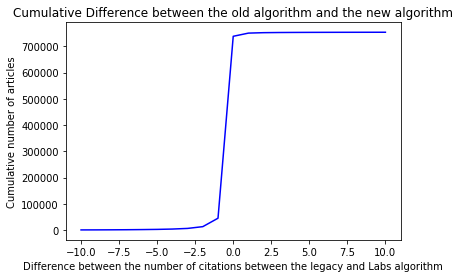

In [433]:
# Draw a cumulative distribution plot
%matplotlib inline
cumulative = np.cumsum(diff[1:].value_counts().sort_index()[-10:10]) #Ignore the articles with ID 0 because they are unlinked
plt.plot(cumulative, c='blue')
plt.title('Cumulative Difference between the old algorithm and the new algorithm')
plt.ylabel('Cumulative number of articles')
plt.xlabel('Difference between the number of citations between the legacy and Labs algorithm')

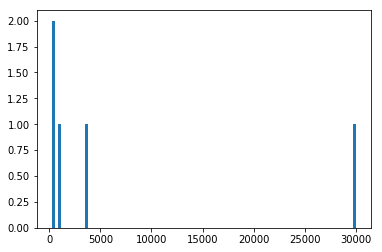

In [644]:
# Draw a histogram of the frequency distribution
plt.hist(cumulative[-5:5], bins=100)
ax = plt.gca()

In [390]:
693696 / len(records.recID.unique())

0.7362864921377056

In [412]:
records.recID.max()

1653661

### Load the old citation counts and compare against the new ones

In [483]:
# Read the records
old_records = pd.read_csv('old-citation-counts.tsv', sep='\t')
old_records.columns = ['recID', 'citation_count']
old_records = old_records.set_index('recID')

In [564]:
# Order the legacy number of citations by citation count
legacy = old_records.citation_count.sort_values(ascending=False)

In [588]:
# Get the citation counts as per the new Labs algorithms
labs = records.newRef.value_counts()
labs = labs[1:] # Ignore the records with recID == 0

In [632]:
# Calculate the difference between the two
diff2 = labs - legacy

# Extract the valid values from the difference i.e. != NaN
diff2 = diff2.valid()

In [633]:
# Indicate Number of articles with zero differences in citation counts
num_zero_diff = diff2.value_counts()[0]
num_unique_articles = len(records.recID.unique())
zero_diff = num_zero_diff / num_unique_articles * 100
print('Number of Cited articles with zero difference: {}'.format(num_zero_diff))
print('Total Number of Unique Articles which have citations: {}'.format(num_unique_articles))
print('Percentage of Cited articles with zero difference: {0:0.2f} %'.format(zero_diff))

Number of Cited articles with zero difference: 652046
Total Number of Unique Articles which have citations: 942155
Percentage of Cited articles with zero difference: 69.21 %


([<matplotlib.axis.XTick at 0x7f22f6ddeac8>,
 <a list of 13 Text xticklabel objects>)

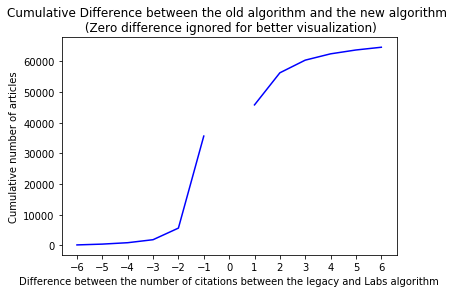

In [567]:
# Draw a cumulative distribution plot
%matplotlib inline
cumulative = np.cumsum(diff2.value_counts().sort_index()[-6:-1]) #Ignore the articles with ID 0 because they are unlinked
cumulative2 = np.cumsum(diff2.value_counts().sort_index()[1:6])
plt.plot(cumulative, c='blue')
plt.plot(cumulative2, c='blue')
plt.title('Cumulative Difference between the old algorithm and the new algorithm \n (Zero difference ignored for better visualization)')
plt.ylabel('Cumulative number of articles')
plt.xlabel('Difference between the number of citations between the legacy and Labs algorithm')
plt.xticks(np.arange(-6, 7, 1.0))

([<matplotlib.axis.XTick at 0x7f22f6cf5a20>,
 <a list of 11 Text xticklabel objects>)

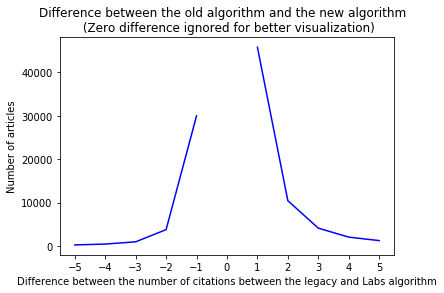

In [634]:
# Plot the results which show the occurenc of the frequency of the citation differences
%matplotlib inline
cumulative = diff2.value_counts().sort_index()[-5:-1] #Ignore the articles with ID 0 because they are unlinked
cumulative2 = diff2.value_counts().sort_index()[1:5]
plt.plot(cumulative, c='blue')
plt.plot(cumulative2, c='blue')
plt.title('Difference between the old algorithm and the new algorithm  \n (Zero difference ignored for better visualization)')
plt.ylabel('Number of articles')
plt.xlabel('Difference between the number of citations between the legacy and Labs algorithm')
plt.xticks(np.arange(-5, 6, 1.0))

In [600]:
%%time
# Get the articles which have lost citations
lost = diff2 < 0
lost_citations = diff2[lost]
print('Total {} articles lost citations in the Labs algorithm, with maximum lost count being {}'.format(
    len(lost_citations), lost_citations.min()))

Total 36923 articles lost citations in the Labs algorithm, with maximum lost count being -1020.0
CPU times: user 17.2 s, sys: 0 ns, total: 17.2 s
Wall time: 17.2 s


In [601]:
%%time
# Get the articles which have gained citations
gained = diff2 > 0
gained_citations = diff2[gained]
print('Total {} articles gained citations in the Labs algorithm, with maximum gained count being {}'.format(
    len(gained_citations), gained_citations.max()))

Total 67857 articles gained citations in the Labs algorithm, with maximum gained count being 1005.0
CPU times: user 17.4 s, sys: 3.68 ms, total: 17.4 s
Wall time: 17.4 s


In [641]:
# Get the ordered lists

# Get the combined list
sorted_overall = pd.DataFrame(diff2.sort_values())
sorted_overall.columns = ['Citation_Difference']

# Get the list for lost citations
sorted_lost = pd.DataFrame(lost_citations.sort_values(ascending=True))
sorted_lost.columns = ['Citation_Difference']

# Get the list for gained citations
sorted_gained = pd.DataFrame(gained_citations.sort_values(ascending=False))
sorted_gained.columns = ['Citation_Difference']

In [643]:
# Export all the ordered lists to CSV
sorted_overall.to_csv('Citation Differences/complete_list.csv')
sorted_lost.to_csv('Citation Differences/lost_citations_list.csv')
sorted_gained.to_csv('Citation Differences/gained_citations_list.csv')